In [359]:
import os 
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules 
#from mlxtend.preprocessing import OnehotTransactions


import pandas as pd
import numpy as np

import re
import string

import spacy
import smart_open

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [360]:
#importing modules
import os 
print('importing "os" operating system')
from io import BytesIO
#from urllib.request import urlopen
from zipfile import ZipFile
import pandas as pd
print('pandas')
import numpy as np
import geopandas as gpd
print('geopandas')
from shapely.geometry import Point
print('shapely')
import numpy as np
print('numpy')
from statsmodels.tsa.stattools import grangercausalitytests
print('statsmodels')
#import pysal as ps
#print('pysal')
import seaborn as sns
print('seaborn')
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
print('matplotlib')


%matplotlib inline

importing "os" operating system
pandas
geopandas
shapely
numpy
statsmodels
seaborn
matplotlib


In [361]:
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, jaccard
from sklearn.metrics import jaccard_score

#from sklearn.metrics import jaccard_similarity_score
from difflib import SequenceMatcher
import difflib as dfl

In [362]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [363]:
import warnings
#warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

## Approri part 2 and spatial auto

In [402]:
#drugname = 'tysabri' #, , , , 
#drugnamepath = drugname[:6]
#temporal = 'year'
#drugnamepath
#topk = 2
#start with moderna then pfizer then janssen
#moderna done
#pfizer done -- repeating done repeating
#janssen done-- repeating 

drugname = 'moderna'#eliquis, xarelto, pradaxa
print('drugname: ', drugname)

drugnamepath = drugname[:6]
temporal = str('year')
drugnamepath
topics=10
topk = 'top'+str(topics)
        
#topk = 'tp'+str(k)
print('topic', topics)
        #topk = 'tp10'
        #tpk
kk=topics

drugname:  moderna
topic 10


In [403]:
drugnamepath


'modern'

In [511]:
#data_dirpath1 = r"D:\Research\FAERS_Public\Data\Analysis_Ready_data"+str('\\')+str(topk)+str('\\')+str(drugnamepath)+"_itemset_joinedPT\\"+str(temporal)+"_nai"
data_dirpath1 = r"D:\Research\FAERS_Public_Similarity\Data\analysis_ready\VAERS\df_"+str(drugname)+".csv"
data_dirpath1 = r"D:\Research\FAERS_Public_Similarity\Data\analysis_ready\VAERS\df_all.csv"

#data_dirpath1 = r"D:\Research\FAERS_Public_Similarity\Data\analysis_ready\df_xarelto_europe.csv"
#"D:\Research\FAERS_Public_LDA\Data\Analysis_Ready_data\Extracted_data\df_xarelto_europe_PT_joined.csv"
#os.chdir(data_dirpath1)
data_dirpath1
#print(os.getcwd())
Faers_comparision = pd.read_csv(data_dirpath1)
#Faers_comparision.info()
Faers_comparision.rename({'PT': 'FaersValue'}, axis=1, inplace=True)
#Faers_comparision['pt_unique']  = ','.join(Faers_comparision['pt_unique'] )
Faers_comparision['FaersValue']  = Faers_comparision['FaersValue'] .apply(lambda x: ', '.join(x.split("' '")))

#Faers_comparision = Faers_comparision.head(20)
var = Faers_comparision['STATE'].unique()
#Faers_comparision['year'].unique()
var = sorted(var)
var = [element.upper() for element in var] ; var
print(', '.join(var))
#Faers_comparision = Faers_comparision[Faers_comparision['ALLERGIES'].notnull()]
Faers_comparision['ALLERGIES'].unique()

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,13,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


0, AK, AL, AR, AS, AZ, CA, CO, CT, CA, DC, DE, FL, FM, GA, GU, HI, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MH, MI, MN, MO, MP, MS, MT, NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, PR, RI, SC, SD, TN, TX, TX, UT, VA, VI, VT, WA, WI, WV, WY, XB, XV


array(['0', 'NKDA', 'Iodine', ...,
       'carisoprodol - rash, adhesive tape, lisinopril - cough',
       'codeine, valium, Crestor', 'SULFA - HIVES'], dtype=object)

#data_dirpath1 = r"D:\Research\FAERS_Public\Data\Analysis_Ready_data"+str('\\')+str(topk)+str('\\')+str(drugnamepath)+"_itemset_joinedPT\\"+str(temporal)+"_nai"
data_dirpath1 = r"D:\Research\FAERS_Public_LDA\Data\Analysis_Ready_data\Extracted_data"+str('\\df_')+str(drugname)+"_europe_PT_joined.csv"
data_dirpath1 = r"D:\Research\FAERS_Public_LDA\Data\Analysis_Ready_data\Extracted_data\df_pradaxa_europe.csv"
#"D:\Research\FAERS_Public_LDA\Data\Analysis_Ready_data\Extracted_data\df_xarelto_europe_PT_joined.csv"
#os.chdir(data_dirpath1)
data_dirpath1
#print(os.getcwd())
Faers_comparision = pd.read_csv(data_dirpath1)
Faers_comparision.rename({'pt': 'FaersValue'}, axis=1, inplace=True)

Faers_comparision.head()
Faers_comparision['occr_country'].unique()

#Faers_comparision['spatial'], Faers_comparision['temporal'] = Faers_comparision['spatiotemporal'].str.split('_', 1).str
Faers_comparision =Faers_comparision[(Faers_comparision['year']>=2014)&(Faers_comparision['year']<=2017)]
Faers_comparision = Faers_comparision.groupby(['occr_country', 'year'],as_index=False).agg({ 'drugname': lambda x: list(x),'FaersValue': lambda x: list(x)})
#Faers_comparision['drugname']=list(map(set,Faers_comparision['drugname']))

Faers_comparision.tail(10)

In [512]:
Faers_comparision['FaersValue1']=Faers_comparision['FaersValue'].str.replace(' ','-')
Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.replace(',',' ')

Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.replace(' ',', ')
#Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.replace('\p{P}(?<!-)',' ')

Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.replace('  ',', ')
Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.lower()


Faers_comparision.sample(5)

Unnamed: 0  VAERS_ID    RECVDATE STATE  AGE_YRS  CAGE_YR  CAGE_MO SEX  \
6945        220865   1129163  03/24/2021    MT     38.0     38.0      0.0   F   
70347        49828    957811  01/20/2021    IN     23.0     23.0      0.0   F   
199692       77874    982592  01/28/2021    NY     75.0     75.0      0.0   F   
86299        91083    993658  02/02/2021     0      0.0      0.0      0.0   F   
191907       64912    971014  01/25/2021    NY     47.0     47.0      0.0   F   

       RPT_DATE  \
6945          0   
70347         0   
199692        0   
86299         0   
191907        0   

                                                                                               SYMPTOM_TEXT  \
6945    Just under 15 minutes after vaccination, patient started to experiences nausea, lightheadedness,...   
70347                               Diarrhea, nausea, extreme fatigue, chills, fever, body aches, weakness.   
199692  Elevated heart rate (137) and elevated blood pressure (176/96).  Lasted about 2 hrs. until I sta...   
86299   increased heart rate of 120 or 130; This is a spontaneous report from a contactable consumer rep...   
191907  ON THE MORNING OF 01/22/2021 PT WOKE UP AND HAD RIGHT SIDED FACIAL DROOPING. PT DID NOT TELL ANY...   

        ...  VAX_LOT VAX_DOSE_SERIES VAX_ROUTE VAX_SITE  \
6945    ...  1805018               1        IM       LA   
70347   ...   EL8982               1       SYR       LA   
199692  ...        0             UNK         0        0   
86299   ...        0             UNK         0        0   
191907  ...  012L20A               1        IM       RA   

                                 VAX_NAME  \
6945            covid19(covid19(janssen))   
70347   covid19(covid19(pfizer-biontech))   
199692          covid19(covid19(moderna))   
86299   covid19(covid19(pfizer-biontech))   
191907          covid19(covid19(moderna))   

                                                          FaersValue one  \
6945    Chills,Dizziness,Heart rate increased,Hot flush,Hypertension   1   
70347                       Asthenia,Chills,Diarrhoea,Fatigue,Nausea   1   
199692                 Blood pressure increased,Heart rate increased   1   
86299                                           Heart rate increased   1   
191907                                              Facial paralysis   1   

          year quarter  \
6945    2021.0     1.0   
70347   2021.0     1.0   
199692  2021.0     1.0   
86299      NaN     NaN   
191907  2021.0     1.0   

                                                             FaersValue1  
6945    chills, dizziness, heart-rate-increased, hot-flush, hypertension  
70347                       asthenia, chills, diarrhoea, fatigue, nausea  
199692                    blood-pressure-increased, heart-rate-increased  
86299                                               heart-rate-increased  
191907                                                  facial-paralysis  

[5 rows x 58 columns]

Faers_comparision['FaersValue1']=''
Faers_comparision['FaersValue'].head()
for x, y in Faers_comparision['FaersValue'].iteritems():
     y = y.replace(' ', '-')
#strs.replace(" ","-")
    #x = x.rstrip(', ')
    #x = x.replace(',', ', ')
    #x = x.replace(', ', ' ')
    
    #y = y.lower()
    #Faers_comparision['FaersValue1'].iloc[x]=y
Faers_comparision.at[x,'FaersValue1'] = y
    #Faers_comparision.set_value(x,'FaersValue1',y)
    #Faers_comparision.ix[x]['FaersValue1'] = y
    #for date, row in df.T.iteritems():
    #print(y)
Faers_comparision

state = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
for x in state:
    print(str(x)+"_PT =Faers_comparision[Faers_comparision['STATE']=='"+str(x)+"']['FaersValue1'].tolist()")
    print("df_join_"+str(x)+" = pd.DataFrame({'FaersValue1':"+str(x)+"_PT })")
    print("df_join_"+str(x)+"['state'] = '"+str(x)+"'")
    print("df_join_"+str(x)+"['FaersValue1']=df_join_"+str(x)+"['FaersValue1'].str.cat(sep=' ')" )
    print("df_join_"+str(x)+" =df_join_"+str(x)+".drop_duplicates(subset=['state'])")
#df_join_AL['state'] = 'AL'
#df_join_AL['col']=df_join_AL['col'].str.cat(sep=' ')
#df_join_AL.drop_duplicates()
for x in state:
    print("df_join_"+str(x), end=', ')

state = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC',
 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
for x in state:
    print("for x, y in df_join_"+str(x)+"['FaersValue1'].iteritems():")
    print("    y = y.replace(' ',', ')")
    print("    y = y.replace(',, ',', ')")
    print("    df_join_"+str(x)+"['FaersValue1'].iloc[x]=y" )
#df_join_AL['state'] = 'AL'
#df_join_AL['col']=df_join_AL['col'].str.cat(sep=' ')
#df_join_AL.drop_duplicates()


## combining 5 adverse events column 

In [513]:
AL_PT =Faers_comparision[Faers_comparision['STATE']=='AL']['FaersValue1'].tolist()
df_join_AL = pd.DataFrame({'FaersValue1':AL_PT })
df_join_AL['state'] = 'AL'
df_join_AL['FaersValue1']=df_join_AL['FaersValue1'].str.cat(sep=' ')
df_join_AL =df_join_AL.drop_duplicates(subset=['state'])
AR_PT =Faers_comparision[Faers_comparision['STATE']=='AR']['FaersValue1'].tolist()
df_join_AR = pd.DataFrame({'FaersValue1':AR_PT })
df_join_AR['state'] = 'AR'
df_join_AR['FaersValue1']=df_join_AR['FaersValue1'].str.cat(sep=' ')
df_join_AR =df_join_AR.drop_duplicates(subset=['state'])
AZ_PT =Faers_comparision[Faers_comparision['STATE']=='AZ']['FaersValue1'].tolist()
df_join_AZ = pd.DataFrame({'FaersValue1':AZ_PT })
df_join_AZ['state'] = 'AZ'
df_join_AZ['FaersValue1']=df_join_AZ['FaersValue1'].str.cat(sep=' ')
df_join_AZ =df_join_AZ.drop_duplicates(subset=['state'])
CA_PT =Faers_comparision[Faers_comparision['STATE']=='CA']['FaersValue1'].tolist()
df_join_CA = pd.DataFrame({'FaersValue1':CA_PT })
df_join_CA['state'] = 'CA'
df_join_CA['FaersValue1']=df_join_CA['FaersValue1'].str.cat(sep=' ')
df_join_CA =df_join_CA.drop_duplicates(subset=['state'])
CO_PT =Faers_comparision[Faers_comparision['STATE']=='CO']['FaersValue1'].tolist()
df_join_CO = pd.DataFrame({'FaersValue1':CO_PT })
df_join_CO['state'] = 'CO'
df_join_CO['FaersValue1']=df_join_CO['FaersValue1'].str.cat(sep=' ')
df_join_CO =df_join_CO.drop_duplicates(subset=['state'])
CT_PT =Faers_comparision[Faers_comparision['STATE']=='CT']['FaersValue1'].tolist()
df_join_CT = pd.DataFrame({'FaersValue1':CT_PT })
df_join_CT['state'] = 'CT'
df_join_CT['FaersValue1']=df_join_CT['FaersValue1'].str.cat(sep=' ')
df_join_CT =df_join_CT.drop_duplicates(subset=['state'])
DC_PT =Faers_comparision[Faers_comparision['STATE']=='DC']['FaersValue1'].tolist()
df_join_DC = pd.DataFrame({'FaersValue1':DC_PT })
df_join_DC['state'] = 'DC'
df_join_DC['FaersValue1']=df_join_DC['FaersValue1'].str.cat(sep=' ')
df_join_DC =df_join_DC.drop_duplicates(subset=['state'])
DE_PT =Faers_comparision[Faers_comparision['STATE']=='DE']['FaersValue1'].tolist()
df_join_DE = pd.DataFrame({'FaersValue1':DE_PT })
df_join_DE['state'] = 'DE'
df_join_DE['FaersValue1']=df_join_DE['FaersValue1'].str.cat(sep=' ')
df_join_DE =df_join_DE.drop_duplicates(subset=['state'])
FL_PT =Faers_comparision[Faers_comparision['STATE']=='FL']['FaersValue1'].tolist()
df_join_FL = pd.DataFrame({'FaersValue1':FL_PT })
df_join_FL['state'] = 'FL'
df_join_FL['FaersValue1']=df_join_FL['FaersValue1'].str.cat(sep=' ')
df_join_FL =df_join_FL.drop_duplicates(subset=['state'])
GA_PT =Faers_comparision[Faers_comparision['STATE']=='GA']['FaersValue1'].tolist()
df_join_GA = pd.DataFrame({'FaersValue1':GA_PT })
df_join_GA['state'] = 'GA'
df_join_GA['FaersValue1']=df_join_GA['FaersValue1'].str.cat(sep=' ')
df_join_GA =df_join_GA.drop_duplicates(subset=['state'])
IA_PT =Faers_comparision[Faers_comparision['STATE']=='IA']['FaersValue1'].tolist()
df_join_IA = pd.DataFrame({'FaersValue1':IA_PT })
df_join_IA['state'] = 'IA'
df_join_IA['FaersValue1']=df_join_IA['FaersValue1'].str.cat(sep=' ')
df_join_IA =df_join_IA.drop_duplicates(subset=['state'])
ID_PT =Faers_comparision[Faers_comparision['STATE']=='ID']['FaersValue1'].tolist()
df_join_ID = pd.DataFrame({'FaersValue1':ID_PT })
df_join_ID['state'] = 'ID'
df_join_ID['FaersValue1']=df_join_ID['FaersValue1'].str.cat(sep=' ')
df_join_ID =df_join_ID.drop_duplicates(subset=['state'])
IL_PT =Faers_comparision[Faers_comparision['STATE']=='IL']['FaersValue1'].tolist()
df_join_IL = pd.DataFrame({'FaersValue1':IL_PT })
df_join_IL['state'] = 'IL'
df_join_IL['FaersValue1']=df_join_IL['FaersValue1'].str.cat(sep=' ')
df_join_IL =df_join_IL.drop_duplicates(subset=['state'])
IN_PT =Faers_comparision[Faers_comparision['STATE']=='IN']['FaersValue1'].tolist()
df_join_IN = pd.DataFrame({'FaersValue1':IN_PT })
df_join_IN['state'] = 'IN'
df_join_IN['FaersValue1']=df_join_IN['FaersValue1'].str.cat(sep=' ')
df_join_IN =df_join_IN.drop_duplicates(subset=['state'])
KS_PT =Faers_comparision[Faers_comparision['STATE']=='KS']['FaersValue1'].tolist()
df_join_KS = pd.DataFrame({'FaersValue1':KS_PT })
df_join_KS['state'] = 'KS'
df_join_KS['FaersValue1']=df_join_KS['FaersValue1'].str.cat(sep=' ')
df_join_KS =df_join_KS.drop_duplicates(subset=['state'])
KY_PT =Faers_comparision[Faers_comparision['STATE']=='KY']['FaersValue1'].tolist()
df_join_KY = pd.DataFrame({'FaersValue1':KY_PT })
df_join_KY['state'] = 'KY'
df_join_KY['FaersValue1']=df_join_KY['FaersValue1'].str.cat(sep=' ')
df_join_KY =df_join_KY.drop_duplicates(subset=['state'])
LA_PT =Faers_comparision[Faers_comparision['STATE']=='LA']['FaersValue1'].tolist()
df_join_LA = pd.DataFrame({'FaersValue1':LA_PT })
df_join_LA['state'] = 'LA'
df_join_LA['FaersValue1']=df_join_LA['FaersValue1'].str.cat(sep=' ')
df_join_LA =df_join_LA.drop_duplicates(subset=['state'])
MA_PT =Faers_comparision[Faers_comparision['STATE']=='MA']['FaersValue1'].tolist()
df_join_MA = pd.DataFrame({'FaersValue1':MA_PT })
df_join_MA['state'] = 'MA'
df_join_MA['FaersValue1']=df_join_MA['FaersValue1'].str.cat(sep=' ')
df_join_MA =df_join_MA.drop_duplicates(subset=['state'])
MD_PT =Faers_comparision[Faers_comparision['STATE']=='MD']['FaersValue1'].tolist()
df_join_MD = pd.DataFrame({'FaersValue1':MD_PT })
df_join_MD['state'] = 'MD'
df_join_MD['FaersValue1']=df_join_MD['FaersValue1'].str.cat(sep=' ')
df_join_MD =df_join_MD.drop_duplicates(subset=['state'])
ME_PT =Faers_comparision[Faers_comparision['STATE']=='ME']['FaersValue1'].tolist()
df_join_ME = pd.DataFrame({'FaersValue1':ME_PT })
df_join_ME['state'] = 'ME'
df_join_ME['FaersValue1']=df_join_ME['FaersValue1'].str.cat(sep=' ')
df_join_ME =df_join_ME.drop_duplicates(subset=['state'])
MI_PT =Faers_comparision[Faers_comparision['STATE']=='MI']['FaersValue1'].tolist()
df_join_MI = pd.DataFrame({'FaersValue1':MI_PT })
df_join_MI['state'] = 'MI'
df_join_MI['FaersValue1']=df_join_MI['FaersValue1'].str.cat(sep=' ')
df_join_MI =df_join_MI.drop_duplicates(subset=['state'])
MN_PT =Faers_comparision[Faers_comparision['STATE']=='MN']['FaersValue1'].tolist()
df_join_MN = pd.DataFrame({'FaersValue1':MN_PT })
df_join_MN['state'] = 'MN'
df_join_MN['FaersValue1']=df_join_MN['FaersValue1'].str.cat(sep=' ')
df_join_MN =df_join_MN.drop_duplicates(subset=['state'])
MO_PT =Faers_comparision[Faers_comparision['STATE']=='MO']['FaersValue1'].tolist()
df_join_MO = pd.DataFrame({'FaersValue1':MO_PT })
df_join_MO['state'] = 'MO'
df_join_MO['FaersValue1']=df_join_MO['FaersValue1'].str.cat(sep=' ')
df_join_MO =df_join_MO.drop_duplicates(subset=['state'])
MS_PT =Faers_comparision[Faers_comparision['STATE']=='MS']['FaersValue1'].tolist()
df_join_MS = pd.DataFrame({'FaersValue1':MS_PT })
df_join_MS['state'] = 'MS'
df_join_MS['FaersValue1']=df_join_MS['FaersValue1'].str.cat(sep=' ')
df_join_MS =df_join_MS.drop_duplicates(subset=['state'])
MT_PT =Faers_comparision[Faers_comparision['STATE']=='MT']['FaersValue1'].tolist()
df_join_MT = pd.DataFrame({'FaersValue1':MT_PT })
df_join_MT['state'] = 'MT'
df_join_MT['FaersValue1']=df_join_MT['FaersValue1'].str.cat(sep=' ')
df_join_MT =df_join_MT.drop_duplicates(subset=['state'])
NC_PT =Faers_comparision[Faers_comparision['STATE']=='NC']['FaersValue1'].tolist()
df_join_NC = pd.DataFrame({'FaersValue1':NC_PT })
df_join_NC['state'] = 'NC'
df_join_NC['FaersValue1']=df_join_NC['FaersValue1'].str.cat(sep=' ')
df_join_NC =df_join_NC.drop_duplicates(subset=['state'])
ND_PT =Faers_comparision[Faers_comparision['STATE']=='ND']['FaersValue1'].tolist()
df_join_ND = pd.DataFrame({'FaersValue1':ND_PT })
df_join_ND['state'] = 'ND'
df_join_ND['FaersValue1']=df_join_ND['FaersValue1'].str.cat(sep=' ')
df_join_ND =df_join_ND.drop_duplicates(subset=['state'])
NE_PT =Faers_comparision[Faers_comparision['STATE']=='NE']['FaersValue1'].tolist()
df_join_NE = pd.DataFrame({'FaersValue1':NE_PT })
df_join_NE['state'] = 'NE'
df_join_NE['FaersValue1']=df_join_NE['FaersValue1'].str.cat(sep=' ')
df_join_NE =df_join_NE.drop_duplicates(subset=['state'])
NH_PT =Faers_comparision[Faers_comparision['STATE']=='NH']['FaersValue1'].tolist()
df_join_NH = pd.DataFrame({'FaersValue1':NH_PT })
df_join_NH['state'] = 'NH'
df_join_NH['FaersValue1']=df_join_NH['FaersValue1'].str.cat(sep=' ')
df_join_NH =df_join_NH.drop_duplicates(subset=['state'])
NJ_PT =Faers_comparision[Faers_comparision['STATE']=='NJ']['FaersValue1'].tolist()
df_join_NJ = pd.DataFrame({'FaersValue1':NJ_PT })
df_join_NJ['state'] = 'NJ'
df_join_NJ['FaersValue1']=df_join_NJ['FaersValue1'].str.cat(sep=' ')
df_join_NJ =df_join_NJ.drop_duplicates(subset=['state'])
NM_PT =Faers_comparision[Faers_comparision['STATE']=='NM']['FaersValue1'].tolist()
df_join_NM = pd.DataFrame({'FaersValue1':NM_PT })
df_join_NM['state'] = 'NM'
df_join_NM['FaersValue1']=df_join_NM['FaersValue1'].str.cat(sep=' ')
df_join_NM =df_join_NM.drop_duplicates(subset=['state'])
NV_PT =Faers_comparision[Faers_comparision['STATE']=='NV']['FaersValue1'].tolist()
df_join_NV = pd.DataFrame({'FaersValue1':NV_PT })
df_join_NV['state'] = 'NV'
df_join_NV['FaersValue1']=df_join_NV['FaersValue1'].str.cat(sep=' ')
df_join_NV =df_join_NV.drop_duplicates(subset=['state'])
NY_PT =Faers_comparision[Faers_comparision['STATE']=='NY']['FaersValue1'].tolist()
df_join_NY = pd.DataFrame({'FaersValue1':NY_PT })
df_join_NY['state'] = 'NY'
df_join_NY['FaersValue1']=df_join_NY['FaersValue1'].str.cat(sep=' ')
df_join_NY =df_join_NY.drop_duplicates(subset=['state'])
OH_PT =Faers_comparision[Faers_comparision['STATE']=='OH']['FaersValue1'].tolist()
df_join_OH = pd.DataFrame({'FaersValue1':OH_PT })
df_join_OH['state'] = 'OH'
df_join_OH['FaersValue1']=df_join_OH['FaersValue1'].str.cat(sep=' ')
df_join_OH =df_join_OH.drop_duplicates(subset=['state'])
OK_PT =Faers_comparision[Faers_comparision['STATE']=='OK']['FaersValue1'].tolist()
df_join_OK = pd.DataFrame({'FaersValue1':OK_PT })
df_join_OK['state'] = 'OK'
df_join_OK['FaersValue1']=df_join_OK['FaersValue1'].str.cat(sep=' ')
df_join_OK =df_join_OK.drop_duplicates(subset=['state'])
OR_PT =Faers_comparision[Faers_comparision['STATE']=='OR']['FaersValue1'].tolist()
df_join_OR = pd.DataFrame({'FaersValue1':OR_PT })
df_join_OR['state'] = 'OR'
df_join_OR['FaersValue1']=df_join_OR['FaersValue1'].str.cat(sep=' ')
df_join_OR =df_join_OR.drop_duplicates(subset=['state'])
PA_PT =Faers_comparision[Faers_comparision['STATE']=='PA']['FaersValue1'].tolist()
df_join_PA = pd.DataFrame({'FaersValue1':PA_PT })
df_join_PA['state'] = 'PA'
df_join_PA['FaersValue1']=df_join_PA['FaersValue1'].str.cat(sep=' ')
df_join_PA =df_join_PA.drop_duplicates(subset=['state'])
RI_PT =Faers_comparision[Faers_comparision['STATE']=='RI']['FaersValue1'].tolist()
df_join_RI = pd.DataFrame({'FaersValue1':RI_PT })
df_join_RI['state'] = 'RI'
df_join_RI['FaersValue1']=df_join_RI['FaersValue1'].str.cat(sep=' ')
df_join_RI =df_join_RI.drop_duplicates(subset=['state'])
SC_PT =Faers_comparision[Faers_comparision['STATE']=='SC']['FaersValue1'].tolist()
df_join_SC = pd.DataFrame({'FaersValue1':SC_PT })
df_join_SC['state'] = 'SC'
df_join_SC['FaersValue1']=df_join_SC['FaersValue1'].str.cat(sep=' ')
df_join_SC =df_join_SC.drop_duplicates(subset=['state'])
SD_PT =Faers_comparision[Faers_comparision['STATE']=='SD']['FaersValue1'].tolist()
df_join_SD = pd.DataFrame({'FaersValue1':SD_PT })
df_join_SD['state'] = 'SD'
df_join_SD['FaersValue1']=df_join_SD['FaersValue1'].str.cat(sep=' ')
df_join_SD =df_join_SD.drop_duplicates(subset=['state'])
TN_PT =Faers_comparision[Faers_comparision['STATE']=='TN']['FaersValue1'].tolist()
df_join_TN = pd.DataFrame({'FaersValue1':TN_PT })
df_join_TN['state'] = 'TN'
df_join_TN['FaersValue1']=df_join_TN['FaersValue1'].str.cat(sep=' ')
df_join_TN =df_join_TN.drop_duplicates(subset=['state'])
TX_PT =Faers_comparision[Faers_comparision['STATE']=='TX']['FaersValue1'].tolist()
df_join_TX = pd.DataFrame({'FaersValue1':TX_PT })
df_join_TX['state'] = 'TX'
df_join_TX['FaersValue1']=df_join_TX['FaersValue1'].str.cat(sep=' ')
df_join_TX =df_join_TX.drop_duplicates(subset=['state'])
UT_PT =Faers_comparision[Faers_comparision['STATE']=='UT']['FaersValue1'].tolist()
df_join_UT = pd.DataFrame({'FaersValue1':UT_PT })
df_join_UT['state'] = 'UT'
df_join_UT['FaersValue1']=df_join_UT['FaersValue1'].str.cat(sep=' ')
df_join_UT =df_join_UT.drop_duplicates(subset=['state'])
VA_PT =Faers_comparision[Faers_comparision['STATE']=='VA']['FaersValue1'].tolist()
df_join_VA = pd.DataFrame({'FaersValue1':VA_PT })
df_join_VA['state'] = 'VA'
df_join_VA['FaersValue1']=df_join_VA['FaersValue1'].str.cat(sep=' ')
df_join_VA =df_join_VA.drop_duplicates(subset=['state'])
VT_PT =Faers_comparision[Faers_comparision['STATE']=='VT']['FaersValue1'].tolist()
df_join_VT = pd.DataFrame({'FaersValue1':VT_PT })
df_join_VT['state'] = 'VT'
df_join_VT['FaersValue1']=df_join_VT['FaersValue1'].str.cat(sep=' ')
df_join_VT =df_join_VT.drop_duplicates(subset=['state'])
WA_PT =Faers_comparision[Faers_comparision['STATE']=='WA']['FaersValue1'].tolist()
df_join_WA = pd.DataFrame({'FaersValue1':WA_PT })
df_join_WA['state'] = 'WA'
df_join_WA['FaersValue1']=df_join_WA['FaersValue1'].str.cat(sep=' ')
df_join_WA =df_join_WA.drop_duplicates(subset=['state'])
WI_PT =Faers_comparision[Faers_comparision['STATE']=='WI']['FaersValue1'].tolist()
df_join_WI = pd.DataFrame({'FaersValue1':WI_PT })
df_join_WI['state'] = 'WI'
df_join_WI['FaersValue1']=df_join_WI['FaersValue1'].str.cat(sep=' ')
df_join_WI =df_join_WI.drop_duplicates(subset=['state'])
WV_PT =Faers_comparision[Faers_comparision['STATE']=='WV']['FaersValue1'].tolist()
df_join_WV = pd.DataFrame({'FaersValue1':WV_PT })
df_join_WV['state'] = 'WV'
df_join_WV['FaersValue1']=df_join_WV['FaersValue1'].str.cat(sep=' ')
df_join_WV =df_join_WV.drop_duplicates(subset=['state'])
WY_PT =Faers_comparision[Faers_comparision['STATE']=='WY']['FaersValue1'].tolist()
df_join_WY = pd.DataFrame({'FaersValue1':WY_PT })
df_join_WY['state'] = 'WY'
df_join_WY['FaersValue1']=df_join_WY['FaersValue1'].str.cat(sep=' ')
df_join_WY =df_join_WY.drop_duplicates(subset=['state'])

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [514]:
for x, y in df_join_AL['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_AL['FaersValue1'].iloc[x]=y
for x, y in df_join_AR['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_AR['FaersValue1'].iloc[x]=y
for x, y in df_join_AZ['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_AZ['FaersValue1'].iloc[x]=y
for x, y in df_join_CA['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_CA['FaersValue1'].iloc[x]=y
for x, y in df_join_CO['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_CO['FaersValue1'].iloc[x]=y
for x, y in df_join_CT['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_CT['FaersValue1'].iloc[x]=y
for x, y in df_join_DC['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_DC['FaersValue1'].iloc[x]=y
for x, y in df_join_DE['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_DE['FaersValue1'].iloc[x]=y
for x, y in df_join_FL['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_FL['FaersValue1'].iloc[x]=y
for x, y in df_join_GA['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_GA['FaersValue1'].iloc[x]=y
for x, y in df_join_IA['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_IA['FaersValue1'].iloc[x]=y
for x, y in df_join_ID['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_ID['FaersValue1'].iloc[x]=y
for x, y in df_join_IL['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_IL['FaersValue1'].iloc[x]=y
for x, y in df_join_IN['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_IN['FaersValue1'].iloc[x]=y
for x, y in df_join_KS['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_KS['FaersValue1'].iloc[x]=y
for x, y in df_join_KY['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_KY['FaersValue1'].iloc[x]=y
for x, y in df_join_LA['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_LA['FaersValue1'].iloc[x]=y
for x, y in df_join_MA['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_MA['FaersValue1'].iloc[x]=y
for x, y in df_join_MD['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_MD['FaersValue1'].iloc[x]=y
for x, y in df_join_ME['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_ME['FaersValue1'].iloc[x]=y
for x, y in df_join_MI['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_MI['FaersValue1'].iloc[x]=y
for x, y in df_join_MN['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_MN['FaersValue1'].iloc[x]=y
for x, y in df_join_MO['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_MO['FaersValue1'].iloc[x]=y
for x, y in df_join_MS['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_MS['FaersValue1'].iloc[x]=y
for x, y in df_join_MT['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_MT['FaersValue1'].iloc[x]=y
for x, y in df_join_NC['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_NC['FaersValue1'].iloc[x]=y
for x, y in df_join_ND['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_ND['FaersValue1'].iloc[x]=y
for x, y in df_join_NE['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_NE['FaersValue1'].iloc[x]=y
for x, y in df_join_NH['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_NH['FaersValue1'].iloc[x]=y
for x, y in df_join_NJ['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_NJ['FaersValue1'].iloc[x]=y
for x, y in df_join_NM['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_NM['FaersValue1'].iloc[x]=y
for x, y in df_join_NV['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_NV['FaersValue1'].iloc[x]=y
for x, y in df_join_NY['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_NY['FaersValue1'].iloc[x]=y
for x, y in df_join_OH['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_OH['FaersValue1'].iloc[x]=y
for x, y in df_join_OK['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_OK['FaersValue1'].iloc[x]=y
for x, y in df_join_OR['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_OR['FaersValue1'].iloc[x]=y
for x, y in df_join_PA['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_PA['FaersValue1'].iloc[x]=y
for x, y in df_join_RI['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_RI['FaersValue1'].iloc[x]=y
for x, y in df_join_SC['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_SC['FaersValue1'].iloc[x]=y
for x, y in df_join_SD['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_SD['FaersValue1'].iloc[x]=y
for x, y in df_join_TN['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_TN['FaersValue1'].iloc[x]=y
for x, y in df_join_TX['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_TX['FaersValue1'].iloc[x]=y
for x, y in df_join_UT['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_UT['FaersValue1'].iloc[x]=y
for x, y in df_join_VA['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_VA['FaersValue1'].iloc[x]=y
for x, y in df_join_VT['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_VT['FaersValue1'].iloc[x]=y
for x, y in df_join_WA['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_WA['FaersValue1'].iloc[x]=y
for x, y in df_join_WI['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_WI['FaersValue1'].iloc[x]=y
for x, y in df_join_WV['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_WV['FaersValue1'].iloc[x]=y
for x, y in df_join_WY['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_WY['FaersValue1'].iloc[x]=y

In [515]:
print(df_join_AL.iloc[0])

FaersValue1    chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...
state                                                                                                           AL
Name: 0, dtype: object


AL_PT =Faers_Topicsyear_flat[Faers_Topicsyear_flat['STATE']=='AL']['FaersValue'].tolist()
df_join_AL = pd.DataFrame({'col':AL_PT })
df_join_AL['state'] = 'AL'
df_join_AL['col']=df_join_AL['col'].str.cat(sep=' ')
#df_join= df_join.iloc[0]
df_join_AL.drop_duplicates()



In [516]:
frame = [df_join_AL, df_join_AR, df_join_AZ, df_join_CA, df_join_CO, df_join_CT, df_join_DC, df_join_DE, df_join_FL, 
         df_join_GA, df_join_IA, df_join_ID, df_join_IL, df_join_IN, df_join_KS, df_join_KY, df_join_LA, df_join_MA, 
         df_join_MD, df_join_ME, df_join_MI, df_join_MN, df_join_MO, df_join_MS, df_join_MT, df_join_NC, df_join_ND, 
         df_join_NE, df_join_NH, df_join_NJ, df_join_NM, df_join_NV, df_join_NY, df_join_OH, df_join_OK, df_join_OR, 
         df_join_PA, df_join_RI, df_join_SC, df_join_SD, df_join_TN, df_join_TX, df_join_UT, df_join_VA, df_join_VT, 
         df_join_WA, df_join_WI, df_join_WV, df_join_WY, ]
Faers_comparision = pd.concat(frame)
Faers_comparision.info()
Faers_comparision.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FaersValue1  49 non-null     object
 1   state        49 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


FaersValue1  \
0  chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...   
0  back-pain, headache, lacrimation-increased, pain-in-extremity, pyrexia, chest-pain, chills, dizz...   
0  syncope, asthenia, dizziness, nausea, syncope, tremor, unresponsive-to-stimuli, pain, pyrexia, c...   
0  chills, muscle-fatigue, fatigue, headache, injection-site-pain, myalgia, pyrexia, sensitive-skin...   
0  chills, headache, injection-site-pain, pyrexia, chills, myalgia, pyrexia, chills, fatigue, heada...   

  state  
0    AL  
0    AR  
0    AZ  
0    CA  
0    CO

In [517]:
for x, y in df_join_AL['FaersValue1'].iteritems():
    y = y.replace(' ',', ')
    y = y.replace(',, ',', ')
    df_join_AL['FaersValue1'].iloc[x]=y
   # print(y)
print(df_join_AL.iloc[0])

FaersValue1    chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...
state                                                                                                           AL
Name: 0, dtype: object


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [518]:
#Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.replace(' ',', ')

##Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.replace(',',', ')
#Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.strip()
#Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.replace(',, ',', ')
##Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.replace(' ',', ')

##Faers_comparision['FaersValue1']=Faers_comparision['FaersValue1'].str.lower()
Faers_comparision['FaersValue1'].sample(5)

0    chills, feeling-hot, hyperhidrosis, injection-site-pain, musculoskeletal-stiffness, pain, prurit...
0    throat-irritation, asthenia, burning-sensation, diarrhoea, ear-pain, headache, injection-site-pa...
0    confusional-state, dizziness, dyspnoea, flushing, hyperhidrosis, hyperventilation, pruritus, thr...
0    chills, headache, injection-site-pain, pyrexia, chills, myalgia, pyrexia, chills, fatigue, heada...
0    burning-sensation, pruritus, urticaria, fatigue, feeling-cold, headache, pyrexia, arthralgia, he...
Name: FaersValue1, dtype: object

In [519]:
print(Faers_comparision.iloc[0])

FaersValue1    chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...
state                                                                                                           AL
Name: 0, dtype: object


Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].astype(str)

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str[2:]
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str[:-2]
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].astype(str)
Faers_comparision['FaersValue']=Faers_comparision.FaersValue.str.split(',')

Faers_comparision.FaersValue = Faers_comparision.FaersValue.apply(str)




Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.strip()
#Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lower()
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(u"/",", ")
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(u"\\\\", ", ")

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(u"' ","'")

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace('\n',"")
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(' \n',"")
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace('\n ',"")

Faers_comparision['FaersValue'] = [' '.join(c.split()) for c in Faers_comparision['FaersValue'].astype(str)]

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  ' ', regex=True)
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(r"[\"\']", '')
#Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(r"[\"\]", '')

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(',,,',',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(',,',',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace('{','')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace('','')

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str[1:]
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str[:-1]
Faers_comparision['FaersValue'][0]

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(r"[\"\']", '')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(', ')

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(' ,')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].apply(lambda x: ', '.join(sorted(x.split(','))))

Faers_comparision['FaersValue'][0]


Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(r"[\"\']}{}", '')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(' ,')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip('}')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip("''")
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip('}')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(' ,')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].apply(lambda x: ', '.join(sorted(x.split(','))))

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip("''")
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip('}')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(' ,')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip("''")
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip('}')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip('}')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(' ,')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip("''")
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip('}')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip('}')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(' ,')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip("''")
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.replace(r"}", '')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.rstrip(' ,')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(' ,')
Faers_comparision['FaersValue'] =Faers_comparision['FaersValue'].str.split(',').apply(set).str.join(',')
Faers_comparision['FaersValue'] =Faers_comparision['FaersValue'].str.lower()
Faers_comparision['FaersValue'][0]

Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].apply(lambda x: ', '.join(sorted(x.split(','))))
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(',')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(', ')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lstrip(' ,')
Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.strip(',')
Faers_comparision['FaersValue'] = [' '.join(c.split()) for c in Faers_comparision['FaersValue'].astype(str)]

Faers_comparision['FaersValue'][0]

In [520]:
#Faers_comparision['FaersValue'].head(1)
#Faers_comparision["FaersValue"] = Faers_comparision["FaersValue"].str.lower()
Faers_comparision['FaersValue1'].sample(10)


0    dysgeusia, headache, nausea, dysgeusia, headache, nausea, dizziness, syncope, headache, intracra...
0    chills, heart-rate-increased, migraine, pain, pyrexia, hypoaesthesia, paraesthesia, burning-sens...
0    discomfort, fatigue, migraine, myalgia, neck-pain, pyrexia, cough, decreased-appetite, dizziness...
0    arthralgia, chills, headache, pain, paraesthesia, pyrexia, hypoaesthesia, asthenia, chills, dizz...
0    chest-x-ray, dry-mouth, eye-swelling, fatigue, headache, hypogeusia, injection-site-pain, muscle...
0    chills, muscle-fatigue, fatigue, headache, injection-site-pain, myalgia, pyrexia, sensitive-skin...
0    anxiety, arthralgia, back-pain, blood-pressure-increased, diarrhoea, feeling-cold, formication, ...
0    chills, headache, pyrexia, thirst, chills, headache, pain, headache, pain, fatigue, feeling-abno...
0    blood-pressure-increased, chest-discomfort, dizziness, feeling-abnormal, headache, heart-rate-in...
0    discomfort, headache, injection-site-pain, injecti

itemset_path = r"G:\Research\FAERS_Public\Data\Analysis_Ready_data\combined_Itemset\tp10"
os.chdir(itemset_path)
Faers_comparision.to_csv("itemset_FAERS_temporal_"+str(temporal)+"_drug_"+str(drugname)+"_top10_version_naive.csv")
Faers_comparision[Faers_comparision['spatial']=='dk']

In [521]:
#similar(temporal_1_.FaersValue.loc[3], temporal_1_.FaersValue.loc[0])
#haematuria, pulmonary embolism, renal vein thrombosis, spinal pain, pre-existing condition improved, deep vein thrombosis, drug ineffective

# LDA

In [522]:
#https://stackabuse.com/python-for-nlp-topic-modeling/

In [523]:
#https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

In [524]:
#https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0

In [525]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/
Faers_comparision.head()
Faers_comparision.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FaersValue1  49 non-null     object
 1   state        49 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [526]:
#Faers_comparision['FaersValue'].head()

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=.5, min_df=50, stop_words='english')
doc_term_matrix = count_vect.fit_transform(Faers_comparision['FaersValue'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=10, random_state=42)
LDA.fit(doc_term_matrix)

first_topic = LDA.components_[2]
first_topic
top_topic_words = first_topic.argsort()[-10:]
top_topic_words

for i in top_topic_words:
    print(count_vect.get_feature_names()[i])
    pass
#count_vect.get_feature_names()

for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

topic_values = LDA.transform(doc_term_matrix)
topic_values.shape
topic_values

Faers_comparision['Topic'] = topic_values.argmax(axis=1)
Faers_comparision.head()

Faers_comparision['FaersValue'][Faers_comparision['Topic']==5].head(10)


# Gensim

In [527]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [528]:
import nltk 
#nltk.download()
stopword = nltk.corpus.stopwords.words('english')

In [529]:
#cols = ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4','SYMPTOM5']
#Faers_comparision["PT"] = Faers_comparision[cols].apply(lambda x: ', '.join(x.dropna()), axis=1)


In [530]:
Faers_comparision["FaersValue1"] = Faers_comparision["FaersValue1"].str.lower()

In [531]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

Faers_comparision['FaersValue10'] = Faers_comparision['FaersValue1'].dropna().apply(lambda x: remove_punct(x))



def tokenization(text):
    text = re.split('\W+', text)
    return text

Faers_comparision['FaersValue2'] = Faers_comparision['FaersValue10'].dropna().apply(lambda x: tokenization(x.lower()))

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
Faers_comparision['FaersValue3'] = Faers_comparision['FaersValue2'].dropna().apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

Faers_comparision['FaersValue4'] = Faers_comparision['FaersValue3'].dropna().apply(lambda x: stemming(x))



wn = nltk.WordNetLemmatizer()


def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

Faers_comparision['FaersValue5'] = Faers_comparision['FaersValue4'].dropna().apply(lambda x: lemmatizer(x))



def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

Faers_comparision['FaersValue6'] = Faers_comparision['FaersValue5'].dropna().apply(lambda x: lemmatizer(x))



countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(Faers_comparision['FaersValue6'])
print('{} Number of rows has {} words'.format(countVector.shape[0], countVector.shape[1]))




print('Dataset size:',Faers_comparision.shape)
print('Columns are:',Faers_comparision.columns)



<>:11: DeprecationWarning: invalid escape sequence \W


49 Number of rows has 49 words
Dataset size: (49, 8)
Columns are: Index(['FaersValue1', 'state', 'FaersValue10', 'FaersValue2', 'FaersValue3',
       'FaersValue4', 'FaersValue5', 'FaersValue6'],
      dtype='object')


In [533]:
text_list=Faers_comparision['FaersValue1'].tolist()
print(text_list[0][0:210])

chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgia, pain, pyrexia, dysgeusia, oral-discomfort, tongue-discomfort, chills, decreased-appetite, fatigue, feeling-cold


In [502]:
#text_list=Faers_comparision['FaersValue'].tolist()
#print(text_list[2])#

In [503]:
#text_list=Faers_comparision['FaersValue1'].tolist()
#print(text_list[2])

In [504]:
#Faers_comparision['PT'].iloc[1]

text_list=Faers_comparision['FaersValue'].tolist()
#hyphens = [s.replace(' ','') for s in text_list]

#print(hyphens[2])
mylist = [x.strip() for x in text_list if x.strip()]
#mylist = [s.replace('0', '') for s in text_list]
mylist
text_list = []
for x in mylist:
    x = x.strip()
   # x = x.replace(' ', '')
    x = x.replace(' ', '-')
#strs.replace(" ","-")
    #x = x.rstrip(', ')
    #x = x.replace(',', ', ')
    #x = x.replace(', ', ' ')

    x = x.lower()
    x = x.strip()
    text_list.append(x)
   # print(x)
#text_list
print(text_list[1])


text_list=Faers_comparision['FaersValue3'].tolist()
print(text_list[4])

text_list=Faers_comparision['FaersValue4'].tolist()
print(text_list[2])

text_list=Faers_comparision['FaersValue5'].tolist()
print(text_list[2])

text_list=Faers_comparision['FaersValue6'].tolist()
print(text_list[2])

text_list=Faers_comparision['FaersValue2'].tolist()

print(text_list[2])

In [534]:
text_list = [d.split() for d in text_list]
dictionary = corpora.Dictionary(text_list)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in text_list]


In [535]:
topics


10

text_list
df = pd.Series(text_list).value_counts()
df

#count = df.FaersValue.value_counts()
Faers_comparision =Faers_comparision[Faers_comparision['STATE']=='TX']
Faers_comparision['one']= int(1)
Faers_comparision['one'] = Faers_comparision['one'].astype('int')
#Faers_comparision['FaersValue2'] = Faers_comparision['FaersValue2'].astype('str')
value_counts = Faers_comparision['FaersValue1'].value_counts(dropna=True, sort=True)
Faers_comparision['FaersValue1'] = Faers_comparision['FaersValue1'].str.strip()
# solution here
df_val_counts = pd.DataFrame(value_counts)
df = df_val_counts.reset_index()
df.columns = ['unique_values', 'counts'] # change column names
df =df[~df['unique_values'].str.contains('nan')]
#30359Carotid artery thrombosis,Cerebral artery thro...
df.head()

In [544]:
topics=20

In [545]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=topics, random_state=100,
                chunksize=10, passes=10,iterations=10)


In [546]:


print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=100))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_list, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -5.650154455139827

Coherence Score:  0.29722183932767315


In [547]:
lda_model.print_topics()
ttopcs = []
for i,topic in lda_model.show_topics(formatted=True, num_topics=topics, num_words=20):
    #ttopcs.append(str(i)+": "+ topic)
    #with open(r"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\202103\Summary_topics\\"+str(drugnamepath)+"\\tp"+str(topics)+"topic_table_summary_"+str(drugname)+"_Output.txt", "w") as text_file:
    print(str(i)+": "+ topic)
#topic*10   

0: 0.044*"headache," + 0.033*"fatigue," + 0.031*"pyrexia," + 0.028*"chills," + 0.028*"nausea," + 0.027*"pain-in-extremity," + 0.027*"pain," + 0.020*"injection-site-erythema," + 0.020*"dizziness," + 0.020*"pruritus," + 0.017*"rash," + 0.016*"injection-site-pain," + 0.014*"arthralgia," + 0.014*"erythema," + 0.013*"dyspnoea," + 0.013*"injection-site-swelling," + 0.012*"myalgia," + 0.012*"injection-site-pruritus," + 0.012*"vomiting," + 0.009*"paraesthesia,"
1: 0.042*"headache," + 0.028*"dizziness," + 0.028*"pain-in-extremity," + 0.025*"fatigue," + 0.025*"pyrexia," + 0.025*"chills," + 0.024*"pain," + 0.023*"nausea," + 0.021*"injection-site-pain," + 0.016*"dyspnoea," + 0.015*"pruritus," + 0.015*"injection-site-erythema," + 0.015*"rash," + 0.015*"injection-site-pruritus," + 0.014*"myalgia," + 0.012*"erythema," + 0.012*"arthralgia," + 0.011*"vomiting," + 0.011*"injection-site-swelling," + 0.011*"injection-site-warmth,"
2: 0.099*"headache," + 0.065*"chills," + 0.064*"pyrexia," + 0.059*"fatigue,

In [37]:
lda_model.print_topics()
ttopcs = []
for i,topic in lda_model.show_topics(formatted=True, num_topics=topics, num_words=10):
    #ttopcs.append(str(i)+": "+ topic)
    #with open(r"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\202103\Summary_topics\\"+str(drugnamepath)+"\\tp"+str(topics)+"topic_table_summary_"+str(drugname)+"_Output.txt", "w") as text_file:
    print(str(i)+": "+ topic)
    
    
ll = []
#with open(r"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\202103\Summary_topics\\"+str(drugnamepath)+"\\tp"+str(topics)+"coherence_table_values_summary_"+str(drugname)+"_Output.txt", "w") as text_files:

for i,topic in lda_model.show_topics(formatted=True, num_topics=topics, num_words=10):
    #print("Num Topics =", m, " has Coherence Value of", round(cv, 3))
    with open(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"_20210608"+"\\tp"+str(topics)+"topic_table_summary_"+str(drugname)+"_Output.txt", "w") as text_file:
        #print("Num Topics =", m, " has Coherence Value of", round(cv, 3))
        #ll.extend("Num Topics =", m, " has Coherence Value of", round(cv, 3))
        ll.append('{}+": "+ {}\n'.format(str(i), topic))
        #text_files.write('\n'.join("Num Topics =", m, " has Coherence Value of", round(cv, 3)))
        text_file.write('\n'.join(ll))

0: 0.062*"headache," + 0.052*"pyrexia," + 0.044*"chills," + 0.042*"nausea," + 0.037*"fatigue," + 0.033*"pain," + 0.032*"dizziness," + 0.025*"pain-in-extremity," + 0.024*"myalgia," + 0.019*"dyspnoea,"
1: 0.066*"headache," + 0.047*"pain," + 0.043*"dizziness," + 0.042*"chills," + 0.039*"pyrexia," + 0.035*"fatigue," + 0.032*"nausea," + 0.025*"pain-in-extremity," + 0.017*"dyspnoea," + 0.014*"injection-site-pain,"
2: 0.055*"headache," + 0.050*"chills," + 0.047*"pyrexia," + 0.034*"dizziness," + 0.034*"fatigue," + 0.033*"nausea," + 0.027*"pain," + 0.018*"pain-in-extremity," + 0.015*"vomiting," + 0.013*"tremor,"
3: 0.091*"headache," + 0.064*"pyrexia," + 0.052*"chills," + 0.042*"fatigue," + 0.033*"pain," + 0.033*"nausea," + 0.026*"dizziness," + 0.025*"pain-in-extremity," + 0.015*"myalgia," + 0.015*"injection-site-pain,"
4: 0.049*"headache," + 0.037*"dizziness," + 0.036*"pain," + 0.033*"fatigue," + 0.031*"chills," + 0.029*"pyrexia," + 0.022*"nausea," + 0.019*"pain-in-extremity," + 0.015*"hyperhid

In [39]:
lda_model[doc_term_matrix[0]] # corpus[0] means the first document.

[(0, 0.027967123),
 (1, 0.01881586),
 (3, 0.73412174),
 (4, 0.0180375),
 (5, 0.041854236),
 (6, 0.038455244),
 (7, 0.06218565),
 (8, 0.019000923),
 (9, 0.031237667)]

In [40]:
#doc_term_matrix[0]
#text_list[0]

In [41]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=text_list, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [42]:


model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=text_list, start=1, limit=50, step=1)



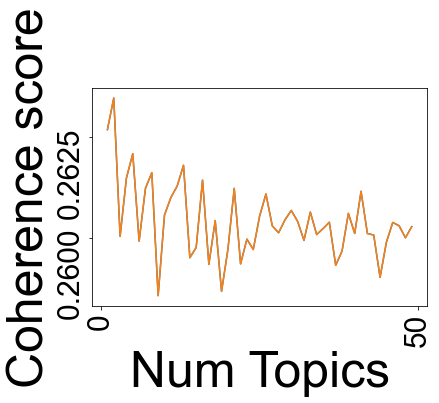

In [43]:
# Show graph
limit=50; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics", fontsize=50)
plt.ylabel("Coherence score", fontsize=50)
#plt.legend(("coherence_values"), loc='best')
sns.set(font_scale=6, rc={'figure.figsize':(15,15)})
plt.xticks(fontsize=30, rotation=90) #font size for x ticks, #rotation=90 rotate labels 90 degrees
plt.yticks(fontsize=30, rotation=90)
#plt.title("Coherence score vs Num of topics", fontsize=60)#Change here



plt.plot(x, coherence_values)



#plt.ylabel('Similiarity between ' +str(countofcountries)+' European Countries using FAERS Post Market Adverse Events', fontsize=20)#Change here
#plt.ylabel('Similiarity Inverse Distances from Jaccard Coefficients', fontsize=20)
#plt.box('off')

        #plt.savefig("Dendrogram_Tree_cluster_linkage_"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_version_naive.png", dpi=300)

        
plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"_20210608"+"\\tp"+str(topics)+"coherence_table_values_summary_"+str(drugname)+".png", dpi=500)        
#plt.savefig(r"H:\Research\FAERS_Public_LDA\den"+"\\"+str(drugname)+"_coherence.jpg", dpi=500)        

plt.show()# Print the coherence scores


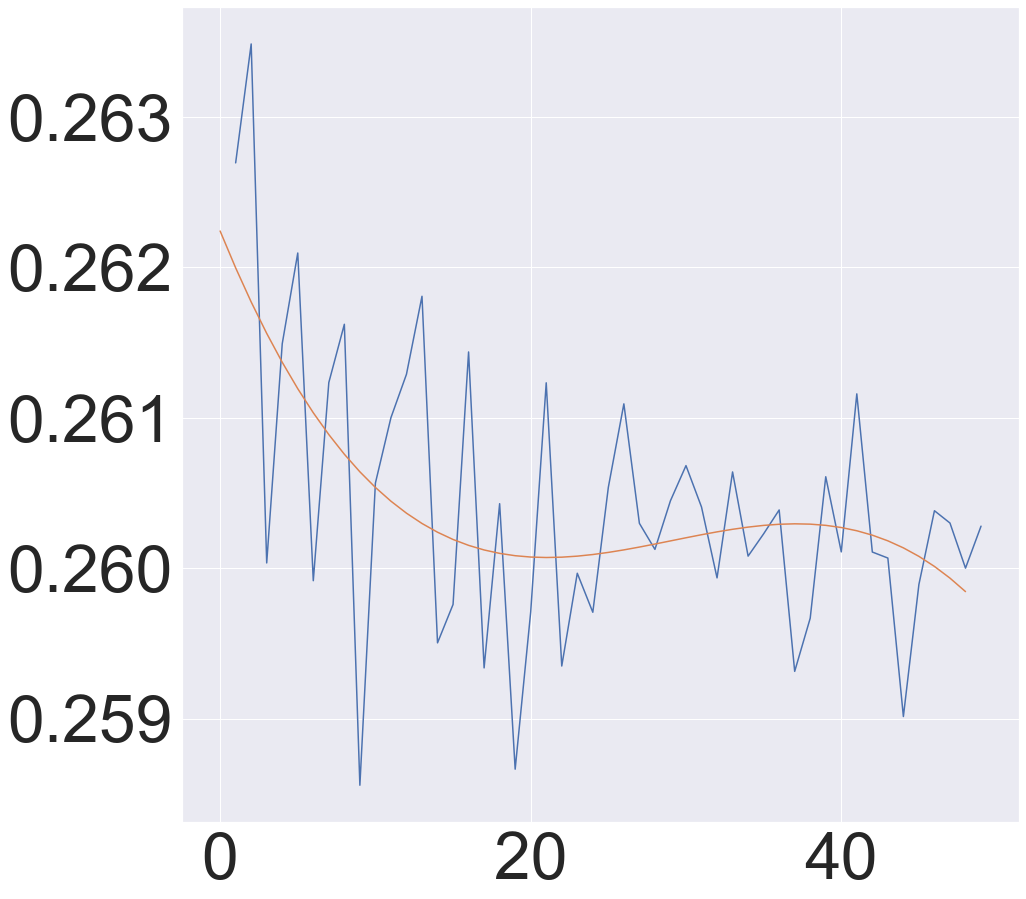

In [44]:
#model_list
from scipy.interpolate import interp1d
from scipy import interpolate

tck = interpolate.splrep(x, coherence_values, k=3, s=1)

#xnew = np.arange(0, 2*np.pi, np.pi/50)

ynew = interpolate.splev(x, tck, der=0)

plt.plot(x, coherence_values, ynew)
plt.savefig(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"_20210608"+"\\tp"+str(topics)+"coherence_table_values_summary_spline"+str(drugname)+"_.png", dpi=500)        
plt.show()# Print the coherence scores

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


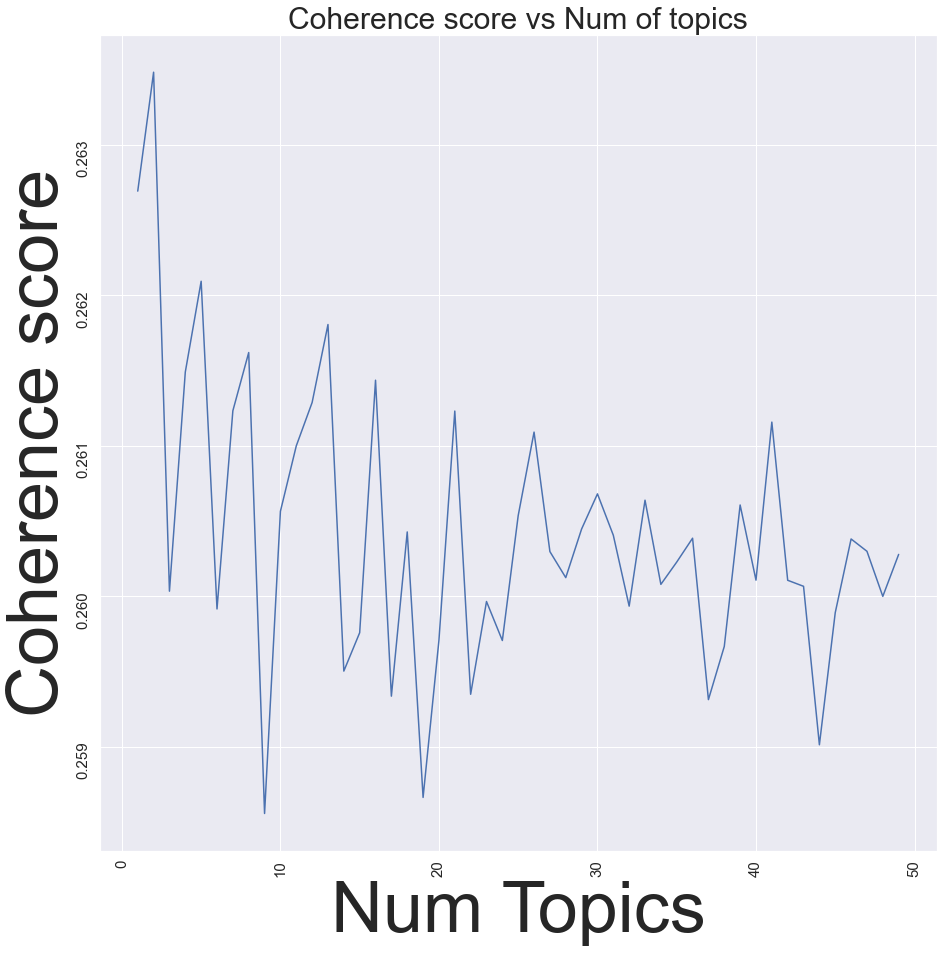

In [45]:
# Show graph
limit=50; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
#plt.legend(("coherence_values"), loc='best')
sns.set(font_scale=2, rc={'figure.figsize':(15,15)})
plt.xticks(fontsize=15, rotation=90) #font size for x ticks, #rotation=90 rotate labels 90 degrees
plt.yticks(fontsize=15, rotation=90)
plt.title("Coherence score vs Num of topics", fontsize=30)#Change here

#plt.ylabel('Similiarity between ' +str(countofcountries)+' European Countries using FAERS Post Market Adverse Events', fontsize=20)#Change here
#plt.ylabel('Similiarity Inverse Distances from Jaccard Coefficients', fontsize=20)
#plt.box('off')

        #plt.savefig("Dendrogram_Tree_cluster_linkage_"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_version_naive.png", dpi=300)

        
#plt.savefig(r"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\Summary_topics\\"+"coherence_table_values_summary_"+str(drugname)+"_10and20.png", dpi=500)        
plt.show()# Print the coherence scores


In [46]:
# Print the coherence scores
#%%capture cap --no-stderr
ll = []
#with open(r"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\202103\Summary_topics\\"+str(drugnamepath)+"\\tp"+str(topics)+"coherence_table_values_summary_"+str(drugname)+"_Output.txt", "w") as text_files:

for m, cv in zip(x, coherence_values):
    #print("Num Topics =", m, " has Coherence Value of", round(cv, 3))
    with open(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"_20210608"+"\\tp"+str(topics)+"coherence_table_values_summary_"+str(drugname)+"_Output.txt", "w") as text_files:
        #print("Num Topics =", m, " has Coherence Value of", round(cv, 3))
        #ll.extend("Num Topics =", m, " has Coherence Value of", round(cv, 3))
        ll.append('Num Topics =", {}, " has Coherence Value of"{}\n'.format(m, cv))
        #text_files.write('\n'.join("Num Topics =", m, " has Coherence Value of", round(cv, 3)))
        text_files.write('\n'.join(ll))

        #text_files.close()  
    #print("Num Topics =", m, " has Coherence Value of", round(cv, 3), file=text_file)

In [47]:
topic = topics
topic

10

## Re-reun model with optimized topic #

# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=topic, random_state=100,
                chunksize=10, passes=10,iterations=50)

print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=100))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_list, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

## topics documents

In [48]:
#lda_model
get_document_topics = lda_model.get_document_topics(doc_term_matrix[0])
get_document_topics = [lda_model.get_document_topics(item) for item in doc_term_matrix]

In [49]:
#get_document_topics[0]

In [50]:
#get_document_topics = lda_model.get_document_topics(doc_term_matrix)
#print(get_document_topics[0])

In [51]:
get_document_topics = lda_model.get_topics()
get_document_topics

array([[1.1140050e-03, 1.2029389e-04, 4.8044939e-03, ..., 8.0565824e-06,
        7.8271687e-06, 7.8271687e-06],
       [3.5690409e-03, 1.9456062e-04, 4.4915057e-03, ..., 8.0740565e-06,
        8.4976309e-06, 8.4976309e-06],
       [1.7632925e-03, 1.0056181e-03, 4.0777652e-03, ..., 6.5491940e-06,
        6.4809137e-06, 6.4809137e-06],
       ...,
       [2.5320984e-03, 6.5530528e-04, 3.7196663e-03, ..., 7.5613634e-06,
        7.5226544e-06, 7.5226544e-06],
       [1.6783832e-03, 1.0400477e-03, 3.2256527e-03, ..., 6.2285735e-06,
        6.0259281e-06, 6.0259281e-06],
       [7.4236240e-04, 9.8028417e-05, 2.7156922e-03, ..., 7.9426600e-06,
        7.5291173e-06, 7.5291173e-06]], dtype=float32)

In [52]:
# Print the Keyword in the 10 topics
#print(lda_model.print_topics())
#doc_lda = lda_model[corpus]
lda_model.print_topics()
sent_topics_df = pd.DataFrame()


def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                ab = list(itertools.chain([i],[j],[row],[topic_keywords], [wp]))
                list(ab)
                #t =list(i,j,row,topic_num,prop_topic)
                wpp_tpk.append(ab)

            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
#df_dominant_topic.head(10)
sent_topics_df.head()

AL_PT =Faers_Topicsyear_flat[Faers_Topicsyear_flat['STATE']=='AL']['FaersValue'].tolist()
AL_PT

#text_list=Faers_comparision['FaersValue'].tolist()
#hyphens = [s.replace(' ','') for s in text_list]

#print(hyphens[2])
#mylist = [x.strip() for x in text_list if x.strip()]
#mylist = [s.replace('0', '') for s in text_list]



State = ['AL']
L = [list(row) for row in zip(AL_PT, State)]
df_join = pd.DataFrame(L, columns=['PT', 'State'])

df_join = pd.DataFrame({'col':AL_PT})

df_join
#
df_join['col']=df_join['col'].str.cat(sep=' ')
df_join.iloc[0]

In [53]:
##use this one
import itertools
sent_topics_df = pd.DataFrame()
wpp=[]
tpk = []
wpp_tpk =[]
topicss = []
for i, row in enumerate(lda_model[doc_term_matrix]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                wpp.append(wp)
                topic_keywords = ", ".join([word for word, prop in wp])
                tpk.append(topic_keywords)
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                ab = list(itertools.chain([i],[j],[row],[topic_keywords], [wp]))
                list(ab)
                rows = list(row)
                wpp_tpk.append(ab)
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,ab,rows]), ignore_index=True)

                #wpp_tpk.append(i+j+row+topic_num+prop_topic)
                #print(i,j,row,topic_num,prop_topic)
                #print(row)
            else:
                break
                
sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Kitchen_Sink','matrix']

    # Add original text to the end of the output
#contents = pd.Series(texts)
#sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#return(sent_topics_df)
sent_topics_df.head()
#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list)

# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Kitchen_Sink', 'Keywords', 'Text']

def format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                wpp.append(wp)
                topic_keywords = ", ".join([word for word, prop in wp])
                tpk.append(topic_keywords)
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                ab = list(itertools.chain([i],[j],[row],[topic_keywords], [wp]))
                topics = [item[0] for item in row]
                topicss.append(topics)
                list(ab)
                rows = list(row)
                #t =list(i,j,row,topic_num,prop_topic)
                wpp_tpk.append(ab)
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,ab, rows, topics]), ignore_index=True)

            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords','Kitchen_Sink','matrix','topics']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib','Keywords','Kitchen_Sink', 'matrix', 'topics', 'Topic-Text']

# Show
df_dominant_topic.tail(10)
df_dominant_topic.head(10)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.7326   
1            1             2.0              0.1716   
2            2             1.0              0.3120   
3            3             8.0              0.2325   
4            4             2.0              0.3497   
5            5             2.0              0.2896   
6            6             6.0              0.4170   
7            7             8.0              0.2680   
8            8             8.0              0.2289   
9            9             8.0              0.1877   

                                                                                              Keywords  \
0  headache,, pyrexia,, chills,, fatigue,, pain,, nausea,, dizziness,, pain-in-extremity,, myalgia,...   
1  headache,, chills,, pyrexia,, dizziness,, fatigue,, nausea,, pain,, pain-in-extremity,, vomiting...   
2  headache,, pain,, dizziness,, chills,, pyrexia,, fatigue,, nausea,, pain-in-extremity,, dyspnoea...   
3  headache,, chills,, pyrexia,, fatigue,, dizziness,, pain,, nausea,, pain-in-extremity,, hyperhid...   
4  headache,, chills,, pyrexia,, dizziness,, fatigue,, nausea,, pain,, pain-in-extremity,, vomiting...   
5  headache,, chills,, pyrexia,, dizziness,, fatigue,, nausea,, pain,, pain-in-extremity,, vomiting...   
6  pyrexia,, chills,, headache,, pain,, fatigue,, nausea,, myalgia,, arthralgia,, injection-site-pa...   
7  headache,, chills,, pyrexia,, fatigue,, dizziness,, pain,, nausea,, pain-in-extremity,, hyperhid...   
8  headache,, chills,, pyrexia,, fatigue,, dizziness,, pain,, nausea,, pain-in-extremity,, hyperhid...   
9  headache,, chills,, pyrexia,, fatigue,, dizziness,, pain,, nausea,, pain-in-extremity,, hyperhid...   

                                                                                          Kitchen_Sink  \
0  [0, 0, [(3, 0.7326365), (7, 0.054498352), (5, 0.04594581), (6, 0.03789248), (9, 0.035448246), (8...   
1  [1, 0, [(2, 0.17161733), (9, 0.15155026), (3, 0.13758494), (5, 0.12273633), (6, 0.09649707), (1,...   
2  [2, 0, [(1, 0.31199026), (5, 0.11251023), (8, 0.09951167), (6, 0.08991199), (9, 0.085436426), (3...   
3  [3, 0, [(8, 0.23251578), (0, 0.12502556), (7, 0.10594454), (9, 0.0907139), (2, 0.087472506), (5,...   
4  [4, 0, [(2, 0.34974474), (6, 0.12653036), (1, 0.12382585), (4, 0.1190931), (9, 0.0597198), (3, 0...   
5  [5, 0, [(2, 0.289646), (6, 0.18782398), (8, 0.10134383), (9, 0.08534616), (7, 0.08176634), (3, 0...   
6  [6, 0, [(6, 0.41701835), (2, 0.135134), (1, 0.117401116), (9, 0.0757707), (3, 0.05768987), (0, 0...   
7  [7, 0, [(8, 0.26795936), (6, 0.15127215), (9, 0.14897774), (1, 0.091643326), (5, 0.082342185), (...   
8  [8, 0, [(8, 0.22894289), (6, 0.12528153), (3, 0.11955867), (2, 0.1076057), (1, 0.09617035), (5, ...   
9  [9, 0, [(8, 0.18773559), (6, 0.15918191), (5, 0.14967255), (9, 0.09671169), (0, 0.092353754), (7...   

                                                                                                matrix  \
0  [(3, 0.7326365), (7, 0.054498352), (5, 0.04594581), (6, 0.03789248), (9, 0.035448246), (8, 0.023...   
1  [(2, 0.17161733), (9, 0.15155026), (3, 0.13758494), (5, 0.12273633), (6, 0.09649707), (1, 0.0941...   
2  [(1, 0.31199026), (5, 0.11251023), (8, 0.09951167), (6, 0.08991199), (9, 0.085436426), (3, 0.077...   
3  [(8, 0.23251578), (0, 0.12502556), (7, 0.10594454), (9, 0.0907139), (2, 0.087472506), (5, 0.0835...   
4  [(2, 0.34974474), (6, 0.12653036), (1, 0.12382585), (4, 0.1190931), (9, 0.0597198), (3, 0.055046...   
5  [(2, 0.289646), (6, 0.18782398), (8, 0.10134383), (9, 0.08534616), (7, 0.08176634), (3, 0.068496...   
6  [(6, 0.41701835), (2, 0.135134), (1, 0.117401116), (9, 0.0757707), (3, 0.05768987), (0, 0.047513...   
7  [(8, 0.26795936), (6, 0.15127215), (9, 0.14897774), (1, 0.091643326), (5, 0.082342185), (3, 0.07...   
8  [(8, 0.22894289), (6, 0.12528153), (3, 0.11955867), (2, 0.1076057), (1, 0.09617035), (5, 0.07964...   
9  [(8, 0.1877

In [54]:
#df_topic_sents_keywords
#[item[0] for item in row]
#topicss
#sent_topics_df.info()
#df_dominant_topic.info()


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
#topicss
#df_dominant_topic.head(5)
df_dominant_topic.tail()

Document_No  Dominant_Topic  Topic_Perc_Contrib  \
44           44             3.0              0.1439   
45           45             4.0              0.1872   
46           46             4.0              0.1509   
47           47             1.0              0.2508   
48           48             5.0              0.4277   

                                                                                               Keywords  \
44  headache,, pyrexia,, chills,, fatigue,, pain,, nausea,, dizziness,, pain-in-extremity,, myalgia,...   
45  headache,, dizziness,, pain,, fatigue,, chills,, pyrexia,, nausea,, pain-in-extremity,, hyperhid...   
46  headache,, dizziness,, pain,, fatigue,, chills,, pyrexia,, nausea,, pain-in-extremity,, hyperhid...   
47  headache,, pain,, dizziness,, chills,, pyrexia,, fatigue,, nausea,, pain-in-extremity,, dyspnoea...   
48  pyrexia,, fatigue,, headache,, pain,, dizziness,, nausea,, chills,, pain-in-extremity,, hyperhid...   

                                                                                           Kitchen_Sink  \
44  [44, 0, [(3, 0.14390436), (7, 0.13875903), (6, 0.1284456), (2, 0.1032526), (5, 0.10287259), (8, ...   
45  [45, 0, [(4, 0.1872417), (1, 0.14000005), (8, 0.13611013), (2, 0.10852979), (5, 0.09360302), (9,...   
46  [46, 0, [(4, 0.15089464), (7, 0.13641478), (2, 0.13320239), (1, 0.11936121), (9, 0.11596344), (8...   
47  [47, 0, [(1, 0.2508253), (9, 0.15415749), (0, 0.11648235), (8, 0.113455385), (5, 0.11109757), (3...   
48  [48, 0, [(5, 0.42771003), (1, 0.32553568), (4, 0.10425004), (9, 0.047374737), (0, 0.035501458), ...   

                                                                                                 matrix  \
44  [(3, 0.14390436), (7, 0.13875903), (6, 0.1284456), (2, 0.1032526), (5, 0.10287259), (8, 0.095067...   
45  [(4, 0.1872417), (1, 0.14000005), (8, 0.13611013), (2, 0.10852979), (5, 0.09360302), (9, 0.08403...   
46  [(4, 0.15089464), (7, 0.13641478), (2, 0.13320239), (1, 0.11936121), (9, 0.11596344), (8, 0.0963...   
47  [(1, 0.2508253), (9, 0.15415749), (0, 0.11648235), (8, 0.113455385), (5, 0.11109757), (3, 0.0774...   
48  [(5, 0.42771003), (1, 0.32553568), (4, 0.10425004), (9, 0.047374737), (0, 0.035501458), (6, 0.02...   

                            topics  \
44  [3, 7, 6, 2, 5, 8, 1, 9, 0, 4]   
45  [4, 1, 8, 2, 5, 9, 7, 3, 0, 6]   
46  [4, 7, 2, 1, 9, 8, 5, 6, 3, 0]   
47  [1, 9, 0, 8, 5, 3, 6, 2, 4, 7]   
48           [5, 1, 4, 9, 0, 6, 7]   

                                                                                             Topic-Text  
44  [asthenia,, back-pain,, headache,, pain-in-extremity,, somnolence,, pyrexia,, chills,, headache,...  
45  [fatigue,, feeling-hot,, headache,, hot-flush,, hypoaesthesia-oral,, paraesthesia-oral,, blood-p...  
46  [anxiety,, arthralgia,, back-pain,, blood-pressure-increased,, diarrhoea,, feeling-cold,, formic...  
47  [fatigue,, pain,, body-temperature-increased,, chills,, fatigue,, headache,, pain,, rhinorrhoea,...  
48  [eye-pain,, fatigue,, feeling-hot,, headache,, hyperhidrosis,, myalgia,, photophobia,, sleep-dis...

In [56]:
topic_keywords[0]

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'p'

##use this one
sent_topics_df = pd.DataFrame()
wpp=[]
tpk = []
wpp_tpk =[]
for i, row in enumerate(lda_model[doc_term_matrix]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                wpp.append(wp)
                topic_keywords = ", ".join([word for word, prop in wp])
                tpk.append(topic_keywords)
                #sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
                ab = list(itertools.chain([i],[j],[row],[topic_keywords], [wp]))
                list(ab)
                rows = list(row)
                wpp_tpk.append(ab)
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords,ab,rows]), ignore_index=True)

                #wpp_tpk.append(i+j+row+topic_num+prop_topic)
                #print(i,j,row,topic_num,prop_topic)
                #print(row)
            else:
                break
                
sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'Kitchen_Sink','matrix']

    # Add original text to the end of the output
#contents = pd.Series(texts)
#sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
#return(sent_topics_df)
sent_topics_df.head()
#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list)

# Format
#df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Kitchen_Sink', 'Keywords', 'Text']



#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib','Keywords','Kitchen_Sink', 'matrix' 'Text']

# Show
df_dominant_topic.head(2)


In [57]:
Faers_comparision.reset_index(inplace=True)
Faers_comparision.rename( columns={'index':'Document_No'}, inplace=True )
Faers_comparision.tail(2)

Document_No  \
47            0   
48            0   

                                                                                            FaersValue1  \
47  fatigue, pain, body-temperature-increased, chills, fatigue, headache, pain, rhinorrhoea, dysgeus...   
48  eye-pain, fatigue, feeling-hot, headache, hyperhidrosis, myalgia, photophobia, sleep-disorder, d...   

   state  \
47    WV   
48    WY   

                                                                                           FaersValue10  \
47  fatigue pain bodytemperatureincreased chills fatigue headache pain rhinorrhoea dysgeusia chills ...   
48  eyepain fatigue feelinghot headache hyperhidrosis myalgia photophobia sleepdisorder dizziness fa...   

                                                                                            FaersValue2  \
47  [fatigue, pain, bodytemperatureincreased, chills, fatigue, headache, pain, rhinorrhoea, dysgeusi...   
48  [eyepain, fatigue, feelinghot, headache, hyperhidrosis, myalgia, photophobia, sleepdisorder, diz...   

                                                                                            FaersValue3  \
47  [fatigue, pain, bodytemperatureincreased, chills, fatigue, headache, pain, rhinorrhoea, dysgeusi...   
48  [eyepain, fatigue, feelinghot, headache, hyperhidrosis, myalgia, photophobia, sleepdisorder, diz...   

                                                                                            FaersValue4  \
47  [fatigu, pain, bodytemperatureincreas, chill, fatigu, headach, pain, rhinorrhoea, dysgeusia, chi...   
48  [eyepain, fatigu, feelinghot, headach, hyperhidrosi, myalgia, photophobia, sleepdisord, dizzi, f...   

                                                                                            FaersValue5  \
47  [fatigu, pain, bodytemperatureincreas, chill, fatigu, headach, pain, rhinorrhoea, dysgeusia, chi...   
48  [eyepain, fatigu, feelinghot, headach, hyperhidrosi, myalgia, photophobia, sleepdisord, dizzi, f...   

                                                                                            FaersValue6  
47  [fatigu, pain, bodytemperatureincreas, chill, fatigu, headach, pain, rhinorrhoea, dysgeusia, chi...  
48  [eyepain, fatigu, feelinghot, headach, hyperhidrosi, myalgia, photophobia, sleepdisord, dizzi, f...

In [58]:
df_dominant_topic.head(2)

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             3.0              0.7326   
1            1             2.0              0.1716   

                                                                                              Keywords  \
0  headache,, pyrexia,, chills,, fatigue,, pain,, nausea,, dizziness,, pain-in-extremity,, myalgia,...   
1  headache,, chills,, pyrexia,, dizziness,, fatigue,, nausea,, pain,, pain-in-extremity,, vomiting...   

                                                                                          Kitchen_Sink  \
0  [0, 0, [(3, 0.7326365), (7, 0.054498352), (5, 0.04594581), (6, 0.03789248), (9, 0.035448246), (8...   
1  [1, 0, [(2, 0.17161733), (9, 0.15155026), (3, 0.13758494), (5, 0.12273633), (6, 0.09649707), (1,...   

                                                                                                matrix  \
0  [(3, 0.7326365), (7, 0.054498352), (5, 0.04594581), (6, 0.03789248), (9, 0.035448246), (8, 0.023...   
1  [(2, 0.17161733), (9, 0.15155026), (3, 0.13758494), (5, 0.12273633), (6, 0.09649707), (1, 0.0941...   

                           topics  \
0     [3, 7, 5, 6, 9, 8, 1, 0, 4]   
1  [2, 9, 3, 5, 6, 1, 7, 8, 0, 4]   

                                                                                            Topic-Text  
0  [chest-pain,, dizziness,, fatigue,, influenza-like-illness,, rash,, wheezing,, chills,, headache...  
1  [back-pain,, headache,, lacrimation-increased,, pain-in-extremity,, pyrexia,, chest-pain,, chill...

In [59]:
Faers_Topics = pd.merge(Faers_comparision, df_dominant_topic, on=["Document_No"])
Faers_Topics.head()
Faers_Topics.shape
Faers_Topics.head(1)

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  \
0            0   

                                                                                           FaersValue1  \
0  chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...   

  state  \
0    AL   

                                                                                          FaersValue10  \
0  chestpain dizziness fatigue influenzalikeillness rash wheezing chills headache myalgia pain pyre...   

                                                                                           FaersValue2  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   

                                                                                           FaersValue3  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   

                                                                                           FaersValue4  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

                                                                                           FaersValue5  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

                                                                                           FaersValue6  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

   Dominant_Topic  Topic_Perc_Contrib  \
0             3.0              0.7326   

                                                                                              Keywords  \
0  headache,, pyrexia,, chills,, fatigue,, pain,, nausea,, dizziness,, pain-in-extremity,, myalgia,...   

                                                                                          Kitchen_Sink  \
0  [0, 0, [(3, 0.7326365), (7, 0.054498352), (5, 0.04594581), (6, 0.03789248), (9, 0.035448246), (8...   

                                                                                                matrix  \
0  [(3, 0.7326365), (7, 0.054498352), (5, 0.04594581), (6, 0.03789248), (9, 0.035448246), (8, 0.023...   

                        topics  \
0  [3, 7, 5, 6, 9, 8, 1, 0, 4]   

                                                                                            Topic-Text  
0  [chest-pain,, dizziness,, fatigue,, influenza-like-illness,, rash,, wheezing,, chills,, headache...

In [60]:
Faers_comparision = Faers_comparision.drop(['Document_No'], axis=1)
Faers_comparision.tail(2)

Faers_comparision.reset_index(inplace=True)
Faers_comparision.rename( columns={'index':'Document_No'}, inplace=True )
Faers_comparision.tail(2)

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  \
47           47   
48           48   

                                                                                            FaersValue1  \
47  fatigue, pain, body-temperature-increased, chills, fatigue, headache, pain, rhinorrhoea, dysgeus...   
48  eye-pain, fatigue, feeling-hot, headache, hyperhidrosis, myalgia, photophobia, sleep-disorder, d...   

   state  \
47    WV   
48    WY   

                                                                                           FaersValue10  \
47  fatigue pain bodytemperatureincreased chills fatigue headache pain rhinorrhoea dysgeusia chills ...   
48  eyepain fatigue feelinghot headache hyperhidrosis myalgia photophobia sleepdisorder dizziness fa...   

                                                                                            FaersValue2  \
47  [fatigue, pain, bodytemperatureincreased, chills, fatigue, headache, pain, rhinorrhoea, dysgeusi...   
48  [eyepain, fatigue, feelinghot, headache, hyperhidrosis, myalgia, photophobia, sleepdisorder, diz...   

                                                                                            FaersValue3  \
47  [fatigue, pain, bodytemperatureincreased, chills, fatigue, headache, pain, rhinorrhoea, dysgeusi...   
48  [eyepain, fatigue, feelinghot, headache, hyperhidrosis, myalgia, photophobia, sleepdisorder, diz...   

                                                                                            FaersValue4  \
47  [fatigu, pain, bodytemperatureincreas, chill, fatigu, headach, pain, rhinorrhoea, dysgeusia, chi...   
48  [eyepain, fatigu, feelinghot, headach, hyperhidrosi, myalgia, photophobia, sleepdisord, dizzi, f...   

                                                                                            FaersValue5  \
47  [fatigu, pain, bodytemperatureincreas, chill, fatigu, headach, pain, rhinorrhoea, dysgeusia, chi...   
48  [eyepain, fatigu, feelinghot, headach, hyperhidrosi, myalgia, photophobia, sleepdisord, dizzi, f...   

                                                                                            FaersValue6  
47  [fatigu, pain, bodytemperatureincreas, chill, fatigu, headach, pain, rhinorrhoea, dysgeusia, chi...  
48  [eyepain, fatigu, feelinghot, headach, hyperhidrosi, myalgia, photophobia, sleepdisord, dizzi, f...

In [61]:
Faers_Topics = pd.merge(Faers_comparision, df_dominant_topic, on=["Document_No"])
Faers_Topics.head()
Faers_Topics.shape
Faers_Topics.head(1)

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  \
0            0   

                                                                                           FaersValue1  \
0  chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...   

  state  \
0    AL   

                                                                                          FaersValue10  \
0  chestpain dizziness fatigue influenzalikeillness rash wheezing chills headache myalgia pain pyre...   

                                                                                           FaersValue2  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   

                                                                                           FaersValue3  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   

                                                                                           FaersValue4  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

                                                                                           FaersValue5  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

                                                                                           FaersValue6  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

   Dominant_Topic  Topic_Perc_Contrib  \
0             3.0              0.7326   

                                                                                              Keywords  \
0  headache,, pyrexia,, chills,, fatigue,, pain,, nausea,, dizziness,, pain-in-extremity,, myalgia,...   

                                                                                          Kitchen_Sink  \
0  [0, 0, [(3, 0.7326365), (7, 0.054498352), (5, 0.04594581), (6, 0.03789248), (9, 0.035448246), (8...   

                                                                                                matrix  \
0  [(3, 0.7326365), (7, 0.054498352), (5, 0.04594581), (6, 0.03789248), (9, 0.035448246), (8, 0.023...   

                        topics  \
0  [3, 7, 5, 6, 9, 8, 1, 0, 4]   

                                                                                            Topic-Text  
0  [chest-pain,, dizziness,, fatigue,, influenza-like-illness,, rash,, wheezing,, chills,, headache...

In [62]:
Faers_Topics.head(5)

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  \
0            0   
1            1   
2            2   
3            3   
4            4   

                                                                                           FaersValue1  \
0  chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...   
1  back-pain, headache, lacrimation-increased, pain-in-extremity, pyrexia, chest-pain, chills, dizz...   
2  syncope, asthenia, dizziness, nausea, syncope, tremor, unresponsive-to-stimuli, pain, pyrexia, c...   
3  chills, muscle-fatigue, fatigue, headache, injection-site-pain, myalgia, pyrexia, sensitive-skin...   
4  chills, headache, injection-site-pain, pyrexia, chills, myalgia, pyrexia, chills, fatigue, heada...   

  state  \
0    AL   
1    AR   
2    AZ   
3    CA   
4    CO   

                                                                                          FaersValue10  \
0  chestpain dizziness fatigue influenzalikeillness rash wheezing chills headache myalgia pain pyre...   
1  backpain headache lacrimationincreased paininextremity pyrexia chestpain chills dizziness hypoae...   
2  syncope asthenia dizziness nausea syncope tremor unresponsivetostimuli pain pyrexia chills eyepa...   
3  chills musclefatigue fatigue headache injectionsitepain myalgia pyrexia sensitiveskin dizziness ...   
4  chills headache injectionsitepain pyrexia chills myalgia pyrexia chills fatigue headache urticar...   

                                                                                           FaersValue2  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   
1  [backpain, headache, lacrimationincreased, paininextremity, pyrexia, chestpain, chills, dizzines...   
2  [syncope, asthenia, dizziness, nausea, syncope, tremor, unresponsivetostimuli, pain, pyrexia, ch...   
3  [chills, musclefatigue, fatigue, headache, injectionsitepain, myalgia, pyrexia, sensitiveskin, d...   
4  [chills, headache, injectionsitepain, pyrexia, chills, myalgia, pyrexia, chills, fatigue, headac...   

                                                                                           FaersValue3  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   
1  [backpain, headache, lacrimationincreased, paininextremity, pyrexia, chestpain, chills, dizzines...   
2  [syncope, asthenia, dizziness, nausea, syncope, tremor, unresponsivetostimuli, pain, pyrexia, ch...   
3  [chills, musclefatigue, fatigue, headache, injectionsitepain, myalgia, pyrexia, sensitiveskin, d...   
4  [chills, headache, injectionsitepain, pyrexia, chills, myalgia, pyrexia, chills, fatigue, headac...   

                                                                                           FaersValue4  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   
1  [backpain, headach, lacrimationincreas, paininextrem, pyrexia, chestpain, chill, dizzi, hypoaest...   
2  [syncop, asthenia, dizzi, nausea, syncop, tremor, unresponsivetostimuli, pain, pyrexia, chill, e...   
3  [chill, musclefatigu, fatigu, headach, injectionsitepain, myalgia, pyrexia, sensitiveskin, dizzi...   
4  [chill, headach, injectionsitepain, pyrexia, chill, myalgia, pyrexia, chill, fatigu, headach, ur...   

                                                                                           FaersValue5  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   
1  [backpain, headach, lacrimationincreas, paininextrem, pyrexia, chestpain, chill, dizzi, hypoaest...   
2  [syncop, asthenia, dizzi, nausea, syncop, tremor, unresponsivetostimuli, pain, pyrexia, chill, e...   
3  [chill, musclefatigu, fatigu, headach, injectionsitepain, myalgia, pyrexia, sensitiveskin, dizzi...   
4  [chill, headach, injectionsitepain, pyrexia, chill, myalgia, pyrexia, chill, fatigu, headach, ur...   

     

In [63]:
topic

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10

In [64]:
#drugname = 'tysabri' #, , , , 
#drugnamepath = drugname[:6]
#temporal = 'year'
#drugnamepath
#topk = 2

print('drugname: ', drugname)

drugnamepath = drugname[:6]
temporal = str('year')
drugnamepath
topk = 'top'+str(topic)
        
#topk = 'tp'+str(k)
print('topic', topic)
        #topk = 'tp10'
        #tpk
kk=topic
temporal
drugnamepath

drugname:  Janssen
topic 10


'Jansse'

In [65]:
#xarelt_itemset_joinedPT


In [66]:
#"D:\Research\FAERS_Public_LDA\Data\Analysis_Ready_data\tp10\eliqui_itemset_joinedPT\year_nai"xarelt_itemset_joinedPT
#"D:\Research\FAERS_Public_Similarity\Data\topic_PT\tp_5\xarelt_itemset_joinedPT\year_flat"
Faers_Topics.to_csv(r"D:\Research\FAERS_Public_Similarity\Data\topic_PT\tp_"+str(topic)+"\\"+str(drugnamepath)+"_itemset_joinedPT\\"+str(temporal)+"_flat_20210608\Faers_Topics_countries_grouped_2015_2019tp_20210608"+str(topics)+".csv")
df_dominant_topic.to_csv(r"D:\Research\FAERS_Public_Similarity\Data\topic_PT\tp_"+str(topic)+"\\"+str(drugnamepath)+"_itemset_joinedPT\\"+str(temporal)+"_flat_20210608\df_dominant_topic"+str(topics)+".csv")

#Faers_Topics.to_csv(r"D:\Research\FAERS_Public_Similarity\Data\topic_PT\tp_5\xarelt_itemset_joinedPT\\"+str(temporal)+"_flat\Faers_Topics_countries_grouped_2015_2019tp"+str(topics)+".csv")

<>:3: DeprecationWarning: invalid escape sequence \F
<>:4: DeprecationWarning: invalid escape sequence \d


In [67]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis# Visualize the topics

#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list)

vis = pyLDAvis.gensim.prepare(topic_model=lda_model, 
                              corpus=doc_term_matrix, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

#"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\modern\tp10coherence_table_values_summary_moderna.png"
#r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"\\tp"+str(topics)+"\\ldamodelvis"+str(drugname[:6])+"tp"+str(topics)+'.html'
#pyLDAvis.save_html(vis, r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"\\ldamodelvis"+str(drugname[:6])+"tp"+str(topics)+'.html')
#pyLDAvis.save_json(vis, r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"\\ldamodelvis"+str(drugname[:6])+"tp"+str(topics)+'.json')
#pyLDAvis.display(vis)


In [68]:
pyLDAvis.save_html(vis, r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"_20210608"+"\\ldamodelvis"+str(drugname[:6])+"tp"+str(topics)+'.html')
pyLDAvis.save_json(vis, r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"_20210608"+"\\ldamodelvis"+str(drugname[:6])+"tp"+str(topics)+'.json')
##pyLDAvis.display(vis)


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-68-6e34d308d558>:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='D:\\Research\\FAERS_Public_Similarity\\Results\\Paper_Ready_Figures\\Summary_topics_LDA\\\\Jansse_20210608\\ldamodelvisJanssetp10.html' mode='w' encoding='cp1252'>
  pyLDAvis.save_html(vis, r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\Summary_topics_LDA\\"+str(drugnamepath)+"_20210608"+"\\ldamodelvis"+str(drugname[:6])+"tp"+str(topics)+'.html')
<ipython-input-68-6e34d308d558>:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='D:\\Research\\FAERS_Public_Similarity\\Results\\Paper_Ready_Figures\\Summary_topics_LD

In [69]:
#mat['topic0']
Faers_Topics.matrix.apply(pd.Series).add_prefix('code_')

test = Faers_Topics.matrix.apply(pd.Series).add_prefix('code_')
test.info()
Faers_Topics.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code_0  49 non-null     object
 1   code_1  49 non-null     object
 2   code_2  49 non-null     object
 3   code_3  49 non-null     object
 4   code_4  49 non-null     object
 5   code_5  49 non-null     object
 6   code_6  49 non-null     object
 7   code_7  48 non-null     object
 8   code_8  48 non-null     object
 9   code_9  47 non-null     object
dtypes: object(10)
memory usage: 4.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 48
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Document_No         49 non-null     int64  
 1   FaersValue1         49 non-null     object 
 2   state               49 non-null     object 
 3   FaersValue10        49 non-null     object 
 4   FaersValue2         49

In [70]:
topic


10

In [71]:
#Faers_Topics.matrix.apply(pd.Series).add_prefix('code_')

#mat.matrix
#test.code_0[0][0]
for col_num in range(0,10):
    print(col_num)
    pass
    for i, row  in enumerate(test['code_'+str(col_num)]):
    #print(i)
        try:
            if row[0] == 0:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1]
        except TypeError:
            pass
        try:
            if row[0] == 1:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1]
        except TypeError:
            pass  
        try:
            if row[0] == 2:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1]
        except TypeError:
            pass  
        try:
            if row[0] == 3:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1]   
        except TypeError:
            pass 
        try:
            if row[0] == 4:
            ##pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1] 
        except TypeError:
            pass 
        try:
            if row[0] == 5:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1]
        except TypeError:
            pass
        try:
            if row[0] == 6:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1]   
        except TypeError:
            pass  
        try:
            if row[0] == 7:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1]         
        except TypeError:
            pass 
        try:
            if row[0] == 8:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1]
        except TypeError:
            pass
        try:
            if row[0] == 9:
            #pass
            #print(row[1])
            #print(row[0])
            #print(i)
                Faers_Topics.loc[Faers_Topics.index[i], 'topic'+(str(row[0]))] = row[1] 
        except TypeError:
            pass     
        else: 
            pass
Faers_Topics=Faers_Topics.fillna(0)

print('done')

0
1
2
3
4
5
6
7
8
9
done


In [72]:
Faers_Topicsyear_flat =Faers_Topics
Faers_Topicsyear_flat.head(5)

Document_No  \
0            0   
1            1   
2            2   
3            3   
4            4   

                                                                                           FaersValue1  \
0  chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...   
1  back-pain, headache, lacrimation-increased, pain-in-extremity, pyrexia, chest-pain, chills, dizz...   
2  syncope, asthenia, dizziness, nausea, syncope, tremor, unresponsive-to-stimuli, pain, pyrexia, c...   
3  chills, muscle-fatigue, fatigue, headache, injection-site-pain, myalgia, pyrexia, sensitive-skin...   
4  chills, headache, injection-site-pain, pyrexia, chills, myalgia, pyrexia, chills, fatigue, heada...   

  state  \
0    AL   
1    AR   
2    AZ   
3    CA   
4    CO   

                                                                                          FaersValue10  \
0  chestpain dizziness fatigue influenzalikeillness rash wheezing chills headache myalgia pain pyre...   
1  backpain headache lacrimationincreased paininextremity pyrexia chestpain chills dizziness hypoae...   
2  syncope asthenia dizziness nausea syncope tremor unresponsivetostimuli pain pyrexia chills eyepa...   
3  chills musclefatigue fatigue headache injectionsitepain myalgia pyrexia sensitiveskin dizziness ...   
4  chills headache injectionsitepain pyrexia chills myalgia pyrexia chills fatigue headache urticar...   

                                                                                           FaersValue2  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   
1  [backpain, headache, lacrimationincreased, paininextremity, pyrexia, chestpain, chills, dizzines...   
2  [syncope, asthenia, dizziness, nausea, syncope, tremor, unresponsivetostimuli, pain, pyrexia, ch...   
3  [chills, musclefatigue, fatigue, headache, injectionsitepain, myalgia, pyrexia, sensitiveskin, d...   
4  [chills, headache, injectionsitepain, pyrexia, chills, myalgia, pyrexia, chills, fatigue, headac...   

                                                                                           FaersValue3  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   
1  [backpain, headache, lacrimationincreased, paininextremity, pyrexia, chestpain, chills, dizzines...   
2  [syncope, asthenia, dizziness, nausea, syncope, tremor, unresponsivetostimuli, pain, pyrexia, ch...   
3  [chills, musclefatigue, fatigue, headache, injectionsitepain, myalgia, pyrexia, sensitiveskin, d...   
4  [chills, headache, injectionsitepain, pyrexia, chills, myalgia, pyrexia, chills, fatigue, headac...   

                                                                                           FaersValue4  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   
1  [backpain, headach, lacrimationincreas, paininextrem, pyrexia, chestpain, chill, dizzi, hypoaest...   
2  [syncop, asthenia, dizzi, nausea, syncop, tremor, unresponsivetostimuli, pain, pyrexia, chill, e...   
3  [chill, musclefatigu, fatigu, headach, injectionsitepain, myalgia, pyrexia, sensitiveskin, dizzi...   
4  [chill, headach, injectionsitepain, pyrexia, chill, myalgia, pyrexia, chill, fatigu, headach, ur...   

                                                                                           FaersValue5  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   
1  [backpain, headach, lacrimationincreas, paininextrem, pyrexia, chestpain, chill, dizzi, hypoaest...   
2  [syncop, asthenia, dizzi, nausea, syncop, tremor, unresponsivetostimuli, pain, pyrexia, chill, e...   
3  [chill, musclefatigu, fatigu, headach, injectionsitepain, myalgia, pyrexia, sensitiveskin, dizzi...   
4  [chill, headach, injectionsitepain, pyrexia, chill, myalgia, pyrexia, chill, fatigu, headach, ur...   

     

In [73]:
#pwd

#Faers_Topics.head()
#Faers_Topics2015=Faers_Topics[Faers_Topics['year']==2015]
#Faers_Topics2016=Faers_Topics[Faers_Topics['year']==2016]
#Faers_Topics2017=Faers_Topics[Faers_Topics['year']==2017]
#Faers_Topics2018=Faers_Topics[Faers_Topics['year']==2018]
#Faers_Topics2019=Faers_Topics[Faers_Topics['year']==2019]
#Faers_Topics2020=Faers_Topics[Faers_Topics['year']==2020]
#Faers_Topics2021=Faers_Topics[Faers_Topics['year']==2021]

#Faers_Topicsyear_flat = pd.concat([Faers_Topics2015, Faers_Topics2016,Faers_Topics2017,Faers_Topics2018,Faers_Topics2019, Faers_Topics2020, Faers_Topics2021])
#Faers_Topicsyear_flat.info()

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
#Faers_Topics['year'].unique()
Faers_Topicsyear_flat.head(1)

Document_No  \
0            0   

                                                                                           FaersValue1  \
0  chest-pain, dizziness, fatigue, influenza-like-illness, rash, wheezing, chills, headache, myalgi...   

  state  \
0    AL   

                                                                                          FaersValue10  \
0  chestpain dizziness fatigue influenzalikeillness rash wheezing chills headache myalgia pain pyre...   

                                                                                           FaersValue2  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   

                                                                                           FaersValue3  \
0  [chestpain, dizziness, fatigue, influenzalikeillness, rash, wheezing, chills, headache, myalgia,...   

                                                                                           FaersValue4  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

                                                                                           FaersValue5  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

                                                                                           FaersValue6  \
0  [chestpain, dizzi, fatigu, influenzalikeil, rash, wheez, chill, headach, myalgia, pain, pyrexia,...   

   Dominant_Topic  ...    topic3 topic2   topic1    topic8    topic6  \
0             3.0  ...  0.732637    0.0  0.02231  0.023287  0.037892   

     topic4    topic9    topic5    topic0    topic7  
0  0.016064  0.035448  0.045946  0.022031  0.054498  

[1 rows x 26 columns]

In [75]:
#create eucliedean distance 
#display(Faers_Topics[['occr_country','year','topic0','topic1','topic3','topic4','topic5','topic6','topic7','topic8', 'topic9']].head())
#mat.info()
#Faers_Topics[(Faers_Topics['year']==2016),(['CNTRY_NAME','year','topic0','topic1','topic3','topic4','topic5','topic6','topic7','topic8', 'topic9'])]
#Faers_Topics2014=Faers_Topics[Faers_Topics['year']==2014]
#Faers_Topics2015=Faers_Topics[Faers_Topics['year']==2015]
#Faers_Topics2016=Faers_Topics[Faers_Topics['year']==2016]
#Faers_Topics2017=Faers_Topics[Faers_Topics['year']==2017]
temporal_flat_ = Faers_Topicsyear_flat

#temporal_1_ = Faers_Topics.query("year == '2014'")
#temporal_2_ = Faers_Topics.query("year == '2015'")
#temporal_3_ = Faers_Topics.query("year == '2016'")
#temporal_4_ = Faers_Topics.query("year == '2017'")

spatial_list = ['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 
                'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']

Faers_Topicsyear_flat
temporal_flat_
Faers_Topicsyear_flat = Faers_Topicsyear_flat[Faers_Topicsyear_flat['state'].str.contains('|'.join(spatial_list))]

#A=np.array([Faers_Topics]);
#Faers_Topics.topic0
#Faers_Topics2016.head()
var = Faers_Topicsyear_flat.state.tolist()
var =set(var)
len(var)
var =sorted(list(var))
print(var)
print(len(var))
#Faers_Topicsyear_flat.to_csv(r"D:\Research\FAERS_Public_Similarity\Data\topic_PT\tp_"+str(topic)+"\\"+str(drugnamepath)+"_itemset_joinedPT\\"+str(temporal)+"_flat\Faers_Topics_countries_grouped_2015_2019_topics_separatedtp"+str(topics)+".csv")

#Faers_Topicsyear_flat.to_csv(r"D:\Research\FAERS_Public_Similarity\Results\Analysis_Ready_data\tp"+str(topics)+"\\"+str(drugnamepath)+"_itemset_joinedPT\\"+str(temporal)+"_nai\Faers_Topics_countries_grouped_2014_2017_topics_separatedtp"+str(topics)+".csv")

['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
49


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


true_list= []
temp_list= []
for x in Faers_Topicsyear_flat.occr_country:
    temp_list.append(x)
for x in temp_list:
    
    if temp_list.count(x) ==4:
        true_list.append(x)
true_list
        

In [76]:
Faers_Topicsyear_flat.to_csv(r"D:\Research\FAERS_Public_Similarity\Data\topic_PT\tp_"+str(topic)+"\\"+str(drugnamepath)+"_itemset_joinedPT\\"+str(temporal)+"_flat_20210608\Faers_Topics_countries_grouped_2015_2019_topics_separatedtp"+str(topics)+".csv")


<>:1: DeprecationWarning: invalid escape sequence \F


true_list= []
temp_list= []

for x in Faers_Topicsyear_flat.occr_country:
    temp_list.append(x)

for x in temp_list:
    
    if temp_list.count(x) ==5:
        true_list.append(x)
var = true_list
var =set(var)
len(var)
var =sorted(list(var))
len(var)


In [77]:
countofcountries = len(var)
countofcountries


49

In [78]:
pwd

'D:\\Research\\FAERS_Public_Similarity\\Code'

#Do not delete - this is used for generating variables in the next cell
year='year'
Faers_Topicsyear_flat
for x in range(0,len(var)):
    print(var[x]+str(year)+"=np.array([Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic0'],Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic1'],Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic2'],Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic3'],"
                          "Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic4'],Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic5'],Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic6'],Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic7'],Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic8'],Faers_Topics"+str(year)+str('_flat')+".iloc["+str(x)+"]['topic9']])")

In [79]:
ALyear=np.array([Faers_Topicsyear_flat.iloc[0]['topic0'],Faers_Topicsyear_flat.iloc[0]['topic1'],Faers_Topicsyear_flat.iloc[0]['topic2'],Faers_Topicsyear_flat.iloc[0]['topic3'],Faers_Topicsyear_flat.iloc[0]['topic4'],Faers_Topicsyear_flat.iloc[0]['topic5'],Faers_Topicsyear_flat.iloc[0]['topic6'],Faers_Topicsyear_flat.iloc[0]['topic7'],Faers_Topicsyear_flat.iloc[0]['topic8'],Faers_Topicsyear_flat.iloc[0]['topic9']])
ARyear=np.array([Faers_Topicsyear_flat.iloc[1]['topic0'],Faers_Topicsyear_flat.iloc[1]['topic1'],Faers_Topicsyear_flat.iloc[1]['topic2'],Faers_Topicsyear_flat.iloc[1]['topic3'],Faers_Topicsyear_flat.iloc[1]['topic4'],Faers_Topicsyear_flat.iloc[1]['topic5'],Faers_Topicsyear_flat.iloc[1]['topic6'],Faers_Topicsyear_flat.iloc[1]['topic7'],Faers_Topicsyear_flat.iloc[1]['topic8'],Faers_Topicsyear_flat.iloc[1]['topic9']])
AZyear=np.array([Faers_Topicsyear_flat.iloc[2]['topic0'],Faers_Topicsyear_flat.iloc[2]['topic1'],Faers_Topicsyear_flat.iloc[2]['topic2'],Faers_Topicsyear_flat.iloc[2]['topic3'],Faers_Topicsyear_flat.iloc[2]['topic4'],Faers_Topicsyear_flat.iloc[2]['topic5'],Faers_Topicsyear_flat.iloc[2]['topic6'],Faers_Topicsyear_flat.iloc[2]['topic7'],Faers_Topicsyear_flat.iloc[2]['topic8'],Faers_Topicsyear_flat.iloc[2]['topic9']])
CAyear=np.array([Faers_Topicsyear_flat.iloc[3]['topic0'],Faers_Topicsyear_flat.iloc[3]['topic1'],Faers_Topicsyear_flat.iloc[3]['topic2'],Faers_Topicsyear_flat.iloc[3]['topic3'],Faers_Topicsyear_flat.iloc[3]['topic4'],Faers_Topicsyear_flat.iloc[3]['topic5'],Faers_Topicsyear_flat.iloc[3]['topic6'],Faers_Topicsyear_flat.iloc[3]['topic7'],Faers_Topicsyear_flat.iloc[3]['topic8'],Faers_Topicsyear_flat.iloc[3]['topic9']])
COyear=np.array([Faers_Topicsyear_flat.iloc[4]['topic0'],Faers_Topicsyear_flat.iloc[4]['topic1'],Faers_Topicsyear_flat.iloc[4]['topic2'],Faers_Topicsyear_flat.iloc[4]['topic3'],Faers_Topicsyear_flat.iloc[4]['topic4'],Faers_Topicsyear_flat.iloc[4]['topic5'],Faers_Topicsyear_flat.iloc[4]['topic6'],Faers_Topicsyear_flat.iloc[4]['topic7'],Faers_Topicsyear_flat.iloc[4]['topic8'],Faers_Topicsyear_flat.iloc[4]['topic9']])
CTyear=np.array([Faers_Topicsyear_flat.iloc[5]['topic0'],Faers_Topicsyear_flat.iloc[5]['topic1'],Faers_Topicsyear_flat.iloc[5]['topic2'],Faers_Topicsyear_flat.iloc[5]['topic3'],Faers_Topicsyear_flat.iloc[5]['topic4'],Faers_Topicsyear_flat.iloc[5]['topic5'],Faers_Topicsyear_flat.iloc[5]['topic6'],Faers_Topicsyear_flat.iloc[5]['topic7'],Faers_Topicsyear_flat.iloc[5]['topic8'],Faers_Topicsyear_flat.iloc[5]['topic9']])
DCyear=np.array([Faers_Topicsyear_flat.iloc[6]['topic0'],Faers_Topicsyear_flat.iloc[6]['topic1'],Faers_Topicsyear_flat.iloc[6]['topic2'],Faers_Topicsyear_flat.iloc[6]['topic3'],Faers_Topicsyear_flat.iloc[6]['topic4'],Faers_Topicsyear_flat.iloc[6]['topic5'],Faers_Topicsyear_flat.iloc[6]['topic6'],Faers_Topicsyear_flat.iloc[6]['topic7'],Faers_Topicsyear_flat.iloc[6]['topic8'],Faers_Topicsyear_flat.iloc[6]['topic9']])
DEyear=np.array([Faers_Topicsyear_flat.iloc[7]['topic0'],Faers_Topicsyear_flat.iloc[7]['topic1'],Faers_Topicsyear_flat.iloc[7]['topic2'],Faers_Topicsyear_flat.iloc[7]['topic3'],Faers_Topicsyear_flat.iloc[7]['topic4'],Faers_Topicsyear_flat.iloc[7]['topic5'],Faers_Topicsyear_flat.iloc[7]['topic6'],Faers_Topicsyear_flat.iloc[7]['topic7'],Faers_Topicsyear_flat.iloc[7]['topic8'],Faers_Topicsyear_flat.iloc[7]['topic9']])
FLyear=np.array([Faers_Topicsyear_flat.iloc[8]['topic0'],Faers_Topicsyear_flat.iloc[8]['topic1'],Faers_Topicsyear_flat.iloc[8]['topic2'],Faers_Topicsyear_flat.iloc[8]['topic3'],Faers_Topicsyear_flat.iloc[8]['topic4'],Faers_Topicsyear_flat.iloc[8]['topic5'],Faers_Topicsyear_flat.iloc[8]['topic6'],Faers_Topicsyear_flat.iloc[8]['topic7'],Faers_Topicsyear_flat.iloc[8]['topic8'],Faers_Topicsyear_flat.iloc[8]['topic9']])
GAyear=np.array([Faers_Topicsyear_flat.iloc[9]['topic0'],Faers_Topicsyear_flat.iloc[9]['topic1'],Faers_Topicsyear_flat.iloc[9]['topic2'],Faers_Topicsyear_flat.iloc[9]['topic3'],Faers_Topicsyear_flat.iloc[9]['topic4'],Faers_Topicsyear_flat.iloc[9]['topic5'],Faers_Topicsyear_flat.iloc[9]['topic6'],Faers_Topicsyear_flat.iloc[9]['topic7'],Faers_Topicsyear_flat.iloc[9]['topic8'],Faers_Topicsyear_flat.iloc[9]['topic9']])
IAyear=np.array([Faers_Topicsyear_flat.iloc[10]['topic0'],Faers_Topicsyear_flat.iloc[10]['topic1'],Faers_Topicsyear_flat.iloc[10]['topic2'],Faers_Topicsyear_flat.iloc[10]['topic3'],Faers_Topicsyear_flat.iloc[10]['topic4'],Faers_Topicsyear_flat.iloc[10]['topic5'],Faers_Topicsyear_flat.iloc[10]['topic6'],Faers_Topicsyear_flat.iloc[10]['topic7'],Faers_Topicsyear_flat.iloc[10]['topic8'],Faers_Topicsyear_flat.iloc[10]['topic9']])
IDyear=np.array([Faers_Topicsyear_flat.iloc[11]['topic0'],Faers_Topicsyear_flat.iloc[11]['topic1'],Faers_Topicsyear_flat.iloc[11]['topic2'],Faers_Topicsyear_flat.iloc[11]['topic3'],Faers_Topicsyear_flat.iloc[11]['topic4'],Faers_Topicsyear_flat.iloc[11]['topic5'],Faers_Topicsyear_flat.iloc[11]['topic6'],Faers_Topicsyear_flat.iloc[11]['topic7'],Faers_Topicsyear_flat.iloc[11]['topic8'],Faers_Topicsyear_flat.iloc[11]['topic9']])
ILyear=np.array([Faers_Topicsyear_flat.iloc[12]['topic0'],Faers_Topicsyear_flat.iloc[12]['topic1'],Faers_Topicsyear_flat.iloc[12]['topic2'],Faers_Topicsyear_flat.iloc[12]['topic3'],Faers_Topicsyear_flat.iloc[12]['topic4'],Faers_Topicsyear_flat.iloc[12]['topic5'],Faers_Topicsyear_flat.iloc[12]['topic6'],Faers_Topicsyear_flat.iloc[12]['topic7'],Faers_Topicsyear_flat.iloc[12]['topic8'],Faers_Topicsyear_flat.iloc[12]['topic9']])
INyear=np.array([Faers_Topicsyear_flat.iloc[13]['topic0'],Faers_Topicsyear_flat.iloc[13]['topic1'],Faers_Topicsyear_flat.iloc[13]['topic2'],Faers_Topicsyear_flat.iloc[13]['topic3'],Faers_Topicsyear_flat.iloc[13]['topic4'],Faers_Topicsyear_flat.iloc[13]['topic5'],Faers_Topicsyear_flat.iloc[13]['topic6'],Faers_Topicsyear_flat.iloc[13]['topic7'],Faers_Topicsyear_flat.iloc[13]['topic8'],Faers_Topicsyear_flat.iloc[13]['topic9']])
KSyear=np.array([Faers_Topicsyear_flat.iloc[14]['topic0'],Faers_Topicsyear_flat.iloc[14]['topic1'],Faers_Topicsyear_flat.iloc[14]['topic2'],Faers_Topicsyear_flat.iloc[14]['topic3'],Faers_Topicsyear_flat.iloc[14]['topic4'],Faers_Topicsyear_flat.iloc[14]['topic5'],Faers_Topicsyear_flat.iloc[14]['topic6'],Faers_Topicsyear_flat.iloc[14]['topic7'],Faers_Topicsyear_flat.iloc[14]['topic8'],Faers_Topicsyear_flat.iloc[14]['topic9']])
KYyear=np.array([Faers_Topicsyear_flat.iloc[15]['topic0'],Faers_Topicsyear_flat.iloc[15]['topic1'],Faers_Topicsyear_flat.iloc[15]['topic2'],Faers_Topicsyear_flat.iloc[15]['topic3'],Faers_Topicsyear_flat.iloc[15]['topic4'],Faers_Topicsyear_flat.iloc[15]['topic5'],Faers_Topicsyear_flat.iloc[15]['topic6'],Faers_Topicsyear_flat.iloc[15]['topic7'],Faers_Topicsyear_flat.iloc[15]['topic8'],Faers_Topicsyear_flat.iloc[15]['topic9']])
LAyear=np.array([Faers_Topicsyear_flat.iloc[16]['topic0'],Faers_Topicsyear_flat.iloc[16]['topic1'],Faers_Topicsyear_flat.iloc[16]['topic2'],Faers_Topicsyear_flat.iloc[16]['topic3'],Faers_Topicsyear_flat.iloc[16]['topic4'],Faers_Topicsyear_flat.iloc[16]['topic5'],Faers_Topicsyear_flat.iloc[16]['topic6'],Faers_Topicsyear_flat.iloc[16]['topic7'],Faers_Topicsyear_flat.iloc[16]['topic8'],Faers_Topicsyear_flat.iloc[16]['topic9']])
MAyear=np.array([Faers_Topicsyear_flat.iloc[17]['topic0'],Faers_Topicsyear_flat.iloc[17]['topic1'],Faers_Topicsyear_flat.iloc[17]['topic2'],Faers_Topicsyear_flat.iloc[17]['topic3'],Faers_Topicsyear_flat.iloc[17]['topic4'],Faers_Topicsyear_flat.iloc[17]['topic5'],Faers_Topicsyear_flat.iloc[17]['topic6'],Faers_Topicsyear_flat.iloc[17]['topic7'],Faers_Topicsyear_flat.iloc[17]['topic8'],Faers_Topicsyear_flat.iloc[17]['topic9']])
MDyear=np.array([Faers_Topicsyear_flat.iloc[18]['topic0'],Faers_Topicsyear_flat.iloc[18]['topic1'],Faers_Topicsyear_flat.iloc[18]['topic2'],Faers_Topicsyear_flat.iloc[18]['topic3'],Faers_Topicsyear_flat.iloc[18]['topic4'],Faers_Topicsyear_flat.iloc[18]['topic5'],Faers_Topicsyear_flat.iloc[18]['topic6'],Faers_Topicsyear_flat.iloc[18]['topic7'],Faers_Topicsyear_flat.iloc[18]['topic8'],Faers_Topicsyear_flat.iloc[18]['topic9']])
MEyear=np.array([Faers_Topicsyear_flat.iloc[19]['topic0'],Faers_Topicsyear_flat.iloc[19]['topic1'],Faers_Topicsyear_flat.iloc[19]['topic2'],Faers_Topicsyear_flat.iloc[19]['topic3'],Faers_Topicsyear_flat.iloc[19]['topic4'],Faers_Topicsyear_flat.iloc[19]['topic5'],Faers_Topicsyear_flat.iloc[19]['topic6'],Faers_Topicsyear_flat.iloc[19]['topic7'],Faers_Topicsyear_flat.iloc[19]['topic8'],Faers_Topicsyear_flat.iloc[19]['topic9']])
MIyear=np.array([Faers_Topicsyear_flat.iloc[20]['topic0'],Faers_Topicsyear_flat.iloc[20]['topic1'],Faers_Topicsyear_flat.iloc[20]['topic2'],Faers_Topicsyear_flat.iloc[20]['topic3'],Faers_Topicsyear_flat.iloc[20]['topic4'],Faers_Topicsyear_flat.iloc[20]['topic5'],Faers_Topicsyear_flat.iloc[20]['topic6'],Faers_Topicsyear_flat.iloc[20]['topic7'],Faers_Topicsyear_flat.iloc[20]['topic8'],Faers_Topicsyear_flat.iloc[20]['topic9']])
MNyear=np.array([Faers_Topicsyear_flat.iloc[21]['topic0'],Faers_Topicsyear_flat.iloc[21]['topic1'],Faers_Topicsyear_flat.iloc[21]['topic2'],Faers_Topicsyear_flat.iloc[21]['topic3'],Faers_Topicsyear_flat.iloc[21]['topic4'],Faers_Topicsyear_flat.iloc[21]['topic5'],Faers_Topicsyear_flat.iloc[21]['topic6'],Faers_Topicsyear_flat.iloc[21]['topic7'],Faers_Topicsyear_flat.iloc[21]['topic8'],Faers_Topicsyear_flat.iloc[21]['topic9']])
MOyear=np.array([Faers_Topicsyear_flat.iloc[22]['topic0'],Faers_Topicsyear_flat.iloc[22]['topic1'],Faers_Topicsyear_flat.iloc[22]['topic2'],Faers_Topicsyear_flat.iloc[22]['topic3'],Faers_Topicsyear_flat.iloc[22]['topic4'],Faers_Topicsyear_flat.iloc[22]['topic5'],Faers_Topicsyear_flat.iloc[22]['topic6'],Faers_Topicsyear_flat.iloc[22]['topic7'],Faers_Topicsyear_flat.iloc[22]['topic8'],Faers_Topicsyear_flat.iloc[22]['topic9']])
MSyear=np.array([Faers_Topicsyear_flat.iloc[23]['topic0'],Faers_Topicsyear_flat.iloc[23]['topic1'],Faers_Topicsyear_flat.iloc[23]['topic2'],Faers_Topicsyear_flat.iloc[23]['topic3'],Faers_Topicsyear_flat.iloc[23]['topic4'],Faers_Topicsyear_flat.iloc[23]['topic5'],Faers_Topicsyear_flat.iloc[23]['topic6'],Faers_Topicsyear_flat.iloc[23]['topic7'],Faers_Topicsyear_flat.iloc[23]['topic8'],Faers_Topicsyear_flat.iloc[23]['topic9']])
MTyear=np.array([Faers_Topicsyear_flat.iloc[24]['topic0'],Faers_Topicsyear_flat.iloc[24]['topic1'],Faers_Topicsyear_flat.iloc[24]['topic2'],Faers_Topicsyear_flat.iloc[24]['topic3'],Faers_Topicsyear_flat.iloc[24]['topic4'],Faers_Topicsyear_flat.iloc[24]['topic5'],Faers_Topicsyear_flat.iloc[24]['topic6'],Faers_Topicsyear_flat.iloc[24]['topic7'],Faers_Topicsyear_flat.iloc[24]['topic8'],Faers_Topicsyear_flat.iloc[24]['topic9']])
NCyear=np.array([Faers_Topicsyear_flat.iloc[25]['topic0'],Faers_Topicsyear_flat.iloc[25]['topic1'],Faers_Topicsyear_flat.iloc[25]['topic2'],Faers_Topicsyear_flat.iloc[25]['topic3'],Faers_Topicsyear_flat.iloc[25]['topic4'],Faers_Topicsyear_flat.iloc[25]['topic5'],Faers_Topicsyear_flat.iloc[25]['topic6'],Faers_Topicsyear_flat.iloc[25]['topic7'],Faers_Topicsyear_flat.iloc[25]['topic8'],Faers_Topicsyear_flat.iloc[25]['topic9']])
NDyear=np.array([Faers_Topicsyear_flat.iloc[26]['topic0'],Faers_Topicsyear_flat.iloc[26]['topic1'],Faers_Topicsyear_flat.iloc[26]['topic2'],Faers_Topicsyear_flat.iloc[26]['topic3'],Faers_Topicsyear_flat.iloc[26]['topic4'],Faers_Topicsyear_flat.iloc[26]['topic5'],Faers_Topicsyear_flat.iloc[26]['topic6'],Faers_Topicsyear_flat.iloc[26]['topic7'],Faers_Topicsyear_flat.iloc[26]['topic8'],Faers_Topicsyear_flat.iloc[26]['topic9']])
NEyear=np.array([Faers_Topicsyear_flat.iloc[27]['topic0'],Faers_Topicsyear_flat.iloc[27]['topic1'],Faers_Topicsyear_flat.iloc[27]['topic2'],Faers_Topicsyear_flat.iloc[27]['topic3'],Faers_Topicsyear_flat.iloc[27]['topic4'],Faers_Topicsyear_flat.iloc[27]['topic5'],Faers_Topicsyear_flat.iloc[27]['topic6'],Faers_Topicsyear_flat.iloc[27]['topic7'],Faers_Topicsyear_flat.iloc[27]['topic8'],Faers_Topicsyear_flat.iloc[27]['topic9']])
NHyear=np.array([Faers_Topicsyear_flat.iloc[28]['topic0'],Faers_Topicsyear_flat.iloc[28]['topic1'],Faers_Topicsyear_flat.iloc[28]['topic2'],Faers_Topicsyear_flat.iloc[28]['topic3'],Faers_Topicsyear_flat.iloc[28]['topic4'],Faers_Topicsyear_flat.iloc[28]['topic5'],Faers_Topicsyear_flat.iloc[28]['topic6'],Faers_Topicsyear_flat.iloc[28]['topic7'],Faers_Topicsyear_flat.iloc[28]['topic8'],Faers_Topicsyear_flat.iloc[28]['topic9']])
NJyear=np.array([Faers_Topicsyear_flat.iloc[29]['topic0'],Faers_Topicsyear_flat.iloc[29]['topic1'],Faers_Topicsyear_flat.iloc[29]['topic2'],Faers_Topicsyear_flat.iloc[29]['topic3'],Faers_Topicsyear_flat.iloc[29]['topic4'],Faers_Topicsyear_flat.iloc[29]['topic5'],Faers_Topicsyear_flat.iloc[29]['topic6'],Faers_Topicsyear_flat.iloc[29]['topic7'],Faers_Topicsyear_flat.iloc[29]['topic8'],Faers_Topicsyear_flat.iloc[29]['topic9']])
NMyear=np.array([Faers_Topicsyear_flat.iloc[30]['topic0'],Faers_Topicsyear_flat.iloc[30]['topic1'],Faers_Topicsyear_flat.iloc[30]['topic2'],Faers_Topicsyear_flat.iloc[30]['topic3'],Faers_Topicsyear_flat.iloc[30]['topic4'],Faers_Topicsyear_flat.iloc[30]['topic5'],Faers_Topicsyear_flat.iloc[30]['topic6'],Faers_Topicsyear_flat.iloc[30]['topic7'],Faers_Topicsyear_flat.iloc[30]['topic8'],Faers_Topicsyear_flat.iloc[30]['topic9']])
NVyear=np.array([Faers_Topicsyear_flat.iloc[31]['topic0'],Faers_Topicsyear_flat.iloc[31]['topic1'],Faers_Topicsyear_flat.iloc[31]['topic2'],Faers_Topicsyear_flat.iloc[31]['topic3'],Faers_Topicsyear_flat.iloc[31]['topic4'],Faers_Topicsyear_flat.iloc[31]['topic5'],Faers_Topicsyear_flat.iloc[31]['topic6'],Faers_Topicsyear_flat.iloc[31]['topic7'],Faers_Topicsyear_flat.iloc[31]['topic8'],Faers_Topicsyear_flat.iloc[31]['topic9']])
NYyear=np.array([Faers_Topicsyear_flat.iloc[32]['topic0'],Faers_Topicsyear_flat.iloc[32]['topic1'],Faers_Topicsyear_flat.iloc[32]['topic2'],Faers_Topicsyear_flat.iloc[32]['topic3'],Faers_Topicsyear_flat.iloc[32]['topic4'],Faers_Topicsyear_flat.iloc[32]['topic5'],Faers_Topicsyear_flat.iloc[32]['topic6'],Faers_Topicsyear_flat.iloc[32]['topic7'],Faers_Topicsyear_flat.iloc[32]['topic8'],Faers_Topicsyear_flat.iloc[32]['topic9']])
OHyear=np.array([Faers_Topicsyear_flat.iloc[33]['topic0'],Faers_Topicsyear_flat.iloc[33]['topic1'],Faers_Topicsyear_flat.iloc[33]['topic2'],Faers_Topicsyear_flat.iloc[33]['topic3'],Faers_Topicsyear_flat.iloc[33]['topic4'],Faers_Topicsyear_flat.iloc[33]['topic5'],Faers_Topicsyear_flat.iloc[33]['topic6'],Faers_Topicsyear_flat.iloc[33]['topic7'],Faers_Topicsyear_flat.iloc[33]['topic8'],Faers_Topicsyear_flat.iloc[33]['topic9']])
OKyear=np.array([Faers_Topicsyear_flat.iloc[34]['topic0'],Faers_Topicsyear_flat.iloc[34]['topic1'],Faers_Topicsyear_flat.iloc[34]['topic2'],Faers_Topicsyear_flat.iloc[34]['topic3'],Faers_Topicsyear_flat.iloc[34]['topic4'],Faers_Topicsyear_flat.iloc[34]['topic5'],Faers_Topicsyear_flat.iloc[34]['topic6'],Faers_Topicsyear_flat.iloc[34]['topic7'],Faers_Topicsyear_flat.iloc[34]['topic8'],Faers_Topicsyear_flat.iloc[34]['topic9']])
ORyear=np.array([Faers_Topicsyear_flat.iloc[35]['topic0'],Faers_Topicsyear_flat.iloc[35]['topic1'],Faers_Topicsyear_flat.iloc[35]['topic2'],Faers_Topicsyear_flat.iloc[35]['topic3'],Faers_Topicsyear_flat.iloc[35]['topic4'],Faers_Topicsyear_flat.iloc[35]['topic5'],Faers_Topicsyear_flat.iloc[35]['topic6'],Faers_Topicsyear_flat.iloc[35]['topic7'],Faers_Topicsyear_flat.iloc[35]['topic8'],Faers_Topicsyear_flat.iloc[35]['topic9']])
PAyear=np.array([Faers_Topicsyear_flat.iloc[36]['topic0'],Faers_Topicsyear_flat.iloc[36]['topic1'],Faers_Topicsyear_flat.iloc[36]['topic2'],Faers_Topicsyear_flat.iloc[36]['topic3'],Faers_Topicsyear_flat.iloc[36]['topic4'],Faers_Topicsyear_flat.iloc[36]['topic5'],Faers_Topicsyear_flat.iloc[36]['topic6'],Faers_Topicsyear_flat.iloc[36]['topic7'],Faers_Topicsyear_flat.iloc[36]['topic8'],Faers_Topicsyear_flat.iloc[36]['topic9']])
RIyear=np.array([Faers_Topicsyear_flat.iloc[37]['topic0'],Faers_Topicsyear_flat.iloc[37]['topic1'],Faers_Topicsyear_flat.iloc[37]['topic2'],Faers_Topicsyear_flat.iloc[37]['topic3'],Faers_Topicsyear_flat.iloc[37]['topic4'],Faers_Topicsyear_flat.iloc[37]['topic5'],Faers_Topicsyear_flat.iloc[37]['topic6'],Faers_Topicsyear_flat.iloc[37]['topic7'],Faers_Topicsyear_flat.iloc[37]['topic8'],Faers_Topicsyear_flat.iloc[37]['topic9']])
SCyear=np.array([Faers_Topicsyear_flat.iloc[38]['topic0'],Faers_Topicsyear_flat.iloc[38]['topic1'],Faers_Topicsyear_flat.iloc[38]['topic2'],Faers_Topicsyear_flat.iloc[38]['topic3'],Faers_Topicsyear_flat.iloc[38]['topic4'],Faers_Topicsyear_flat.iloc[38]['topic5'],Faers_Topicsyear_flat.iloc[38]['topic6'],Faers_Topicsyear_flat.iloc[38]['topic7'],Faers_Topicsyear_flat.iloc[38]['topic8'],Faers_Topicsyear_flat.iloc[38]['topic9']])
SDyear=np.array([Faers_Topicsyear_flat.iloc[39]['topic0'],Faers_Topicsyear_flat.iloc[39]['topic1'],Faers_Topicsyear_flat.iloc[39]['topic2'],Faers_Topicsyear_flat.iloc[39]['topic3'],Faers_Topicsyear_flat.iloc[39]['topic4'],Faers_Topicsyear_flat.iloc[39]['topic5'],Faers_Topicsyear_flat.iloc[39]['topic6'],Faers_Topicsyear_flat.iloc[39]['topic7'],Faers_Topicsyear_flat.iloc[39]['topic8'],Faers_Topicsyear_flat.iloc[39]['topic9']])
TNyear=np.array([Faers_Topicsyear_flat.iloc[40]['topic0'],Faers_Topicsyear_flat.iloc[40]['topic1'],Faers_Topicsyear_flat.iloc[40]['topic2'],Faers_Topicsyear_flat.iloc[40]['topic3'],Faers_Topicsyear_flat.iloc[40]['topic4'],Faers_Topicsyear_flat.iloc[40]['topic5'],Faers_Topicsyear_flat.iloc[40]['topic6'],Faers_Topicsyear_flat.iloc[40]['topic7'],Faers_Topicsyear_flat.iloc[40]['topic8'],Faers_Topicsyear_flat.iloc[40]['topic9']])
TXyear=np.array([Faers_Topicsyear_flat.iloc[41]['topic0'],Faers_Topicsyear_flat.iloc[41]['topic1'],Faers_Topicsyear_flat.iloc[41]['topic2'],Faers_Topicsyear_flat.iloc[41]['topic3'],Faers_Topicsyear_flat.iloc[41]['topic4'],Faers_Topicsyear_flat.iloc[41]['topic5'],Faers_Topicsyear_flat.iloc[41]['topic6'],Faers_Topicsyear_flat.iloc[41]['topic7'],Faers_Topicsyear_flat.iloc[41]['topic8'],Faers_Topicsyear_flat.iloc[41]['topic9']])
UTyear=np.array([Faers_Topicsyear_flat.iloc[42]['topic0'],Faers_Topicsyear_flat.iloc[42]['topic1'],Faers_Topicsyear_flat.iloc[42]['topic2'],Faers_Topicsyear_flat.iloc[42]['topic3'],Faers_Topicsyear_flat.iloc[42]['topic4'],Faers_Topicsyear_flat.iloc[42]['topic5'],Faers_Topicsyear_flat.iloc[42]['topic6'],Faers_Topicsyear_flat.iloc[42]['topic7'],Faers_Topicsyear_flat.iloc[42]['topic8'],Faers_Topicsyear_flat.iloc[42]['topic9']])
VAyear=np.array([Faers_Topicsyear_flat.iloc[43]['topic0'],Faers_Topicsyear_flat.iloc[43]['topic1'],Faers_Topicsyear_flat.iloc[43]['topic2'],Faers_Topicsyear_flat.iloc[43]['topic3'],Faers_Topicsyear_flat.iloc[43]['topic4'],Faers_Topicsyear_flat.iloc[43]['topic5'],Faers_Topicsyear_flat.iloc[43]['topic6'],Faers_Topicsyear_flat.iloc[43]['topic7'],Faers_Topicsyear_flat.iloc[43]['topic8'],Faers_Topicsyear_flat.iloc[43]['topic9']])
VTyear=np.array([Faers_Topicsyear_flat.iloc[44]['topic0'],Faers_Topicsyear_flat.iloc[44]['topic1'],Faers_Topicsyear_flat.iloc[44]['topic2'],Faers_Topicsyear_flat.iloc[44]['topic3'],Faers_Topicsyear_flat.iloc[44]['topic4'],Faers_Topicsyear_flat.iloc[44]['topic5'],Faers_Topicsyear_flat.iloc[44]['topic6'],Faers_Topicsyear_flat.iloc[44]['topic7'],Faers_Topicsyear_flat.iloc[44]['topic8'],Faers_Topicsyear_flat.iloc[44]['topic9']])
WAyear=np.array([Faers_Topicsyear_flat.iloc[45]['topic0'],Faers_Topicsyear_flat.iloc[45]['topic1'],Faers_Topicsyear_flat.iloc[45]['topic2'],Faers_Topicsyear_flat.iloc[45]['topic3'],Faers_Topicsyear_flat.iloc[45]['topic4'],Faers_Topicsyear_flat.iloc[45]['topic5'],Faers_Topicsyear_flat.iloc[45]['topic6'],Faers_Topicsyear_flat.iloc[45]['topic7'],Faers_Topicsyear_flat.iloc[45]['topic8'],Faers_Topicsyear_flat.iloc[45]['topic9']])
WIyear=np.array([Faers_Topicsyear_flat.iloc[46]['topic0'],Faers_Topicsyear_flat.iloc[46]['topic1'],Faers_Topicsyear_flat.iloc[46]['topic2'],Faers_Topicsyear_flat.iloc[46]['topic3'],Faers_Topicsyear_flat.iloc[46]['topic4'],Faers_Topicsyear_flat.iloc[46]['topic5'],Faers_Topicsyear_flat.iloc[46]['topic6'],Faers_Topicsyear_flat.iloc[46]['topic7'],Faers_Topicsyear_flat.iloc[46]['topic8'],Faers_Topicsyear_flat.iloc[46]['topic9']])
WVyear=np.array([Faers_Topicsyear_flat.iloc[47]['topic0'],Faers_Topicsyear_flat.iloc[47]['topic1'],Faers_Topicsyear_flat.iloc[47]['topic2'],Faers_Topicsyear_flat.iloc[47]['topic3'],Faers_Topicsyear_flat.iloc[47]['topic4'],Faers_Topicsyear_flat.iloc[47]['topic5'],Faers_Topicsyear_flat.iloc[47]['topic6'],Faers_Topicsyear_flat.iloc[47]['topic7'],Faers_Topicsyear_flat.iloc[47]['topic8'],Faers_Topicsyear_flat.iloc[47]['topic9']])
WYyear=np.array([Faers_Topicsyear_flat.iloc[48]['topic0'],Faers_Topicsyear_flat.iloc[48]['topic1'],Faers_Topicsyear_flat.iloc[48]['topic2'],Faers_Topicsyear_flat.iloc[48]['topic3'],Faers_Topicsyear_flat.iloc[48]['topic4'],Faers_Topicsyear_flat.iloc[48]['topic5'],Faers_Topicsyear_flat.iloc[48]['topic6'],Faers_Topicsyear_flat.iloc[48]['topic7'],Faers_Topicsyear_flat.iloc[48]['topic8'],Faers_Topicsyear_flat.iloc[48]['topic9']])

#Do not delete - this is used for generating variables in the next cell

for x in range(0,len(var)):
    print(str(var[x])+str(year)+'_all =  np.array([')
    for y in range(0,len(var)):
        print('np.sqrt(np.sum(('+str(var[x])+str(year)+' - '+str(var[y])+str(year)+")**2)),")
        #print(var[x], var[y])
    print('])')

In [80]:
ALyear_all =  np.array([
np.sqrt(np.sum((ALyear - ALyear)**2)),
np.sqrt(np.sum((ALyear - ARyear)**2)),
np.sqrt(np.sum((ALyear - AZyear)**2)),
np.sqrt(np.sum((ALyear - CAyear)**2)),
np.sqrt(np.sum((ALyear - COyear)**2)),
np.sqrt(np.sum((ALyear - CTyear)**2)),
np.sqrt(np.sum((ALyear - DCyear)**2)),
np.sqrt(np.sum((ALyear - DEyear)**2)),
np.sqrt(np.sum((ALyear - FLyear)**2)),
np.sqrt(np.sum((ALyear - GAyear)**2)),
np.sqrt(np.sum((ALyear - IAyear)**2)),
np.sqrt(np.sum((ALyear - IDyear)**2)),
np.sqrt(np.sum((ALyear - ILyear)**2)),
np.sqrt(np.sum((ALyear - INyear)**2)),
np.sqrt(np.sum((ALyear - KSyear)**2)),
np.sqrt(np.sum((ALyear - KYyear)**2)),
np.sqrt(np.sum((ALyear - LAyear)**2)),
np.sqrt(np.sum((ALyear - MAyear)**2)),
np.sqrt(np.sum((ALyear - MDyear)**2)),
np.sqrt(np.sum((ALyear - MEyear)**2)),
np.sqrt(np.sum((ALyear - MIyear)**2)),
np.sqrt(np.sum((ALyear - MNyear)**2)),
np.sqrt(np.sum((ALyear - MOyear)**2)),
np.sqrt(np.sum((ALyear - MSyear)**2)),
np.sqrt(np.sum((ALyear - MTyear)**2)),
np.sqrt(np.sum((ALyear - NCyear)**2)),
np.sqrt(np.sum((ALyear - NDyear)**2)),
np.sqrt(np.sum((ALyear - NEyear)**2)),
np.sqrt(np.sum((ALyear - NHyear)**2)),
np.sqrt(np.sum((ALyear - NJyear)**2)),
np.sqrt(np.sum((ALyear - NMyear)**2)),
np.sqrt(np.sum((ALyear - NVyear)**2)),
np.sqrt(np.sum((ALyear - NYyear)**2)),
np.sqrt(np.sum((ALyear - OHyear)**2)),
np.sqrt(np.sum((ALyear - OKyear)**2)),
np.sqrt(np.sum((ALyear - ORyear)**2)),
np.sqrt(np.sum((ALyear - PAyear)**2)),
np.sqrt(np.sum((ALyear - RIyear)**2)),
np.sqrt(np.sum((ALyear - SCyear)**2)),
np.sqrt(np.sum((ALyear - SDyear)**2)),
np.sqrt(np.sum((ALyear - TNyear)**2)),
np.sqrt(np.sum((ALyear - TXyear)**2)),
np.sqrt(np.sum((ALyear - UTyear)**2)),
np.sqrt(np.sum((ALyear - VAyear)**2)),
np.sqrt(np.sum((ALyear - VTyear)**2)),
np.sqrt(np.sum((ALyear - WAyear)**2)),
np.sqrt(np.sum((ALyear - WIyear)**2)),
np.sqrt(np.sum((ALyear - WVyear)**2)),
np.sqrt(np.sum((ALyear - WYyear)**2)),
])
ARyear_all =  np.array([
np.sqrt(np.sum((ARyear - ALyear)**2)),
np.sqrt(np.sum((ARyear - ARyear)**2)),
np.sqrt(np.sum((ARyear - AZyear)**2)),
np.sqrt(np.sum((ARyear - CAyear)**2)),
np.sqrt(np.sum((ARyear - COyear)**2)),
np.sqrt(np.sum((ARyear - CTyear)**2)),
np.sqrt(np.sum((ARyear - DCyear)**2)),
np.sqrt(np.sum((ARyear - DEyear)**2)),
np.sqrt(np.sum((ARyear - FLyear)**2)),
np.sqrt(np.sum((ARyear - GAyear)**2)),
np.sqrt(np.sum((ARyear - IAyear)**2)),
np.sqrt(np.sum((ARyear - IDyear)**2)),
np.sqrt(np.sum((ARyear - ILyear)**2)),
np.sqrt(np.sum((ARyear - INyear)**2)),
np.sqrt(np.sum((ARyear - KSyear)**2)),
np.sqrt(np.sum((ARyear - KYyear)**2)),
np.sqrt(np.sum((ARyear - LAyear)**2)),
np.sqrt(np.sum((ARyear - MAyear)**2)),
np.sqrt(np.sum((ARyear - MDyear)**2)),
np.sqrt(np.sum((ARyear - MEyear)**2)),
np.sqrt(np.sum((ARyear - MIyear)**2)),
np.sqrt(np.sum((ARyear - MNyear)**2)),
np.sqrt(np.sum((ARyear - MOyear)**2)),
np.sqrt(np.sum((ARyear - MSyear)**2)),
np.sqrt(np.sum((ARyear - MTyear)**2)),
np.sqrt(np.sum((ARyear - NCyear)**2)),
np.sqrt(np.sum((ARyear - NDyear)**2)),
np.sqrt(np.sum((ARyear - NEyear)**2)),
np.sqrt(np.sum((ARyear - NHyear)**2)),
np.sqrt(np.sum((ARyear - NJyear)**2)),
np.sqrt(np.sum((ARyear - NMyear)**2)),
np.sqrt(np.sum((ARyear - NVyear)**2)),
np.sqrt(np.sum((ARyear - NYyear)**2)),
np.sqrt(np.sum((ARyear - OHyear)**2)),
np.sqrt(np.sum((ARyear - OKyear)**2)),
np.sqrt(np.sum((ARyear - ORyear)**2)),
np.sqrt(np.sum((ARyear - PAyear)**2)),
np.sqrt(np.sum((ARyear - RIyear)**2)),
np.sqrt(np.sum((ARyear - SCyear)**2)),
np.sqrt(np.sum((ARyear - SDyear)**2)),
np.sqrt(np.sum((ARyear - TNyear)**2)),
np.sqrt(np.sum((ARyear - TXyear)**2)),
np.sqrt(np.sum((ARyear - UTyear)**2)),
np.sqrt(np.sum((ARyear - VAyear)**2)),
np.sqrt(np.sum((ARyear - VTyear)**2)),
np.sqrt(np.sum((ARyear - WAyear)**2)),
np.sqrt(np.sum((ARyear - WIyear)**2)),
np.sqrt(np.sum((ARyear - WVyear)**2)),
np.sqrt(np.sum((ARyear - WYyear)**2)),
])
AZyear_all =  np.array([
np.sqrt(np.sum((AZyear - ALyear)**2)),
np.sqrt(np.sum((AZyear - ARyear)**2)),
np.sqrt(np.sum((AZyear - AZyear)**2)),
np.sqrt(np.sum((AZyear - CAyear)**2)),
np.sqrt(np.sum((AZyear - COyear)**2)),
np.sqrt(np.sum((AZyear - CTyear)**2)),
np.sqrt(np.sum((AZyear - DCyear)**2)),
np.sqrt(np.sum((AZyear - DEyear)**2)),
np.sqrt(np.sum((AZyear - FLyear)**2)),
np.sqrt(np.sum((AZyear - GAyear)**2)),
np.sqrt(np.sum((AZyear - IAyear)**2)),
np.sqrt(np.sum((AZyear - IDyear)**2)),
np.sqrt(np.sum((AZyear - ILyear)**2)),
np.sqrt(np.sum((AZyear - INyear)**2)),
np.sqrt(np.sum((AZyear - KSyear)**2)),
np.sqrt(np.sum((AZyear - KYyear)**2)),
np.sqrt(np.sum((AZyear - LAyear)**2)),
np.sqrt(np.sum((AZyear - MAyear)**2)),
np.sqrt(np.sum((AZyear - MDyear)**2)),
np.sqrt(np.sum((AZyear - MEyear)**2)),
np.sqrt(np.sum((AZyear - MIyear)**2)),
np.sqrt(np.sum((AZyear - MNyear)**2)),
np.sqrt(np.sum((AZyear - MOyear)**2)),
np.sqrt(np.sum((AZyear - MSyear)**2)),
np.sqrt(np.sum((AZyear - MTyear)**2)),
np.sqrt(np.sum((AZyear - NCyear)**2)),
np.sqrt(np.sum((AZyear - NDyear)**2)),
np.sqrt(np.sum((AZyear - NEyear)**2)),
np.sqrt(np.sum((AZyear - NHyear)**2)),
np.sqrt(np.sum((AZyear - NJyear)**2)),
np.sqrt(np.sum((AZyear - NMyear)**2)),
np.sqrt(np.sum((AZyear - NVyear)**2)),
np.sqrt(np.sum((AZyear - NYyear)**2)),
np.sqrt(np.sum((AZyear - OHyear)**2)),
np.sqrt(np.sum((AZyear - OKyear)**2)),
np.sqrt(np.sum((AZyear - ORyear)**2)),
np.sqrt(np.sum((AZyear - PAyear)**2)),
np.sqrt(np.sum((AZyear - RIyear)**2)),
np.sqrt(np.sum((AZyear - SCyear)**2)),
np.sqrt(np.sum((AZyear - SDyear)**2)),
np.sqrt(np.sum((AZyear - TNyear)**2)),
np.sqrt(np.sum((AZyear - TXyear)**2)),
np.sqrt(np.sum((AZyear - UTyear)**2)),
np.sqrt(np.sum((AZyear - VAyear)**2)),
np.sqrt(np.sum((AZyear - VTyear)**2)),
np.sqrt(np.sum((AZyear - WAyear)**2)),
np.sqrt(np.sum((AZyear - WIyear)**2)),
np.sqrt(np.sum((AZyear - WVyear)**2)),
np.sqrt(np.sum((AZyear - WYyear)**2)),
])
CAyear_all =  np.array([
np.sqrt(np.sum((CAyear - ALyear)**2)),
np.sqrt(np.sum((CAyear - ARyear)**2)),
np.sqrt(np.sum((CAyear - AZyear)**2)),
np.sqrt(np.sum((CAyear - CAyear)**2)),
np.sqrt(np.sum((CAyear - COyear)**2)),
np.sqrt(np.sum((CAyear - CTyear)**2)),
np.sqrt(np.sum((CAyear - DCyear)**2)),
np.sqrt(np.sum((CAyear - DEyear)**2)),
np.sqrt(np.sum((CAyear - FLyear)**2)),
np.sqrt(np.sum((CAyear - GAyear)**2)),
np.sqrt(np.sum((CAyear - IAyear)**2)),
np.sqrt(np.sum((CAyear - IDyear)**2)),
np.sqrt(np.sum((CAyear - ILyear)**2)),
np.sqrt(np.sum((CAyear - INyear)**2)),
np.sqrt(np.sum((CAyear - KSyear)**2)),
np.sqrt(np.sum((CAyear - KYyear)**2)),
np.sqrt(np.sum((CAyear - LAyear)**2)),
np.sqrt(np.sum((CAyear - MAyear)**2)),
np.sqrt(np.sum((CAyear - MDyear)**2)),
np.sqrt(np.sum((CAyear - MEyear)**2)),
np.sqrt(np.sum((CAyear - MIyear)**2)),
np.sqrt(np.sum((CAyear - MNyear)**2)),
np.sqrt(np.sum((CAyear - MOyear)**2)),
np.sqrt(np.sum((CAyear - MSyear)**2)),
np.sqrt(np.sum((CAyear - MTyear)**2)),
np.sqrt(np.sum((CAyear - NCyear)**2)),
np.sqrt(np.sum((CAyear - NDyear)**2)),
np.sqrt(np.sum((CAyear - NEyear)**2)),
np.sqrt(np.sum((CAyear - NHyear)**2)),
np.sqrt(np.sum((CAyear - NJyear)**2)),
np.sqrt(np.sum((CAyear - NMyear)**2)),
np.sqrt(np.sum((CAyear - NVyear)**2)),
np.sqrt(np.sum((CAyear - NYyear)**2)),
np.sqrt(np.sum((CAyear - OHyear)**2)),
np.sqrt(np.sum((CAyear - OKyear)**2)),
np.sqrt(np.sum((CAyear - ORyear)**2)),
np.sqrt(np.sum((CAyear - PAyear)**2)),
np.sqrt(np.sum((CAyear - RIyear)**2)),
np.sqrt(np.sum((CAyear - SCyear)**2)),
np.sqrt(np.sum((CAyear - SDyear)**2)),
np.sqrt(np.sum((CAyear - TNyear)**2)),
np.sqrt(np.sum((CAyear - TXyear)**2)),
np.sqrt(np.sum((CAyear - UTyear)**2)),
np.sqrt(np.sum((CAyear - VAyear)**2)),
np.sqrt(np.sum((CAyear - VTyear)**2)),
np.sqrt(np.sum((CAyear - WAyear)**2)),
np.sqrt(np.sum((CAyear - WIyear)**2)),
np.sqrt(np.sum((CAyear - WVyear)**2)),
np.sqrt(np.sum((CAyear - WYyear)**2)),
])
COyear_all =  np.array([
np.sqrt(np.sum((COyear - ALyear)**2)),
np.sqrt(np.sum((COyear - ARyear)**2)),
np.sqrt(np.sum((COyear - AZyear)**2)),
np.sqrt(np.sum((COyear - CAyear)**2)),
np.sqrt(np.sum((COyear - COyear)**2)),
np.sqrt(np.sum((COyear - CTyear)**2)),
np.sqrt(np.sum((COyear - DCyear)**2)),
np.sqrt(np.sum((COyear - DEyear)**2)),
np.sqrt(np.sum((COyear - FLyear)**2)),
np.sqrt(np.sum((COyear - GAyear)**2)),
np.sqrt(np.sum((COyear - IAyear)**2)),
np.sqrt(np.sum((COyear - IDyear)**2)),
np.sqrt(np.sum((COyear - ILyear)**2)),
np.sqrt(np.sum((COyear - INyear)**2)),
np.sqrt(np.sum((COyear - KSyear)**2)),
np.sqrt(np.sum((COyear - KYyear)**2)),
np.sqrt(np.sum((COyear - LAyear)**2)),
np.sqrt(np.sum((COyear - MAyear)**2)),
np.sqrt(np.sum((COyear - MDyear)**2)),
np.sqrt(np.sum((COyear - MEyear)**2)),
np.sqrt(np.sum((COyear - MIyear)**2)),
np.sqrt(np.sum((COyear - MNyear)**2)),
np.sqrt(np.sum((COyear - MOyear)**2)),
np.sqrt(np.sum((COyear - MSyear)**2)),
np.sqrt(np.sum((COyear - MTyear)**2)),
np.sqrt(np.sum((COyear - NCyear)**2)),
np.sqrt(np.sum((COyear - NDyear)**2)),
np.sqrt(np.sum((COyear - NEyear)**2)),
np.sqrt(np.sum((COyear - NHyear)**2)),
np.sqrt(np.sum((COyear - NJyear)**2)),
np.sqrt(np.sum((COyear - NMyear)**2)),
np.sqrt(np.sum((COyear - NVyear)**2)),
np.sqrt(np.sum((COyear - NYyear)**2)),
np.sqrt(np.sum((COyear - OHyear)**2)),
np.sqrt(np.sum((COyear - OKyear)**2)),
np.sqrt(np.sum((COyear - ORyear)**2)),
np.sqrt(np.sum((COyear - PAyear)**2)),
np.sqrt(np.sum((COyear - RIyear)**2)),
np.sqrt(np.sum((COyear - SCyear)**2)),
np.sqrt(np.sum((COyear - SDyear)**2)),
np.sqrt(np.sum((COyear - TNyear)**2)),
np.sqrt(np.sum((COyear - TXyear)**2)),
np.sqrt(np.sum((COyear - UTyear)**2)),
np.sqrt(np.sum((COyear - VAyear)**2)),
np.sqrt(np.sum((COyear - VTyear)**2)),
np.sqrt(np.sum((COyear - WAyear)**2)),
np.sqrt(np.sum((COyear - WIyear)**2)),
np.sqrt(np.sum((COyear - WVyear)**2)),
np.sqrt(np.sum((COyear - WYyear)**2)),
])
CTyear_all =  np.array([
np.sqrt(np.sum((CTyear - ALyear)**2)),
np.sqrt(np.sum((CTyear - ARyear)**2)),
np.sqrt(np.sum((CTyear - AZyear)**2)),
np.sqrt(np.sum((CTyear - CAyear)**2)),
np.sqrt(np.sum((CTyear - COyear)**2)),
np.sqrt(np.sum((CTyear - CTyear)**2)),
np.sqrt(np.sum((CTyear - DCyear)**2)),
np.sqrt(np.sum((CTyear - DEyear)**2)),
np.sqrt(np.sum((CTyear - FLyear)**2)),
np.sqrt(np.sum((CTyear - GAyear)**2)),
np.sqrt(np.sum((CTyear - IAyear)**2)),
np.sqrt(np.sum((CTyear - IDyear)**2)),
np.sqrt(np.sum((CTyear - ILyear)**2)),
np.sqrt(np.sum((CTyear - INyear)**2)),
np.sqrt(np.sum((CTyear - KSyear)**2)),
np.sqrt(np.sum((CTyear - KYyear)**2)),
np.sqrt(np.sum((CTyear - LAyear)**2)),
np.sqrt(np.sum((CTyear - MAyear)**2)),
np.sqrt(np.sum((CTyear - MDyear)**2)),
np.sqrt(np.sum((CTyear - MEyear)**2)),
np.sqrt(np.sum((CTyear - MIyear)**2)),
np.sqrt(np.sum((CTyear - MNyear)**2)),
np.sqrt(np.sum((CTyear - MOyear)**2)),
np.sqrt(np.sum((CTyear - MSyear)**2)),
np.sqrt(np.sum((CTyear - MTyear)**2)),
np.sqrt(np.sum((CTyear - NCyear)**2)),
np.sqrt(np.sum((CTyear - NDyear)**2)),
np.sqrt(np.sum((CTyear - NEyear)**2)),
np.sqrt(np.sum((CTyear - NHyear)**2)),
np.sqrt(np.sum((CTyear - NJyear)**2)),
np.sqrt(np.sum((CTyear - NMyear)**2)),
np.sqrt(np.sum((CTyear - NVyear)**2)),
np.sqrt(np.sum((CTyear - NYyear)**2)),
np.sqrt(np.sum((CTyear - OHyear)**2)),
np.sqrt(np.sum((CTyear - OKyear)**2)),
np.sqrt(np.sum((CTyear - ORyear)**2)),
np.sqrt(np.sum((CTyear - PAyear)**2)),
np.sqrt(np.sum((CTyear - RIyear)**2)),
np.sqrt(np.sum((CTyear - SCyear)**2)),
np.sqrt(np.sum((CTyear - SDyear)**2)),
np.sqrt(np.sum((CTyear - TNyear)**2)),
np.sqrt(np.sum((CTyear - TXyear)**2)),
np.sqrt(np.sum((CTyear - UTyear)**2)),
np.sqrt(np.sum((CTyear - VAyear)**2)),
np.sqrt(np.sum((CTyear - VTyear)**2)),
np.sqrt(np.sum((CTyear - WAyear)**2)),
np.sqrt(np.sum((CTyear - WIyear)**2)),
np.sqrt(np.sum((CTyear - WVyear)**2)),
np.sqrt(np.sum((CTyear - WYyear)**2)),
])
DCyear_all =  np.array([
np.sqrt(np.sum((DCyear - ALyear)**2)),
np.sqrt(np.sum((DCyear - ARyear)**2)),
np.sqrt(np.sum((DCyear - AZyear)**2)),
np.sqrt(np.sum((DCyear - CAyear)**2)),
np.sqrt(np.sum((DCyear - COyear)**2)),
np.sqrt(np.sum((DCyear - CTyear)**2)),
np.sqrt(np.sum((DCyear - DCyear)**2)),
np.sqrt(np.sum((DCyear - DEyear)**2)),
np.sqrt(np.sum((DCyear - FLyear)**2)),
np.sqrt(np.sum((DCyear - GAyear)**2)),
np.sqrt(np.sum((DCyear - IAyear)**2)),
np.sqrt(np.sum((DCyear - IDyear)**2)),
np.sqrt(np.sum((DCyear - ILyear)**2)),
np.sqrt(np.sum((DCyear - INyear)**2)),
np.sqrt(np.sum((DCyear - KSyear)**2)),
np.sqrt(np.sum((DCyear - KYyear)**2)),
np.sqrt(np.sum((DCyear - LAyear)**2)),
np.sqrt(np.sum((DCyear - MAyear)**2)),
np.sqrt(np.sum((DCyear - MDyear)**2)),
np.sqrt(np.sum((DCyear - MEyear)**2)),
np.sqrt(np.sum((DCyear - MIyear)**2)),
np.sqrt(np.sum((DCyear - MNyear)**2)),
np.sqrt(np.sum((DCyear - MOyear)**2)),
np.sqrt(np.sum((DCyear - MSyear)**2)),
np.sqrt(np.sum((DCyear - MTyear)**2)),
np.sqrt(np.sum((DCyear - NCyear)**2)),
np.sqrt(np.sum((DCyear - NDyear)**2)),
np.sqrt(np.sum((DCyear - NEyear)**2)),
np.sqrt(np.sum((DCyear - NHyear)**2)),
np.sqrt(np.sum((DCyear - NJyear)**2)),
np.sqrt(np.sum((DCyear - NMyear)**2)),
np.sqrt(np.sum((DCyear - NVyear)**2)),
np.sqrt(np.sum((DCyear - NYyear)**2)),
np.sqrt(np.sum((DCyear - OHyear)**2)),
np.sqrt(np.sum((DCyear - OKyear)**2)),
np.sqrt(np.sum((DCyear - ORyear)**2)),
np.sqrt(np.sum((DCyear - PAyear)**2)),
np.sqrt(np.sum((DCyear - RIyear)**2)),
np.sqrt(np.sum((DCyear - SCyear)**2)),
np.sqrt(np.sum((DCyear - SDyear)**2)),
np.sqrt(np.sum((DCyear - TNyear)**2)),
np.sqrt(np.sum((DCyear - TXyear)**2)),
np.sqrt(np.sum((DCyear - UTyear)**2)),
np.sqrt(np.sum((DCyear - VAyear)**2)),
np.sqrt(np.sum((DCyear - VTyear)**2)),
np.sqrt(np.sum((DCyear - WAyear)**2)),
np.sqrt(np.sum((DCyear - WIyear)**2)),
np.sqrt(np.sum((DCyear - WVyear)**2)),
np.sqrt(np.sum((DCyear - WYyear)**2)),
])
DEyear_all =  np.array([
np.sqrt(np.sum((DEyear - ALyear)**2)),
np.sqrt(np.sum((DEyear - ARyear)**2)),
np.sqrt(np.sum((DEyear - AZyear)**2)),
np.sqrt(np.sum((DEyear - CAyear)**2)),
np.sqrt(np.sum((DEyear - COyear)**2)),
np.sqrt(np.sum((DEyear - CTyear)**2)),
np.sqrt(np.sum((DEyear - DCyear)**2)),
np.sqrt(np.sum((DEyear - DEyear)**2)),
np.sqrt(np.sum((DEyear - FLyear)**2)),
np.sqrt(np.sum((DEyear - GAyear)**2)),
np.sqrt(np.sum((DEyear - IAyear)**2)),
np.sqrt(np.sum((DEyear - IDyear)**2)),
np.sqrt(np.sum((DEyear - ILyear)**2)),
np.sqrt(np.sum((DEyear - INyear)**2)),
np.sqrt(np.sum((DEyear - KSyear)**2)),
np.sqrt(np.sum((DEyear - KYyear)**2)),
np.sqrt(np.sum((DEyear - LAyear)**2)),
np.sqrt(np.sum((DEyear - MAyear)**2)),
np.sqrt(np.sum((DEyear - MDyear)**2)),
np.sqrt(np.sum((DEyear - MEyear)**2)),
np.sqrt(np.sum((DEyear - MIyear)**2)),
np.sqrt(np.sum((DEyear - MNyear)**2)),
np.sqrt(np.sum((DEyear - MOyear)**2)),
np.sqrt(np.sum((DEyear - MSyear)**2)),
np.sqrt(np.sum((DEyear - MTyear)**2)),
np.sqrt(np.sum((DEyear - NCyear)**2)),
np.sqrt(np.sum((DEyear - NDyear)**2)),
np.sqrt(np.sum((DEyear - NEyear)**2)),
np.sqrt(np.sum((DEyear - NHyear)**2)),
np.sqrt(np.sum((DEyear - NJyear)**2)),
np.sqrt(np.sum((DEyear - NMyear)**2)),
np.sqrt(np.sum((DEyear - NVyear)**2)),
np.sqrt(np.sum((DEyear - NYyear)**2)),
np.sqrt(np.sum((DEyear - OHyear)**2)),
np.sqrt(np.sum((DEyear - OKyear)**2)),
np.sqrt(np.sum((DEyear - ORyear)**2)),
np.sqrt(np.sum((DEyear - PAyear)**2)),
np.sqrt(np.sum((DEyear - RIyear)**2)),
np.sqrt(np.sum((DEyear - SCyear)**2)),
np.sqrt(np.sum((DEyear - SDyear)**2)),
np.sqrt(np.sum((DEyear - TNyear)**2)),
np.sqrt(np.sum((DEyear - TXyear)**2)),
np.sqrt(np.sum((DEyear - UTyear)**2)),
np.sqrt(np.sum((DEyear - VAyear)**2)),
np.sqrt(np.sum((DEyear - VTyear)**2)),
np.sqrt(np.sum((DEyear - WAyear)**2)),
np.sqrt(np.sum((DEyear - WIyear)**2)),
np.sqrt(np.sum((DEyear - WVyear)**2)),
np.sqrt(np.sum((DEyear - WYyear)**2)),
])
FLyear_all =  np.array([
np.sqrt(np.sum((FLyear - ALyear)**2)),
np.sqrt(np.sum((FLyear - ARyear)**2)),
np.sqrt(np.sum((FLyear - AZyear)**2)),
np.sqrt(np.sum((FLyear - CAyear)**2)),
np.sqrt(np.sum((FLyear - COyear)**2)),
np.sqrt(np.sum((FLyear - CTyear)**2)),
np.sqrt(np.sum((FLyear - DCyear)**2)),
np.sqrt(np.sum((FLyear - DEyear)**2)),
np.sqrt(np.sum((FLyear - FLyear)**2)),
np.sqrt(np.sum((FLyear - GAyear)**2)),
np.sqrt(np.sum((FLyear - IAyear)**2)),
np.sqrt(np.sum((FLyear - IDyear)**2)),
np.sqrt(np.sum((FLyear - ILyear)**2)),
np.sqrt(np.sum((FLyear - INyear)**2)),
np.sqrt(np.sum((FLyear - KSyear)**2)),
np.sqrt(np.sum((FLyear - KYyear)**2)),
np.sqrt(np.sum((FLyear - LAyear)**2)),
np.sqrt(np.sum((FLyear - MAyear)**2)),
np.sqrt(np.sum((FLyear - MDyear)**2)),
np.sqrt(np.sum((FLyear - MEyear)**2)),
np.sqrt(np.sum((FLyear - MIyear)**2)),
np.sqrt(np.sum((FLyear - MNyear)**2)),
np.sqrt(np.sum((FLyear - MOyear)**2)),
np.sqrt(np.sum((FLyear - MSyear)**2)),
np.sqrt(np.sum((FLyear - MTyear)**2)),
np.sqrt(np.sum((FLyear - NCyear)**2)),
np.sqrt(np.sum((FLyear - NDyear)**2)),
np.sqrt(np.sum((FLyear - NEyear)**2)),
np.sqrt(np.sum((FLyear - NHyear)**2)),
np.sqrt(np.sum((FLyear - NJyear)**2)),
np.sqrt(np.sum((FLyear - NMyear)**2)),
np.sqrt(np.sum((FLyear - NVyear)**2)),
np.sqrt(np.sum((FLyear - NYyear)**2)),
np.sqrt(np.sum((FLyear - OHyear)**2)),
np.sqrt(np.sum((FLyear - OKyear)**2)),
np.sqrt(np.sum((FLyear - ORyear)**2)),
np.sqrt(np.sum((FLyear - PAyear)**2)),
np.sqrt(np.sum((FLyear - RIyear)**2)),
np.sqrt(np.sum((FLyear - SCyear)**2)),
np.sqrt(np.sum((FLyear - SDyear)**2)),
np.sqrt(np.sum((FLyear - TNyear)**2)),
np.sqrt(np.sum((FLyear - TXyear)**2)),
np.sqrt(np.sum((FLyear - UTyear)**2)),
np.sqrt(np.sum((FLyear - VAyear)**2)),
np.sqrt(np.sum((FLyear - VTyear)**2)),
np.sqrt(np.sum((FLyear - WAyear)**2)),
np.sqrt(np.sum((FLyear - WIyear)**2)),
np.sqrt(np.sum((FLyear - WVyear)**2)),
np.sqrt(np.sum((FLyear - WYyear)**2)),
])
GAyear_all =  np.array([
np.sqrt(np.sum((GAyear - ALyear)**2)),
np.sqrt(np.sum((GAyear - ARyear)**2)),
np.sqrt(np.sum((GAyear - AZyear)**2)),
np.sqrt(np.sum((GAyear - CAyear)**2)),
np.sqrt(np.sum((GAyear - COyear)**2)),
np.sqrt(np.sum((GAyear - CTyear)**2)),
np.sqrt(np.sum((GAyear - DCyear)**2)),
np.sqrt(np.sum((GAyear - DEyear)**2)),
np.sqrt(np.sum((GAyear - FLyear)**2)),
np.sqrt(np.sum((GAyear - GAyear)**2)),
np.sqrt(np.sum((GAyear - IAyear)**2)),
np.sqrt(np.sum((GAyear - IDyear)**2)),
np.sqrt(np.sum((GAyear - ILyear)**2)),
np.sqrt(np.sum((GAyear - INyear)**2)),
np.sqrt(np.sum((GAyear - KSyear)**2)),
np.sqrt(np.sum((GAyear - KYyear)**2)),
np.sqrt(np.sum((GAyear - LAyear)**2)),
np.sqrt(np.sum((GAyear - MAyear)**2)),
np.sqrt(np.sum((GAyear - MDyear)**2)),
np.sqrt(np.sum((GAyear - MEyear)**2)),
np.sqrt(np.sum((GAyear - MIyear)**2)),
np.sqrt(np.sum((GAyear - MNyear)**2)),
np.sqrt(np.sum((GAyear - MOyear)**2)),
np.sqrt(np.sum((GAyear - MSyear)**2)),
np.sqrt(np.sum((GAyear - MTyear)**2)),
np.sqrt(np.sum((GAyear - NCyear)**2)),
np.sqrt(np.sum((GAyear - NDyear)**2)),
np.sqrt(np.sum((GAyear - NEyear)**2)),
np.sqrt(np.sum((GAyear - NHyear)**2)),
np.sqrt(np.sum((GAyear - NJyear)**2)),
np.sqrt(np.sum((GAyear - NMyear)**2)),
np.sqrt(np.sum((GAyear - NVyear)**2)),
np.sqrt(np.sum((GAyear - NYyear)**2)),
np.sqrt(np.sum((GAyear - OHyear)**2)),
np.sqrt(np.sum((GAyear - OKyear)**2)),
np.sqrt(np.sum((GAyear - ORyear)**2)),
np.sqrt(np.sum((GAyear - PAyear)**2)),
np.sqrt(np.sum((GAyear - RIyear)**2)),
np.sqrt(np.sum((GAyear - SCyear)**2)),
np.sqrt(np.sum((GAyear - SDyear)**2)),
np.sqrt(np.sum((GAyear - TNyear)**2)),
np.sqrt(np.sum((GAyear - TXyear)**2)),
np.sqrt(np.sum((GAyear - UTyear)**2)),
np.sqrt(np.sum((GAyear - VAyear)**2)),
np.sqrt(np.sum((GAyear - VTyear)**2)),
np.sqrt(np.sum((GAyear - WAyear)**2)),
np.sqrt(np.sum((GAyear - WIyear)**2)),
np.sqrt(np.sum((GAyear - WVyear)**2)),
np.sqrt(np.sum((GAyear - WYyear)**2)),
])
IAyear_all =  np.array([
np.sqrt(np.sum((IAyear - ALyear)**2)),
np.sqrt(np.sum((IAyear - ARyear)**2)),
np.sqrt(np.sum((IAyear - AZyear)**2)),
np.sqrt(np.sum((IAyear - CAyear)**2)),
np.sqrt(np.sum((IAyear - COyear)**2)),
np.sqrt(np.sum((IAyear - CTyear)**2)),
np.sqrt(np.sum((IAyear - DCyear)**2)),
np.sqrt(np.sum((IAyear - DEyear)**2)),
np.sqrt(np.sum((IAyear - FLyear)**2)),
np.sqrt(np.sum((IAyear - GAyear)**2)),
np.sqrt(np.sum((IAyear - IAyear)**2)),
np.sqrt(np.sum((IAyear - IDyear)**2)),
np.sqrt(np.sum((IAyear - ILyear)**2)),
np.sqrt(np.sum((IAyear - INyear)**2)),
np.sqrt(np.sum((IAyear - KSyear)**2)),
np.sqrt(np.sum((IAyear - KYyear)**2)),
np.sqrt(np.sum((IAyear - LAyear)**2)),
np.sqrt(np.sum((IAyear - MAyear)**2)),
np.sqrt(np.sum((IAyear - MDyear)**2)),
np.sqrt(np.sum((IAyear - MEyear)**2)),
np.sqrt(np.sum((IAyear - MIyear)**2)),
np.sqrt(np.sum((IAyear - MNyear)**2)),
np.sqrt(np.sum((IAyear - MOyear)**2)),
np.sqrt(np.sum((IAyear - MSyear)**2)),
np.sqrt(np.sum((IAyear - MTyear)**2)),
np.sqrt(np.sum((IAyear - NCyear)**2)),
np.sqrt(np.sum((IAyear - NDyear)**2)),
np.sqrt(np.sum((IAyear - NEyear)**2)),
np.sqrt(np.sum((IAyear - NHyear)**2)),
np.sqrt(np.sum((IAyear - NJyear)**2)),
np.sqrt(np.sum((IAyear - NMyear)**2)),
np.sqrt(np.sum((IAyear - NVyear)**2)),
np.sqrt(np.sum((IAyear - NYyear)**2)),
np.sqrt(np.sum((IAyear - OHyear)**2)),
np.sqrt(np.sum((IAyear - OKyear)**2)),
np.sqrt(np.sum((IAyear - ORyear)**2)),
np.sqrt(np.sum((IAyear - PAyear)**2)),
np.sqrt(np.sum((IAyear - RIyear)**2)),
np.sqrt(np.sum((IAyear - SCyear)**2)),
np.sqrt(np.sum((IAyear - SDyear)**2)),
np.sqrt(np.sum((IAyear - TNyear)**2)),
np.sqrt(np.sum((IAyear - TXyear)**2)),
np.sqrt(np.sum((IAyear - UTyear)**2)),
np.sqrt(np.sum((IAyear - VAyear)**2)),
np.sqrt(np.sum((IAyear - VTyear)**2)),
np.sqrt(np.sum((IAyear - WAyear)**2)),
np.sqrt(np.sum((IAyear - WIyear)**2)),
np.sqrt(np.sum((IAyear - WVyear)**2)),
np.sqrt(np.sum((IAyear - WYyear)**2)),
])
IDyear_all =  np.array([
np.sqrt(np.sum((IDyear - ALyear)**2)),
np.sqrt(np.sum((IDyear - ARyear)**2)),
np.sqrt(np.sum((IDyear - AZyear)**2)),
np.sqrt(np.sum((IDyear - CAyear)**2)),
np.sqrt(np.sum((IDyear - COyear)**2)),
np.sqrt(np.sum((IDyear - CTyear)**2)),
np.sqrt(np.sum((IDyear - DCyear)**2)),
np.sqrt(np.sum((IDyear - DEyear)**2)),
np.sqrt(np.sum((IDyear - FLyear)**2)),
np.sqrt(np.sum((IDyear - GAyear)**2)),
np.sqrt(np.sum((IDyear - IAyear)**2)),
np.sqrt(np.sum((IDyear - IDyear)**2)),
np.sqrt(np.sum((IDyear - ILyear)**2)),
np.sqrt(np.sum((IDyear - INyear)**2)),
np.sqrt(np.sum((IDyear - KSyear)**2)),
np.sqrt(np.sum((IDyear - KYyear)**2)),
np.sqrt(np.sum((IDyear - LAyear)**2)),
np.sqrt(np.sum((IDyear - MAyear)**2)),
np.sqrt(np.sum((IDyear - MDyear)**2)),
np.sqrt(np.sum((IDyear - MEyear)**2)),
np.sqrt(np.sum((IDyear - MIyear)**2)),
np.sqrt(np.sum((IDyear - MNyear)**2)),
np.sqrt(np.sum((IDyear - MOyear)**2)),
np.sqrt(np.sum((IDyear - MSyear)**2)),
np.sqrt(np.sum((IDyear - MTyear)**2)),
np.sqrt(np.sum((IDyear - NCyear)**2)),
np.sqrt(np.sum((IDyear - NDyear)**2)),
np.sqrt(np.sum((IDyear - NEyear)**2)),
np.sqrt(np.sum((IDyear - NHyear)**2)),
np.sqrt(np.sum((IDyear - NJyear)**2)),
np.sqrt(np.sum((IDyear - NMyear)**2)),
np.sqrt(np.sum((IDyear - NVyear)**2)),
np.sqrt(np.sum((IDyear - NYyear)**2)),
np.sqrt(np.sum((IDyear - OHyear)**2)),
np.sqrt(np.sum((IDyear - OKyear)**2)),
np.sqrt(np.sum((IDyear - ORyear)**2)),
np.sqrt(np.sum((IDyear - PAyear)**2)),
np.sqrt(np.sum((IDyear - RIyear)**2)),
np.sqrt(np.sum((IDyear - SCyear)**2)),
np.sqrt(np.sum((IDyear - SDyear)**2)),
np.sqrt(np.sum((IDyear - TNyear)**2)),
np.sqrt(np.sum((IDyear - TXyear)**2)),
np.sqrt(np.sum((IDyear - UTyear)**2)),
np.sqrt(np.sum((IDyear - VAyear)**2)),
np.sqrt(np.sum((IDyear - VTyear)**2)),
np.sqrt(np.sum((IDyear - WAyear)**2)),
np.sqrt(np.sum((IDyear - WIyear)**2)),
np.sqrt(np.sum((IDyear - WVyear)**2)),
np.sqrt(np.sum((IDyear - WYyear)**2)),
])
ILyear_all =  np.array([
np.sqrt(np.sum((ILyear - ALyear)**2)),
np.sqrt(np.sum((ILyear - ARyear)**2)),
np.sqrt(np.sum((ILyear - AZyear)**2)),
np.sqrt(np.sum((ILyear - CAyear)**2)),
np.sqrt(np.sum((ILyear - COyear)**2)),
np.sqrt(np.sum((ILyear - CTyear)**2)),
np.sqrt(np.sum((ILyear - DCyear)**2)),
np.sqrt(np.sum((ILyear - DEyear)**2)),
np.sqrt(np.sum((ILyear - FLyear)**2)),
np.sqrt(np.sum((ILyear - GAyear)**2)),
np.sqrt(np.sum((ILyear - IAyear)**2)),
np.sqrt(np.sum((ILyear - IDyear)**2)),
np.sqrt(np.sum((ILyear - ILyear)**2)),
np.sqrt(np.sum((ILyear - INyear)**2)),
np.sqrt(np.sum((ILyear - KSyear)**2)),
np.sqrt(np.sum((ILyear - KYyear)**2)),
np.sqrt(np.sum((ILyear - LAyear)**2)),
np.sqrt(np.sum((ILyear - MAyear)**2)),
np.sqrt(np.sum((ILyear - MDyear)**2)),
np.sqrt(np.sum((ILyear - MEyear)**2)),
np.sqrt(np.sum((ILyear - MIyear)**2)),
np.sqrt(np.sum((ILyear - MNyear)**2)),
np.sqrt(np.sum((ILyear - MOyear)**2)),
np.sqrt(np.sum((ILyear - MSyear)**2)),
np.sqrt(np.sum((ILyear - MTyear)**2)),
np.sqrt(np.sum((ILyear - NCyear)**2)),
np.sqrt(np.sum((ILyear - NDyear)**2)),
np.sqrt(np.sum((ILyear - NEyear)**2)),
np.sqrt(np.sum((ILyear - NHyear)**2)),
np.sqrt(np.sum((ILyear - NJyear)**2)),
np.sqrt(np.sum((ILyear - NMyear)**2)),
np.sqrt(np.sum((ILyear - NVyear)**2)),
np.sqrt(np.sum((ILyear - NYyear)**2)),
np.sqrt(np.sum((ILyear - OHyear)**2)),
np.sqrt(np.sum((ILyear - OKyear)**2)),
np.sqrt(np.sum((ILyear - ORyear)**2)),
np.sqrt(np.sum((ILyear - PAyear)**2)),
np.sqrt(np.sum((ILyear - RIyear)**2)),
np.sqrt(np.sum((ILyear - SCyear)**2)),
np.sqrt(np.sum((ILyear - SDyear)**2)),
np.sqrt(np.sum((ILyear - TNyear)**2)),
np.sqrt(np.sum((ILyear - TXyear)**2)),
np.sqrt(np.sum((ILyear - UTyear)**2)),
np.sqrt(np.sum((ILyear - VAyear)**2)),
np.sqrt(np.sum((ILyear - VTyear)**2)),
np.sqrt(np.sum((ILyear - WAyear)**2)),
np.sqrt(np.sum((ILyear - WIyear)**2)),
np.sqrt(np.sum((ILyear - WVyear)**2)),
np.sqrt(np.sum((ILyear - WYyear)**2)),
])
INyear_all =  np.array([
np.sqrt(np.sum((INyear - ALyear)**2)),
np.sqrt(np.sum((INyear - ARyear)**2)),
np.sqrt(np.sum((INyear - AZyear)**2)),
np.sqrt(np.sum((INyear - CAyear)**2)),
np.sqrt(np.sum((INyear - COyear)**2)),
np.sqrt(np.sum((INyear - CTyear)**2)),
np.sqrt(np.sum((INyear - DCyear)**2)),
np.sqrt(np.sum((INyear - DEyear)**2)),
np.sqrt(np.sum((INyear - FLyear)**2)),
np.sqrt(np.sum((INyear - GAyear)**2)),
np.sqrt(np.sum((INyear - IAyear)**2)),
np.sqrt(np.sum((INyear - IDyear)**2)),
np.sqrt(np.sum((INyear - ILyear)**2)),
np.sqrt(np.sum((INyear - INyear)**2)),
np.sqrt(np.sum((INyear - KSyear)**2)),
np.sqrt(np.sum((INyear - KYyear)**2)),
np.sqrt(np.sum((INyear - LAyear)**2)),
np.sqrt(np.sum((INyear - MAyear)**2)),
np.sqrt(np.sum((INyear - MDyear)**2)),
np.sqrt(np.sum((INyear - MEyear)**2)),
np.sqrt(np.sum((INyear - MIyear)**2)),
np.sqrt(np.sum((INyear - MNyear)**2)),
np.sqrt(np.sum((INyear - MOyear)**2)),
np.sqrt(np.sum((INyear - MSyear)**2)),
np.sqrt(np.sum((INyear - MTyear)**2)),
np.sqrt(np.sum((INyear - NCyear)**2)),
np.sqrt(np.sum((INyear - NDyear)**2)),
np.sqrt(np.sum((INyear - NEyear)**2)),
np.sqrt(np.sum((INyear - NHyear)**2)),
np.sqrt(np.sum((INyear - NJyear)**2)),
np.sqrt(np.sum((INyear - NMyear)**2)),
np.sqrt(np.sum((INyear - NVyear)**2)),
np.sqrt(np.sum((INyear - NYyear)**2)),
np.sqrt(np.sum((INyear - OHyear)**2)),
np.sqrt(np.sum((INyear - OKyear)**2)),
np.sqrt(np.sum((INyear - ORyear)**2)),
np.sqrt(np.sum((INyear - PAyear)**2)),
np.sqrt(np.sum((INyear - RIyear)**2)),
np.sqrt(np.sum((INyear - SCyear)**2)),
np.sqrt(np.sum((INyear - SDyear)**2)),
np.sqrt(np.sum((INyear - TNyear)**2)),
np.sqrt(np.sum((INyear - TXyear)**2)),
np.sqrt(np.sum((INyear - UTyear)**2)),
np.sqrt(np.sum((INyear - VAyear)**2)),
np.sqrt(np.sum((INyear - VTyear)**2)),
np.sqrt(np.sum((INyear - WAyear)**2)),
np.sqrt(np.sum((INyear - WIyear)**2)),
np.sqrt(np.sum((INyear - WVyear)**2)),
np.sqrt(np.sum((INyear - WYyear)**2)),
])
KSyear_all =  np.array([
np.sqrt(np.sum((KSyear - ALyear)**2)),
np.sqrt(np.sum((KSyear - ARyear)**2)),
np.sqrt(np.sum((KSyear - AZyear)**2)),
np.sqrt(np.sum((KSyear - CAyear)**2)),
np.sqrt(np.sum((KSyear - COyear)**2)),
np.sqrt(np.sum((KSyear - CTyear)**2)),
np.sqrt(np.sum((KSyear - DCyear)**2)),
np.sqrt(np.sum((KSyear - DEyear)**2)),
np.sqrt(np.sum((KSyear - FLyear)**2)),
np.sqrt(np.sum((KSyear - GAyear)**2)),
np.sqrt(np.sum((KSyear - IAyear)**2)),
np.sqrt(np.sum((KSyear - IDyear)**2)),
np.sqrt(np.sum((KSyear - ILyear)**2)),
np.sqrt(np.sum((KSyear - INyear)**2)),
np.sqrt(np.sum((KSyear - KSyear)**2)),
np.sqrt(np.sum((KSyear - KYyear)**2)),
np.sqrt(np.sum((KSyear - LAyear)**2)),
np.sqrt(np.sum((KSyear - MAyear)**2)),
np.sqrt(np.sum((KSyear - MDyear)**2)),
np.sqrt(np.sum((KSyear - MEyear)**2)),
np.sqrt(np.sum((KSyear - MIyear)**2)),
np.sqrt(np.sum((KSyear - MNyear)**2)),
np.sqrt(np.sum((KSyear - MOyear)**2)),
np.sqrt(np.sum((KSyear - MSyear)**2)),
np.sqrt(np.sum((KSyear - MTyear)**2)),
np.sqrt(np.sum((KSyear - NCyear)**2)),
np.sqrt(np.sum((KSyear - NDyear)**2)),
np.sqrt(np.sum((KSyear - NEyear)**2)),
np.sqrt(np.sum((KSyear - NHyear)**2)),
np.sqrt(np.sum((KSyear - NJyear)**2)),
np.sqrt(np.sum((KSyear - NMyear)**2)),
np.sqrt(np.sum((KSyear - NVyear)**2)),
np.sqrt(np.sum((KSyear - NYyear)**2)),
np.sqrt(np.sum((KSyear - OHyear)**2)),
np.sqrt(np.sum((KSyear - OKyear)**2)),
np.sqrt(np.sum((KSyear - ORyear)**2)),
np.sqrt(np.sum((KSyear - PAyear)**2)),
np.sqrt(np.sum((KSyear - RIyear)**2)),
np.sqrt(np.sum((KSyear - SCyear)**2)),
np.sqrt(np.sum((KSyear - SDyear)**2)),
np.sqrt(np.sum((KSyear - TNyear)**2)),
np.sqrt(np.sum((KSyear - TXyear)**2)),
np.sqrt(np.sum((KSyear - UTyear)**2)),
np.sqrt(np.sum((KSyear - VAyear)**2)),
np.sqrt(np.sum((KSyear - VTyear)**2)),
np.sqrt(np.sum((KSyear - WAyear)**2)),
np.sqrt(np.sum((KSyear - WIyear)**2)),
np.sqrt(np.sum((KSyear - WVyear)**2)),
np.sqrt(np.sum((KSyear - WYyear)**2)),
])
KYyear_all =  np.array([
np.sqrt(np.sum((KYyear - ALyear)**2)),
np.sqrt(np.sum((KYyear - ARyear)**2)),
np.sqrt(np.sum((KYyear - AZyear)**2)),
np.sqrt(np.sum((KYyear - CAyear)**2)),
np.sqrt(np.sum((KYyear - COyear)**2)),
np.sqrt(np.sum((KYyear - CTyear)**2)),
np.sqrt(np.sum((KYyear - DCyear)**2)),
np.sqrt(np.sum((KYyear - DEyear)**2)),
np.sqrt(np.sum((KYyear - FLyear)**2)),
np.sqrt(np.sum((KYyear - GAyear)**2)),
np.sqrt(np.sum((KYyear - IAyear)**2)),
np.sqrt(np.sum((KYyear - IDyear)**2)),
np.sqrt(np.sum((KYyear - ILyear)**2)),
np.sqrt(np.sum((KYyear - INyear)**2)),
np.sqrt(np.sum((KYyear - KSyear)**2)),
np.sqrt(np.sum((KYyear - KYyear)**2)),
np.sqrt(np.sum((KYyear - LAyear)**2)),
np.sqrt(np.sum((KYyear - MAyear)**2)),
np.sqrt(np.sum((KYyear - MDyear)**2)),
np.sqrt(np.sum((KYyear - MEyear)**2)),
np.sqrt(np.sum((KYyear - MIyear)**2)),
np.sqrt(np.sum((KYyear - MNyear)**2)),
np.sqrt(np.sum((KYyear - MOyear)**2)),
np.sqrt(np.sum((KYyear - MSyear)**2)),
np.sqrt(np.sum((KYyear - MTyear)**2)),
np.sqrt(np.sum((KYyear - NCyear)**2)),
np.sqrt(np.sum((KYyear - NDyear)**2)),
np.sqrt(np.sum((KYyear - NEyear)**2)),
np.sqrt(np.sum((KYyear - NHyear)**2)),
np.sqrt(np.sum((KYyear - NJyear)**2)),
np.sqrt(np.sum((KYyear - NMyear)**2)),
np.sqrt(np.sum((KYyear - NVyear)**2)),
np.sqrt(np.sum((KYyear - NYyear)**2)),
np.sqrt(np.sum((KYyear - OHyear)**2)),
np.sqrt(np.sum((KYyear - OKyear)**2)),
np.sqrt(np.sum((KYyear - ORyear)**2)),
np.sqrt(np.sum((KYyear - PAyear)**2)),
np.sqrt(np.sum((KYyear - RIyear)**2)),
np.sqrt(np.sum((KYyear - SCyear)**2)),
np.sqrt(np.sum((KYyear - SDyear)**2)),
np.sqrt(np.sum((KYyear - TNyear)**2)),
np.sqrt(np.sum((KYyear - TXyear)**2)),
np.sqrt(np.sum((KYyear - UTyear)**2)),
np.sqrt(np.sum((KYyear - VAyear)**2)),
np.sqrt(np.sum((KYyear - VTyear)**2)),
np.sqrt(np.sum((KYyear - WAyear)**2)),
np.sqrt(np.sum((KYyear - WIyear)**2)),
np.sqrt(np.sum((KYyear - WVyear)**2)),
np.sqrt(np.sum((KYyear - WYyear)**2)),
])
LAyear_all =  np.array([
np.sqrt(np.sum((LAyear - ALyear)**2)),
np.sqrt(np.sum((LAyear - ARyear)**2)),
np.sqrt(np.sum((LAyear - AZyear)**2)),
np.sqrt(np.sum((LAyear - CAyear)**2)),
np.sqrt(np.sum((LAyear - COyear)**2)),
np.sqrt(np.sum((LAyear - CTyear)**2)),
np.sqrt(np.sum((LAyear - DCyear)**2)),
np.sqrt(np.sum((LAyear - DEyear)**2)),
np.sqrt(np.sum((LAyear - FLyear)**2)),
np.sqrt(np.sum((LAyear - GAyear)**2)),
np.sqrt(np.sum((LAyear - IAyear)**2)),
np.sqrt(np.sum((LAyear - IDyear)**2)),
np.sqrt(np.sum((LAyear - ILyear)**2)),
np.sqrt(np.sum((LAyear - INyear)**2)),
np.sqrt(np.sum((LAyear - KSyear)**2)),
np.sqrt(np.sum((LAyear - KYyear)**2)),
np.sqrt(np.sum((LAyear - LAyear)**2)),
np.sqrt(np.sum((LAyear - MAyear)**2)),
np.sqrt(np.sum((LAyear - MDyear)**2)),
np.sqrt(np.sum((LAyear - MEyear)**2)),
np.sqrt(np.sum((LAyear - MIyear)**2)),
np.sqrt(np.sum((LAyear - MNyear)**2)),
np.sqrt(np.sum((LAyear - MOyear)**2)),
np.sqrt(np.sum((LAyear - MSyear)**2)),
np.sqrt(np.sum((LAyear - MTyear)**2)),
np.sqrt(np.sum((LAyear - NCyear)**2)),
np.sqrt(np.sum((LAyear - NDyear)**2)),
np.sqrt(np.sum((LAyear - NEyear)**2)),
np.sqrt(np.sum((LAyear - NHyear)**2)),
np.sqrt(np.sum((LAyear - NJyear)**2)),
np.sqrt(np.sum((LAyear - NMyear)**2)),
np.sqrt(np.sum((LAyear - NVyear)**2)),
np.sqrt(np.sum((LAyear - NYyear)**2)),
np.sqrt(np.sum((LAyear - OHyear)**2)),
np.sqrt(np.sum((LAyear - OKyear)**2)),
np.sqrt(np.sum((LAyear - ORyear)**2)),
np.sqrt(np.sum((LAyear - PAyear)**2)),
np.sqrt(np.sum((LAyear - RIyear)**2)),
np.sqrt(np.sum((LAyear - SCyear)**2)),
np.sqrt(np.sum((LAyear - SDyear)**2)),
np.sqrt(np.sum((LAyear - TNyear)**2)),
np.sqrt(np.sum((LAyear - TXyear)**2)),
np.sqrt(np.sum((LAyear - UTyear)**2)),
np.sqrt(np.sum((LAyear - VAyear)**2)),
np.sqrt(np.sum((LAyear - VTyear)**2)),
np.sqrt(np.sum((LAyear - WAyear)**2)),
np.sqrt(np.sum((LAyear - WIyear)**2)),
np.sqrt(np.sum((LAyear - WVyear)**2)),
np.sqrt(np.sum((LAyear - WYyear)**2)),
])
MAyear_all =  np.array([
np.sqrt(np.sum((MAyear - ALyear)**2)),
np.sqrt(np.sum((MAyear - ARyear)**2)),
np.sqrt(np.sum((MAyear - AZyear)**2)),
np.sqrt(np.sum((MAyear - CAyear)**2)),
np.sqrt(np.sum((MAyear - COyear)**2)),
np.sqrt(np.sum((MAyear - CTyear)**2)),
np.sqrt(np.sum((MAyear - DCyear)**2)),
np.sqrt(np.sum((MAyear - DEyear)**2)),
np.sqrt(np.sum((MAyear - FLyear)**2)),
np.sqrt(np.sum((MAyear - GAyear)**2)),
np.sqrt(np.sum((MAyear - IAyear)**2)),
np.sqrt(np.sum((MAyear - IDyear)**2)),
np.sqrt(np.sum((MAyear - ILyear)**2)),
np.sqrt(np.sum((MAyear - INyear)**2)),
np.sqrt(np.sum((MAyear - KSyear)**2)),
np.sqrt(np.sum((MAyear - KYyear)**2)),
np.sqrt(np.sum((MAyear - LAyear)**2)),
np.sqrt(np.sum((MAyear - MAyear)**2)),
np.sqrt(np.sum((MAyear - MDyear)**2)),
np.sqrt(np.sum((MAyear - MEyear)**2)),
np.sqrt(np.sum((MAyear - MIyear)**2)),
np.sqrt(np.sum((MAyear - MNyear)**2)),
np.sqrt(np.sum((MAyear - MOyear)**2)),
np.sqrt(np.sum((MAyear - MSyear)**2)),
np.sqrt(np.sum((MAyear - MTyear)**2)),
np.sqrt(np.sum((MAyear - NCyear)**2)),
np.sqrt(np.sum((MAyear - NDyear)**2)),
np.sqrt(np.sum((MAyear - NEyear)**2)),
np.sqrt(np.sum((MAyear - NHyear)**2)),
np.sqrt(np.sum((MAyear - NJyear)**2)),
np.sqrt(np.sum((MAyear - NMyear)**2)),
np.sqrt(np.sum((MAyear - NVyear)**2)),
np.sqrt(np.sum((MAyear - NYyear)**2)),
np.sqrt(np.sum((MAyear - OHyear)**2)),
np.sqrt(np.sum((MAyear - OKyear)**2)),
np.sqrt(np.sum((MAyear - ORyear)**2)),
np.sqrt(np.sum((MAyear - PAyear)**2)),
np.sqrt(np.sum((MAyear - RIyear)**2)),
np.sqrt(np.sum((MAyear - SCyear)**2)),
np.sqrt(np.sum((MAyear - SDyear)**2)),
np.sqrt(np.sum((MAyear - TNyear)**2)),
np.sqrt(np.sum((MAyear - TXyear)**2)),
np.sqrt(np.sum((MAyear - UTyear)**2)),
np.sqrt(np.sum((MAyear - VAyear)**2)),
np.sqrt(np.sum((MAyear - VTyear)**2)),
np.sqrt(np.sum((MAyear - WAyear)**2)),
np.sqrt(np.sum((MAyear - WIyear)**2)),
np.sqrt(np.sum((MAyear - WVyear)**2)),
np.sqrt(np.sum((MAyear - WYyear)**2)),
])
MDyear_all =  np.array([
np.sqrt(np.sum((MDyear - ALyear)**2)),
np.sqrt(np.sum((MDyear - ARyear)**2)),
np.sqrt(np.sum((MDyear - AZyear)**2)),
np.sqrt(np.sum((MDyear - CAyear)**2)),
np.sqrt(np.sum((MDyear - COyear)**2)),
np.sqrt(np.sum((MDyear - CTyear)**2)),
np.sqrt(np.sum((MDyear - DCyear)**2)),
np.sqrt(np.sum((MDyear - DEyear)**2)),
np.sqrt(np.sum((MDyear - FLyear)**2)),
np.sqrt(np.sum((MDyear - GAyear)**2)),
np.sqrt(np.sum((MDyear - IAyear)**2)),
np.sqrt(np.sum((MDyear - IDyear)**2)),
np.sqrt(np.sum((MDyear - ILyear)**2)),
np.sqrt(np.sum((MDyear - INyear)**2)),
np.sqrt(np.sum((MDyear - KSyear)**2)),
np.sqrt(np.sum((MDyear - KYyear)**2)),
np.sqrt(np.sum((MDyear - LAyear)**2)),
np.sqrt(np.sum((MDyear - MAyear)**2)),
np.sqrt(np.sum((MDyear - MDyear)**2)),
np.sqrt(np.sum((MDyear - MEyear)**2)),
np.sqrt(np.sum((MDyear - MIyear)**2)),
np.sqrt(np.sum((MDyear - MNyear)**2)),
np.sqrt(np.sum((MDyear - MOyear)**2)),
np.sqrt(np.sum((MDyear - MSyear)**2)),
np.sqrt(np.sum((MDyear - MTyear)**2)),
np.sqrt(np.sum((MDyear - NCyear)**2)),
np.sqrt(np.sum((MDyear - NDyear)**2)),
np.sqrt(np.sum((MDyear - NEyear)**2)),
np.sqrt(np.sum((MDyear - NHyear)**2)),
np.sqrt(np.sum((MDyear - NJyear)**2)),
np.sqrt(np.sum((MDyear - NMyear)**2)),
np.sqrt(np.sum((MDyear - NVyear)**2)),
np.sqrt(np.sum((MDyear - NYyear)**2)),
np.sqrt(np.sum((MDyear - OHyear)**2)),
np.sqrt(np.sum((MDyear - OKyear)**2)),
np.sqrt(np.sum((MDyear - ORyear)**2)),
np.sqrt(np.sum((MDyear - PAyear)**2)),
np.sqrt(np.sum((MDyear - RIyear)**2)),
np.sqrt(np.sum((MDyear - SCyear)**2)),
np.sqrt(np.sum((MDyear - SDyear)**2)),
np.sqrt(np.sum((MDyear - TNyear)**2)),
np.sqrt(np.sum((MDyear - TXyear)**2)),
np.sqrt(np.sum((MDyear - UTyear)**2)),
np.sqrt(np.sum((MDyear - VAyear)**2)),
np.sqrt(np.sum((MDyear - VTyear)**2)),
np.sqrt(np.sum((MDyear - WAyear)**2)),
np.sqrt(np.sum((MDyear - WIyear)**2)),
np.sqrt(np.sum((MDyear - WVyear)**2)),
np.sqrt(np.sum((MDyear - WYyear)**2)),
])
MEyear_all =  np.array([
np.sqrt(np.sum((MEyear - ALyear)**2)),
np.sqrt(np.sum((MEyear - ARyear)**2)),
np.sqrt(np.sum((MEyear - AZyear)**2)),
np.sqrt(np.sum((MEyear - CAyear)**2)),
np.sqrt(np.sum((MEyear - COyear)**2)),
np.sqrt(np.sum((MEyear - CTyear)**2)),
np.sqrt(np.sum((MEyear - DCyear)**2)),
np.sqrt(np.sum((MEyear - DEyear)**2)),
np.sqrt(np.sum((MEyear - FLyear)**2)),
np.sqrt(np.sum((MEyear - GAyear)**2)),
np.sqrt(np.sum((MEyear - IAyear)**2)),
np.sqrt(np.sum((MEyear - IDyear)**2)),
np.sqrt(np.sum((MEyear - ILyear)**2)),
np.sqrt(np.sum((MEyear - INyear)**2)),
np.sqrt(np.sum((MEyear - KSyear)**2)),
np.sqrt(np.sum((MEyear - KYyear)**2)),
np.sqrt(np.sum((MEyear - LAyear)**2)),
np.sqrt(np.sum((MEyear - MAyear)**2)),
np.sqrt(np.sum((MEyear - MDyear)**2)),
np.sqrt(np.sum((MEyear - MEyear)**2)),
np.sqrt(np.sum((MEyear - MIyear)**2)),
np.sqrt(np.sum((MEyear - MNyear)**2)),
np.sqrt(np.sum((MEyear - MOyear)**2)),
np.sqrt(np.sum((MEyear - MSyear)**2)),
np.sqrt(np.sum((MEyear - MTyear)**2)),
np.sqrt(np.sum((MEyear - NCyear)**2)),
np.sqrt(np.sum((MEyear - NDyear)**2)),
np.sqrt(np.sum((MEyear - NEyear)**2)),
np.sqrt(np.sum((MEyear - NHyear)**2)),
np.sqrt(np.sum((MEyear - NJyear)**2)),
np.sqrt(np.sum((MEyear - NMyear)**2)),
np.sqrt(np.sum((MEyear - NVyear)**2)),
np.sqrt(np.sum((MEyear - NYyear)**2)),
np.sqrt(np.sum((MEyear - OHyear)**2)),
np.sqrt(np.sum((MEyear - OKyear)**2)),
np.sqrt(np.sum((MEyear - ORyear)**2)),
np.sqrt(np.sum((MEyear - PAyear)**2)),
np.sqrt(np.sum((MEyear - RIyear)**2)),
np.sqrt(np.sum((MEyear - SCyear)**2)),
np.sqrt(np.sum((MEyear - SDyear)**2)),
np.sqrt(np.sum((MEyear - TNyear)**2)),
np.sqrt(np.sum((MEyear - TXyear)**2)),
np.sqrt(np.sum((MEyear - UTyear)**2)),
np.sqrt(np.sum((MEyear - VAyear)**2)),
np.sqrt(np.sum((MEyear - VTyear)**2)),
np.sqrt(np.sum((MEyear - WAyear)**2)),
np.sqrt(np.sum((MEyear - WIyear)**2)),
np.sqrt(np.sum((MEyear - WVyear)**2)),
np.sqrt(np.sum((MEyear - WYyear)**2)),
])
MIyear_all =  np.array([
np.sqrt(np.sum((MIyear - ALyear)**2)),
np.sqrt(np.sum((MIyear - ARyear)**2)),
np.sqrt(np.sum((MIyear - AZyear)**2)),
np.sqrt(np.sum((MIyear - CAyear)**2)),
np.sqrt(np.sum((MIyear - COyear)**2)),
np.sqrt(np.sum((MIyear - CTyear)**2)),
np.sqrt(np.sum((MIyear - DCyear)**2)),
np.sqrt(np.sum((MIyear - DEyear)**2)),
np.sqrt(np.sum((MIyear - FLyear)**2)),
np.sqrt(np.sum((MIyear - GAyear)**2)),
np.sqrt(np.sum((MIyear - IAyear)**2)),
np.sqrt(np.sum((MIyear - IDyear)**2)),
np.sqrt(np.sum((MIyear - ILyear)**2)),
np.sqrt(np.sum((MIyear - INyear)**2)),
np.sqrt(np.sum((MIyear - KSyear)**2)),
np.sqrt(np.sum((MIyear - KYyear)**2)),
np.sqrt(np.sum((MIyear - LAyear)**2)),
np.sqrt(np.sum((MIyear - MAyear)**2)),
np.sqrt(np.sum((MIyear - MDyear)**2)),
np.sqrt(np.sum((MIyear - MEyear)**2)),
np.sqrt(np.sum((MIyear - MIyear)**2)),
np.sqrt(np.sum((MIyear - MNyear)**2)),
np.sqrt(np.sum((MIyear - MOyear)**2)),
np.sqrt(np.sum((MIyear - MSyear)**2)),
np.sqrt(np.sum((MIyear - MTyear)**2)),
np.sqrt(np.sum((MIyear - NCyear)**2)),
np.sqrt(np.sum((MIyear - NDyear)**2)),
np.sqrt(np.sum((MIyear - NEyear)**2)),
np.sqrt(np.sum((MIyear - NHyear)**2)),
np.sqrt(np.sum((MIyear - NJyear)**2)),
np.sqrt(np.sum((MIyear - NMyear)**2)),
np.sqrt(np.sum((MIyear - NVyear)**2)),
np.sqrt(np.sum((MIyear - NYyear)**2)),
np.sqrt(np.sum((MIyear - OHyear)**2)),
np.sqrt(np.sum((MIyear - OKyear)**2)),
np.sqrt(np.sum((MIyear - ORyear)**2)),
np.sqrt(np.sum((MIyear - PAyear)**2)),
np.sqrt(np.sum((MIyear - RIyear)**2)),
np.sqrt(np.sum((MIyear - SCyear)**2)),
np.sqrt(np.sum((MIyear - SDyear)**2)),
np.sqrt(np.sum((MIyear - TNyear)**2)),
np.sqrt(np.sum((MIyear - TXyear)**2)),
np.sqrt(np.sum((MIyear - UTyear)**2)),
np.sqrt(np.sum((MIyear - VAyear)**2)),
np.sqrt(np.sum((MIyear - VTyear)**2)),
np.sqrt(np.sum((MIyear - WAyear)**2)),
np.sqrt(np.sum((MIyear - WIyear)**2)),
np.sqrt(np.sum((MIyear - WVyear)**2)),
np.sqrt(np.sum((MIyear - WYyear)**2)),
])
MNyear_all =  np.array([
np.sqrt(np.sum((MNyear - ALyear)**2)),
np.sqrt(np.sum((MNyear - ARyear)**2)),
np.sqrt(np.sum((MNyear - AZyear)**2)),
np.sqrt(np.sum((MNyear - CAyear)**2)),
np.sqrt(np.sum((MNyear - COyear)**2)),
np.sqrt(np.sum((MNyear - CTyear)**2)),
np.sqrt(np.sum((MNyear - DCyear)**2)),
np.sqrt(np.sum((MNyear - DEyear)**2)),
np.sqrt(np.sum((MNyear - FLyear)**2)),
np.sqrt(np.sum((MNyear - GAyear)**2)),
np.sqrt(np.sum((MNyear - IAyear)**2)),
np.sqrt(np.sum((MNyear - IDyear)**2)),
np.sqrt(np.sum((MNyear - ILyear)**2)),
np.sqrt(np.sum((MNyear - INyear)**2)),
np.sqrt(np.sum((MNyear - KSyear)**2)),
np.sqrt(np.sum((MNyear - KYyear)**2)),
np.sqrt(np.sum((MNyear - LAyear)**2)),
np.sqrt(np.sum((MNyear - MAyear)**2)),
np.sqrt(np.sum((MNyear - MDyear)**2)),
np.sqrt(np.sum((MNyear - MEyear)**2)),
np.sqrt(np.sum((MNyear - MIyear)**2)),
np.sqrt(np.sum((MNyear - MNyear)**2)),
np.sqrt(np.sum((MNyear - MOyear)**2)),
np.sqrt(np.sum((MNyear - MSyear)**2)),
np.sqrt(np.sum((MNyear - MTyear)**2)),
np.sqrt(np.sum((MNyear - NCyear)**2)),
np.sqrt(np.sum((MNyear - NDyear)**2)),
np.sqrt(np.sum((MNyear - NEyear)**2)),
np.sqrt(np.sum((MNyear - NHyear)**2)),
np.sqrt(np.sum((MNyear - NJyear)**2)),
np.sqrt(np.sum((MNyear - NMyear)**2)),
np.sqrt(np.sum((MNyear - NVyear)**2)),
np.sqrt(np.sum((MNyear - NYyear)**2)),
np.sqrt(np.sum((MNyear - OHyear)**2)),
np.sqrt(np.sum((MNyear - OKyear)**2)),
np.sqrt(np.sum((MNyear - ORyear)**2)),
np.sqrt(np.sum((MNyear - PAyear)**2)),
np.sqrt(np.sum((MNyear - RIyear)**2)),
np.sqrt(np.sum((MNyear - SCyear)**2)),
np.sqrt(np.sum((MNyear - SDyear)**2)),
np.sqrt(np.sum((MNyear - TNyear)**2)),
np.sqrt(np.sum((MNyear - TXyear)**2)),
np.sqrt(np.sum((MNyear - UTyear)**2)),
np.sqrt(np.sum((MNyear - VAyear)**2)),
np.sqrt(np.sum((MNyear - VTyear)**2)),
np.sqrt(np.sum((MNyear - WAyear)**2)),
np.sqrt(np.sum((MNyear - WIyear)**2)),
np.sqrt(np.sum((MNyear - WVyear)**2)),
np.sqrt(np.sum((MNyear - WYyear)**2)),
])
MOyear_all =  np.array([
np.sqrt(np.sum((MOyear - ALyear)**2)),
np.sqrt(np.sum((MOyear - ARyear)**2)),
np.sqrt(np.sum((MOyear - AZyear)**2)),
np.sqrt(np.sum((MOyear - CAyear)**2)),
np.sqrt(np.sum((MOyear - COyear)**2)),
np.sqrt(np.sum((MOyear - CTyear)**2)),
np.sqrt(np.sum((MOyear - DCyear)**2)),
np.sqrt(np.sum((MOyear - DEyear)**2)),
np.sqrt(np.sum((MOyear - FLyear)**2)),
np.sqrt(np.sum((MOyear - GAyear)**2)),
np.sqrt(np.sum((MOyear - IAyear)**2)),
np.sqrt(np.sum((MOyear - IDyear)**2)),
np.sqrt(np.sum((MOyear - ILyear)**2)),
np.sqrt(np.sum((MOyear - INyear)**2)),
np.sqrt(np.sum((MOyear - KSyear)**2)),
np.sqrt(np.sum((MOyear - KYyear)**2)),
np.sqrt(np.sum((MOyear - LAyear)**2)),
np.sqrt(np.sum((MOyear - MAyear)**2)),
np.sqrt(np.sum((MOyear - MDyear)**2)),
np.sqrt(np.sum((MOyear - MEyear)**2)),
np.sqrt(np.sum((MOyear - MIyear)**2)),
np.sqrt(np.sum((MOyear - MNyear)**2)),
np.sqrt(np.sum((MOyear - MOyear)**2)),
np.sqrt(np.sum((MOyear - MSyear)**2)),
np.sqrt(np.sum((MOyear - MTyear)**2)),
np.sqrt(np.sum((MOyear - NCyear)**2)),
np.sqrt(np.sum((MOyear - NDyear)**2)),
np.sqrt(np.sum((MOyear - NEyear)**2)),
np.sqrt(np.sum((MOyear - NHyear)**2)),
np.sqrt(np.sum((MOyear - NJyear)**2)),
np.sqrt(np.sum((MOyear - NMyear)**2)),
np.sqrt(np.sum((MOyear - NVyear)**2)),
np.sqrt(np.sum((MOyear - NYyear)**2)),
np.sqrt(np.sum((MOyear - OHyear)**2)),
np.sqrt(np.sum((MOyear - OKyear)**2)),
np.sqrt(np.sum((MOyear - ORyear)**2)),
np.sqrt(np.sum((MOyear - PAyear)**2)),
np.sqrt(np.sum((MOyear - RIyear)**2)),
np.sqrt(np.sum((MOyear - SCyear)**2)),
np.sqrt(np.sum((MOyear - SDyear)**2)),
np.sqrt(np.sum((MOyear - TNyear)**2)),
np.sqrt(np.sum((MOyear - TXyear)**2)),
np.sqrt(np.sum((MOyear - UTyear)**2)),
np.sqrt(np.sum((MOyear - VAyear)**2)),
np.sqrt(np.sum((MOyear - VTyear)**2)),
np.sqrt(np.sum((MOyear - WAyear)**2)),
np.sqrt(np.sum((MOyear - WIyear)**2)),
np.sqrt(np.sum((MOyear - WVyear)**2)),
np.sqrt(np.sum((MOyear - WYyear)**2)),
])
MSyear_all =  np.array([
np.sqrt(np.sum((MSyear - ALyear)**2)),
np.sqrt(np.sum((MSyear - ARyear)**2)),
np.sqrt(np.sum((MSyear - AZyear)**2)),
np.sqrt(np.sum((MSyear - CAyear)**2)),
np.sqrt(np.sum((MSyear - COyear)**2)),
np.sqrt(np.sum((MSyear - CTyear)**2)),
np.sqrt(np.sum((MSyear - DCyear)**2)),
np.sqrt(np.sum((MSyear - DEyear)**2)),
np.sqrt(np.sum((MSyear - FLyear)**2)),
np.sqrt(np.sum((MSyear - GAyear)**2)),
np.sqrt(np.sum((MSyear - IAyear)**2)),
np.sqrt(np.sum((MSyear - IDyear)**2)),
np.sqrt(np.sum((MSyear - ILyear)**2)),
np.sqrt(np.sum((MSyear - INyear)**2)),
np.sqrt(np.sum((MSyear - KSyear)**2)),
np.sqrt(np.sum((MSyear - KYyear)**2)),
np.sqrt(np.sum((MSyear - LAyear)**2)),
np.sqrt(np.sum((MSyear - MAyear)**2)),
np.sqrt(np.sum((MSyear - MDyear)**2)),
np.sqrt(np.sum((MSyear - MEyear)**2)),
np.sqrt(np.sum((MSyear - MIyear)**2)),
np.sqrt(np.sum((MSyear - MNyear)**2)),
np.sqrt(np.sum((MSyear - MOyear)**2)),
np.sqrt(np.sum((MSyear - MSyear)**2)),
np.sqrt(np.sum((MSyear - MTyear)**2)),
np.sqrt(np.sum((MSyear - NCyear)**2)),
np.sqrt(np.sum((MSyear - NDyear)**2)),
np.sqrt(np.sum((MSyear - NEyear)**2)),
np.sqrt(np.sum((MSyear - NHyear)**2)),
np.sqrt(np.sum((MSyear - NJyear)**2)),
np.sqrt(np.sum((MSyear - NMyear)**2)),
np.sqrt(np.sum((MSyear - NVyear)**2)),
np.sqrt(np.sum((MSyear - NYyear)**2)),
np.sqrt(np.sum((MSyear - OHyear)**2)),
np.sqrt(np.sum((MSyear - OKyear)**2)),
np.sqrt(np.sum((MSyear - ORyear)**2)),
np.sqrt(np.sum((MSyear - PAyear)**2)),
np.sqrt(np.sum((MSyear - RIyear)**2)),
np.sqrt(np.sum((MSyear - SCyear)**2)),
np.sqrt(np.sum((MSyear - SDyear)**2)),
np.sqrt(np.sum((MSyear - TNyear)**2)),
np.sqrt(np.sum((MSyear - TXyear)**2)),
np.sqrt(np.sum((MSyear - UTyear)**2)),
np.sqrt(np.sum((MSyear - VAyear)**2)),
np.sqrt(np.sum((MSyear - VTyear)**2)),
np.sqrt(np.sum((MSyear - WAyear)**2)),
np.sqrt(np.sum((MSyear - WIyear)**2)),
np.sqrt(np.sum((MSyear - WVyear)**2)),
np.sqrt(np.sum((MSyear - WYyear)**2)),
])
MTyear_all =  np.array([
np.sqrt(np.sum((MTyear - ALyear)**2)),
np.sqrt(np.sum((MTyear - ARyear)**2)),
np.sqrt(np.sum((MTyear - AZyear)**2)),
np.sqrt(np.sum((MTyear - CAyear)**2)),
np.sqrt(np.sum((MTyear - COyear)**2)),
np.sqrt(np.sum((MTyear - CTyear)**2)),
np.sqrt(np.sum((MTyear - DCyear)**2)),
np.sqrt(np.sum((MTyear - DEyear)**2)),
np.sqrt(np.sum((MTyear - FLyear)**2)),
np.sqrt(np.sum((MTyear - GAyear)**2)),
np.sqrt(np.sum((MTyear - IAyear)**2)),
np.sqrt(np.sum((MTyear - IDyear)**2)),
np.sqrt(np.sum((MTyear - ILyear)**2)),
np.sqrt(np.sum((MTyear - INyear)**2)),
np.sqrt(np.sum((MTyear - KSyear)**2)),
np.sqrt(np.sum((MTyear - KYyear)**2)),
np.sqrt(np.sum((MTyear - LAyear)**2)),
np.sqrt(np.sum((MTyear - MAyear)**2)),
np.sqrt(np.sum((MTyear - MDyear)**2)),
np.sqrt(np.sum((MTyear - MEyear)**2)),
np.sqrt(np.sum((MTyear - MIyear)**2)),
np.sqrt(np.sum((MTyear - MNyear)**2)),
np.sqrt(np.sum((MTyear - MOyear)**2)),
np.sqrt(np.sum((MTyear - MSyear)**2)),
np.sqrt(np.sum((MTyear - MTyear)**2)),
np.sqrt(np.sum((MTyear - NCyear)**2)),
np.sqrt(np.sum((MTyear - NDyear)**2)),
np.sqrt(np.sum((MTyear - NEyear)**2)),
np.sqrt(np.sum((MTyear - NHyear)**2)),
np.sqrt(np.sum((MTyear - NJyear)**2)),
np.sqrt(np.sum((MTyear - NMyear)**2)),
np.sqrt(np.sum((MTyear - NVyear)**2)),
np.sqrt(np.sum((MTyear - NYyear)**2)),
np.sqrt(np.sum((MTyear - OHyear)**2)),
np.sqrt(np.sum((MTyear - OKyear)**2)),
np.sqrt(np.sum((MTyear - ORyear)**2)),
np.sqrt(np.sum((MTyear - PAyear)**2)),
np.sqrt(np.sum((MTyear - RIyear)**2)),
np.sqrt(np.sum((MTyear - SCyear)**2)),
np.sqrt(np.sum((MTyear - SDyear)**2)),
np.sqrt(np.sum((MTyear - TNyear)**2)),
np.sqrt(np.sum((MTyear - TXyear)**2)),
np.sqrt(np.sum((MTyear - UTyear)**2)),
np.sqrt(np.sum((MTyear - VAyear)**2)),
np.sqrt(np.sum((MTyear - VTyear)**2)),
np.sqrt(np.sum((MTyear - WAyear)**2)),
np.sqrt(np.sum((MTyear - WIyear)**2)),
np.sqrt(np.sum((MTyear - WVyear)**2)),
np.sqrt(np.sum((MTyear - WYyear)**2)),
])
NCyear_all =  np.array([
np.sqrt(np.sum((NCyear - ALyear)**2)),
np.sqrt(np.sum((NCyear - ARyear)**2)),
np.sqrt(np.sum((NCyear - AZyear)**2)),
np.sqrt(np.sum((NCyear - CAyear)**2)),
np.sqrt(np.sum((NCyear - COyear)**2)),
np.sqrt(np.sum((NCyear - CTyear)**2)),
np.sqrt(np.sum((NCyear - DCyear)**2)),
np.sqrt(np.sum((NCyear - DEyear)**2)),
np.sqrt(np.sum((NCyear - FLyear)**2)),
np.sqrt(np.sum((NCyear - GAyear)**2)),
np.sqrt(np.sum((NCyear - IAyear)**2)),
np.sqrt(np.sum((NCyear - IDyear)**2)),
np.sqrt(np.sum((NCyear - ILyear)**2)),
np.sqrt(np.sum((NCyear - INyear)**2)),
np.sqrt(np.sum((NCyear - KSyear)**2)),
np.sqrt(np.sum((NCyear - KYyear)**2)),
np.sqrt(np.sum((NCyear - LAyear)**2)),
np.sqrt(np.sum((NCyear - MAyear)**2)),
np.sqrt(np.sum((NCyear - MDyear)**2)),
np.sqrt(np.sum((NCyear - MEyear)**2)),
np.sqrt(np.sum((NCyear - MIyear)**2)),
np.sqrt(np.sum((NCyear - MNyear)**2)),
np.sqrt(np.sum((NCyear - MOyear)**2)),
np.sqrt(np.sum((NCyear - MSyear)**2)),
np.sqrt(np.sum((NCyear - MTyear)**2)),
np.sqrt(np.sum((NCyear - NCyear)**2)),
np.sqrt(np.sum((NCyear - NDyear)**2)),
np.sqrt(np.sum((NCyear - NEyear)**2)),
np.sqrt(np.sum((NCyear - NHyear)**2)),
np.sqrt(np.sum((NCyear - NJyear)**2)),
np.sqrt(np.sum((NCyear - NMyear)**2)),
np.sqrt(np.sum((NCyear - NVyear)**2)),
np.sqrt(np.sum((NCyear - NYyear)**2)),
np.sqrt(np.sum((NCyear - OHyear)**2)),
np.sqrt(np.sum((NCyear - OKyear)**2)),
np.sqrt(np.sum((NCyear - ORyear)**2)),
np.sqrt(np.sum((NCyear - PAyear)**2)),
np.sqrt(np.sum((NCyear - RIyear)**2)),
np.sqrt(np.sum((NCyear - SCyear)**2)),
np.sqrt(np.sum((NCyear - SDyear)**2)),
np.sqrt(np.sum((NCyear - TNyear)**2)),
np.sqrt(np.sum((NCyear - TXyear)**2)),
np.sqrt(np.sum((NCyear - UTyear)**2)),
np.sqrt(np.sum((NCyear - VAyear)**2)),
np.sqrt(np.sum((NCyear - VTyear)**2)),
np.sqrt(np.sum((NCyear - WAyear)**2)),
np.sqrt(np.sum((NCyear - WIyear)**2)),
np.sqrt(np.sum((NCyear - WVyear)**2)),
np.sqrt(np.sum((NCyear - WYyear)**2)),
])
NDyear_all =  np.array([
np.sqrt(np.sum((NDyear - ALyear)**2)),
np.sqrt(np.sum((NDyear - ARyear)**2)),
np.sqrt(np.sum((NDyear - AZyear)**2)),
np.sqrt(np.sum((NDyear - CAyear)**2)),
np.sqrt(np.sum((NDyear - COyear)**2)),
np.sqrt(np.sum((NDyear - CTyear)**2)),
np.sqrt(np.sum((NDyear - DCyear)**2)),
np.sqrt(np.sum((NDyear - DEyear)**2)),
np.sqrt(np.sum((NDyear - FLyear)**2)),
np.sqrt(np.sum((NDyear - GAyear)**2)),
np.sqrt(np.sum((NDyear - IAyear)**2)),
np.sqrt(np.sum((NDyear - IDyear)**2)),
np.sqrt(np.sum((NDyear - ILyear)**2)),
np.sqrt(np.sum((NDyear - INyear)**2)),
np.sqrt(np.sum((NDyear - KSyear)**2)),
np.sqrt(np.sum((NDyear - KYyear)**2)),
np.sqrt(np.sum((NDyear - LAyear)**2)),
np.sqrt(np.sum((NDyear - MAyear)**2)),
np.sqrt(np.sum((NDyear - MDyear)**2)),
np.sqrt(np.sum((NDyear - MEyear)**2)),
np.sqrt(np.sum((NDyear - MIyear)**2)),
np.sqrt(np.sum((NDyear - MNyear)**2)),
np.sqrt(np.sum((NDyear - MOyear)**2)),
np.sqrt(np.sum((NDyear - MSyear)**2)),
np.sqrt(np.sum((NDyear - MTyear)**2)),
np.sqrt(np.sum((NDyear - NCyear)**2)),
np.sqrt(np.sum((NDyear - NDyear)**2)),
np.sqrt(np.sum((NDyear - NEyear)**2)),
np.sqrt(np.sum((NDyear - NHyear)**2)),
np.sqrt(np.sum((NDyear - NJyear)**2)),
np.sqrt(np.sum((NDyear - NMyear)**2)),
np.sqrt(np.sum((NDyear - NVyear)**2)),
np.sqrt(np.sum((NDyear - NYyear)**2)),
np.sqrt(np.sum((NDyear - OHyear)**2)),
np.sqrt(np.sum((NDyear - OKyear)**2)),
np.sqrt(np.sum((NDyear - ORyear)**2)),
np.sqrt(np.sum((NDyear - PAyear)**2)),
np.sqrt(np.sum((NDyear - RIyear)**2)),
np.sqrt(np.sum((NDyear - SCyear)**2)),
np.sqrt(np.sum((NDyear - SDyear)**2)),
np.sqrt(np.sum((NDyear - TNyear)**2)),
np.sqrt(np.sum((NDyear - TXyear)**2)),
np.sqrt(np.sum((NDyear - UTyear)**2)),
np.sqrt(np.sum((NDyear - VAyear)**2)),
np.sqrt(np.sum((NDyear - VTyear)**2)),
np.sqrt(np.sum((NDyear - WAyear)**2)),
np.sqrt(np.sum((NDyear - WIyear)**2)),
np.sqrt(np.sum((NDyear - WVyear)**2)),
np.sqrt(np.sum((NDyear - WYyear)**2)),
])
NEyear_all =  np.array([
np.sqrt(np.sum((NEyear - ALyear)**2)),
np.sqrt(np.sum((NEyear - ARyear)**2)),
np.sqrt(np.sum((NEyear - AZyear)**2)),
np.sqrt(np.sum((NEyear - CAyear)**2)),
np.sqrt(np.sum((NEyear - COyear)**2)),
np.sqrt(np.sum((NEyear - CTyear)**2)),
np.sqrt(np.sum((NEyear - DCyear)**2)),
np.sqrt(np.sum((NEyear - DEyear)**2)),
np.sqrt(np.sum((NEyear - FLyear)**2)),
np.sqrt(np.sum((NEyear - GAyear)**2)),
np.sqrt(np.sum((NEyear - IAyear)**2)),
np.sqrt(np.sum((NEyear - IDyear)**2)),
np.sqrt(np.sum((NEyear - ILyear)**2)),
np.sqrt(np.sum((NEyear - INyear)**2)),
np.sqrt(np.sum((NEyear - KSyear)**2)),
np.sqrt(np.sum((NEyear - KYyear)**2)),
np.sqrt(np.sum((NEyear - LAyear)**2)),
np.sqrt(np.sum((NEyear - MAyear)**2)),
np.sqrt(np.sum((NEyear - MDyear)**2)),
np.sqrt(np.sum((NEyear - MEyear)**2)),
np.sqrt(np.sum((NEyear - MIyear)**2)),
np.sqrt(np.sum((NEyear - MNyear)**2)),
np.sqrt(np.sum((NEyear - MOyear)**2)),
np.sqrt(np.sum((NEyear - MSyear)**2)),
np.sqrt(np.sum((NEyear - MTyear)**2)),
np.sqrt(np.sum((NEyear - NCyear)**2)),
np.sqrt(np.sum((NEyear - NDyear)**2)),
np.sqrt(np.sum((NEyear - NEyear)**2)),
np.sqrt(np.sum((NEyear - NHyear)**2)),
np.sqrt(np.sum((NEyear - NJyear)**2)),
np.sqrt(np.sum((NEyear - NMyear)**2)),
np.sqrt(np.sum((NEyear - NVyear)**2)),
np.sqrt(np.sum((NEyear - NYyear)**2)),
np.sqrt(np.sum((NEyear - OHyear)**2)),
np.sqrt(np.sum((NEyear - OKyear)**2)),
np.sqrt(np.sum((NEyear - ORyear)**2)),
np.sqrt(np.sum((NEyear - PAyear)**2)),
np.sqrt(np.sum((NEyear - RIyear)**2)),
np.sqrt(np.sum((NEyear - SCyear)**2)),
np.sqrt(np.sum((NEyear - SDyear)**2)),
np.sqrt(np.sum((NEyear - TNyear)**2)),
np.sqrt(np.sum((NEyear - TXyear)**2)),
np.sqrt(np.sum((NEyear - UTyear)**2)),
np.sqrt(np.sum((NEyear - VAyear)**2)),
np.sqrt(np.sum((NEyear - VTyear)**2)),
np.sqrt(np.sum((NEyear - WAyear)**2)),
np.sqrt(np.sum((NEyear - WIyear)**2)),
np.sqrt(np.sum((NEyear - WVyear)**2)),
np.sqrt(np.sum((NEyear - WYyear)**2)),
])
NHyear_all =  np.array([
np.sqrt(np.sum((NHyear - ALyear)**2)),
np.sqrt(np.sum((NHyear - ARyear)**2)),
np.sqrt(np.sum((NHyear - AZyear)**2)),
np.sqrt(np.sum((NHyear - CAyear)**2)),
np.sqrt(np.sum((NHyear - COyear)**2)),
np.sqrt(np.sum((NHyear - CTyear)**2)),
np.sqrt(np.sum((NHyear - DCyear)**2)),
np.sqrt(np.sum((NHyear - DEyear)**2)),
np.sqrt(np.sum((NHyear - FLyear)**2)),
np.sqrt(np.sum((NHyear - GAyear)**2)),
np.sqrt(np.sum((NHyear - IAyear)**2)),
np.sqrt(np.sum((NHyear - IDyear)**2)),
np.sqrt(np.sum((NHyear - ILyear)**2)),
np.sqrt(np.sum((NHyear - INyear)**2)),
np.sqrt(np.sum((NHyear - KSyear)**2)),
np.sqrt(np.sum((NHyear - KYyear)**2)),
np.sqrt(np.sum((NHyear - LAyear)**2)),
np.sqrt(np.sum((NHyear - MAyear)**2)),
np.sqrt(np.sum((NHyear - MDyear)**2)),
np.sqrt(np.sum((NHyear - MEyear)**2)),
np.sqrt(np.sum((NHyear - MIyear)**2)),
np.sqrt(np.sum((NHyear - MNyear)**2)),
np.sqrt(np.sum((NHyear - MOyear)**2)),
np.sqrt(np.sum((NHyear - MSyear)**2)),
np.sqrt(np.sum((NHyear - MTyear)**2)),
np.sqrt(np.sum((NHyear - NCyear)**2)),
np.sqrt(np.sum((NHyear - NDyear)**2)),
np.sqrt(np.sum((NHyear - NEyear)**2)),
np.sqrt(np.sum((NHyear - NHyear)**2)),
np.sqrt(np.sum((NHyear - NJyear)**2)),
np.sqrt(np.sum((NHyear - NMyear)**2)),
np.sqrt(np.sum((NHyear - NVyear)**2)),
np.sqrt(np.sum((NHyear - NYyear)**2)),
np.sqrt(np.sum((NHyear - OHyear)**2)),
np.sqrt(np.sum((NHyear - OKyear)**2)),
np.sqrt(np.sum((NHyear - ORyear)**2)),
np.sqrt(np.sum((NHyear - PAyear)**2)),
np.sqrt(np.sum((NHyear - RIyear)**2)),
np.sqrt(np.sum((NHyear - SCyear)**2)),
np.sqrt(np.sum((NHyear - SDyear)**2)),
np.sqrt(np.sum((NHyear - TNyear)**2)),
np.sqrt(np.sum((NHyear - TXyear)**2)),
np.sqrt(np.sum((NHyear - UTyear)**2)),
np.sqrt(np.sum((NHyear - VAyear)**2)),
np.sqrt(np.sum((NHyear - VTyear)**2)),
np.sqrt(np.sum((NHyear - WAyear)**2)),
np.sqrt(np.sum((NHyear - WIyear)**2)),
np.sqrt(np.sum((NHyear - WVyear)**2)),
np.sqrt(np.sum((NHyear - WYyear)**2)),
])
NJyear_all =  np.array([
np.sqrt(np.sum((NJyear - ALyear)**2)),
np.sqrt(np.sum((NJyear - ARyear)**2)),
np.sqrt(np.sum((NJyear - AZyear)**2)),
np.sqrt(np.sum((NJyear - CAyear)**2)),
np.sqrt(np.sum((NJyear - COyear)**2)),
np.sqrt(np.sum((NJyear - CTyear)**2)),
np.sqrt(np.sum((NJyear - DCyear)**2)),
np.sqrt(np.sum((NJyear - DEyear)**2)),
np.sqrt(np.sum((NJyear - FLyear)**2)),
np.sqrt(np.sum((NJyear - GAyear)**2)),
np.sqrt(np.sum((NJyear - IAyear)**2)),
np.sqrt(np.sum((NJyear - IDyear)**2)),
np.sqrt(np.sum((NJyear - ILyear)**2)),
np.sqrt(np.sum((NJyear - INyear)**2)),
np.sqrt(np.sum((NJyear - KSyear)**2)),
np.sqrt(np.sum((NJyear - KYyear)**2)),
np.sqrt(np.sum((NJyear - LAyear)**2)),
np.sqrt(np.sum((NJyear - MAyear)**2)),
np.sqrt(np.sum((NJyear - MDyear)**2)),
np.sqrt(np.sum((NJyear - MEyear)**2)),
np.sqrt(np.sum((NJyear - MIyear)**2)),
np.sqrt(np.sum((NJyear - MNyear)**2)),
np.sqrt(np.sum((NJyear - MOyear)**2)),
np.sqrt(np.sum((NJyear - MSyear)**2)),
np.sqrt(np.sum((NJyear - MTyear)**2)),
np.sqrt(np.sum((NJyear - NCyear)**2)),
np.sqrt(np.sum((NJyear - NDyear)**2)),
np.sqrt(np.sum((NJyear - NEyear)**2)),
np.sqrt(np.sum((NJyear - NHyear)**2)),
np.sqrt(np.sum((NJyear - NJyear)**2)),
np.sqrt(np.sum((NJyear - NMyear)**2)),
np.sqrt(np.sum((NJyear - NVyear)**2)),
np.sqrt(np.sum((NJyear - NYyear)**2)),
np.sqrt(np.sum((NJyear - OHyear)**2)),
np.sqrt(np.sum((NJyear - OKyear)**2)),
np.sqrt(np.sum((NJyear - ORyear)**2)),
np.sqrt(np.sum((NJyear - PAyear)**2)),
np.sqrt(np.sum((NJyear - RIyear)**2)),
np.sqrt(np.sum((NJyear - SCyear)**2)),
np.sqrt(np.sum((NJyear - SDyear)**2)),
np.sqrt(np.sum((NJyear - TNyear)**2)),
np.sqrt(np.sum((NJyear - TXyear)**2)),
np.sqrt(np.sum((NJyear - UTyear)**2)),
np.sqrt(np.sum((NJyear - VAyear)**2)),
np.sqrt(np.sum((NJyear - VTyear)**2)),
np.sqrt(np.sum((NJyear - WAyear)**2)),
np.sqrt(np.sum((NJyear - WIyear)**2)),
np.sqrt(np.sum((NJyear - WVyear)**2)),
np.sqrt(np.sum((NJyear - WYyear)**2)),
])
NMyear_all =  np.array([
np.sqrt(np.sum((NMyear - ALyear)**2)),
np.sqrt(np.sum((NMyear - ARyear)**2)),
np.sqrt(np.sum((NMyear - AZyear)**2)),
np.sqrt(np.sum((NMyear - CAyear)**2)),
np.sqrt(np.sum((NMyear - COyear)**2)),
np.sqrt(np.sum((NMyear - CTyear)**2)),
np.sqrt(np.sum((NMyear - DCyear)**2)),
np.sqrt(np.sum((NMyear - DEyear)**2)),
np.sqrt(np.sum((NMyear - FLyear)**2)),
np.sqrt(np.sum((NMyear - GAyear)**2)),
np.sqrt(np.sum((NMyear - IAyear)**2)),
np.sqrt(np.sum((NMyear - IDyear)**2)),
np.sqrt(np.sum((NMyear - ILyear)**2)),
np.sqrt(np.sum((NMyear - INyear)**2)),
np.sqrt(np.sum((NMyear - KSyear)**2)),
np.sqrt(np.sum((NMyear - KYyear)**2)),
np.sqrt(np.sum((NMyear - LAyear)**2)),
np.sqrt(np.sum((NMyear - MAyear)**2)),
np.sqrt(np.sum((NMyear - MDyear)**2)),
np.sqrt(np.sum((NMyear - MEyear)**2)),
np.sqrt(np.sum((NMyear - MIyear)**2)),
np.sqrt(np.sum((NMyear - MNyear)**2)),
np.sqrt(np.sum((NMyear - MOyear)**2)),
np.sqrt(np.sum((NMyear - MSyear)**2)),
np.sqrt(np.sum((NMyear - MTyear)**2)),
np.sqrt(np.sum((NMyear - NCyear)**2)),
np.sqrt(np.sum((NMyear - NDyear)**2)),
np.sqrt(np.sum((NMyear - NEyear)**2)),
np.sqrt(np.sum((NMyear - NHyear)**2)),
np.sqrt(np.sum((NMyear - NJyear)**2)),
np.sqrt(np.sum((NMyear - NMyear)**2)),
np.sqrt(np.sum((NMyear - NVyear)**2)),
np.sqrt(np.sum((NMyear - NYyear)**2)),
np.sqrt(np.sum((NMyear - OHyear)**2)),
np.sqrt(np.sum((NMyear - OKyear)**2)),
np.sqrt(np.sum((NMyear - ORyear)**2)),
np.sqrt(np.sum((NMyear - PAyear)**2)),
np.sqrt(np.sum((NMyear - RIyear)**2)),
np.sqrt(np.sum((NMyear - SCyear)**2)),
np.sqrt(np.sum((NMyear - SDyear)**2)),
np.sqrt(np.sum((NMyear - TNyear)**2)),
np.sqrt(np.sum((NMyear - TXyear)**2)),
np.sqrt(np.sum((NMyear - UTyear)**2)),
np.sqrt(np.sum((NMyear - VAyear)**2)),
np.sqrt(np.sum((NMyear - VTyear)**2)),
np.sqrt(np.sum((NMyear - WAyear)**2)),
np.sqrt(np.sum((NMyear - WIyear)**2)),
np.sqrt(np.sum((NMyear - WVyear)**2)),
np.sqrt(np.sum((NMyear - WYyear)**2)),
])
NVyear_all =  np.array([
np.sqrt(np.sum((NVyear - ALyear)**2)),
np.sqrt(np.sum((NVyear - ARyear)**2)),
np.sqrt(np.sum((NVyear - AZyear)**2)),
np.sqrt(np.sum((NVyear - CAyear)**2)),
np.sqrt(np.sum((NVyear - COyear)**2)),
np.sqrt(np.sum((NVyear - CTyear)**2)),
np.sqrt(np.sum((NVyear - DCyear)**2)),
np.sqrt(np.sum((NVyear - DEyear)**2)),
np.sqrt(np.sum((NVyear - FLyear)**2)),
np.sqrt(np.sum((NVyear - GAyear)**2)),
np.sqrt(np.sum((NVyear - IAyear)**2)),
np.sqrt(np.sum((NVyear - IDyear)**2)),
np.sqrt(np.sum((NVyear - ILyear)**2)),
np.sqrt(np.sum((NVyear - INyear)**2)),
np.sqrt(np.sum((NVyear - KSyear)**2)),
np.sqrt(np.sum((NVyear - KYyear)**2)),
np.sqrt(np.sum((NVyear - LAyear)**2)),
np.sqrt(np.sum((NVyear - MAyear)**2)),
np.sqrt(np.sum((NVyear - MDyear)**2)),
np.sqrt(np.sum((NVyear - MEyear)**2)),
np.sqrt(np.sum((NVyear - MIyear)**2)),
np.sqrt(np.sum((NVyear - MNyear)**2)),
np.sqrt(np.sum((NVyear - MOyear)**2)),
np.sqrt(np.sum((NVyear - MSyear)**2)),
np.sqrt(np.sum((NVyear - MTyear)**2)),
np.sqrt(np.sum((NVyear - NCyear)**2)),
np.sqrt(np.sum((NVyear - NDyear)**2)),
np.sqrt(np.sum((NVyear - NEyear)**2)),
np.sqrt(np.sum((NVyear - NHyear)**2)),
np.sqrt(np.sum((NVyear - NJyear)**2)),
np.sqrt(np.sum((NVyear - NMyear)**2)),
np.sqrt(np.sum((NVyear - NVyear)**2)),
np.sqrt(np.sum((NVyear - NYyear)**2)),
np.sqrt(np.sum((NVyear - OHyear)**2)),
np.sqrt(np.sum((NVyear - OKyear)**2)),
np.sqrt(np.sum((NVyear - ORyear)**2)),
np.sqrt(np.sum((NVyear - PAyear)**2)),
np.sqrt(np.sum((NVyear - RIyear)**2)),
np.sqrt(np.sum((NVyear - SCyear)**2)),
np.sqrt(np.sum((NVyear - SDyear)**2)),
np.sqrt(np.sum((NVyear - TNyear)**2)),
np.sqrt(np.sum((NVyear - TXyear)**2)),
np.sqrt(np.sum((NVyear - UTyear)**2)),
np.sqrt(np.sum((NVyear - VAyear)**2)),
np.sqrt(np.sum((NVyear - VTyear)**2)),
np.sqrt(np.sum((NVyear - WAyear)**2)),
np.sqrt(np.sum((NVyear - WIyear)**2)),
np.sqrt(np.sum((NVyear - WVyear)**2)),
np.sqrt(np.sum((NVyear - WYyear)**2)),
])
NYyear_all =  np.array([
np.sqrt(np.sum((NYyear - ALyear)**2)),
np.sqrt(np.sum((NYyear - ARyear)**2)),
np.sqrt(np.sum((NYyear - AZyear)**2)),
np.sqrt(np.sum((NYyear - CAyear)**2)),
np.sqrt(np.sum((NYyear - COyear)**2)),
np.sqrt(np.sum((NYyear - CTyear)**2)),
np.sqrt(np.sum((NYyear - DCyear)**2)),
np.sqrt(np.sum((NYyear - DEyear)**2)),
np.sqrt(np.sum((NYyear - FLyear)**2)),
np.sqrt(np.sum((NYyear - GAyear)**2)),
np.sqrt(np.sum((NYyear - IAyear)**2)),
np.sqrt(np.sum((NYyear - IDyear)**2)),
np.sqrt(np.sum((NYyear - ILyear)**2)),
np.sqrt(np.sum((NYyear - INyear)**2)),
np.sqrt(np.sum((NYyear - KSyear)**2)),
np.sqrt(np.sum((NYyear - KYyear)**2)),
np.sqrt(np.sum((NYyear - LAyear)**2)),
np.sqrt(np.sum((NYyear - MAyear)**2)),
np.sqrt(np.sum((NYyear - MDyear)**2)),
np.sqrt(np.sum((NYyear - MEyear)**2)),
np.sqrt(np.sum((NYyear - MIyear)**2)),
np.sqrt(np.sum((NYyear - MNyear)**2)),
np.sqrt(np.sum((NYyear - MOyear)**2)),
np.sqrt(np.sum((NYyear - MSyear)**2)),
np.sqrt(np.sum((NYyear - MTyear)**2)),
np.sqrt(np.sum((NYyear - NCyear)**2)),
np.sqrt(np.sum((NYyear - NDyear)**2)),
np.sqrt(np.sum((NYyear - NEyear)**2)),
np.sqrt(np.sum((NYyear - NHyear)**2)),
np.sqrt(np.sum((NYyear - NJyear)**2)),
np.sqrt(np.sum((NYyear - NMyear)**2)),
np.sqrt(np.sum((NYyear - NVyear)**2)),
np.sqrt(np.sum((NYyear - NYyear)**2)),
np.sqrt(np.sum((NYyear - OHyear)**2)),
np.sqrt(np.sum((NYyear - OKyear)**2)),
np.sqrt(np.sum((NYyear - ORyear)**2)),
np.sqrt(np.sum((NYyear - PAyear)**2)),
np.sqrt(np.sum((NYyear - RIyear)**2)),
np.sqrt(np.sum((NYyear - SCyear)**2)),
np.sqrt(np.sum((NYyear - SDyear)**2)),
np.sqrt(np.sum((NYyear - TNyear)**2)),
np.sqrt(np.sum((NYyear - TXyear)**2)),
np.sqrt(np.sum((NYyear - UTyear)**2)),
np.sqrt(np.sum((NYyear - VAyear)**2)),
np.sqrt(np.sum((NYyear - VTyear)**2)),
np.sqrt(np.sum((NYyear - WAyear)**2)),
np.sqrt(np.sum((NYyear - WIyear)**2)),
np.sqrt(np.sum((NYyear - WVyear)**2)),
np.sqrt(np.sum((NYyear - WYyear)**2)),
])
OHyear_all =  np.array([
np.sqrt(np.sum((OHyear - ALyear)**2)),
np.sqrt(np.sum((OHyear - ARyear)**2)),
np.sqrt(np.sum((OHyear - AZyear)**2)),
np.sqrt(np.sum((OHyear - CAyear)**2)),
np.sqrt(np.sum((OHyear - COyear)**2)),
np.sqrt(np.sum((OHyear - CTyear)**2)),
np.sqrt(np.sum((OHyear - DCyear)**2)),
np.sqrt(np.sum((OHyear - DEyear)**2)),
np.sqrt(np.sum((OHyear - FLyear)**2)),
np.sqrt(np.sum((OHyear - GAyear)**2)),
np.sqrt(np.sum((OHyear - IAyear)**2)),
np.sqrt(np.sum((OHyear - IDyear)**2)),
np.sqrt(np.sum((OHyear - ILyear)**2)),
np.sqrt(np.sum((OHyear - INyear)**2)),
np.sqrt(np.sum((OHyear - KSyear)**2)),
np.sqrt(np.sum((OHyear - KYyear)**2)),
np.sqrt(np.sum((OHyear - LAyear)**2)),
np.sqrt(np.sum((OHyear - MAyear)**2)),
np.sqrt(np.sum((OHyear - MDyear)**2)),
np.sqrt(np.sum((OHyear - MEyear)**2)),
np.sqrt(np.sum((OHyear - MIyear)**2)),
np.sqrt(np.sum((OHyear - MNyear)**2)),
np.sqrt(np.sum((OHyear - MOyear)**2)),
np.sqrt(np.sum((OHyear - MSyear)**2)),
np.sqrt(np.sum((OHyear - MTyear)**2)),
np.sqrt(np.sum((OHyear - NCyear)**2)),
np.sqrt(np.sum((OHyear - NDyear)**2)),
np.sqrt(np.sum((OHyear - NEyear)**2)),
np.sqrt(np.sum((OHyear - NHyear)**2)),
np.sqrt(np.sum((OHyear - NJyear)**2)),
np.sqrt(np.sum((OHyear - NMyear)**2)),
np.sqrt(np.sum((OHyear - NVyear)**2)),
np.sqrt(np.sum((OHyear - NYyear)**2)),
np.sqrt(np.sum((OHyear - OHyear)**2)),
np.sqrt(np.sum((OHyear - OKyear)**2)),
np.sqrt(np.sum((OHyear - ORyear)**2)),
np.sqrt(np.sum((OHyear - PAyear)**2)),
np.sqrt(np.sum((OHyear - RIyear)**2)),
np.sqrt(np.sum((OHyear - SCyear)**2)),
np.sqrt(np.sum((OHyear - SDyear)**2)),
np.sqrt(np.sum((OHyear - TNyear)**2)),
np.sqrt(np.sum((OHyear - TXyear)**2)),
np.sqrt(np.sum((OHyear - UTyear)**2)),
np.sqrt(np.sum((OHyear - VAyear)**2)),
np.sqrt(np.sum((OHyear - VTyear)**2)),
np.sqrt(np.sum((OHyear - WAyear)**2)),
np.sqrt(np.sum((OHyear - WIyear)**2)),
np.sqrt(np.sum((OHyear - WVyear)**2)),
np.sqrt(np.sum((OHyear - WYyear)**2)),
])
OKyear_all =  np.array([
np.sqrt(np.sum((OKyear - ALyear)**2)),
np.sqrt(np.sum((OKyear - ARyear)**2)),
np.sqrt(np.sum((OKyear - AZyear)**2)),
np.sqrt(np.sum((OKyear - CAyear)**2)),
np.sqrt(np.sum((OKyear - COyear)**2)),
np.sqrt(np.sum((OKyear - CTyear)**2)),
np.sqrt(np.sum((OKyear - DCyear)**2)),
np.sqrt(np.sum((OKyear - DEyear)**2)),
np.sqrt(np.sum((OKyear - FLyear)**2)),
np.sqrt(np.sum((OKyear - GAyear)**2)),
np.sqrt(np.sum((OKyear - IAyear)**2)),
np.sqrt(np.sum((OKyear - IDyear)**2)),
np.sqrt(np.sum((OKyear - ILyear)**2)),
np.sqrt(np.sum((OKyear - INyear)**2)),
np.sqrt(np.sum((OKyear - KSyear)**2)),
np.sqrt(np.sum((OKyear - KYyear)**2)),
np.sqrt(np.sum((OKyear - LAyear)**2)),
np.sqrt(np.sum((OKyear - MAyear)**2)),
np.sqrt(np.sum((OKyear - MDyear)**2)),
np.sqrt(np.sum((OKyear - MEyear)**2)),
np.sqrt(np.sum((OKyear - MIyear)**2)),
np.sqrt(np.sum((OKyear - MNyear)**2)),
np.sqrt(np.sum((OKyear - MOyear)**2)),
np.sqrt(np.sum((OKyear - MSyear)**2)),
np.sqrt(np.sum((OKyear - MTyear)**2)),
np.sqrt(np.sum((OKyear - NCyear)**2)),
np.sqrt(np.sum((OKyear - NDyear)**2)),
np.sqrt(np.sum((OKyear - NEyear)**2)),
np.sqrt(np.sum((OKyear - NHyear)**2)),
np.sqrt(np.sum((OKyear - NJyear)**2)),
np.sqrt(np.sum((OKyear - NMyear)**2)),
np.sqrt(np.sum((OKyear - NVyear)**2)),
np.sqrt(np.sum((OKyear - NYyear)**2)),
np.sqrt(np.sum((OKyear - OHyear)**2)),
np.sqrt(np.sum((OKyear - OKyear)**2)),
np.sqrt(np.sum((OKyear - ORyear)**2)),
np.sqrt(np.sum((OKyear - PAyear)**2)),
np.sqrt(np.sum((OKyear - RIyear)**2)),
np.sqrt(np.sum((OKyear - SCyear)**2)),
np.sqrt(np.sum((OKyear - SDyear)**2)),
np.sqrt(np.sum((OKyear - TNyear)**2)),
np.sqrt(np.sum((OKyear - TXyear)**2)),
np.sqrt(np.sum((OKyear - UTyear)**2)),
np.sqrt(np.sum((OKyear - VAyear)**2)),
np.sqrt(np.sum((OKyear - VTyear)**2)),
np.sqrt(np.sum((OKyear - WAyear)**2)),
np.sqrt(np.sum((OKyear - WIyear)**2)),
np.sqrt(np.sum((OKyear - WVyear)**2)),
np.sqrt(np.sum((OKyear - WYyear)**2)),
])
ORyear_all =  np.array([
np.sqrt(np.sum((ORyear - ALyear)**2)),
np.sqrt(np.sum((ORyear - ARyear)**2)),
np.sqrt(np.sum((ORyear - AZyear)**2)),
np.sqrt(np.sum((ORyear - CAyear)**2)),
np.sqrt(np.sum((ORyear - COyear)**2)),
np.sqrt(np.sum((ORyear - CTyear)**2)),
np.sqrt(np.sum((ORyear - DCyear)**2)),
np.sqrt(np.sum((ORyear - DEyear)**2)),
np.sqrt(np.sum((ORyear - FLyear)**2)),
np.sqrt(np.sum((ORyear - GAyear)**2)),
np.sqrt(np.sum((ORyear - IAyear)**2)),
np.sqrt(np.sum((ORyear - IDyear)**2)),
np.sqrt(np.sum((ORyear - ILyear)**2)),
np.sqrt(np.sum((ORyear - INyear)**2)),
np.sqrt(np.sum((ORyear - KSyear)**2)),
np.sqrt(np.sum((ORyear - KYyear)**2)),
np.sqrt(np.sum((ORyear - LAyear)**2)),
np.sqrt(np.sum((ORyear - MAyear)**2)),
np.sqrt(np.sum((ORyear - MDyear)**2)),
np.sqrt(np.sum((ORyear - MEyear)**2)),
np.sqrt(np.sum((ORyear - MIyear)**2)),
np.sqrt(np.sum((ORyear - MNyear)**2)),
np.sqrt(np.sum((ORyear - MOyear)**2)),
np.sqrt(np.sum((ORyear - MSyear)**2)),
np.sqrt(np.sum((ORyear - MTyear)**2)),
np.sqrt(np.sum((ORyear - NCyear)**2)),
np.sqrt(np.sum((ORyear - NDyear)**2)),
np.sqrt(np.sum((ORyear - NEyear)**2)),
np.sqrt(np.sum((ORyear - NHyear)**2)),
np.sqrt(np.sum((ORyear - NJyear)**2)),
np.sqrt(np.sum((ORyear - NMyear)**2)),
np.sqrt(np.sum((ORyear - NVyear)**2)),
np.sqrt(np.sum((ORyear - NYyear)**2)),
np.sqrt(np.sum((ORyear - OHyear)**2)),
np.sqrt(np.sum((ORyear - OKyear)**2)),
np.sqrt(np.sum((ORyear - ORyear)**2)),
np.sqrt(np.sum((ORyear - PAyear)**2)),
np.sqrt(np.sum((ORyear - RIyear)**2)),
np.sqrt(np.sum((ORyear - SCyear)**2)),
np.sqrt(np.sum((ORyear - SDyear)**2)),
np.sqrt(np.sum((ORyear - TNyear)**2)),
np.sqrt(np.sum((ORyear - TXyear)**2)),
np.sqrt(np.sum((ORyear - UTyear)**2)),
np.sqrt(np.sum((ORyear - VAyear)**2)),
np.sqrt(np.sum((ORyear - VTyear)**2)),
np.sqrt(np.sum((ORyear - WAyear)**2)),
np.sqrt(np.sum((ORyear - WIyear)**2)),
np.sqrt(np.sum((ORyear - WVyear)**2)),
np.sqrt(np.sum((ORyear - WYyear)**2)),
])
PAyear_all =  np.array([
np.sqrt(np.sum((PAyear - ALyear)**2)),
np.sqrt(np.sum((PAyear - ARyear)**2)),
np.sqrt(np.sum((PAyear - AZyear)**2)),
np.sqrt(np.sum((PAyear - CAyear)**2)),
np.sqrt(np.sum((PAyear - COyear)**2)),
np.sqrt(np.sum((PAyear - CTyear)**2)),
np.sqrt(np.sum((PAyear - DCyear)**2)),
np.sqrt(np.sum((PAyear - DEyear)**2)),
np.sqrt(np.sum((PAyear - FLyear)**2)),
np.sqrt(np.sum((PAyear - GAyear)**2)),
np.sqrt(np.sum((PAyear - IAyear)**2)),
np.sqrt(np.sum((PAyear - IDyear)**2)),
np.sqrt(np.sum((PAyear - ILyear)**2)),
np.sqrt(np.sum((PAyear - INyear)**2)),
np.sqrt(np.sum((PAyear - KSyear)**2)),
np.sqrt(np.sum((PAyear - KYyear)**2)),
np.sqrt(np.sum((PAyear - LAyear)**2)),
np.sqrt(np.sum((PAyear - MAyear)**2)),
np.sqrt(np.sum((PAyear - MDyear)**2)),
np.sqrt(np.sum((PAyear - MEyear)**2)),
np.sqrt(np.sum((PAyear - MIyear)**2)),
np.sqrt(np.sum((PAyear - MNyear)**2)),
np.sqrt(np.sum((PAyear - MOyear)**2)),
np.sqrt(np.sum((PAyear - MSyear)**2)),
np.sqrt(np.sum((PAyear - MTyear)**2)),
np.sqrt(np.sum((PAyear - NCyear)**2)),
np.sqrt(np.sum((PAyear - NDyear)**2)),
np.sqrt(np.sum((PAyear - NEyear)**2)),
np.sqrt(np.sum((PAyear - NHyear)**2)),
np.sqrt(np.sum((PAyear - NJyear)**2)),
np.sqrt(np.sum((PAyear - NMyear)**2)),
np.sqrt(np.sum((PAyear - NVyear)**2)),
np.sqrt(np.sum((PAyear - NYyear)**2)),
np.sqrt(np.sum((PAyear - OHyear)**2)),
np.sqrt(np.sum((PAyear - OKyear)**2)),
np.sqrt(np.sum((PAyear - ORyear)**2)),
np.sqrt(np.sum((PAyear - PAyear)**2)),
np.sqrt(np.sum((PAyear - RIyear)**2)),
np.sqrt(np.sum((PAyear - SCyear)**2)),
np.sqrt(np.sum((PAyear - SDyear)**2)),
np.sqrt(np.sum((PAyear - TNyear)**2)),
np.sqrt(np.sum((PAyear - TXyear)**2)),
np.sqrt(np.sum((PAyear - UTyear)**2)),
np.sqrt(np.sum((PAyear - VAyear)**2)),
np.sqrt(np.sum((PAyear - VTyear)**2)),
np.sqrt(np.sum((PAyear - WAyear)**2)),
np.sqrt(np.sum((PAyear - WIyear)**2)),
np.sqrt(np.sum((PAyear - WVyear)**2)),
np.sqrt(np.sum((PAyear - WYyear)**2)),
])
RIyear_all =  np.array([
np.sqrt(np.sum((RIyear - ALyear)**2)),
np.sqrt(np.sum((RIyear - ARyear)**2)),
np.sqrt(np.sum((RIyear - AZyear)**2)),
np.sqrt(np.sum((RIyear - CAyear)**2)),
np.sqrt(np.sum((RIyear - COyear)**2)),
np.sqrt(np.sum((RIyear - CTyear)**2)),
np.sqrt(np.sum((RIyear - DCyear)**2)),
np.sqrt(np.sum((RIyear - DEyear)**2)),
np.sqrt(np.sum((RIyear - FLyear)**2)),
np.sqrt(np.sum((RIyear - GAyear)**2)),
np.sqrt(np.sum((RIyear - IAyear)**2)),
np.sqrt(np.sum((RIyear - IDyear)**2)),
np.sqrt(np.sum((RIyear - ILyear)**2)),
np.sqrt(np.sum((RIyear - INyear)**2)),
np.sqrt(np.sum((RIyear - KSyear)**2)),
np.sqrt(np.sum((RIyear - KYyear)**2)),
np.sqrt(np.sum((RIyear - LAyear)**2)),
np.sqrt(np.sum((RIyear - MAyear)**2)),
np.sqrt(np.sum((RIyear - MDyear)**2)),
np.sqrt(np.sum((RIyear - MEyear)**2)),
np.sqrt(np.sum((RIyear - MIyear)**2)),
np.sqrt(np.sum((RIyear - MNyear)**2)),
np.sqrt(np.sum((RIyear - MOyear)**2)),
np.sqrt(np.sum((RIyear - MSyear)**2)),
np.sqrt(np.sum((RIyear - MTyear)**2)),
np.sqrt(np.sum((RIyear - NCyear)**2)),
np.sqrt(np.sum((RIyear - NDyear)**2)),
np.sqrt(np.sum((RIyear - NEyear)**2)),
np.sqrt(np.sum((RIyear - NHyear)**2)),
np.sqrt(np.sum((RIyear - NJyear)**2)),
np.sqrt(np.sum((RIyear - NMyear)**2)),
np.sqrt(np.sum((RIyear - NVyear)**2)),
np.sqrt(np.sum((RIyear - NYyear)**2)),
np.sqrt(np.sum((RIyear - OHyear)**2)),
np.sqrt(np.sum((RIyear - OKyear)**2)),
np.sqrt(np.sum((RIyear - ORyear)**2)),
np.sqrt(np.sum((RIyear - PAyear)**2)),
np.sqrt(np.sum((RIyear - RIyear)**2)),
np.sqrt(np.sum((RIyear - SCyear)**2)),
np.sqrt(np.sum((RIyear - SDyear)**2)),
np.sqrt(np.sum((RIyear - TNyear)**2)),
np.sqrt(np.sum((RIyear - TXyear)**2)),
np.sqrt(np.sum((RIyear - UTyear)**2)),
np.sqrt(np.sum((RIyear - VAyear)**2)),
np.sqrt(np.sum((RIyear - VTyear)**2)),
np.sqrt(np.sum((RIyear - WAyear)**2)),
np.sqrt(np.sum((RIyear - WIyear)**2)),
np.sqrt(np.sum((RIyear - WVyear)**2)),
np.sqrt(np.sum((RIyear - WYyear)**2)),
])
SCyear_all =  np.array([
np.sqrt(np.sum((SCyear - ALyear)**2)),
np.sqrt(np.sum((SCyear - ARyear)**2)),
np.sqrt(np.sum((SCyear - AZyear)**2)),
np.sqrt(np.sum((SCyear - CAyear)**2)),
np.sqrt(np.sum((SCyear - COyear)**2)),
np.sqrt(np.sum((SCyear - CTyear)**2)),
np.sqrt(np.sum((SCyear - DCyear)**2)),
np.sqrt(np.sum((SCyear - DEyear)**2)),
np.sqrt(np.sum((SCyear - FLyear)**2)),
np.sqrt(np.sum((SCyear - GAyear)**2)),
np.sqrt(np.sum((SCyear - IAyear)**2)),
np.sqrt(np.sum((SCyear - IDyear)**2)),
np.sqrt(np.sum((SCyear - ILyear)**2)),
np.sqrt(np.sum((SCyear - INyear)**2)),
np.sqrt(np.sum((SCyear - KSyear)**2)),
np.sqrt(np.sum((SCyear - KYyear)**2)),
np.sqrt(np.sum((SCyear - LAyear)**2)),
np.sqrt(np.sum((SCyear - MAyear)**2)),
np.sqrt(np.sum((SCyear - MDyear)**2)),
np.sqrt(np.sum((SCyear - MEyear)**2)),
np.sqrt(np.sum((SCyear - MIyear)**2)),
np.sqrt(np.sum((SCyear - MNyear)**2)),
np.sqrt(np.sum((SCyear - MOyear)**2)),
np.sqrt(np.sum((SCyear - MSyear)**2)),
np.sqrt(np.sum((SCyear - MTyear)**2)),
np.sqrt(np.sum((SCyear - NCyear)**2)),
np.sqrt(np.sum((SCyear - NDyear)**2)),
np.sqrt(np.sum((SCyear - NEyear)**2)),
np.sqrt(np.sum((SCyear - NHyear)**2)),
np.sqrt(np.sum((SCyear - NJyear)**2)),
np.sqrt(np.sum((SCyear - NMyear)**2)),
np.sqrt(np.sum((SCyear - NVyear)**2)),
np.sqrt(np.sum((SCyear - NYyear)**2)),
np.sqrt(np.sum((SCyear - OHyear)**2)),
np.sqrt(np.sum((SCyear - OKyear)**2)),
np.sqrt(np.sum((SCyear - ORyear)**2)),
np.sqrt(np.sum((SCyear - PAyear)**2)),
np.sqrt(np.sum((SCyear - RIyear)**2)),
np.sqrt(np.sum((SCyear - SCyear)**2)),
np.sqrt(np.sum((SCyear - SDyear)**2)),
np.sqrt(np.sum((SCyear - TNyear)**2)),
np.sqrt(np.sum((SCyear - TXyear)**2)),
np.sqrt(np.sum((SCyear - UTyear)**2)),
np.sqrt(np.sum((SCyear - VAyear)**2)),
np.sqrt(np.sum((SCyear - VTyear)**2)),
np.sqrt(np.sum((SCyear - WAyear)**2)),
np.sqrt(np.sum((SCyear - WIyear)**2)),
np.sqrt(np.sum((SCyear - WVyear)**2)),
np.sqrt(np.sum((SCyear - WYyear)**2)),
])
SDyear_all =  np.array([
np.sqrt(np.sum((SDyear - ALyear)**2)),
np.sqrt(np.sum((SDyear - ARyear)**2)),
np.sqrt(np.sum((SDyear - AZyear)**2)),
np.sqrt(np.sum((SDyear - CAyear)**2)),
np.sqrt(np.sum((SDyear - COyear)**2)),
np.sqrt(np.sum((SDyear - CTyear)**2)),
np.sqrt(np.sum((SDyear - DCyear)**2)),
np.sqrt(np.sum((SDyear - DEyear)**2)),
np.sqrt(np.sum((SDyear - FLyear)**2)),
np.sqrt(np.sum((SDyear - GAyear)**2)),
np.sqrt(np.sum((SDyear - IAyear)**2)),
np.sqrt(np.sum((SDyear - IDyear)**2)),
np.sqrt(np.sum((SDyear - ILyear)**2)),
np.sqrt(np.sum((SDyear - INyear)**2)),
np.sqrt(np.sum((SDyear - KSyear)**2)),
np.sqrt(np.sum((SDyear - KYyear)**2)),
np.sqrt(np.sum((SDyear - LAyear)**2)),
np.sqrt(np.sum((SDyear - MAyear)**2)),
np.sqrt(np.sum((SDyear - MDyear)**2)),
np.sqrt(np.sum((SDyear - MEyear)**2)),
np.sqrt(np.sum((SDyear - MIyear)**2)),
np.sqrt(np.sum((SDyear - MNyear)**2)),
np.sqrt(np.sum((SDyear - MOyear)**2)),
np.sqrt(np.sum((SDyear - MSyear)**2)),
np.sqrt(np.sum((SDyear - MTyear)**2)),
np.sqrt(np.sum((SDyear - NCyear)**2)),
np.sqrt(np.sum((SDyear - NDyear)**2)),
np.sqrt(np.sum((SDyear - NEyear)**2)),
np.sqrt(np.sum((SDyear - NHyear)**2)),
np.sqrt(np.sum((SDyear - NJyear)**2)),
np.sqrt(np.sum((SDyear - NMyear)**2)),
np.sqrt(np.sum((SDyear - NVyear)**2)),
np.sqrt(np.sum((SDyear - NYyear)**2)),
np.sqrt(np.sum((SDyear - OHyear)**2)),
np.sqrt(np.sum((SDyear - OKyear)**2)),
np.sqrt(np.sum((SDyear - ORyear)**2)),
np.sqrt(np.sum((SDyear - PAyear)**2)),
np.sqrt(np.sum((SDyear - RIyear)**2)),
np.sqrt(np.sum((SDyear - SCyear)**2)),
np.sqrt(np.sum((SDyear - SDyear)**2)),
np.sqrt(np.sum((SDyear - TNyear)**2)),
np.sqrt(np.sum((SDyear - TXyear)**2)),
np.sqrt(np.sum((SDyear - UTyear)**2)),
np.sqrt(np.sum((SDyear - VAyear)**2)),
np.sqrt(np.sum((SDyear - VTyear)**2)),
np.sqrt(np.sum((SDyear - WAyear)**2)),
np.sqrt(np.sum((SDyear - WIyear)**2)),
np.sqrt(np.sum((SDyear - WVyear)**2)),
np.sqrt(np.sum((SDyear - WYyear)**2)),
])
TNyear_all =  np.array([
np.sqrt(np.sum((TNyear - ALyear)**2)),
np.sqrt(np.sum((TNyear - ARyear)**2)),
np.sqrt(np.sum((TNyear - AZyear)**2)),
np.sqrt(np.sum((TNyear - CAyear)**2)),
np.sqrt(np.sum((TNyear - COyear)**2)),
np.sqrt(np.sum((TNyear - CTyear)**2)),
np.sqrt(np.sum((TNyear - DCyear)**2)),
np.sqrt(np.sum((TNyear - DEyear)**2)),
np.sqrt(np.sum((TNyear - FLyear)**2)),
np.sqrt(np.sum((TNyear - GAyear)**2)),
np.sqrt(np.sum((TNyear - IAyear)**2)),
np.sqrt(np.sum((TNyear - IDyear)**2)),
np.sqrt(np.sum((TNyear - ILyear)**2)),
np.sqrt(np.sum((TNyear - INyear)**2)),
np.sqrt(np.sum((TNyear - KSyear)**2)),
np.sqrt(np.sum((TNyear - KYyear)**2)),
np.sqrt(np.sum((TNyear - LAyear)**2)),
np.sqrt(np.sum((TNyear - MAyear)**2)),
np.sqrt(np.sum((TNyear - MDyear)**2)),
np.sqrt(np.sum((TNyear - MEyear)**2)),
np.sqrt(np.sum((TNyear - MIyear)**2)),
np.sqrt(np.sum((TNyear - MNyear)**2)),
np.sqrt(np.sum((TNyear - MOyear)**2)),
np.sqrt(np.sum((TNyear - MSyear)**2)),
np.sqrt(np.sum((TNyear - MTyear)**2)),
np.sqrt(np.sum((TNyear - NCyear)**2)),
np.sqrt(np.sum((TNyear - NDyear)**2)),
np.sqrt(np.sum((TNyear - NEyear)**2)),
np.sqrt(np.sum((TNyear - NHyear)**2)),
np.sqrt(np.sum((TNyear - NJyear)**2)),
np.sqrt(np.sum((TNyear - NMyear)**2)),
np.sqrt(np.sum((TNyear - NVyear)**2)),
np.sqrt(np.sum((TNyear - NYyear)**2)),
np.sqrt(np.sum((TNyear - OHyear)**2)),
np.sqrt(np.sum((TNyear - OKyear)**2)),
np.sqrt(np.sum((TNyear - ORyear)**2)),
np.sqrt(np.sum((TNyear - PAyear)**2)),
np.sqrt(np.sum((TNyear - RIyear)**2)),
np.sqrt(np.sum((TNyear - SCyear)**2)),
np.sqrt(np.sum((TNyear - SDyear)**2)),
np.sqrt(np.sum((TNyear - TNyear)**2)),
np.sqrt(np.sum((TNyear - TXyear)**2)),
np.sqrt(np.sum((TNyear - UTyear)**2)),
np.sqrt(np.sum((TNyear - VAyear)**2)),
np.sqrt(np.sum((TNyear - VTyear)**2)),
np.sqrt(np.sum((TNyear - WAyear)**2)),
np.sqrt(np.sum((TNyear - WIyear)**2)),
np.sqrt(np.sum((TNyear - WVyear)**2)),
np.sqrt(np.sum((TNyear - WYyear)**2)),
])
TXyear_all =  np.array([
np.sqrt(np.sum((TXyear - ALyear)**2)),
np.sqrt(np.sum((TXyear - ARyear)**2)),
np.sqrt(np.sum((TXyear - AZyear)**2)),
np.sqrt(np.sum((TXyear - CAyear)**2)),
np.sqrt(np.sum((TXyear - COyear)**2)),
np.sqrt(np.sum((TXyear - CTyear)**2)),
np.sqrt(np.sum((TXyear - DCyear)**2)),
np.sqrt(np.sum((TXyear - DEyear)**2)),
np.sqrt(np.sum((TXyear - FLyear)**2)),
np.sqrt(np.sum((TXyear - GAyear)**2)),
np.sqrt(np.sum((TXyear - IAyear)**2)),
np.sqrt(np.sum((TXyear - IDyear)**2)),
np.sqrt(np.sum((TXyear - ILyear)**2)),
np.sqrt(np.sum((TXyear - INyear)**2)),
np.sqrt(np.sum((TXyear - KSyear)**2)),
np.sqrt(np.sum((TXyear - KYyear)**2)),
np.sqrt(np.sum((TXyear - LAyear)**2)),
np.sqrt(np.sum((TXyear - MAyear)**2)),
np.sqrt(np.sum((TXyear - MDyear)**2)),
np.sqrt(np.sum((TXyear - MEyear)**2)),
np.sqrt(np.sum((TXyear - MIyear)**2)),
np.sqrt(np.sum((TXyear - MNyear)**2)),
np.sqrt(np.sum((TXyear - MOyear)**2)),
np.sqrt(np.sum((TXyear - MSyear)**2)),
np.sqrt(np.sum((TXyear - MTyear)**2)),
np.sqrt(np.sum((TXyear - NCyear)**2)),
np.sqrt(np.sum((TXyear - NDyear)**2)),
np.sqrt(np.sum((TXyear - NEyear)**2)),
np.sqrt(np.sum((TXyear - NHyear)**2)),
np.sqrt(np.sum((TXyear - NJyear)**2)),
np.sqrt(np.sum((TXyear - NMyear)**2)),
np.sqrt(np.sum((TXyear - NVyear)**2)),
np.sqrt(np.sum((TXyear - NYyear)**2)),
np.sqrt(np.sum((TXyear - OHyear)**2)),
np.sqrt(np.sum((TXyear - OKyear)**2)),
np.sqrt(np.sum((TXyear - ORyear)**2)),
np.sqrt(np.sum((TXyear - PAyear)**2)),
np.sqrt(np.sum((TXyear - RIyear)**2)),
np.sqrt(np.sum((TXyear - SCyear)**2)),
np.sqrt(np.sum((TXyear - SDyear)**2)),
np.sqrt(np.sum((TXyear - TNyear)**2)),
np.sqrt(np.sum((TXyear - TXyear)**2)),
np.sqrt(np.sum((TXyear - UTyear)**2)),
np.sqrt(np.sum((TXyear - VAyear)**2)),
np.sqrt(np.sum((TXyear - VTyear)**2)),
np.sqrt(np.sum((TXyear - WAyear)**2)),
np.sqrt(np.sum((TXyear - WIyear)**2)),
np.sqrt(np.sum((TXyear - WVyear)**2)),
np.sqrt(np.sum((TXyear - WYyear)**2)),
])
UTyear_all =  np.array([
np.sqrt(np.sum((UTyear - ALyear)**2)),
np.sqrt(np.sum((UTyear - ARyear)**2)),
np.sqrt(np.sum((UTyear - AZyear)**2)),
np.sqrt(np.sum((UTyear - CAyear)**2)),
np.sqrt(np.sum((UTyear - COyear)**2)),
np.sqrt(np.sum((UTyear - CTyear)**2)),
np.sqrt(np.sum((UTyear - DCyear)**2)),
np.sqrt(np.sum((UTyear - DEyear)**2)),
np.sqrt(np.sum((UTyear - FLyear)**2)),
np.sqrt(np.sum((UTyear - GAyear)**2)),
np.sqrt(np.sum((UTyear - IAyear)**2)),
np.sqrt(np.sum((UTyear - IDyear)**2)),
np.sqrt(np.sum((UTyear - ILyear)**2)),
np.sqrt(np.sum((UTyear - INyear)**2)),
np.sqrt(np.sum((UTyear - KSyear)**2)),
np.sqrt(np.sum((UTyear - KYyear)**2)),
np.sqrt(np.sum((UTyear - LAyear)**2)),
np.sqrt(np.sum((UTyear - MAyear)**2)),
np.sqrt(np.sum((UTyear - MDyear)**2)),
np.sqrt(np.sum((UTyear - MEyear)**2)),
np.sqrt(np.sum((UTyear - MIyear)**2)),
np.sqrt(np.sum((UTyear - MNyear)**2)),
np.sqrt(np.sum((UTyear - MOyear)**2)),
np.sqrt(np.sum((UTyear - MSyear)**2)),
np.sqrt(np.sum((UTyear - MTyear)**2)),
np.sqrt(np.sum((UTyear - NCyear)**2)),
np.sqrt(np.sum((UTyear - NDyear)**2)),
np.sqrt(np.sum((UTyear - NEyear)**2)),
np.sqrt(np.sum((UTyear - NHyear)**2)),
np.sqrt(np.sum((UTyear - NJyear)**2)),
np.sqrt(np.sum((UTyear - NMyear)**2)),
np.sqrt(np.sum((UTyear - NVyear)**2)),
np.sqrt(np.sum((UTyear - NYyear)**2)),
np.sqrt(np.sum((UTyear - OHyear)**2)),
np.sqrt(np.sum((UTyear - OKyear)**2)),
np.sqrt(np.sum((UTyear - ORyear)**2)),
np.sqrt(np.sum((UTyear - PAyear)**2)),
np.sqrt(np.sum((UTyear - RIyear)**2)),
np.sqrt(np.sum((UTyear - SCyear)**2)),
np.sqrt(np.sum((UTyear - SDyear)**2)),
np.sqrt(np.sum((UTyear - TNyear)**2)),
np.sqrt(np.sum((UTyear - TXyear)**2)),
np.sqrt(np.sum((UTyear - UTyear)**2)),
np.sqrt(np.sum((UTyear - VAyear)**2)),
np.sqrt(np.sum((UTyear - VTyear)**2)),
np.sqrt(np.sum((UTyear - WAyear)**2)),
np.sqrt(np.sum((UTyear - WIyear)**2)),
np.sqrt(np.sum((UTyear - WVyear)**2)),
np.sqrt(np.sum((UTyear - WYyear)**2)),
])
VAyear_all =  np.array([
np.sqrt(np.sum((VAyear - ALyear)**2)),
np.sqrt(np.sum((VAyear - ARyear)**2)),
np.sqrt(np.sum((VAyear - AZyear)**2)),
np.sqrt(np.sum((VAyear - CAyear)**2)),
np.sqrt(np.sum((VAyear - COyear)**2)),
np.sqrt(np.sum((VAyear - CTyear)**2)),
np.sqrt(np.sum((VAyear - DCyear)**2)),
np.sqrt(np.sum((VAyear - DEyear)**2)),
np.sqrt(np.sum((VAyear - FLyear)**2)),
np.sqrt(np.sum((VAyear - GAyear)**2)),
np.sqrt(np.sum((VAyear - IAyear)**2)),
np.sqrt(np.sum((VAyear - IDyear)**2)),
np.sqrt(np.sum((VAyear - ILyear)**2)),
np.sqrt(np.sum((VAyear - INyear)**2)),
np.sqrt(np.sum((VAyear - KSyear)**2)),
np.sqrt(np.sum((VAyear - KYyear)**2)),
np.sqrt(np.sum((VAyear - LAyear)**2)),
np.sqrt(np.sum((VAyear - MAyear)**2)),
np.sqrt(np.sum((VAyear - MDyear)**2)),
np.sqrt(np.sum((VAyear - MEyear)**2)),
np.sqrt(np.sum((VAyear - MIyear)**2)),
np.sqrt(np.sum((VAyear - MNyear)**2)),
np.sqrt(np.sum((VAyear - MOyear)**2)),
np.sqrt(np.sum((VAyear - MSyear)**2)),
np.sqrt(np.sum((VAyear - MTyear)**2)),
np.sqrt(np.sum((VAyear - NCyear)**2)),
np.sqrt(np.sum((VAyear - NDyear)**2)),
np.sqrt(np.sum((VAyear - NEyear)**2)),
np.sqrt(np.sum((VAyear - NHyear)**2)),
np.sqrt(np.sum((VAyear - NJyear)**2)),
np.sqrt(np.sum((VAyear - NMyear)**2)),
np.sqrt(np.sum((VAyear - NVyear)**2)),
np.sqrt(np.sum((VAyear - NYyear)**2)),
np.sqrt(np.sum((VAyear - OHyear)**2)),
np.sqrt(np.sum((VAyear - OKyear)**2)),
np.sqrt(np.sum((VAyear - ORyear)**2)),
np.sqrt(np.sum((VAyear - PAyear)**2)),
np.sqrt(np.sum((VAyear - RIyear)**2)),
np.sqrt(np.sum((VAyear - SCyear)**2)),
np.sqrt(np.sum((VAyear - SDyear)**2)),
np.sqrt(np.sum((VAyear - TNyear)**2)),
np.sqrt(np.sum((VAyear - TXyear)**2)),
np.sqrt(np.sum((VAyear - UTyear)**2)),
np.sqrt(np.sum((VAyear - VAyear)**2)),
np.sqrt(np.sum((VAyear - VTyear)**2)),
np.sqrt(np.sum((VAyear - WAyear)**2)),
np.sqrt(np.sum((VAyear - WIyear)**2)),
np.sqrt(np.sum((VAyear - WVyear)**2)),
np.sqrt(np.sum((VAyear - WYyear)**2)),
])
VTyear_all =  np.array([
np.sqrt(np.sum((VTyear - ALyear)**2)),
np.sqrt(np.sum((VTyear - ARyear)**2)),
np.sqrt(np.sum((VTyear - AZyear)**2)),
np.sqrt(np.sum((VTyear - CAyear)**2)),
np.sqrt(np.sum((VTyear - COyear)**2)),
np.sqrt(np.sum((VTyear - CTyear)**2)),
np.sqrt(np.sum((VTyear - DCyear)**2)),
np.sqrt(np.sum((VTyear - DEyear)**2)),
np.sqrt(np.sum((VTyear - FLyear)**2)),
np.sqrt(np.sum((VTyear - GAyear)**2)),
np.sqrt(np.sum((VTyear - IAyear)**2)),
np.sqrt(np.sum((VTyear - IDyear)**2)),
np.sqrt(np.sum((VTyear - ILyear)**2)),
np.sqrt(np.sum((VTyear - INyear)**2)),
np.sqrt(np.sum((VTyear - KSyear)**2)),
np.sqrt(np.sum((VTyear - KYyear)**2)),
np.sqrt(np.sum((VTyear - LAyear)**2)),
np.sqrt(np.sum((VTyear - MAyear)**2)),
np.sqrt(np.sum((VTyear - MDyear)**2)),
np.sqrt(np.sum((VTyear - MEyear)**2)),
np.sqrt(np.sum((VTyear - MIyear)**2)),
np.sqrt(np.sum((VTyear - MNyear)**2)),
np.sqrt(np.sum((VTyear - MOyear)**2)),
np.sqrt(np.sum((VTyear - MSyear)**2)),
np.sqrt(np.sum((VTyear - MTyear)**2)),
np.sqrt(np.sum((VTyear - NCyear)**2)),
np.sqrt(np.sum((VTyear - NDyear)**2)),
np.sqrt(np.sum((VTyear - NEyear)**2)),
np.sqrt(np.sum((VTyear - NHyear)**2)),
np.sqrt(np.sum((VTyear - NJyear)**2)),
np.sqrt(np.sum((VTyear - NMyear)**2)),
np.sqrt(np.sum((VTyear - NVyear)**2)),
np.sqrt(np.sum((VTyear - NYyear)**2)),
np.sqrt(np.sum((VTyear - OHyear)**2)),
np.sqrt(np.sum((VTyear - OKyear)**2)),
np.sqrt(np.sum((VTyear - ORyear)**2)),
np.sqrt(np.sum((VTyear - PAyear)**2)),
np.sqrt(np.sum((VTyear - RIyear)**2)),
np.sqrt(np.sum((VTyear - SCyear)**2)),
np.sqrt(np.sum((VTyear - SDyear)**2)),
np.sqrt(np.sum((VTyear - TNyear)**2)),
np.sqrt(np.sum((VTyear - TXyear)**2)),
np.sqrt(np.sum((VTyear - UTyear)**2)),
np.sqrt(np.sum((VTyear - VAyear)**2)),
np.sqrt(np.sum((VTyear - VTyear)**2)),
np.sqrt(np.sum((VTyear - WAyear)**2)),
np.sqrt(np.sum((VTyear - WIyear)**2)),
np.sqrt(np.sum((VTyear - WVyear)**2)),
np.sqrt(np.sum((VTyear - WYyear)**2)),
])
WAyear_all =  np.array([
np.sqrt(np.sum((WAyear - ALyear)**2)),
np.sqrt(np.sum((WAyear - ARyear)**2)),
np.sqrt(np.sum((WAyear - AZyear)**2)),
np.sqrt(np.sum((WAyear - CAyear)**2)),
np.sqrt(np.sum((WAyear - COyear)**2)),
np.sqrt(np.sum((WAyear - CTyear)**2)),
np.sqrt(np.sum((WAyear - DCyear)**2)),
np.sqrt(np.sum((WAyear - DEyear)**2)),
np.sqrt(np.sum((WAyear - FLyear)**2)),
np.sqrt(np.sum((WAyear - GAyear)**2)),
np.sqrt(np.sum((WAyear - IAyear)**2)),
np.sqrt(np.sum((WAyear - IDyear)**2)),
np.sqrt(np.sum((WAyear - ILyear)**2)),
np.sqrt(np.sum((WAyear - INyear)**2)),
np.sqrt(np.sum((WAyear - KSyear)**2)),
np.sqrt(np.sum((WAyear - KYyear)**2)),
np.sqrt(np.sum((WAyear - LAyear)**2)),
np.sqrt(np.sum((WAyear - MAyear)**2)),
np.sqrt(np.sum((WAyear - MDyear)**2)),
np.sqrt(np.sum((WAyear - MEyear)**2)),
np.sqrt(np.sum((WAyear - MIyear)**2)),
np.sqrt(np.sum((WAyear - MNyear)**2)),
np.sqrt(np.sum((WAyear - MOyear)**2)),
np.sqrt(np.sum((WAyear - MSyear)**2)),
np.sqrt(np.sum((WAyear - MTyear)**2)),
np.sqrt(np.sum((WAyear - NCyear)**2)),
np.sqrt(np.sum((WAyear - NDyear)**2)),
np.sqrt(np.sum((WAyear - NEyear)**2)),
np.sqrt(np.sum((WAyear - NHyear)**2)),
np.sqrt(np.sum((WAyear - NJyear)**2)),
np.sqrt(np.sum((WAyear - NMyear)**2)),
np.sqrt(np.sum((WAyear - NVyear)**2)),
np.sqrt(np.sum((WAyear - NYyear)**2)),
np.sqrt(np.sum((WAyear - OHyear)**2)),
np.sqrt(np.sum((WAyear - OKyear)**2)),
np.sqrt(np.sum((WAyear - ORyear)**2)),
np.sqrt(np.sum((WAyear - PAyear)**2)),
np.sqrt(np.sum((WAyear - RIyear)**2)),
np.sqrt(np.sum((WAyear - SCyear)**2)),
np.sqrt(np.sum((WAyear - SDyear)**2)),
np.sqrt(np.sum((WAyear - TNyear)**2)),
np.sqrt(np.sum((WAyear - TXyear)**2)),
np.sqrt(np.sum((WAyear - UTyear)**2)),
np.sqrt(np.sum((WAyear - VAyear)**2)),
np.sqrt(np.sum((WAyear - VTyear)**2)),
np.sqrt(np.sum((WAyear - WAyear)**2)),
np.sqrt(np.sum((WAyear - WIyear)**2)),
np.sqrt(np.sum((WAyear - WVyear)**2)),
np.sqrt(np.sum((WAyear - WYyear)**2)),
])
WIyear_all =  np.array([
np.sqrt(np.sum((WIyear - ALyear)**2)),
np.sqrt(np.sum((WIyear - ARyear)**2)),
np.sqrt(np.sum((WIyear - AZyear)**2)),
np.sqrt(np.sum((WIyear - CAyear)**2)),
np.sqrt(np.sum((WIyear - COyear)**2)),
np.sqrt(np.sum((WIyear - CTyear)**2)),
np.sqrt(np.sum((WIyear - DCyear)**2)),
np.sqrt(np.sum((WIyear - DEyear)**2)),
np.sqrt(np.sum((WIyear - FLyear)**2)),
np.sqrt(np.sum((WIyear - GAyear)**2)),
np.sqrt(np.sum((WIyear - IAyear)**2)),
np.sqrt(np.sum((WIyear - IDyear)**2)),
np.sqrt(np.sum((WIyear - ILyear)**2)),
np.sqrt(np.sum((WIyear - INyear)**2)),
np.sqrt(np.sum((WIyear - KSyear)**2)),
np.sqrt(np.sum((WIyear - KYyear)**2)),
np.sqrt(np.sum((WIyear - LAyear)**2)),
np.sqrt(np.sum((WIyear - MAyear)**2)),
np.sqrt(np.sum((WIyear - MDyear)**2)),
np.sqrt(np.sum((WIyear - MEyear)**2)),
np.sqrt(np.sum((WIyear - MIyear)**2)),
np.sqrt(np.sum((WIyear - MNyear)**2)),
np.sqrt(np.sum((WIyear - MOyear)**2)),
np.sqrt(np.sum((WIyear - MSyear)**2)),
np.sqrt(np.sum((WIyear - MTyear)**2)),
np.sqrt(np.sum((WIyear - NCyear)**2)),
np.sqrt(np.sum((WIyear - NDyear)**2)),
np.sqrt(np.sum((WIyear - NEyear)**2)),
np.sqrt(np.sum((WIyear - NHyear)**2)),
np.sqrt(np.sum((WIyear - NJyear)**2)),
np.sqrt(np.sum((WIyear - NMyear)**2)),
np.sqrt(np.sum((WIyear - NVyear)**2)),
np.sqrt(np.sum((WIyear - NYyear)**2)),
np.sqrt(np.sum((WIyear - OHyear)**2)),
np.sqrt(np.sum((WIyear - OKyear)**2)),
np.sqrt(np.sum((WIyear - ORyear)**2)),
np.sqrt(np.sum((WIyear - PAyear)**2)),
np.sqrt(np.sum((WIyear - RIyear)**2)),
np.sqrt(np.sum((WIyear - SCyear)**2)),
np.sqrt(np.sum((WIyear - SDyear)**2)),
np.sqrt(np.sum((WIyear - TNyear)**2)),
np.sqrt(np.sum((WIyear - TXyear)**2)),
np.sqrt(np.sum((WIyear - UTyear)**2)),
np.sqrt(np.sum((WIyear - VAyear)**2)),
np.sqrt(np.sum((WIyear - VTyear)**2)),
np.sqrt(np.sum((WIyear - WAyear)**2)),
np.sqrt(np.sum((WIyear - WIyear)**2)),
np.sqrt(np.sum((WIyear - WVyear)**2)),
np.sqrt(np.sum((WIyear - WYyear)**2)),
])
WVyear_all =  np.array([
np.sqrt(np.sum((WVyear - ALyear)**2)),
np.sqrt(np.sum((WVyear - ARyear)**2)),
np.sqrt(np.sum((WVyear - AZyear)**2)),
np.sqrt(np.sum((WVyear - CAyear)**2)),
np.sqrt(np.sum((WVyear - COyear)**2)),
np.sqrt(np.sum((WVyear - CTyear)**2)),
np.sqrt(np.sum((WVyear - DCyear)**2)),
np.sqrt(np.sum((WVyear - DEyear)**2)),
np.sqrt(np.sum((WVyear - FLyear)**2)),
np.sqrt(np.sum((WVyear - GAyear)**2)),
np.sqrt(np.sum((WVyear - IAyear)**2)),
np.sqrt(np.sum((WVyear - IDyear)**2)),
np.sqrt(np.sum((WVyear - ILyear)**2)),
np.sqrt(np.sum((WVyear - INyear)**2)),
np.sqrt(np.sum((WVyear - KSyear)**2)),
np.sqrt(np.sum((WVyear - KYyear)**2)),
np.sqrt(np.sum((WVyear - LAyear)**2)),
np.sqrt(np.sum((WVyear - MAyear)**2)),
np.sqrt(np.sum((WVyear - MDyear)**2)),
np.sqrt(np.sum((WVyear - MEyear)**2)),
np.sqrt(np.sum((WVyear - MIyear)**2)),
np.sqrt(np.sum((WVyear - MNyear)**2)),
np.sqrt(np.sum((WVyear - MOyear)**2)),
np.sqrt(np.sum((WVyear - MSyear)**2)),
np.sqrt(np.sum((WVyear - MTyear)**2)),
np.sqrt(np.sum((WVyear - NCyear)**2)),
np.sqrt(np.sum((WVyear - NDyear)**2)),
np.sqrt(np.sum((WVyear - NEyear)**2)),
np.sqrt(np.sum((WVyear - NHyear)**2)),
np.sqrt(np.sum((WVyear - NJyear)**2)),
np.sqrt(np.sum((WVyear - NMyear)**2)),
np.sqrt(np.sum((WVyear - NVyear)**2)),
np.sqrt(np.sum((WVyear - NYyear)**2)),
np.sqrt(np.sum((WVyear - OHyear)**2)),
np.sqrt(np.sum((WVyear - OKyear)**2)),
np.sqrt(np.sum((WVyear - ORyear)**2)),
np.sqrt(np.sum((WVyear - PAyear)**2)),
np.sqrt(np.sum((WVyear - RIyear)**2)),
np.sqrt(np.sum((WVyear - SCyear)**2)),
np.sqrt(np.sum((WVyear - SDyear)**2)),
np.sqrt(np.sum((WVyear - TNyear)**2)),
np.sqrt(np.sum((WVyear - TXyear)**2)),
np.sqrt(np.sum((WVyear - UTyear)**2)),
np.sqrt(np.sum((WVyear - VAyear)**2)),
np.sqrt(np.sum((WVyear - VTyear)**2)),
np.sqrt(np.sum((WVyear - WAyear)**2)),
np.sqrt(np.sum((WVyear - WIyear)**2)),
np.sqrt(np.sum((WVyear - WVyear)**2)),
np.sqrt(np.sum((WVyear - WYyear)**2)),
])
WYyear_all =  np.array([
np.sqrt(np.sum((WYyear - ALyear)**2)),
np.sqrt(np.sum((WYyear - ARyear)**2)),
np.sqrt(np.sum((WYyear - AZyear)**2)),
np.sqrt(np.sum((WYyear - CAyear)**2)),
np.sqrt(np.sum((WYyear - COyear)**2)),
np.sqrt(np.sum((WYyear - CTyear)**2)),
np.sqrt(np.sum((WYyear - DCyear)**2)),
np.sqrt(np.sum((WYyear - DEyear)**2)),
np.sqrt(np.sum((WYyear - FLyear)**2)),
np.sqrt(np.sum((WYyear - GAyear)**2)),
np.sqrt(np.sum((WYyear - IAyear)**2)),
np.sqrt(np.sum((WYyear - IDyear)**2)),
np.sqrt(np.sum((WYyear - ILyear)**2)),
np.sqrt(np.sum((WYyear - INyear)**2)),
np.sqrt(np.sum((WYyear - KSyear)**2)),
np.sqrt(np.sum((WYyear - KYyear)**2)),
np.sqrt(np.sum((WYyear - LAyear)**2)),
np.sqrt(np.sum((WYyear - MAyear)**2)),
np.sqrt(np.sum((WYyear - MDyear)**2)),
np.sqrt(np.sum((WYyear - MEyear)**2)),
np.sqrt(np.sum((WYyear - MIyear)**2)),
np.sqrt(np.sum((WYyear - MNyear)**2)),
np.sqrt(np.sum((WYyear - MOyear)**2)),
np.sqrt(np.sum((WYyear - MSyear)**2)),
np.sqrt(np.sum((WYyear - MTyear)**2)),
np.sqrt(np.sum((WYyear - NCyear)**2)),
np.sqrt(np.sum((WYyear - NDyear)**2)),
np.sqrt(np.sum((WYyear - NEyear)**2)),
np.sqrt(np.sum((WYyear - NHyear)**2)),
np.sqrt(np.sum((WYyear - NJyear)**2)),
np.sqrt(np.sum((WYyear - NMyear)**2)),
np.sqrt(np.sum((WYyear - NVyear)**2)),
np.sqrt(np.sum((WYyear - NYyear)**2)),
np.sqrt(np.sum((WYyear - OHyear)**2)),
np.sqrt(np.sum((WYyear - OKyear)**2)),
np.sqrt(np.sum((WYyear - ORyear)**2)),
np.sqrt(np.sum((WYyear - PAyear)**2)),
np.sqrt(np.sum((WYyear - RIyear)**2)),
np.sqrt(np.sum((WYyear - SCyear)**2)),
np.sqrt(np.sum((WYyear - SDyear)**2)),
np.sqrt(np.sum((WYyear - TNyear)**2)),
np.sqrt(np.sum((WYyear - TXyear)**2)),
np.sqrt(np.sum((WYyear - UTyear)**2)),
np.sqrt(np.sum((WYyear - VAyear)**2)),
np.sqrt(np.sum((WYyear - VTyear)**2)),
np.sqrt(np.sum((WYyear - WAyear)**2)),
np.sqrt(np.sum((WYyear - WIyear)**2)),
np.sqrt(np.sum((WYyear - WVyear)**2)),
np.sqrt(np.sum((WYyear - WYyear)**2)),
])

In [81]:
#Do not delete - this is used for generating variables in the next cell

temporal_1_similiarity=[]
temporal_2_similiarity=[]
temporal_3_similiarity=[]
temporal_4_similiarity=[]
year = 'year'
print('temporal_year_similiarity = np.array([')
for x in range(0,len(var)):
   # print('temporal_1_similiarity = np.array([')
    print(str(var[x])+str(year)+'_all', end=', ')
print('])')
#temporal_1_similiarity 


temporal_year_similiarity = np.array([
ALyear_all, ARyear_all, AZyear_all, CAyear_all, COyear_all, CTyear_all, DCyear_all, DEyear_all, FLyear_all, GAyear_all, IAyear_all, IDyear_all, ILyear_all, INyear_all, KSyear_all, KYyear_all, LAyear_all, MAyear_all, MDyear_all, MEyear_all, MIyear_all, MNyear_all, MOyear_all, MSyear_all, MTyear_all, NCyear_all, NDyear_all, NEyear_all, NHyear_all, NJyear_all, NMyear_all, NVyear_all, NYyear_all, OHyear_all, OKyear_all, ORyear_all, PAyear_all, RIyear_all, SCyear_all, SDyear_all, TNyear_all, TXyear_all, UTyear_all, VAyear_all, VTyear_all, WAyear_all, WIyear_all, WVyear_all, WYyear_all, ])


In [82]:
temporal_year_similiarity = np.array([
ALyear_all, ARyear_all, AZyear_all, CAyear_all, COyear_all, CTyear_all, DCyear_all, DEyear_all, FLyear_all, GAyear_all, IAyear_all, IDyear_all, ILyear_all, INyear_all, KSyear_all, KYyear_all, LAyear_all, MAyear_all, MDyear_all, MEyear_all, MIyear_all, MNyear_all, MOyear_all, MSyear_all, MTyear_all, NCyear_all, NDyear_all, NEyear_all, NHyear_all, NJyear_all, NMyear_all, NVyear_all, NYyear_all, OHyear_all, OKyear_all, ORyear_all, PAyear_all, RIyear_all, SCyear_all, SDyear_all, TNyear_all, TXyear_all, UTyear_all, VAyear_all, VTyear_all, WAyear_all, WIyear_all, WVyear_all, WYyear_all, ])

In [83]:
temporal_year_similiarity


array([[0.        , 0.64415883, 0.73142968, ..., 0.72317997, 0.72155401,
        0.88567607],
       [0.64415883, 0.        , 0.26467374, ..., 0.18161234, 0.23223162,
        0.4741044 ],
       [0.73142968, 0.26467374, 0.        , ..., 0.25197891, 0.11671204,
        0.36079328],
       ...,
       [0.72317997, 0.18161234, 0.25197891, ..., 0.        , 0.23685929,
        0.47118502],
       [0.72155401, 0.23223162, 0.11671204, ..., 0.23685929, 0.        ,
        0.38880376],
       [0.88567607, 0.4741044 , 0.36079328, ..., 0.47118502, 0.38880376,
        0.        ]])

In [84]:
#temporal_1_matx = np.reshape(temporal_1_similiarity, (len(var), len(var)))
#temporal_2_matx = np.reshape(temporal_2_similiarity, (len(var), len(var)))
#temporal_3_matx = np.reshape(temporal_3_similiarity, (len(var), len(var)))
#temporal_4_matx = np.reshape(temporal_4_similiarity, (len(var), len(var)))
temporal_year_matx = np.reshape(temporal_year_similiarity, (len(var), len(var)))

#temporal_4_matx

In [85]:
#temporal_1_df = pd.DataFrame(temporal_1_matx, index=var, columns=var)
#temporal_2_df = pd.DataFrame(temporal_2_matx, index=var, columns=var)
#temporal_3_df = pd.DataFrame(temporal_3_matx, index=var, columns=var)
#temporal_4_df = pd.DataFrame(temporal_4_matx, index=var, columns=var)
temporal_year_df = pd.DataFrame(temporal_year_matx, index=var, columns=var)


In [86]:
temporal_year_comparison = temporal_year_df
temporal_year_distance = temporal_year_df
temporal_year_distance1 = np.array(temporal_year_comparison)

#temporal_2_comparison = temporal_2_df
#temporal_2_distance = temporal_2_df
#temporal_2_distance1 = np.array(temporal_2_comparison)

#temporal_3_comparison = temporal_3_df
#temporal_3_distance = temporal_3_df
#temporal_3_distance1 = np.array(temporal_3_comparison)

#temporal_4_comparison = temporal_4_df
#temporal_4_distance = temporal_4_df
#temporal_4_distance1 = np.array(temporal_4_comparison)

In [87]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\matrix_tsne\lda10"+str('\\')+str(drugnamepath)+"_20210608")


temporal_year_distance.to_csv("matrix_tsne_version.csv")
temporal_year_distance

AL        AR        AZ        CA        CO        CT        DC  \
AL  0.000000  0.644159  0.731430  0.711702  0.782334  0.747694  0.793815   
AR  0.644159  0.000000  0.264674  0.234157  0.257250  0.202343  0.357157   
AZ  0.731430  0.264674  0.000000  0.294609  0.368123  0.364318  0.401218   
CA  0.711702  0.234157  0.294609  0.000000  0.363205  0.289928  0.426641   
CO  0.782334  0.257250  0.368123  0.363205  0.000000  0.161121  0.372504   
CT  0.747694  0.202343  0.364318  0.289928  0.161121  0.000000  0.292146   
DC  0.793815  0.357157  0.401218  0.426641  0.372504  0.292146  0.000000   
DE  0.721869  0.273615  0.298923  0.160379  0.437539  0.334127  0.381022   
FL  0.668970  0.204205  0.264789  0.119129  0.334709  0.243545  0.356760   
GA  0.722870  0.215076  0.264360  0.145034  0.376705  0.283356  0.338443   
IA  0.753524  0.323784  0.362056  0.308996  0.357390  0.381837  0.473425   
ID  0.660036  0.299977  0.435364  0.402826  0.490717  0.442335  0.507164   
IL  0.808955  0.450014  0.493353  0.438315  0.398394  0.454373  0.543439   
IN  0.889939  0.548829  0.590827  0.596549  0.592688  0.500182  0.231986   
KS  0.687946  0.174023  0.282603  0.267052  0.246670  0.255299  0.417280   
KY  0.716463  0.182727  0.302623  0.233914  0.313879  0.285867  0.418748   
LA  0.738713  0.282672  0.353505  0.337467  0.425065  0.386130  0.422858   
MA  0.728084  0.192696  0.302038  0.217726  0.220135  0.226715  0.400512   
MD  0.649102  0.126237  0.253957  0.198838  0.266850  0.231683  0.377353   
ME  0.685102  0.212304  0.210057  0.167455  0.385895  0.334408  0.428350   
MI  0.700219  0.183869  0.265418  0.115207  0.288162  0.213651  0.338769   
MN  0.712234  0.237378  0.289918  0.137162  0.314228  0.274273  0.386865   
MO  0.701638  0.226565  0.165285  0.182275  0.349908  0.303374  0.347835   
MS  0.570520  0.179777  0.346482  0.315159  0.420981  0.356450  0.433112   
MT  0.743764  0.315740  0.117766  0.280397  0.391628  0.390848  0.434313   
NC  0.657844  0.138905  0.251043  0.160630  0.327339  0.255795  0.344957   
ND  0.780453  0.290666  0.394086  0.333748  0.475544  0.405667  0.453695   
NE  0.700103  0.122238  0.311395  0.222718  0.199574  0.117077  0.312657   
NH  0.743813  0.211337  0.295070  0.213529  0.290650  0.229613  0.373058   
NJ  0.559699  0.167471  0.288559  0.236791  0.313476  0.279448  0.372495   
NM  0.701493  0.149067  0.259782  0.126161  0.266828  0.193819  0.360546   
NV  0.807147  0.432792  0.436138  0.393696  0.419247  0.462211  0.542863   
NY  0.647491  0.093357  0.266817  0.181609  0.230773  0.176597  0.347293   
OH  0.667780  0.176181  0.231436  0.123321  0.331384  0.262349  0.359735   
OK  0.688437  0.194006  0.252974  0.171349  0.378938  0.321983  0.401318   
OR  0.740539  0.218728  0.342342  0.207016  0.242354  0.210565  0.431388   
PA  0.670495  0.179399  0.291728  0.182225  0.295578  0.216449  0.296689   
RI  0.878734  0.570884  0.580261  0.514267  0.545037  0.588494  0.658322   
SC  0.623026  0.157374  0.254370  0.218739  0.252471  0.230683  0.336774   
SD  0.782996  0.305282  0.306172  0.165156  0.380483  0.342148  0.484166   
TN  0.699107  0.197309  0.245125  0.144090  0.346648  0.306455  0.401793   
TX  0.671501  0.154646  0.226565  0.170926  0.323689  0.272116  0.362572   
UT  0.740828  0.184606  0.269426  0.122513  0.258450  0.212289  0.368955   
VA  0.670119  0.159638  0.255257  0.126185  0.283407  0.235545  0.369733   
VT  0.625262  0.129008  0.253138  0.183857  0.305963  0.229849  0.332655   
WA  0.724146  0.223702  0.234821  0.184850  0.288461  0.287674  0.410365   
WI  0.723180  0.181612  0.251979  0.190760  0.264108  0.247656  0.392756   
WV  0.721554  0.232232  0.116712  0.246026  0.377969  0.359573  0.418105   
WY  0.885676  0.474104  0.360793  0.521015  0.569766  0.595689  0.621112   

          DE        FL        GA  ...        SD        TN        TX        UT  \
AL  0.721869  0.668970  0.722870  ...  0.782996  0.699107  0.671501  0.740828   
AR  0.273615  0.204205  0.215076  ...  0.305282

In [88]:
#temporal_1_distance
len(var)

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


49

In [89]:
temporal_flat = 'flat'
#temporal_2= 'yr2'
#temporal_3= 'yr3'
#temporal_4= 'yr4'

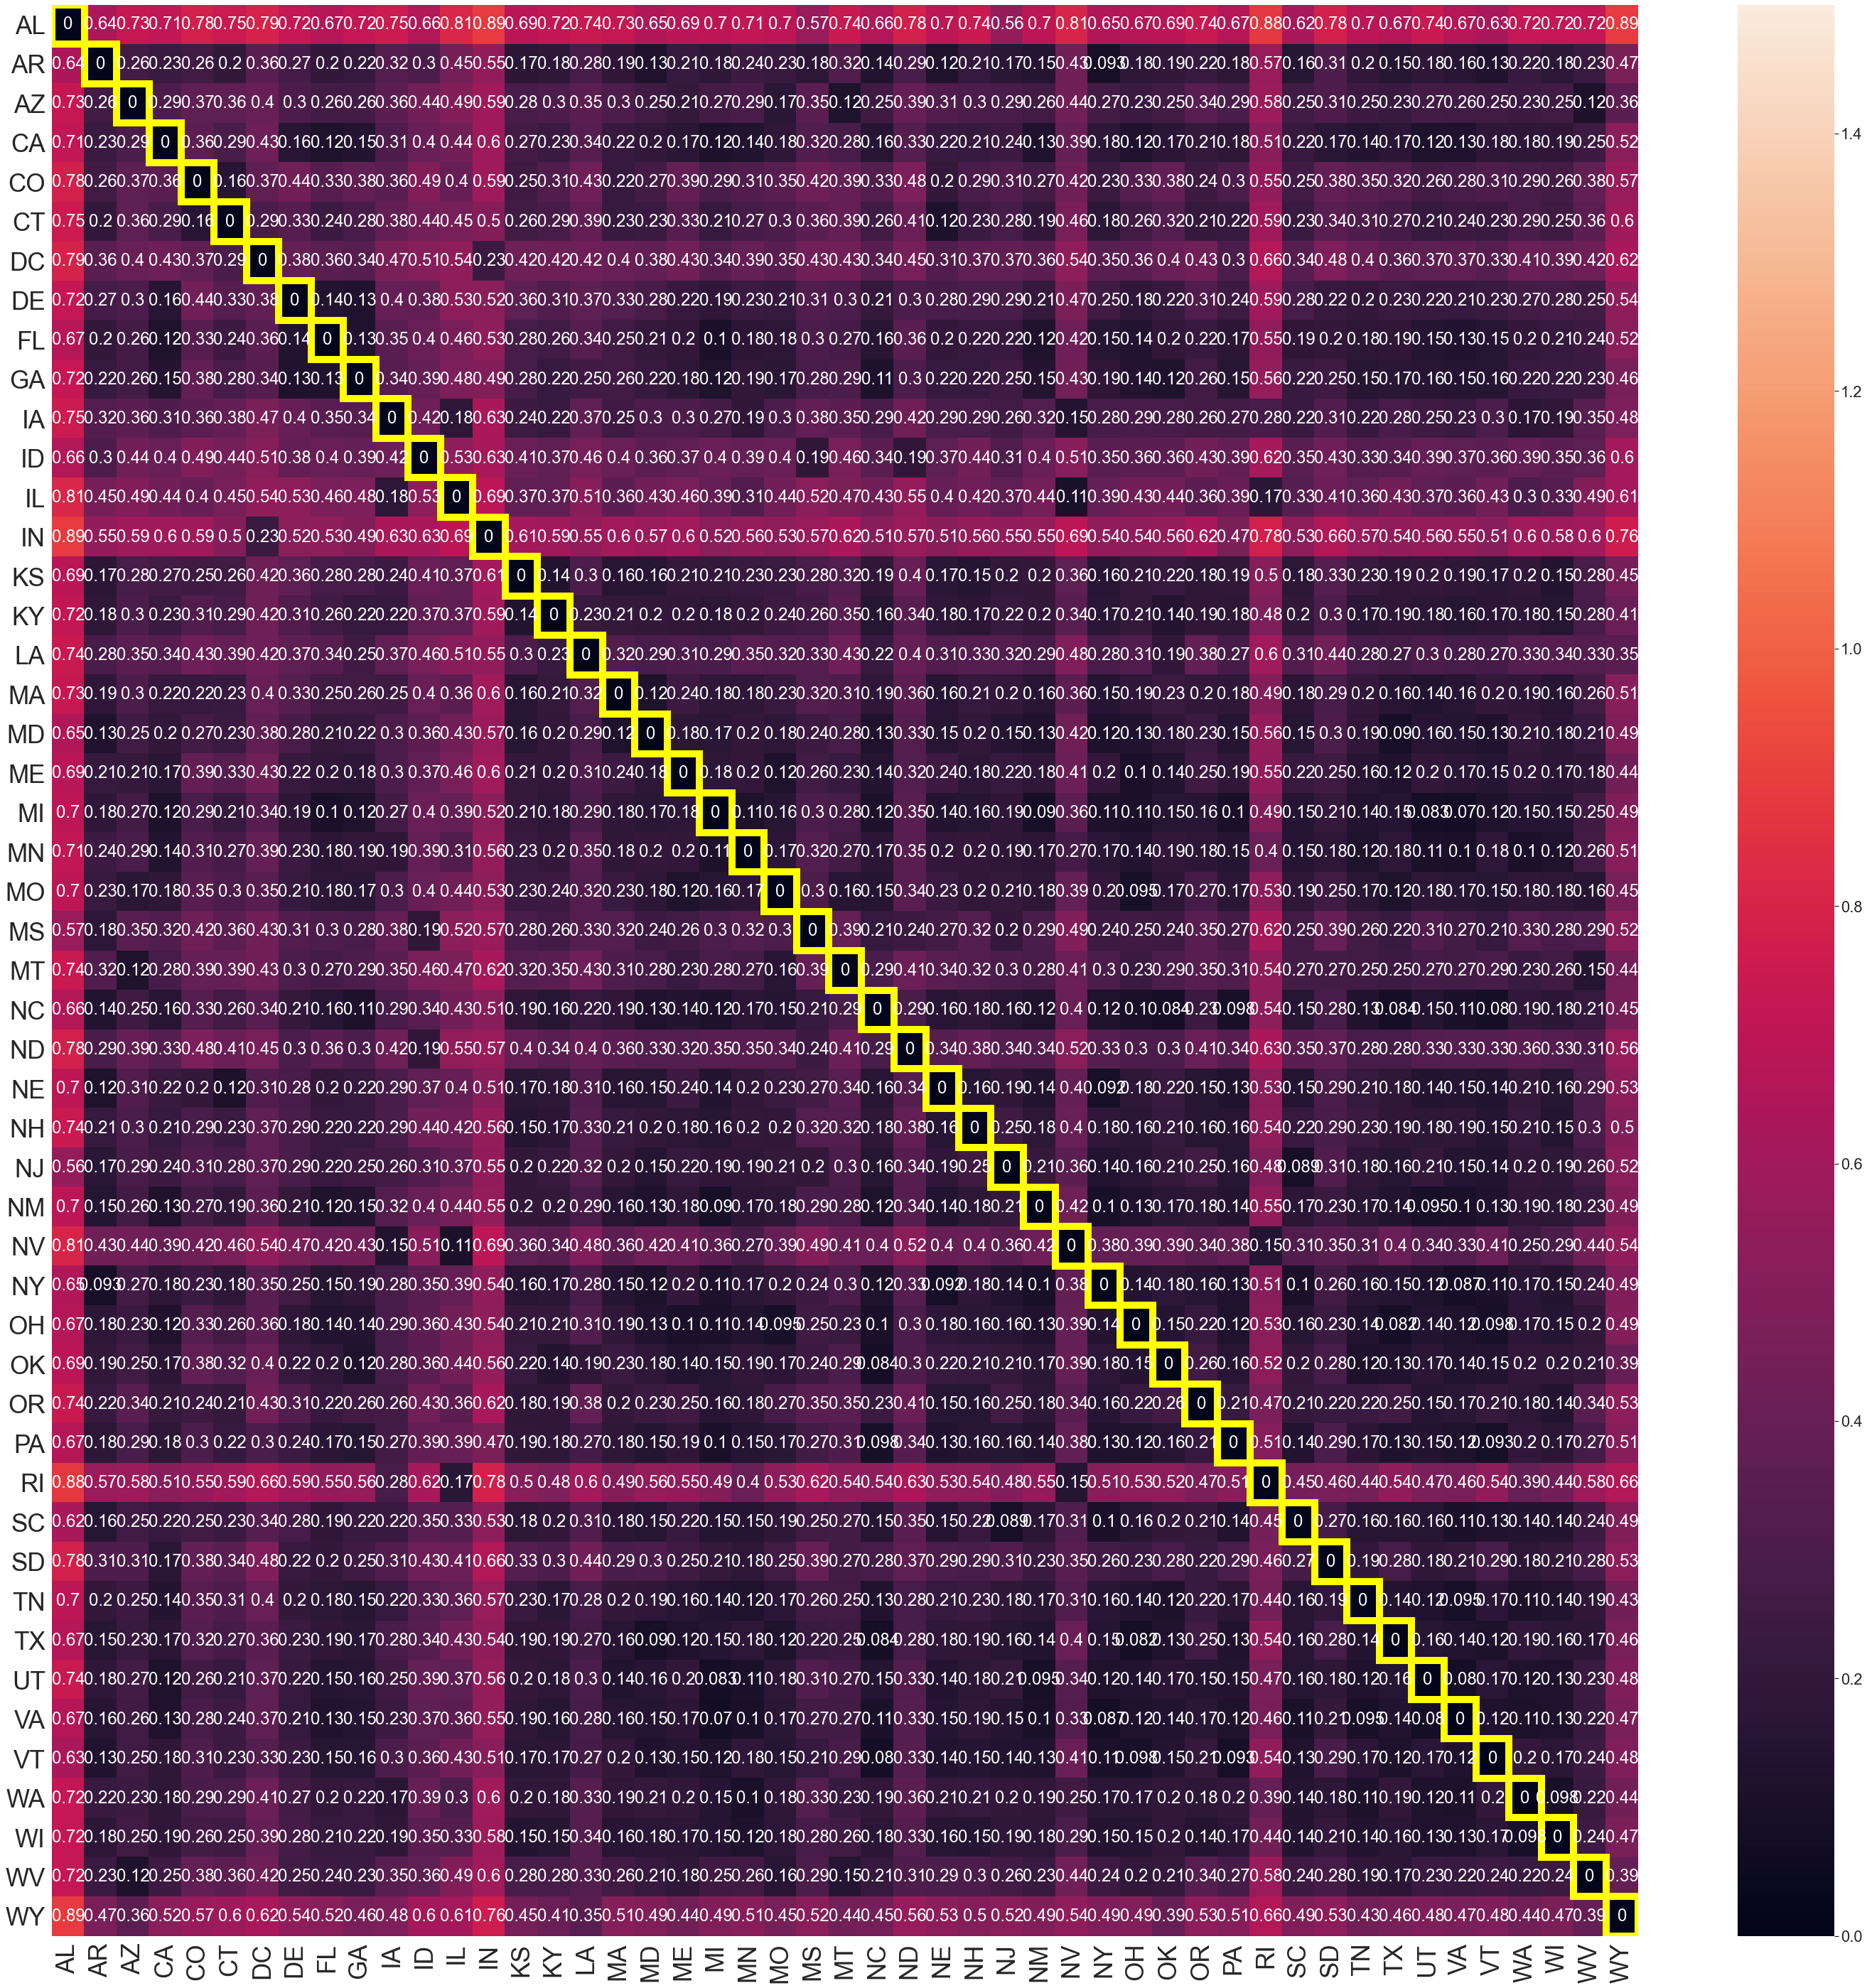

<Figure size 3600x3600 with 0 Axes>

In [90]:
#temporallist = [temporal_1,temporal_2,temporal_3,temporal_4]
#llist = [temporal_1_comparison,temporal_2_comparison,temporal_3_comparison,temporal_4_comparison]
temporallist = [temporal_flat]
llist = [temporal_year_comparison]
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Jaccard\Vaers_tp"+str(kk)+'_LDA'+str('\\')+str(drugnamepath)+"_20210608")

#os.chdir(r"D:\Research\FAERS_Public_LDA\Results\Jaccard\tp"+str(topic)+"\\"+str(drugnamepath))
#os.chdir(r"G:\Research\FAERS_Public\Results\Jaccard\tp10"+str('\\')+str(drugnamepath))
#os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Jaccard\tp"+str(topic)+"\\"+str(drugnamepath))
sns.set(font_scale=2, rc={'figure.figsize':(50,50)})


plt.tick_params(labelsize=25)
plt.xticks(fontsize=35, rotation=90) #font size for x ticks
plt.yticks(fontsize=35) #font size for x ticks
for x,y in zip(llist,temporallist):
    number = y
    ax = sns.heatmap(x,annot=True, vmin=0, vmax=1.5)#change here for input

    #ax.set_ylabel('FAERS (Jaccard Index Coefficent (10 Topics)')
    #ax.set_xlabel("FAERS (Jaccard Index Coefficent (10 Topics), spatial: "+str(countofcountries)+" countires, Temporal: "+str(y)+" Drug: "+str(drugname))#change here
    for x in range(0,len(var)):
    
        ax.add_patch(Rectangle((x, x), 1, 1, fill=False, edgecolor='#ffff00', lw=10))
        
    #plt.title("Jaccard Index Coefficent (10 Topics)", fontsize=50)#change here
    plt.savefig("Jaccard_Similiarity_testing_"+str(countofcountries)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_topic"+str(topic)+"_version_naive.png")

    
    

    plt.show()
    plt.clf()

for x in range(0,len(var)):
    print(str(var[x])+'2016_all =  np.array([')
    for y in range(0,len(var)):
        print('np.sqrt(np.sum(('+str(var[x])+'2016 - '+str(var[y])+"2016)**2)),")
        #print(var[x], var[y])
    print('])')


In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage
temporal_year_mat = np.array([[temporal_year_distance1]])#lenalid_distance2
temporal_year_mat = temporal_year_mat.reshape(len(var), len(var))
########
#temporal_2_mat = np.array([[temporal_2_distance1]])#lenalid_distance2
#temporal_2_mat = temporal_2_mat.reshape(len(var), len(var))
########
#temporal_3_mat = np.array([[temporal_3_distance1]])#lenalid_distance2
#temporal_3_mat = temporal_3_mat.reshape(len(var), len(var))
########
#temporal_4_mat = np.array([[temporal_4_distance1]])#lenalid_distance2
#temporal_4_mat = temporal_4_mat.reshape(len(var), len(var))


single


<ipython-input-92-d588ccbd02a7>:29: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(_mat, lm)#LBNE_mat_distArray


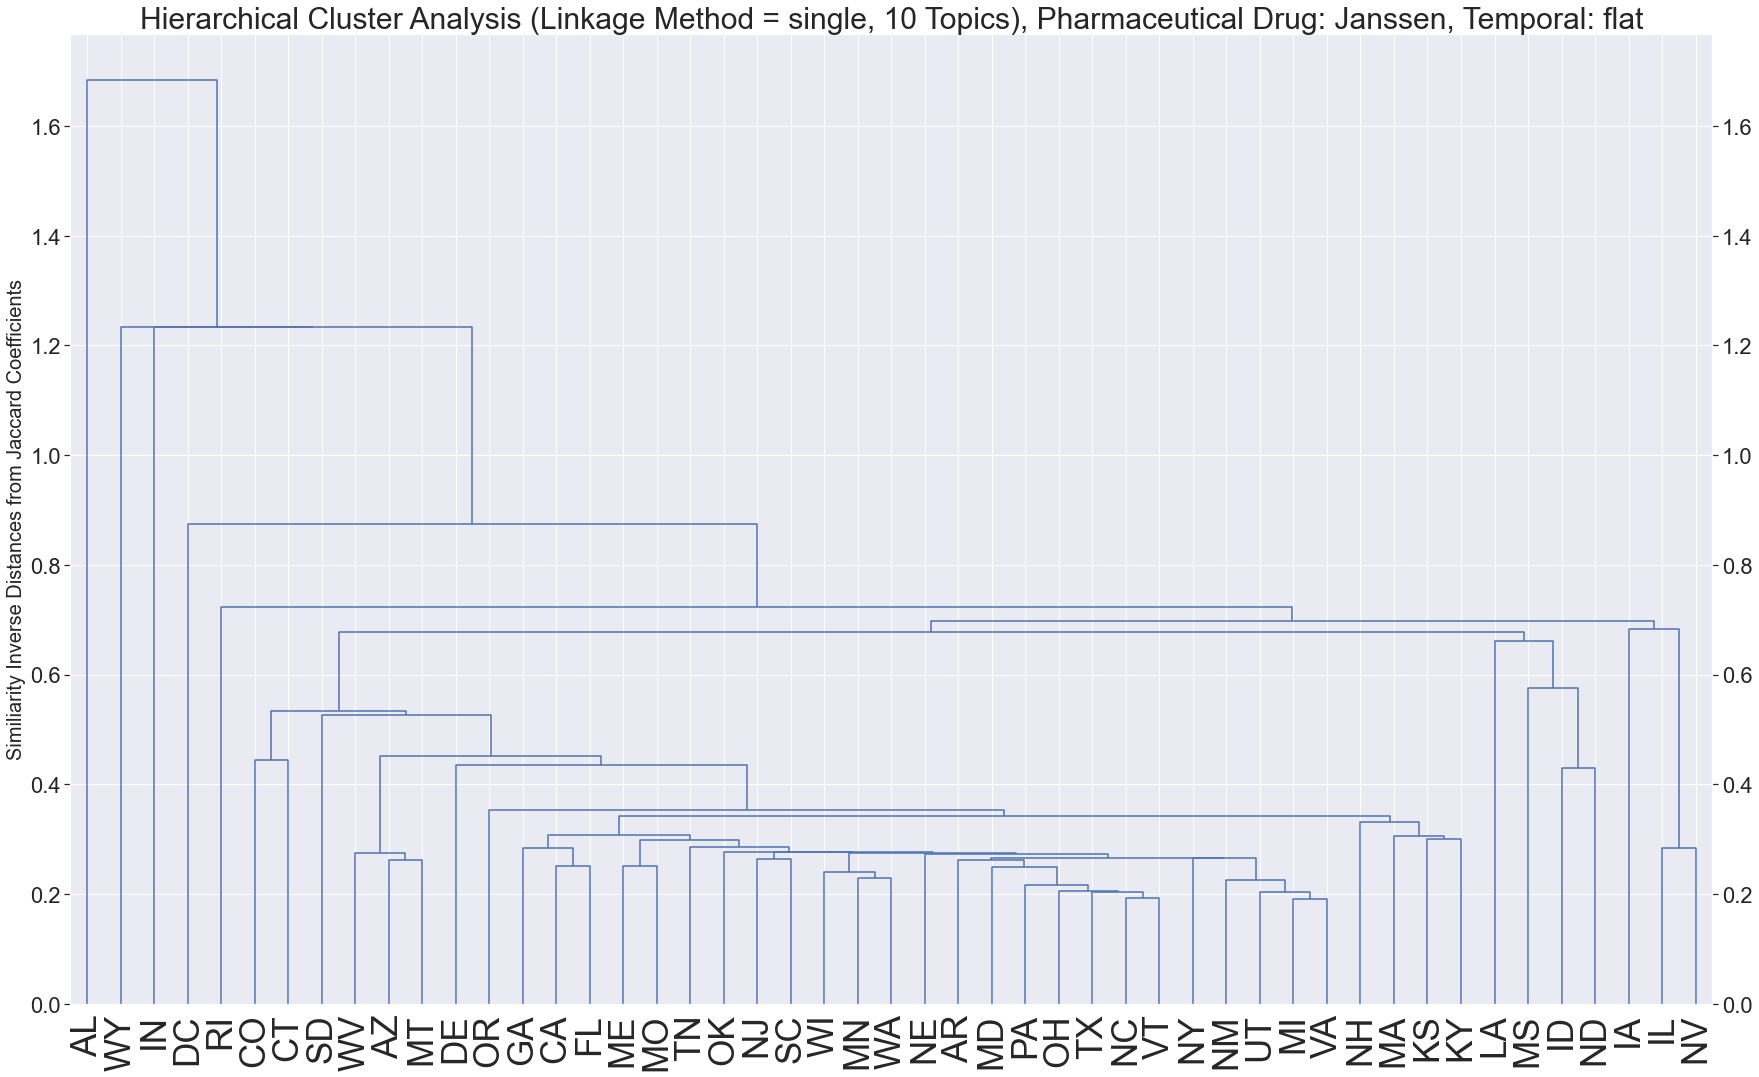

complete


<Figure size 3600x3600 with 0 Axes>

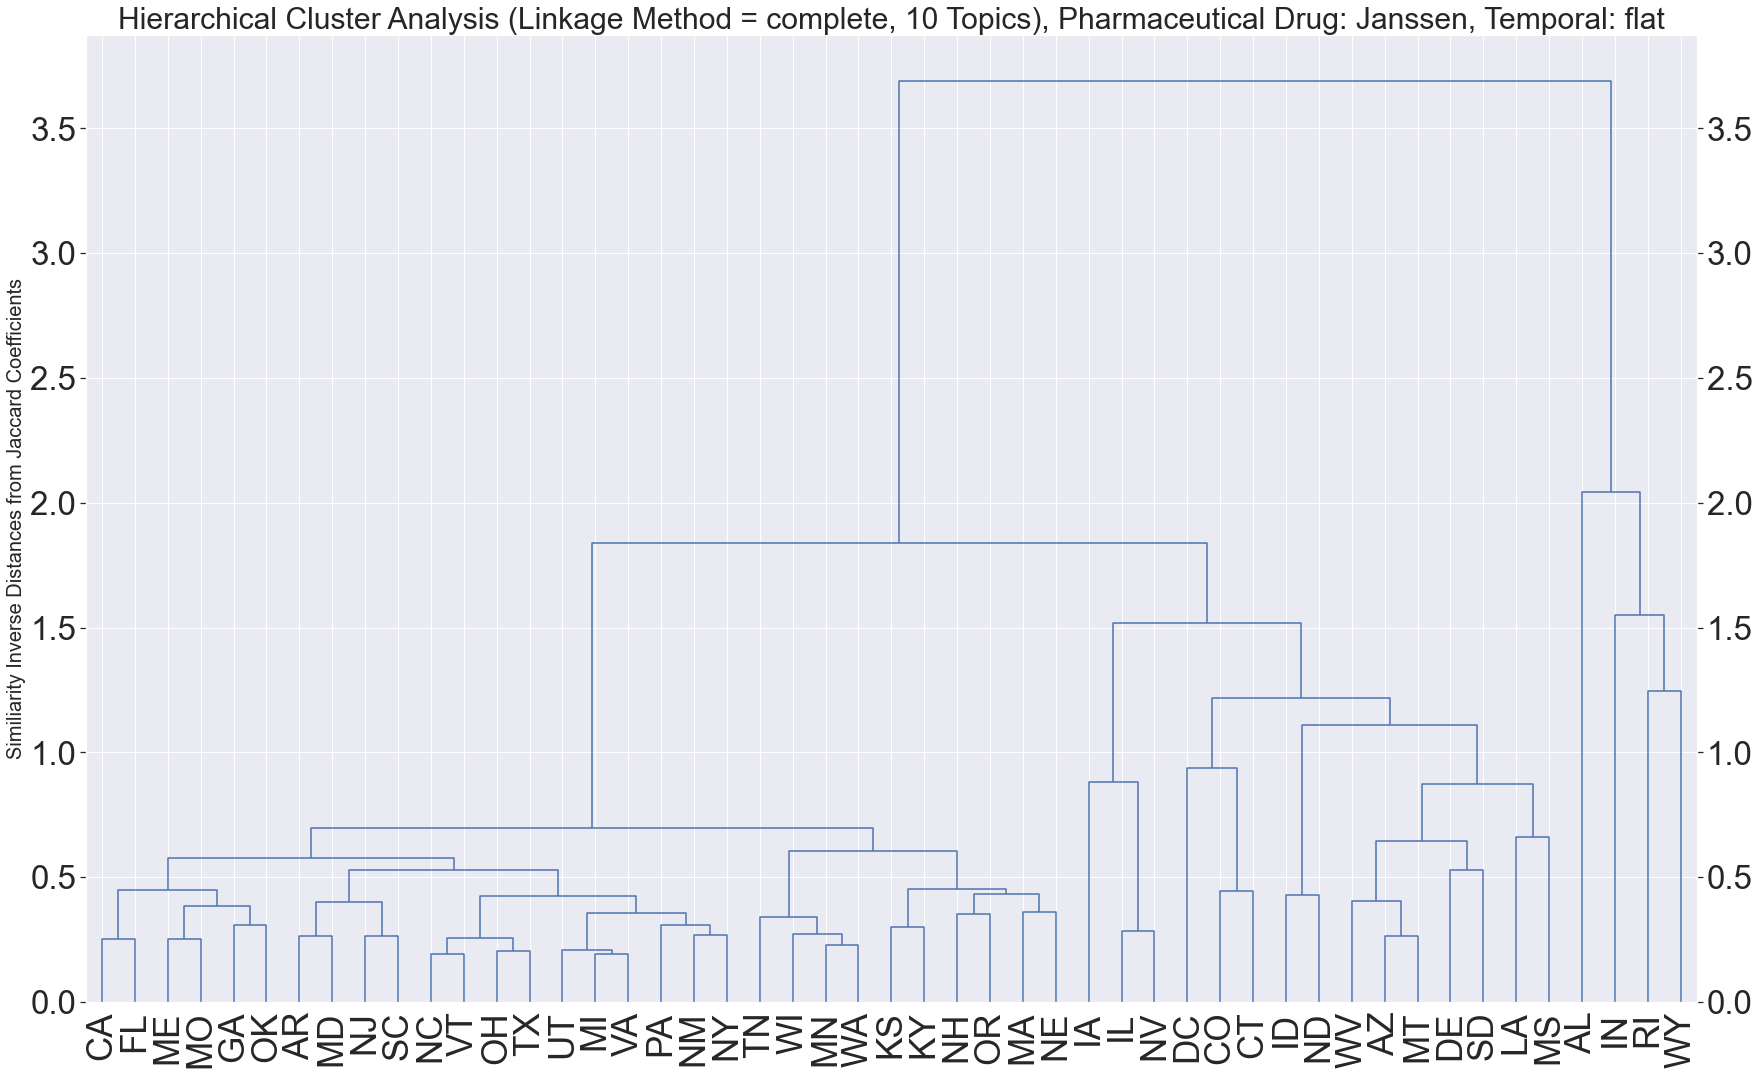

<Figure size 3600x3600 with 0 Axes>

In [92]:
#os.chdir(r"D:\Research\FAERS_Public_LDA\Results\dendo\tp"+str(topic)+"\\"+str(drugnamepath))
#os.chdir(r"D:\Research\FAERS_Public\Journal_submission\IJGI_Dec2019\images_moran\dendo")
#os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\dendo\tp"+str(topic)+"\\"+str(drugnamepath))
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\dendo\Vaers_tp"+str(kk)+'_LDA'+str('\\')+str(drugnamepath)+"_20210608")

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

linkagemethod =['single','complete']
#complete


temporallist = [temporal_flat]
llist = [temporal_year_distance1]
for lm in linkagemethod:
    print(lm)
    for x,y in zip(llist,temporallist):
        plt.figure(figsize=(25, 15))
        plt.tick_params(axis='both', left='on', top='off', right='on', bottom='on', labelleft='on', labeltop='off', labelright='on', labelbottom='on')
        sns.set(font_scale=3)#, rc={'figure.figsize':(400,400)})

        number = y
        #year ='y'+str(number)+'_comparison'
        #print(year)    
        #quarter ='q'+str(number)+'_comparison'
       # print(quarter)
        _mat = np.array([[x]])#lenalid_distance2
        _mat = _mat.reshape(len(var), len(var))
        Z = linkage(_mat, lm)#LBNE_mat_distArray





        plt.xticks(fontsize=5, rotation=90) #font size for x ticks
        plt.tight_layout()
        #plt.axhline(y=0.3, c='grey', lw=1, linestyle='dashed')
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=35.,
            labels=temporal_year_df.index, count_sort=False, distance_sort=True,color_threshold=0.0 )#, color_threshold=0.212)#, color_threshold=0.3)#, color_threshold=0.02)

        plt.title("Hierarchical Cluster Analysis (Linkage Method = "+str(lm)+", 10 Topics), Pharmaceutical Drug: "+str(drugname)+", Temporal: "+str(y), fontsize=30)#Change here

        #plt.ylabel('Similiarity between ' +str(countofcountries)+' European Countries using FAERS Post Market Adverse Events', fontsize=20)#Change here
        plt.ylabel('Similiarity Inverse Distances from Jaccard Coefficients', fontsize=20)
        plt.box('off')

      ##  plt.savefig("Dendrogram_Tree_cluster_linkage_"+str(lm)+'_'+str(countofcountries)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_version_naive.png", dpi=300)

        plt.show()
        plt.clf()

<ipython-input-93-492569561f0e>:34: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(_mat, lm)


<Figure size 3600x3600 with 0 Axes>

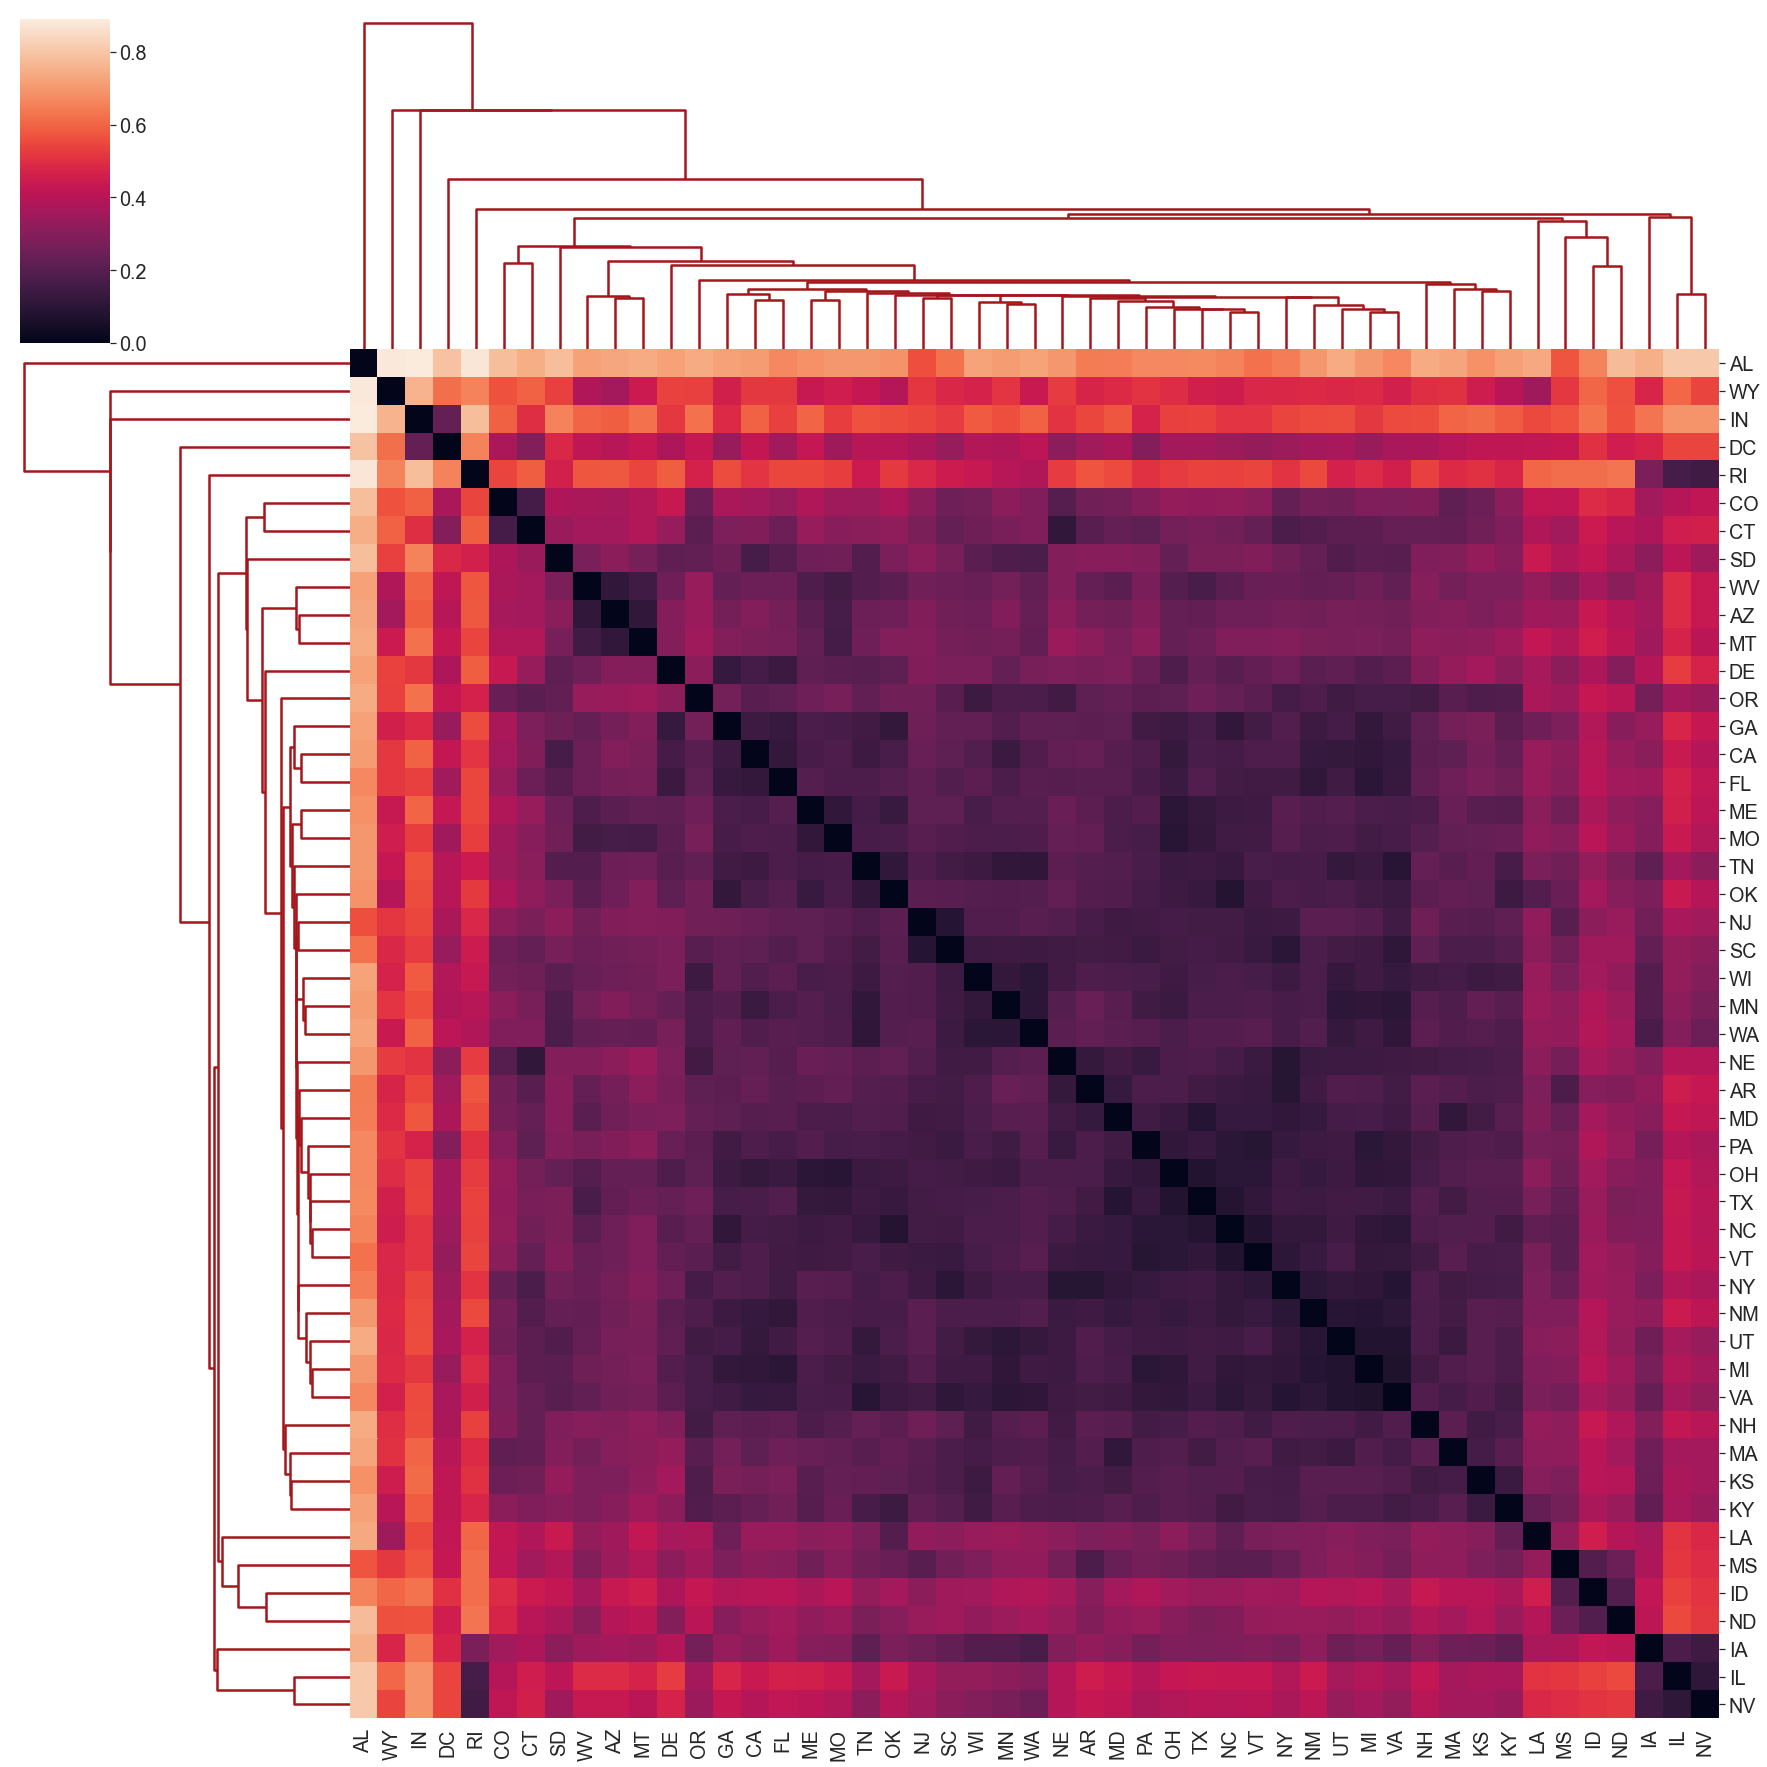

<Figure size 3600x3600 with 0 Axes>

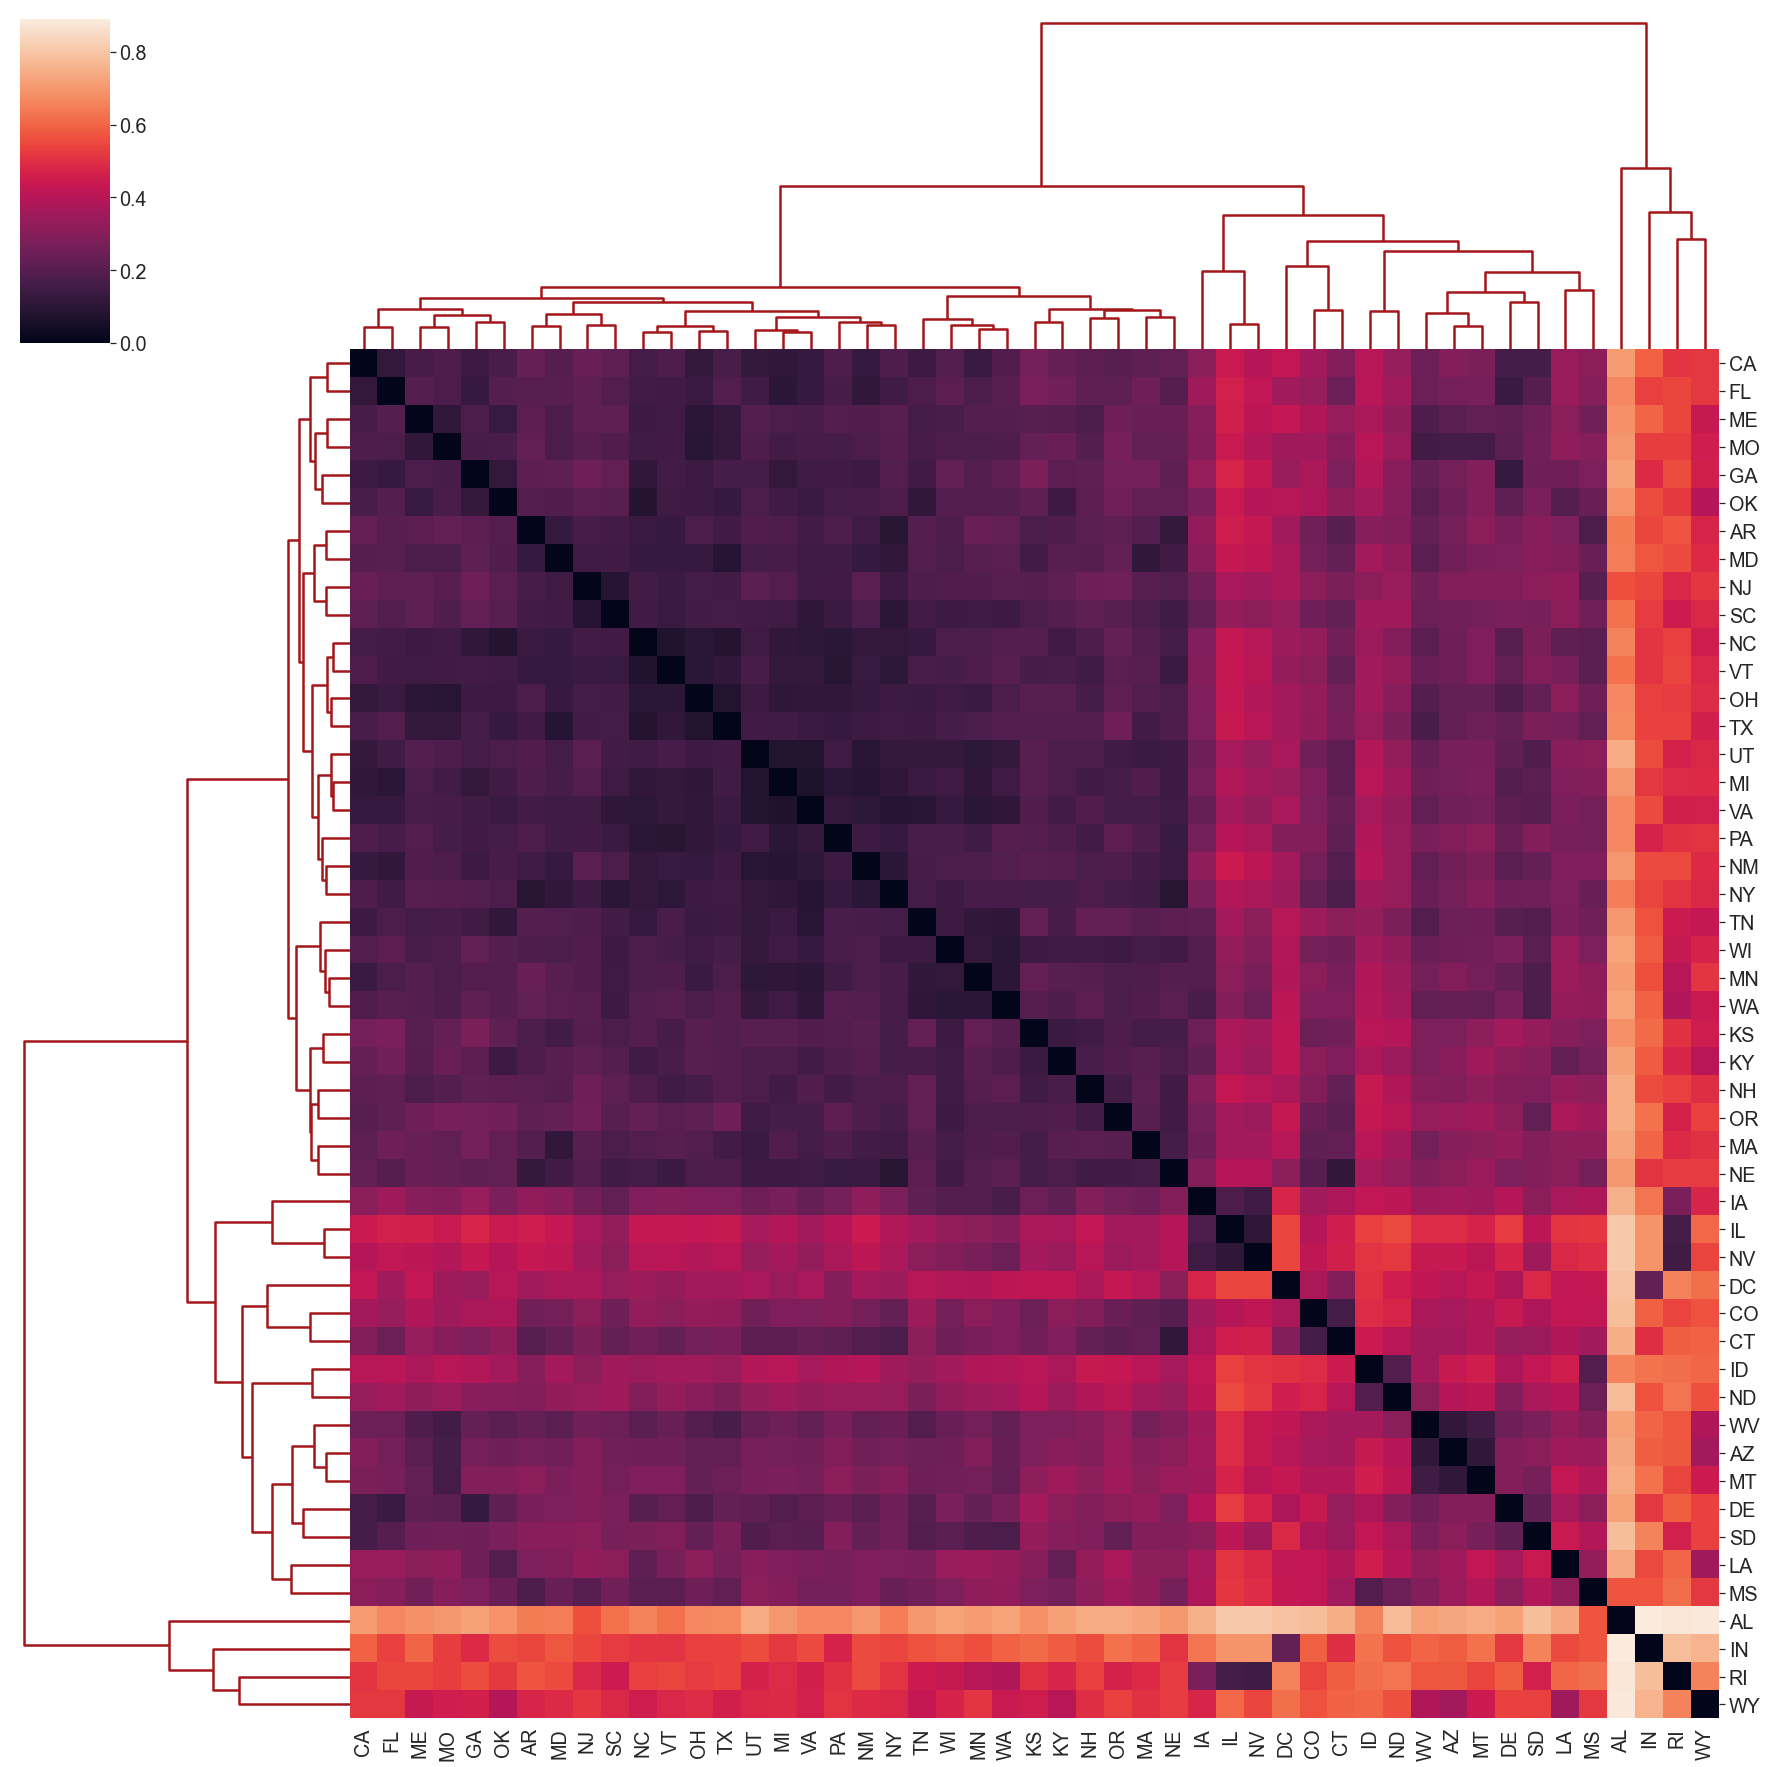

<Figure size 3600x3600 with 0 Axes>

In [93]:
#single
#complete
import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
#os.chdir(r"D:\Research\FAERS_Public_LDA\Results\Dendo_plus_Jaccard\tp"+str(topic)+"\\"+str(drugnamepath))
#os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Dendo_plus_Jaccard\tp"+str(topic)+"\\"+str(drugnamepath))
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\dendo_plus_Jaccard\Vaers_tp"+str(kk)+'_LDA'+str('\\')+str(drugnamepath)+"_20210608")

sns.set(font_scale=1, rc={'figure.figsize':(50,50)})

#single
#complete
#quarterlst1 = [q1_distance,q2_distance,q3_distance,q4_distance]
#llist = [q1_distance1,q2_distance1,q3_distance1,q4_distance1]
#llist = [y1_distance1,y2_distance1,y3_distance1,y4_distance1]

temporallistz = [temporal_year_distance]
temporallist = [temporal_flat]
llist = [temporal_year_distance1]
linkagemethod =['single','complete']
for lm in linkagemethod:
    for x,y,z in zip(llist,temporallist,temporallistz):
        plt.figure(figsize=(50, 50))
        #plt.tick_params(axis='both', left='on', top='off', right='on', bottom='on', labelleft='on', labeltop='off', labelright='on', labelbottom='on')
        sns.set(font_scale=1.8)#, rc={'figure.figsize':(400,400)})

        number = y
        #year ='y'+str(number)+'_comparison'
        #print(year)    
        #quarter ='q'+str(number)+'_comparison'
       # print(quarter)
        _mat = np.array([[x]])#lenalid_distance2
        _mat = _mat.reshape(len(var), len(var))
        Z = linkage(_mat, lm)

    #for x,y,z in zip(llist,range(1,5),quarterlst1):
        #sns.set(font_scale=1, rc={'figure.figsize':(200,200)})
        #number = y

        #year ='y'+str(number)+'_comparison'

        #_mat = np.array([[x]])#lenalid_distance2
        #_mat = _mat.reshape(14, 14)
        #Z = linkage(_mat, 'single')#LBNE_mat_distArray


        sns.clustermap(z,  row_linkage=Z, col_linkage=Z, figsize=(25, 25),yticklabels=1, xticklabels=1,tree_kws=dict(linewidths=2.5, colors=('#a4161a')))# change here


        #plt.title("Hierarchical Clustering (Method = "+str(lm)+", Top 10 frequent items), drug name: "+str(drugname)+", temporal: "+str(y), fontsize=15)#Change here

       # plt.title("Hierarchical Clustering (Method = "+str(linkagemethod)+", Top 4 frequent items), count of countries: "+str(countofcountries)+" Drug: ",+str(drugname)+
               #   " temporal: "+str(y))

    #    #plt.savefig("Dendrogram_Tree_plus_jaccard_FAERs_Similiarity_Top_4_frequent_items_19_countries_minsup_0dot01_"+year+".png", dpi=300, bbox_inches="tight")
       ## plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_"+str(lm)+"250dpi_.png", dpi=250, bbox_inches="tight")
        ##plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_"+str(lm)+"500dpi_.png", dpi=500, bbox_inches="tight")
       ## plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_"+str(lm)+"800dpi_.png", dpi=800, bbox_inches="tight")

        
plt.show()
plt.clf()

In [94]:
from scipy.cluster.hierarchy import linkage

_1row_clusters_single = linkage(temporal_year_distance1, method='single')#lenalid_distance2
#_2row_clusters_single = linkage(temporal_2_distance1, method='single')
#_3row_clusters_single = linkage(temporal_3_distance1, method='single')
#_4row_clusters_single = linkage(temporal_4_distance1, method='single')

from scipy.cluster.hierarchy import linkage

_1row_clusters_complete = linkage(temporal_year_distance1, method='complete')
#_2row_clusters_complete = linkage(temporal_2_distance1, method='complete')#complete
#_3row_clusters_complete = linkage(temporal_3_distance1, method='complete')
#_4row_clusters_complete = linkage(temporal_4_distance1, method='complete')

<ipython-input-94-1317fd6ad25c>:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  _1row_clusters_single = linkage(temporal_year_distance1, method='single')#lenalid_distance2


In [95]:
from scipy.cluster.hierarchy import fcluster
#import pysal as ps 

#lenalid_distance = 1-lenalid_df
#bupreno_distance = 1-bupreno_df
#etanerc_distance = 1-etanerc_df
#nataliz_distance = 1-nataliz_df

#list1 = [irow_clusters_single, terow_clusters_single, tirow_clusters_single, prow_clusters_single,
 #       irow_clusters_complete, terow_clusters_complete, tirow_clusters_complete, prow_clusters_complete]
#list2 = ['irow_clusters_single', 'terow_clusters_single', 'tirow_clusters_single', 'prow_clusters_single',
 #       'irow_clusters_complete', 'terow_clusters_complete', 'tirow_clusters_complete', 'prow_clusters_complete']

cluster_output_appended_data = []
list1 = [_1row_clusters_single,
        _1row_clusters_complete]
list2 = ['yr1row_clusters_single'
        'yr1row_clusters_complete']

#list1 = [lrow_clusters_complete, brow_clusters_complete, nrow_clusters_complete, erow_clusters_complete]

#for x,x1 in zip(list1, list2):
 #   assignments = fcluster(x,0.1,'distance')  #0.45 e
    #labels=interfe_df.index###################################################
  #  labels=lenalid_df.index############################################################

#    print(set(assignments))
 #   print(str(x1))
  #  cluster_output = pd.DataFrame({'STATE_ABBR':labels , 'cluster':assignments})


list2 = np.linspace(0.0, 2, num=100)

for x,y in zip(list1, list2):
        #for x in range(1,12):#new

    #print(x+str(y))
    assignments = fcluster(x, y,"distance")  #0.45 ey,'distance',y*nataliz_distance2.max()
   # labels=interfe_df.index#######################################################################change this one
    labels=temporal_year_df.index#######################################################################change this one

    #print('cluster cut off point= ', str(y))############
    #print(set(assignments))
    cluster_output = pd.DataFrame({'occr_country':labels , 'cluster':assignments})
    #display(cluster_output)
    cluster_output_appended_data.append(cluster_output)
# see pd.concat documentation for more info
cluster_output_appended_data_1 = pd.concat(cluster_output_appended_data, axis=1)
cluster_output_appended_data_0 = pd.concat(cluster_output_appended_data, axis=0)
cluster_output_appended_data_0
   # mx = np.max(clusters_assignments)
   # mx = mx+1
   # print(mx-1, 'clusters')
#cluster_output['cluster1'] = (cluster_output['cluster'] ==1).astype(int)
#cluster_output['cluster2'] = (cluster_output['cluster'] ==2).astype(int)
#cluster_output['cluster3'] = (cluster_output['cluster'] ==3).astype(int)
#cluster_output['cluster4'] = (cluster_output['cluster'] ==4).astype(int)
#cluster_output['cluster5'] = (cluster_output['cluster'] ==5).astype(int)
#cluster_output['cluster6'] = (cluster_output['cluster'] ==6).astype(int)
#cluster_output['cluster7'] = (cluster_output['cluster'] ==7).astype(int)
#cluster_output['cluster8'] = (cluster_output['cluster'] ==8).astype(int)
#cluster_output['cluster9'] = (cluster_output['cluster'] ==9).astype(int)
#cluster_output['cluster10'] = (cluster_output['cluster'] ==10).astype(int)
#cluster_output['cluster11'] = (cluster_output['cluster'] ==11).astype(int)
#cluster_output['cluster12'] = (cluster_output['cluster'] ==12).astype(int)
#cluster_output['cluster13'] = (cluster_output['cluster'] ==13).astype(int)
#cluster_output['cluster14'] = (cluster_output['cluster'] ==14).astype(int)
#cluster_output['cluster15'] = (cluster_output['cluster'] ==15).astype(int)
#cluster_output['cluster16'] = (cluster_output['cluster'] ==16).astype(int)
#cluster_output['cluster17'] = (cluster_output['cluster'] ==17).astype(int)
#cluster_output['cluster18'] = (cluster_output['cluster'] ==18).astype(int)
#cluster_output['cluster19'] = (cluster_output['cluster'] ==19).astype(int)
#cluster_output['cluster20'] = (cluster_output['cluster'] ==20).astype(int)
#cluster_output['cluster21'] = (cluster_output['cluster'] ==21).astype(int)
#cluster_output['cluster22'] = (cluster_output['cluster'] ==22).astype(int)
#cluster_output['cluster23'] = (cluster_output['cluster'] ==23).astype(int)
#cluster_output['cluster24'] = (cluster_output['cluster'] ==24).astype(int)
#cluster_output['cluster25'] = (cluster_output['cluster'] ==25).astype(int)
#cluster_output['cluster26'] = (cluster_output['cluster'] ==26).astype(int)
#cluster_output['cluster27'] = (cluster_output['cluster'] ==27).astype(int)
#cluster_output['cluster28'] = (cluster_output['cluster'] ==28).astype(int)
#cluster_output['cluster29'] = (cluster_output['cluster'] ==29).astype(int)

#os.chdir(r"G:\Research\FAERS\Drug_Spatial\L_B_N_E\Data\Analysis_ready_data\Approri\summary_of_approri_dataset\spatial_auto\LBNE_method_single_complete_csv_cluster_at_different_cutoff")

#cluster_output.to_csv('spatial_auto_cutooff_0dot8_etanerc_method_single.csv')

#cluster_output
#clu = pd.get_dummies(cluster_output['cluster'])

#cluster_output_appended_data_0

occr_country  cluster
0            AL       49
1            AR       22
2            AZ        3
3            CA        6
4            CO        1
..          ...      ...
44           VT       12
45           WA       22
46           WI       23
47           WV       41
48           WY       47

[98 rows x 2 columns]

#spatial_list1 = [x for x in var if x != "ee"]
len(var)
spatial_list = var
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from libpysal.weights import fuzzy_contiguity

#os.chdir(r"C:\Users\AhmedAskar\Desktop\FAERS_Public\Data\Helper_dataset\World")
#plt.title("Etanercept Hierarchical Clustering, method:single, (min sup=0.2, top (2) frequent items), cluster 4")

#world_shp = gpd.read_file(filename='world.shp')

#world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()
#world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()

#world_join = world_shp.merge(cluster_output, left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
#cluster_output
#usstates_join = pd.concat([usstates_shp, cluster_output], ignore_index=True)
#columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
#       'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
 #      'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
 #      'LAND_SQKM', 'COLORMAP']
#world_join.drop(columns, axis=1, inplace=True)
#cb = world_join['cluster']
#usstates_join.to_csv('ttest.csv')
#sns.set(font_scale=1, rc={'figure.figsize':(200,200)})
os.chdir(r"D:\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

world_shp = gpd.read_file(filename='world.shp')
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
#world_shp.head(1)
#cluster_output
world_shp.info()

In [96]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from libpysal.weights import fuzzy_contiguity

#os.chdir(r"C:\Users\AhmedAskar\Desktop\FAERS_Public\Data\Helper_dataset\World")
#plt.title("Etanercept Hierarchical Clustering, method:single, (min sup=0.2, top (2) frequent items), cluster 4")

#world_shp = gpd.read_file(filename='world.shp')

#world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()
#world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()

#world_join = world_shp.merge(cluster_output, left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
#cluster_output
#usstates_join = pd.concat([usstates_shp, cluster_output], ignore_index=True)
#columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
#       'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
 #      'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
 #      'LAND_SQKM', 'COLORMAP']
#world_join.drop(columns, axis=1, inplace=True)
#cb = world_join['cluster']
#usstates_join.to_csv('ttest.csv')
#sns.set(font_scale=1, rc={'figure.figsize':(200,200)})
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset\USState")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

us_shp = gpd.read_file(filename='US_State_Boundaries.shp')
#world_shp = gpd.read_file(filename='world.shp')
#world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
#world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
#world_shp.head()
#world_shp.ISO_2DIGIT
#europe = ['AL', 'AD', 'AM', 'AT', 'BY', 'BE', 'BA', 'BG', 'CH', 'CY', 'CZ', 'DE',
 #       'DK', 'EE', 'ES', 'FO', 'FI', 'FR', 'GB', 'GE', 'GI', 'GR', 'HU', 'HR',
   #     'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MC', 'MK', 'MT', 'NO', 'NL', 'PL',
  #      'PT', 'RO', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'VA']
#spatial_list = ["de","fr","gb","it","be","ch","es","nl","cz","se","gr","at","ie","pt","dk","no","sk","fi","hu"] # took out us, ca, pr, ru
us_shp2 = us_shp[us_shp['STATE_ABBR'].str.contains('|'.join(spatial_list),case=False, na=False, regex=True)]
#world_shp1 = world_shp[world_shp['ISO_2DIGIT'].str.contains('|'.join(europe),case=False, na=False, regex=True)]
us_shp2['centroid'] = us_shp2['geometry'].centroid
us_shp2['coords'] = us_shp2['geometry'].apply(lambda x: x.representative_point().coords[:])
us_shp2['coords'] = [coords[0] for coords in us_shp2['coords']]
us_shp2['coords']

#world_shp1['Lon'] = world_shp1.centroid.x
#world_shp1['Lat'] = world_shp1.centroid.y

us_join = us_shp2.merge(cluster_output, left_on='STATE_ABBR', right_on='occr_country', how='inner')

#cluster_output
#usstates_join = pd.concat([usstates_shp, cluster_output], ignore_index=True)
columns = ['FID', 'OBJECTID', 'NAME', 'STATE_FIPS', 'ORDER_ADM',
       'MONTH_ADM', 'DAY_ADM', 'YEAR_ADM', 'TYPE', 'POP', 'SQ_MILES',
       'PRIM_MILES', 'Shape_Leng', 'Shape__Are', 'Shape__Len']
us_join = us_join.sort_values(by=['occr_country'], ascending=True)
us_join.drop(columns, axis=1, inplace=True)
cb = us_join['cluster']
#usstates_join.to_csv('ttest.csv')
sns.set(font_scale=1, rc={'figure.figsize':(200,200)})

us_join
#temporal_df
labels
us_join.reset_index(drop=True, inplace=True)
us_join.info()
#us_join['CNTRY_NAME']

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   STATE_ABBR    49 non-null     object  
 1   geometry      49 non-null     geometry
 2   centroid      49 non-null     geometry
 3   coords        49 non-null     object  
 4   occr_country  49 non-null     object  
 5   cluster       49 non-null     int32   
dtypes: geometry(2), int32(1), object(3)
memory usage: 2.2+ KB


<ipython-input-96-384705b5f882>:44: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  us_shp2['centroid'] = us_shp2['geometry'].centroid
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [97]:
wf = fuzzy_contiguity(us_join)
wf[0]
Wmatrix, ids = wf.full()
wf.weights

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{0: [1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0],
 7: [1.0, 1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1

In [98]:
#1-temporal_1_comparison[['ch','de','it','si','cz','hu','sk']].iloc[0]
#-0.31012435629837065, 0.33605636310312814, -0.3935991547652453, 0.16953451925539775, -0.20440984717637356, 0.9977914094924927, -0.39887803588359283, ],


#wq = libpysal.weights.Queen.from_dataframe(world_join)
weights=[]
wf = fuzzy_contiguity(world_join)
wf[0]
Wmatrix, ids = wf.full()
#Wmatrix
n_neighbors = Wmatrix.sum(axis=1)
#qW.cardinalities[0]
#qW.transform = 'r'
#Wmatrix, ids = qW.full()
#Wmatrix.sum(axis=1)
#world_join.plot()
#Wmatrix[0]=temporal_1_distance1[0]
#qW[0] =Wmatrix[0]
#Wmatrix[0]
n_neighbors[1]
print('={')
#Wmatrix
for x in range(0,len(world_join['occr_country'])):
   # print(x)
    print(str(x)+':[')
    #print(list(wf[x]))
    for y in list(wf[x]):
        #print(x,y)
        #weights.append(1-temporal_4_comparison.iloc[x][y])
        #print('temporal_1_comparison.iloc['+str(x)+']['+str(y)+']', end = ',')
        #print(1-temporal_1_comparison.iloc[x][y],  end = ', ')
        #print(1-temporal_2_comparison.iloc[x][y],  end = ', ')
        #print(1-temporal_3_comparison.iloc[x][y],  end = ', ')
        #print(1-temporal_4_comparison.iloc[x][y],  end = ', ')
        #print(1+temporal_1_comparison.iloc[x][y],  end = ', ')
        #print(1+temporal_2_comparison.iloc[x][y],  end = ', ')
       # print(1+temporal_3_comparison.iloc[x][y],  end = ', ')
       #print(1+temporal_4_comparison.iloc[x][y],  end = ', ')
        print(temporal_year_comparison.iloc[x][y],  end = ', ')
        #print(temporal_2_comparison.iloc[x][y],  end = ', ')
       # print(temporal_3_comparison.iloc[x][y],  end = ', ')
        #print(temporal_4_comparison.iloc[x][y],  end = ', ')
        
        
    print('],',sep=',')
print('}')
    #print(wf[x].keys())
    #print(qW[x].values())
#n_neighbors[0]

In [99]:
we0={0: [1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0],
 6: [1.0, 1.0],
 7: [1.0, 1.0, 1.0],
 8: [1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0, 1.0],
 19: [1.0],
 20: [1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0, 1.0],
 36: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 37: [1.0, 1.0],
 38: [1.0, 1.0],
 39: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 40: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 41: [1.0, 1.0, 1.0, 1.0],
 42: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 43: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 44: [1.0, 1.0, 1.0],
 45: [1.0, 1.0],
 46: [1.0, 1.0, 1.0, 1.0],
 47: [1.0, 1.0, 1.0, 1.0, 1.0],
 48: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}



In [100]:
#wq = libpysal.weights.Queen.from_dataframe(world_join)
wf = fuzzy_contiguity(us_join)
wf[0]
Wmatrix, ids = wf.full()
#Wmatrix
n_neighbors = Wmatrix.sum(axis=1)
#qW.cardinalities[0]
#qW.transform = 'r'
#Wmatrix, ids = qW.full()
#Wmatrix.sum(axis=1)
#world_join.plot()
#Wmatrix[0]=temporal_1_distance1[0]
#qW[0] =Wmatrix[0]
#Wmatrix[0]
n_neighbors[1]
#Wmatrix
print('ne1 = {')
for x in range(0,len(us_join['STATE_ABBR'])):
    
    #print('ne_'+str(x)+'=(')
    print(x,':',list(wf[x]), end=', ')
    #for y in list(wf[x]):
        #print('temporal_1_comparison.iloc['+str(x)+']['+str(y)+']', end = ',')
        #printprint(1-temporal_1_comparison.iloc[x][y], end = ',')
    
print('}')
    #print( wf[x])
    #print(wf[x].keys())
    #print(qW[x].values())
#n_neighbors[0]
#wf.cardinalities[0]
#list(wf[0])

ne1 = {
0 : [23, 40, 8, 9], 1 : [41, 34, 22, 16, 23, 40], 2 : [3, 31, 42, 30, 4], 3 : [35, 31, 2], 4 : [2, 42, 48, 30, 27, 34, 14], 5 : [32, 17, 37], 6 : [43, 18], 7 : [36, 18, 29], 8 : [0, 9], 9 : [0, 40, 8, 38, 25], 10 : [39, 27, 21, 22, 46, 12], 11 : [45, 35, 31, 42, 24, 48], 12 : [10, 22, 46, 13, 15], 13 : [12, 20, 15, 33], 14 : [4, 27, 34, 22], 15 : [22, 12, 13, 40, 33, 47, 43], 16 : [41, 1, 23], 17 : [32, 5, 44, 28, 37], 18 : [47, 43, 36, 6, 7], 19 : [28], 20 : [46, 13, 33], 21 : [26, 39, 10, 46], 22 : [27, 34, 14, 10, 1, 12, 40, 15], 23 : [1, 16, 0, 40], 24 : [11, 48, 26, 39], 25 : [40, 9, 38, 43], 26 : [24, 39, 21], 27 : [48, 4, 39, 14, 10, 22], 28 : [44, 17, 19], 29 : [36, 32, 7], 30 : [2, 42, 4, 41, 34], 31 : [35, 3, 11, 2, 42], 32 : [36, 29, 5, 44, 17], 33 : [13, 20, 15, 47, 36], 34 : [30, 4, 41, 14, 22, 1], 35 : [45, 3, 31, 11], 36 : [33, 47, 18, 32, 7, 29], 37 : [5, 17], 38 : [9, 25], 39 : [24, 48, 26, 27, 10, 21], 40 : [22, 1, 23, 0, 15, 9, 25, 43], 41 : [30, 34, 1, 16], 

In [101]:
ne1 = {
0 : [23, 40, 8, 9], 1 : [41, 34, 22, 16, 23, 40], 2 : [3, 31, 42, 30, 4], 3 : [35, 31, 2], 4 : [2, 42, 48, 30, 27, 34, 14], 5 : [32, 17, 37], 6 : [43, 18], 7 : [36, 18, 29], 8 : [0, 9], 9 : [0, 40, 8, 38, 25], 10 : [39, 27, 21, 22, 46, 12], 11 : [45, 35, 31, 42, 24, 48], 12 : [10, 22, 46, 13, 15], 13 : [12, 20, 15, 33], 14 : [4, 27, 34, 22], 15 : [22, 12, 13, 40, 33, 47, 43], 16 : [41, 1, 23], 17 : [32, 5, 44, 28, 37], 18 : [47, 43, 36, 6, 7], 19 : [28], 20 : [46, 13, 33], 21 : [26, 39, 10, 46], 22 : [27, 34, 14, 10, 1, 12, 40, 15], 23 : [1, 16, 0, 40], 24 : [11, 48, 26, 39], 25 : [40, 9, 38, 43], 26 : [24, 39, 21], 27 : [48, 4, 39, 14, 10, 22], 28 : [44, 17, 19], 29 : [36, 32, 7], 30 : [2, 42, 4, 41, 34], 31 : [35, 3, 11, 2, 42], 32 : [36, 29, 5, 44, 17], 33 : [13, 20, 15, 47, 36], 34 : [30, 4, 41, 14, 22, 1], 35 : [45, 3, 31, 11], 36 : [33, 47, 18, 32, 7, 29], 37 : [5, 17], 38 : [9, 25], 39 : [24, 48, 26, 27, 10, 21], 40 : [22, 1, 23, 0, 15, 9, 25, 43], 41 : [30, 34, 1, 16], 42 : [31, 11, 2, 48, 30, 4], 43 : [40, 15, 47, 25, 18, 6], 44 : [32, 17, 28], 45 : [35, 11], 46 : [10, 21, 12, 20], 47 : [15, 33, 43, 36, 18], 48 : [11, 42, 24, 4, 39, 27], }

In [102]:
from libpysal.weights import W

#w1 = W(ne1, we1, silence_warnings=False)
#w2 = W(ne1, we2, silence_warnings=False)
#w3 = W(ne1, we3, silence_warnings=False)
#w4 = W(ne1, we4, silence_warnings=False)
w0 = W(ne1, we0, silence_warnings=False)

#w5 = W(ne1, we5, silence_warnings=False)
#w6 = W(ne1, we6, silence_warnings=False)
#w7 = W(ne1, we7, silence_warnings=False)
#w8 = W(ne1, we8, silence_warnings=False)

#w1.weights
#cluster_output_appended_data_0['cluster']
world_join.head()
world_join = world_shp2.merge(cluster_output_appended_data_0, left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
#cluster_output
#usstates_join = pd.concat([usstates_shp, cluster_output], ignore_index=True)
columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
       'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
       'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
       'LAND_SQKM', 'COLORMAP']
world_join = world_join.sort_values(by=['occr_country'], ascending=True)
world_join.drop(columns, axis=1, inplace=True)
world_join.head()
world_join.info()

In [103]:
#W = w1
#W.transform = 'r'

sigs = HR90[LMo_HR90.p_sim <= .001]
W_sigs = Lag_HR90[LMo_HR90.p_sim <= .001]
insigs = HR90[LMo_HR90.p_sim > .001]
 W_insigs = Lag_HR90[LMo_HR90.p_sim > .001]
b,a = np.polyfit(HR90, Lag_HR90, 1)
#print(jc )
plt.plot(sigs, W_sigs, '.', color='firebrick')
plt.plot(insigs, W_insigs, '.k', alpha=.2)
                 # dashed vert at mean of the last year's PCI
plt.vlines(HR90.mean(), Lag_HR90.min(), Lag_HR90.max(), linestyle='--')
                 # dashed horizontal at mean of lagged PCI
plt.hlines(Lag_HR90.mean(), HR90.min(), HR90.max(), linestyle='--')

                # red line of best fit using global I as slope
plt.plot(HR90, a + b*HR90, 'r')
plt.text(s='$I = %.3f$' % I_HR90.I, x=50, y=15, fontsize=18)
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of HR90')
plt.xlabel('HR90')
sig = LMo_HR90.p_sim < 0.05
print(sig.sum())

#this be the oneee
from pysal.explore.esda.moran import Moran
from scipy.cluster.hierarchy import fcluster
import pysal as ps
from pysal.lib.weights import lat2W
#libpysal.weights.fuzzy_contiguity
from pysal.explore.esda.moran import Moran, Moran_Local
import libpysal as lps
from pysal.explore.esda.join_counts import Join_Counts
cols1 =['geometry','occr_country','cutoff' ]
cols = ['pvalue','zscore', 'moran_i', 'countries','dendo_cluster','dendo_cutoff','temporal','temporal2']
dat01 = pd.DataFrame(columns = cols)
dat05 = pd.DataFrame(columns = cols)
dat1 = pd.DataFrame(columns = cols)
datn = pd.DataFrame(columns = cols)

dfcluster_hotspot = pd.DataFrame(columns = cols1)
#ww = [w1, w2, w3, w4]
ww = [w1, w2, w3, w4]

list1 = [_1row_clusters_single, _2row_clusters_single, _3row_clusters_single, _4row_clusters_single,
        _1row_clusters_complete, _2row_clusters_complete, _4row_clusters_complete, _4row_clusters_complete]

#list1 = [_1row_clusters_single, _2row_clusters_single, _3row_clusters_single, _4row_clusters_single,
   #     _1row_clusters_complete, _2row_clusters_complete, _3row_clusters_complete, _4row_clusters_complete]
list1str = ['temporal_1_single', 'temporal_2_single', 'temporal_3_single', 'temporal_4_single',
        'temporal_1_complete', 'temporal_2_complete', 'temporal_3_complete', 'temporal_4_complete']
#list1 = [lrow_clusters_single, brow_clusters_single, nrow_clusters_single, erow_clusters_single]
#list1 = [lrow_clusters_complete, brow_clusters_complete, nrow_clusters_complete, erow_clusters_complete]

spatial_auto_dict ={}
statespatial_auto001 =[]
statespatial_auto05 =[]
statespatial_auto01 =[]
statespatial_auto =[]

statespatial_auto001_dict ={}
statespatial_auto05_dict ={}
statespatial_auto01_dict ={}
statespatial_auto_dict ={}

statespatial_auto001_count = ''
statespatial_auto05_count = ''
statespatial_auto01_count = ''
statespatial_auto_count = ''
cluster_hotspot = []
cluster_coldspot = []
cluster_hl = []
cluster_lh = []

morani = []
p_values = []
p_values_ = []
p_values_001 = []
p_values_05 = []
p_values_01 = []
z_score = []
z_score_ = []
z_score_001 = []
z_score_05 = []
z_score_01 = []
spatial_auto_dict ={}
p_values = []
clusters_assignments = []
clusters_dicts = {}
state = []
cutoff = []
list2 = np.linspace(0.0, 0, num=1)
#list2 = np.linspace(0.0, 1.2, num=60)
#list2 = np.linspace(0.0, 2.0, num=10)

os.chdir(r"D:\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

world_shp = gpd.read_file(filename='world.shp')
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
#list2 = np.linspace(0.0, 0.5, num=7)
#str1 = ''.join(str(e) for e in list1)
#for xx in list1:
try:
    
    for y,z, w in zip(list1,list1str,ww):
        for cut_off in list2:#new

           # print(str(z))
            assignments = fcluster(y,cut_off,'distance')  #0.45 e
           # labels=interfe_df.index#######################################################################change this one
            labels=temporal_1_df.index#######################################################################change this one

            cluster_output = pd.DataFrame({'occr_country':labels , 'cluster':assignments})
            #print(cluster_output)
                #clusters_assignments.append(assignments)
            #print('cluster cut off point= ', str(y))############
            #print(set(assignments))###########################################################################################
            clusters_assignments = []
            clusters_assignments.append(assignments)
            #print(clusters_assignments)
            mx = np.max(clusters_assignments)
            mx = mx+1
           # print(mx)
           # print(mx-1, 'clusters')############################################################################################
                #clusters_assignments.append(assignments)
            cutoff.append(y)
        #print('name of cluster =', str(str1))

            for x in range(1,mx):#mx
                column = ('cluster' + str(x))
                cluster_output[column] = (cluster_output['cluster'] ==x).astype(int)
                #display(cluster_output)
                cluster_output[column]
                #print('culumns=', str(x))
                cb = cluster_output[column]#column
               # w=ps.lat2W(countofcountries,1, rook=False)
                #display(cb)
                #w=lat2W(countofcountries,1, rook=False)

                #jc=ps.Join_Counts(cb,w,permutations=999)

                #jc=Join_Counts(cb,w,permutations=999)
                #jc=Moran(w)
                #jc=Moran(cb,  w,transformation='r', two_tailed=True)
                #jc=Moran(cb,  W,transformation = "r")
                #print(jc.I)
                LMo_HR90  = Moran_Local(cb, W)
                #print(LMo_HR90.q)
                #print(LMo_HR90.Is)

                #print(LMo_HR90.p_sim)
                Lag_HR90 =lps.weights.lag_spatial(W, cb)
                #Lag_HR90 = lag_spatial(W, cb)
                HR90 = cb
                #print(LMo_HR90.Is[0:10], LMo_HR90.p_sim[0:10])
                #HR90Lag = ps.lag_spatial(W, cb)
           
                sigs = HR90[LMo_HR90.p_sim <= .05]
                W_sigs = Lag_HR90[LMo_HR90.p_sim <= .05]
                insigs = HR90[LMo_HR90.p_sim > .05]
                W_insigs = Lag_HR90[LMo_HR90.p_sim > .05]
               # b,a = np.polyfit(HR90, Lag_HR90, 1)
                sig = LMo_HR90.p_sim < 0.05
                sig.sum()
                #hotspots = LMo_HR90.q==1 * sigs
                #print(sig)
                #print(sig.sum())
                hotspots = LMo_HR90.q==1 * sig
                LH = LMo_HR90.q==2 * sig
                coldspots = LMo_HR90.q==3 * sig
                HL = LMo_HR90.q==4 * sig
               # print(coldspots.sum())
                #display(cluster_output[coldspots])
                world_join_hotspot = world_shp.merge(cluster_output[hotspots], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
                world_join_coldspot = world_shp.merge(cluster_output[coldspots], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
                world_join_lh = world_shp.merge(cluster_output[LH], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
                world_join_hl = world_shp.merge(cluster_output[HL], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
#cluster_output
#usstates_join = pd.concat([usstates_shp, cluster_output], ignore_index=True)
                columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                       'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                       'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                       'LAND_SQKM', 'COLORMAP']
                world_join_hotspot = world_join_hotspot.sort_values(by=['occr_country'], ascending=True)
                world_join_hotspot.drop(columns, axis=1, inplace=True)
                world_join_coldspot = world_join_coldspot.sort_values(by=['occr_country'], ascending=True)
                world_join_coldspot.drop(columns, axis=1, inplace=True)
                
                world_join_lh = world_join_lh.sort_values(by=['occr_country'], ascending=True)
                world_join_lh.drop(columns, axis=1, inplace=True)
                world_join_hl = world_join_hl.sort_values(by=['occr_country'], ascending=True)
                world_join_hl.drop(columns, axis=1, inplace=True)
                
                world_join_hotspot.head()
                #world_join.info()
                if not world_join_hotspot.empty:
                    cluster_hotspot.append([world_join_hotspot])
                    #print(world_join.info())
                    dfcluster_hotspot =world_join_hotspot
                    dfcluster_hotspot['cutoff']= cut_off
                if not world_join_coldspot.empty:
                    cluster_coldspot.append([world_join_coldspot])
                    #print(world_join.info())
                    dfcluster_coldspot =world_join_coldspot
                    dfcluster_coldspot['cutoff']= cut_off
                if not world_join_hl.empty:
                    cluster_hl.append([world_join_hl])
                    #print(world_join.info())
                    dfcluster_hl =world_join_hl
                    dfcluster_hl['cutoff']= cut_off                    
                if not world_join_lh.empty:
                    cluster_lh.append([world_join_lh])
                    #print(world_join.info())
                    dfcluster_lh =world_join_lh
                    dfcluster_lh['cutoff']= cut_off                    
                    #dfcluster_hotspot = dfcluster_hotspot.append({'geometry': world_join.geometry,'cutoff': cutoff,'occr_country': world_join['occr_country']})
                #display(cluster_hotspot)
                    #dfcluster_hotspot = pd.Dataframe(cluster_hotspot)
                #dfcluster_hotspot = pd.concat([pd.Series(x) for x in cluster_hotspot], axis=0)
                #cluster_hotspot['cutoff']= cut_off
                    #dfcluster_hotspot = pd.Dataframe(cluster_hotspot)

            #print(cluster_hotspot)
               # dfcluster_hotspot =pd.concat(cluster_hotspot, axis=1)
                #plt.plot(sigs, W_sigs, '.', color='firebrick')
                #plt.plot(insigs, W_insigs, '.k', alpha=.2)
                                 # dashed vert at mean of the last year's PCI
                #plt.vlines(HR90.mean(), Lag_HR90.min(), Lag_HR90.max(), linestyle='--')
                                 # dashed horizontal at mean of lagged PCI
                #plt.hlines(Lag_HR90.mean(), HR90.min(), HR90.max(), linestyle='--')

                                # red line of best fit using global I as slope
              #  plt.plot(HR90, a + b*HR90, 'r')
               # plt.text(s='$I = %.3f$' % jc.I, x=50, y=15, fontsize=18)
               # plt.title('Moran Scatterplot')
               # plt.ylabel('Spatial Lag of HR90')
               # plt.xlabel('HR90')
                #plt.show()
                ###########################################################################################################################################
                dfcluster_hotspot['cl'] = 1
                dfcluster_coldspot['cl'] = 3
                dfcluster_lh['cl'] = 2
                dfcluster_hl['cl'] = 4

                #dfcluster_hotspot+dfcluster_coldspot
                hotcold = pd.concat([dfcluster_hotspot, dfcluster_coldspot, dfcluster_lh, dfcluster_hl], ignore_index=True)
                hotcold.drop(hotcold.columns.difference(['geometry','occr_country', 'cutoff', 'cl']), 1, inplace=True)
                hotcold['cluster'] = hotcold['cl']
                #display(hotcold)
                os.chdir(r"D:\shapefiles\World")
                #os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
                #os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

                world_shp = gpd.read_file(filename='world.shp')
                world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
                world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
                world_join_ = world_shp.merge(hotcold, left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
                #world_join = world_join[world_join["occr_country"].isnull()]
                world_join_['cluster'].fillna(0, inplace=True)
                #world_join_.info()
                world_join_['cluster'] = world_join_['cluster'].astype(str).replace('\.0', '', regex=True)
                world_join_['cluster'] = world_join_['cluster'].astype(str)
                #world_join['cluster'] = world_join['cluster'].str.replace('Nan','1')
                #world_join_.sample(10)
                world_join_['geometry'] =world_join_['geometry_x']

                columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                                       'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                                       'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                                       'LAND_SQKM', 'COLORMAP', 'geometry_x', 'geometry_y']
                world_join_ = world_join_.sort_values(by=['occr_country'], ascending=True)
                world_join_.drop(columns, axis=1, inplace=True)
                #alleurope1.info()
                hotcold.info()
                
                #world_join = alleurope1.merge(world_join_['cluster'] , left_on='ISO_2DIGIT', right_on='occr_country', how='outer')
                world_join = pd.merge(alleurope1,world_join_[['occr_country','cluster']], left_on='ISO_2DIGIT', right_on='occr_country', how='left')
                #world_join = world_join[world_join["occr_country"].isnull()]
                #world_join['geometry'] =world_join['geometry_x']

                columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                                       'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                                       'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                                       'LAND_SQKM', 'COLORMAP', 'geometry_x', 'geometry_y']
                #world_join = world_join.sort_values(by=['occr_country'], ascending=True)
                #world_join.drop(columns, axis=1, inplace=True)

                #world_join['coords'] = world_join['geometry'].apply(lambda x: x.representative_point().coords[:])
                #world_join['coords'] = [coords[0] for coords in world_join['coords']]
                #world_join['coords']
                #world_join = world_join[world_join["occr_country"].isnull()]
                world_join

                ##world_join.drop(columns, axis=1, inplace=True)
                world_join['cluster'].fillna(5, inplace=True)
                #world_join[['cluster','geometry']]
                #world_join['cluster']
                hh = world_join[world_join['cluster']=='1']
                ll = world_join[world_join['cluster']=='3']
                lh = world_join[world_join['cluster']=='2']
                hl = world_join[world_join['cluster']=='4']

                #non_cb = world_join[world_join['cluster']=='2']
                world_join.info()
                #alleurope1.info()

                base = world_join.plot(color='gray', edgecolor='white', legend = True, linewidth= 10)

                hh.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
                lh.plot(ax=base, color='#83cef4', edgecolor='white', legend = True, linewidth= 10)
                ll.plot(ax=base, color='blue', edgecolor='white', legend = True, linewidth= 10)
                hl.plot(ax=base, color='#e59696', edgecolor='white', legend = True, linewidth= 10)


                #non_cb.plot(ax=base, color='blue', edgecolor='white', legend = True, linewidth= 10)
                #cb.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
                #testcb.plot()
                #plt.show()

except AttributeError                            :
    pass
print('done')
#dfcluster_lh

dfcluster_hotspot['cl'] = 1
dfcluster_coldspot['cl'] = 3
dfcluster_lh['cl'] = 2
dfcluster_hl['cl'] = 4

#dfcluster_hotspot+dfcluster_coldspot
hotcold = pd.concat([dfcluster_hotspot, dfcluster_coldspot, dfcluster_lh, dfcluster_hl], ignore_index=True)
hotcold.drop(hotcold.columns.difference(['geometry','occr_country', 'cutoff', 'cl']), 1, inplace=True)
hotcold['cluster'] = hotcold['cl']
#display(hotcold)
os.chdir(r"D:\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

world_shp = gpd.read_file(filename='world.shp')
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
world_join_ = world_shp.merge(hotcold, left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
#world_join = world_join[world_join["occr_country"].isnull()]
world_join_['cluster'].fillna(0, inplace=True)
#world_join_.info()
world_join_['cluster'] = world_join_['cluster'].astype(str).replace('\.0', '', regex=True)
world_join_['cluster'] = world_join_['cluster'].astype(str)
#world_join['cluster'] = world_join['cluster'].str.replace('Nan','1')
#world_join_.sample(10)
world_join_['geometry'] =world_join_['geometry_x']

columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                       'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                       'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                       'LAND_SQKM', 'COLORMAP', 'geometry_x', 'geometry_y']
world_join_ = world_join_.sort_values(by=['occr_country'], ascending=True)
world_join_.drop(columns, axis=1, inplace=True)
#alleurope1.info()
hotcold.info()



#world_join = alleurope1.merge(world_join_['cluster'] , left_on='ISO_2DIGIT', right_on='occr_country', how='outer')
world_join = pd.merge(alleurope1,world_join_[['occr_country','cluster']], left_on='ISO_2DIGIT', right_on='occr_country', how='left')
#world_join = world_join[world_join["occr_country"].isnull()]
#world_join['geometry'] =world_join['geometry_x']

columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                       'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                       'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                       'LAND_SQKM', 'COLORMAP', 'geometry_x', 'geometry_y']
#world_join = world_join.sort_values(by=['occr_country'], ascending=True)
#world_join.drop(columns, axis=1, inplace=True)

#world_join['coords'] = world_join['geometry'].apply(lambda x: x.representative_point().coords[:])
#world_join['coords'] = [coords[0] for coords in world_join['coords']]
#world_join['coords']
#world_join = world_join[world_join["occr_country"].isnull()]
world_join

##world_join.drop(columns, axis=1, inplace=True)
world_join['cluster'].fillna(5, inplace=True)
#world_join[['cluster','geometry']]
#world_join['cluster']
hh = world_join[world_join['cluster']=='1']
ll = world_join[world_join['cluster']=='3']
lh = world_join[world_join['cluster']=='2']
hl = world_join[world_join['cluster']=='4']

#non_cb = world_join[world_join['cluster']=='2']
world_join.info()
#alleurope1.info()

base = world_join.plot(color='gray', edgecolor='white', legend = True, linewidth= 10)

hh.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
lh.plot(ax=base, color='#83cef4', edgecolor='white', legend = True, linewidth= 10)
ll.plot(ax=base, color='blue', edgecolor='white', legend = True, linewidth= 10)
hl.plot(ax=base, color='#e59696', edgecolor='white', legend = True, linewidth= 10)


#non_cb.plot(ax=base, color='blue', edgecolor='white', legend = True, linewidth= 10)
#cb.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
#testcb.plot()
plt.show()

In [104]:
#this be the oneee
from pysal.explore.esda.moran import Moran
from scipy.cluster.hierarchy import fcluster
import pysal as ps
from pysal.lib.weights import lat2W
#libpysal.weights.fuzzy_contiguity
from pysal.explore.esda.moran import Moran, Moran_Local

from pysal.explore.esda.join_counts import Join_Counts

cols = ['pvalue','zscore', 'moran_i', 'countries','dendo_cluster','dendo_cutoff','temporal','temporal2']
dat01 = pd.DataFrame(columns = cols)
dat05 = pd.DataFrame(columns = cols)
dat1 = pd.DataFrame(columns = cols)
datn = pd.DataFrame(columns = cols)


#ww1 = [w1, w2, w3, w4]
ww0 = [w0, w0, w0, w0]
#ww2 = [w5, w6, w7, w8]

#list1 = [_1row_clusters_single, _2row_clusters_single, _3row_clusters_single, _4row_clusters_single,
   #     _1row_clusters_complete, _2row_clusters_complete, _4row_clusters_complete, _4row_clusters_complete]

list1 = [_1row_clusters_single,
        _1row_clusters_complete]
list1str = ['temporal_1_single',
        'temporal_1_complete']
#list1 = [lrow_clusters_single, brow_clusters_single, nrow_clusters_single, erow_clusters_single]
#list1 = [_1row_clusters_complete]
#list1str = ['temporal_1_complete']

spatial_auto_dict ={}
statespatial_auto001 =[]
statespatial_auto05 =[]
statespatial_auto01 =[]
statespatial_auto =[]

statespatial_auto001_dict ={}
statespatial_auto05_dict ={}
statespatial_auto01_dict ={}
statespatial_auto_dict ={}

statespatial_auto001_count = ''
statespatial_auto05_count = ''
statespatial_auto01_count = ''
statespatial_auto_count = ''

morani = []
p_values = []
p_values_ = []
p_values_001 = []
p_values_05 = []
p_values_01 = []
z_score = []
z_score_ = []
z_score_001 = []
z_score_05 = []
z_score_01 = []
spatial_auto_dict ={}
p_values = []
clusters_assignments = []
clusters_dicts = {}
state = []
cutoff = []
list2 = np.linspace(0.0, 2.5, num=100)
#list2 = np.linspace(0.0, 1.2, num=60)
#list2 = np.linspace(0.0, 2.0, num=10)


#list2 = np.linspace(0.0, 0.5, num=7)
#str1 = ''.join(str(e) for e in list1)
#for xx in list1:
for y,z, w in zip(list1,list1str,ww0):
    for cut_off in list2:#new

      #  print(str(z))
        assignments = fcluster(y,cut_off,'distance')  #0.45 e
       # labels=interfe_df.index#######################################################################change this one
        labels=temporal_year_df.index#######################################################################change this one

        cluster_output = pd.DataFrame({'occr_country':labels , 'cluster':assignments})
        #print(cluster_output)
            #clusters_assignments.append(assignments)
        #print('cluster cut off point= ', str(y))############
        #print(set(assignments))###########################################################################################
        clusters_assignments = []
        clusters_assignments.append(assignments)
       # print(clusters_assignments)
        mx = np.max(clusters_assignments)
        mx = mx+1
        #print(mx)
       # print(mx-1, 'clusters')############################################################################################
            #clusters_assignments.append(assignments)
        cutoff.append(y)
    #print('name of cluster =', str(str1))

        for x in range(1,mx):#mx
            column = ('cluster' + str(x))
            cluster_output[column] = (cluster_output['cluster'] ==x).astype(int)
            cluster_output[column]
            #print('culumns=', str(x))
            cb = cluster_output[column]#column
           # w=ps.lat2W(countofcountries,1, rook=False)

            #w=lat2W(countofcountries,1, rook=False)

            #jc=ps.Join_Counts(cb,w,permutations=999)

            #jc=Join_Counts(cb,w,permutations=999)
            #jc=Moran(w)
            jc=Moran(cb,  w,transformation='b', two_tailed=True)
           # jc=Moran_Local(cb,  w,transformation = "r", permutations = 9,geoda_quads=True)
            #print(jc.p_z_sim)
            #if jc.p_norm<=0.09:
            
           #     print(jc.p_norm, 'jc')
                
           # if tc.p_norm<=0.09:
           #     print(tc.p_norm,'tc')
           # else:
           #     pass
            p_values.append(jc.p_rand)
            z_score.append(jc.z_rand)

            morani.append(jc.I)

            #print(p_values)
            cutoff.append(y)
            cluster_output['p_values_'+str('for_cluster_column_')+str(x)] = jc.p_rand
            cluster_output['z_score_'+str('for_cluster_column_')+str(x)] = jc.z_rand

            cluster_output['morani'+str('for_cluster_column_')+str(x)] = jc.I

            #sstate = cluster_output['STATE_ABBR']
            #state.append(sstate)
            #print(state)
            #zero__dot_01_pvalue = cluster_output[cluster_output['p_values_'+str('for_cluster_column_')+str(x)] <0.01]
            #zero__dot_05_pvalue = cluster_output[cluster_output['p_values_'+str('for_cluster_column_')+str(x)] <0.05]
            #zero__dot_1_pvalue = cluster_output[cluster_output['p_values_'+str('for_cluster_column_')+str(x)] <0.1]
            #print(zero__dot_01_pvalue,zero__dot_05_pvalue, zero__dot_1_pvalue)
            #spatial_auto_dict = dict(zip(zero_dot_05_state, p_values))
            #spatial_auto_dict = dict(zip(p_values, cluster_output['STATE_ABBR']))
            if jc.p_rand<0.01:
                #print('culumns=', str(x))
                #print(jc.p_rand, 'pvalue <0.01')
               # print(jc.I)
               # print('very very very very significant__'*50)
                zero_dot_01_state = cluster_output['cluster' + str(x)] == 1
                zero__dot_01_pvalue = cluster_output['p_values_'+str('for_cluster_column_')+str(x)] <0.01
                #print(cluster_output[zero_dot_01_state& zero__dot_01_pvalue]['occr_country'])
                sstate_001 =  cluster_output[zero_dot_01_state& zero__dot_01_pvalue]['occr_country']  
                statespatial_auto001_count = sstate_001.shape[0]
                #print(statespatial_auto001_count)
                dat01 = dat01.append({'pvalue': float(jc.p_rand),'zscore': float(jc.z_rand), 'moran_i': float(jc.I), 'countries':str(cluster_output[zero_dot_01_state& zero__dot_01_pvalue]['occr_country'].str[-2:]), 'dendo_cluster': int(statespatial_auto001_count), 'dendo_cutoff':float(cut_off), 'temporal': str(temporal),'temporal2': str(z)},ignore_index=True)
            elif jc.p_rand<0.05:
                #print('culumns=', str(x))
                #print('very significant__'*10)
                #print(jc.p_sim_bb, 'bb')
                zero_dot_05_state = cluster_output['cluster' + str(x)] == 1
                zero__dot_05_pvalue = cluster_output['p_values_'+str('for_cluster_column_')+str(x)] <0.05
                #print(cluster_output[zero_dot_05_state& zero__dot_05_pvalue]['occr_country'])
                sstate_05 =  cluster_output[zero_dot_05_state& zero__dot_05_pvalue]['occr_country']  
                statespatial_auto05_count = sstate_05.shape[0]
                #print(statespatial_auto05_count)
                dat05 = dat05.append({'pvalue': float(jc.p_rand),'zscore': float(jc.z_rand),'moran_i': float(jc.I), 'countries':str(cluster_output[zero_dot_05_state& zero__dot_05_pvalue]['occr_country'].str[-2:]), 'dendo_cluster': int(statespatial_auto05_count), 'dendo_cutoff':float(cut_off), 'temporal': str(temporal),'temporal2': str(z)},ignore_index=True)

            elif jc.p_rand<0.1:
                #print('culumns=', str(x))
                #print(jc.p_sim_bb, 'bb')
                #print('significant__'*10)
                zero_dot_1_state = cluster_output['cluster' + str(x)] == 1
                zero__dot_1_pvalue = cluster_output['p_values_'+str('for_cluster_column_')+str(x)] <0.1
                #print(cluster_output[zero_dot_1_state& zero__dot_1_pvalue]['occr_country'])
                sstate_1 =  cluster_output[zero_dot_1_state& zero__dot_1_pvalue]['occr_country']
                statespatial_auto1_count = sstate_1.shape[0]
                #print(statespatial_auto1_count)
                dat1 = dat1.append({'pvalue': float(jc.p_rand),'zscore': float(jc.z_rand), 'moran_i': float(jc.I),'countries':str(cluster_output[zero_dot_1_state& zero__dot_1_pvalue]['occr_country'].str[-2:]), 'dendo_cluster': int(statespatial_auto1_count), 'dendo_cutoff':float(cut_off), 'temporal': str(temporal),'temporal2': str(z)},ignore_index=True)

            elif jc.p_rand>=0.1:
                #print('culumns=', str(x))
                #print(jc.p_sim_bb, 'bb')
                #print('significant__'*10)
                zero_dot_n_state = cluster_output['cluster' + str(x)] == 1
                zero__dot_n_pvalue = cluster_output['p_values_'+str('for_cluster_column_')+str(x)] >=0.1
                #print(cluster_output[zero_dot_1_state& zero__dot_1_pvalue]['occr_country'])
                sstate_n =  cluster_output[zero_dot_n_state& zero__dot_n_pvalue]['occr_country']
                statespatial_auton_count = sstate_n.shape[0]
                #print(statespatial_auto1_count)
                datn = datn.append({'pvalue': float(jc.p_rand),'zscore': float(jc.z_rand),'moran_i': float(jc.I), 'countries':str(cluster_output[zero_dot_n_state& zero__dot_n_pvalue]['occr_country'].str[-2:]), 'dendo_cluster': int(statespatial_auton_count), 'dendo_cutoff':float(cut_off), 'temporal': str(temporal),'temporal2': str(z)},ignore_index=True)


            #elif jc.p_sim_bw<0.05:
             #   print('culumns=', str(x))
              #  print('very significant__'*10)
               # print(jc.p_sim_bw, 'bw')
                #print(cluster_output[zero_dot_1_state& zero__dot_1_pvalue]['STATE_ABBR'])

            #elif jc.p_sim_bw<0.1:
             #   print('culumns=', str(x))
              #  print(jc.p_sim_bw, 'bw')
               # print('significant__'*10)
                #print(cluster_output[zero_dot_1_state& zero__dot_1_pvalue]['STATE_ABBR'])

                #print('postive spatial autocorrelation=', jc.p_sim_bb)
    #np.mean(jc.sim_bb)
    #np.max(jc.sim_bb)
    #np.min(jc.sim_bb)

            #len(jc.sim_bw)
                #print('negative spatial autocorrelation=',jc.p_sim_bw)
    #np.mean(jc.sim_bw)
    #np.max(jc.sim_bw)
    #np.min(jc.sim_bw)

                #p_values


            clusters_dicts =dict(zip(p_values, cluster_output['cluster']))
    #row_count_itemset_dict = dict(zip(zero_dot_05_state, zero__dot_05_pvalue))
print('done')

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\pysal\explore\esda\moran.py:206: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\pysal\explore\esda\moran.py:181: RuntimeWarning: invalid value encountered in true_divide
  self.z /= sy
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\pysal\explore\esda\moran.py:206: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\pysal\explore\esda\moran.py:181: RuntimeWarning: invalid value encountered in true_divide
  self.z /= sy
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\pysal\explore\esda\moran.py:206: RuntimeWarning: invalid value encountered in double_scalars
  k = k_num / k_den
C

done


In [105]:
datn
datn['countries'] = datn['countries'].replace('\n',',', regex=True)
datn['countries'] = datn['countries'].str.replace('\d+', '')
datn['countries'] = datn.countries.str[:-34]
datn['countries'] = datn.countries.str.strip()
datn = datn.drop_duplicates(subset=['countries','dendo_cluster'], keep='first')
datn = datn[(datn.dendo_cutoff>=0.1) & (datn.dendo_cluster>=2)]

len(datn.index)

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \d


59

In [106]:
dat01
dat01['countries'] = dat01['countries'].replace('\n',',', regex=True)
dat01['countries'] = dat01['countries'].str.replace('\d+', '')
dat01['countries'] = dat01.countries.str[:-34]
dat01['countries'] = dat01.countries.str.strip()
dat01 = dat01.drop_duplicates(subset=['countries','dendo_cluster'], keep='first')

dat01

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \d


pvalue    zscore   moran_i  countries dendo_cluster  dendo_cutoff  \
0  0.000666  3.403226  0.209936  LA,    MS             2      0.681818   

  temporal            temporal2  
0     year  temporal_1_complete

In [107]:
dat05
dat05['countries'] = dat05['countries'].replace('\n',',', regex=True)
dat05['countries'] = dat05['countries'].str.replace('\d+', '')

dat05['countries'] = dat05.countries.str[:-34]
dat05['countries'] = dat05.countries.str.strip()
dat05 = dat05.drop_duplicates(subset=['countries','dendo_cluster'], keep='first')
dat05

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \d


pvalue    zscore   moran_i  \
0   0.032931  2.132927  0.011468   
1   0.028090 -2.196032 -0.054090   
2   0.028090 -2.196032 -0.054090   
66  0.031210  2.154382  0.175229   

                                                                                        countries  \
0                                                                                              ME   
1                                                                                              MO   
2                                                                                              TN   
66  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   

   dendo_cluster  dendo_cutoff temporal            temporal2  
0              1      0.000000     year    temporal_1_single  
1              1      0.000000     year    temporal_1_single  
2              1      0.000000     year    temporal_1_single  
66            14      0.530303     year  temporal_1_complete

In [108]:
dat1
dat1['countries'] = dat1['countries'].replace('\n',',', regex=True)
dat1['countries'] = dat1['countries'].str.replace('\d+', '')

dat1['countries'] = dat1.countries.str[:-34]
dat1['countries'] = dat1.countries.str.strip()
dat1 = dat1.drop_duplicates(subset=['countries','dendo_cluster'], keep='first')

dat1


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \d


pvalue    zscore   moran_i         countries dendo_cluster  dendo_cutoff  \
0  0.057197  1.901802  0.127111  MN,    WA,    WI             3      0.252525   
1  0.057197  1.901802  0.127111  CA,    FL,    GA             3      0.303030   

  temporal          temporal2  
0     year  temporal_1_single  
1     year  temporal_1_single

In [120]:

#Using complete linkage and positive autocorrelation only

frame = [datn,dat1,dat05,dat01]
dat = pd.concat(frame)
dat.pvalue = dat.pvalue.astype(float)
dat['pvalue']=dat['pvalue'].round(decimals=5)
dat =dat[dat['dendo_cluster']>=2]
dat = dat[dat['pvalue']<=.05]
dat = dat.reset_index(drop=True)
#topic = 10
datt=dat
datt

pvalue    zscore   moran_i  \
0  0.03121  2.154382  0.175229   
1  0.00067  3.403226  0.209936   

                                                                                       countries  \
0  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   
1                                                                                      LA,    MS   

  dendo_cluster  dendo_cutoff temporal            temporal2  
0            14      0.530303     year  temporal_1_complete  
1             2      0.681818     year  temporal_1_complete

In [121]:
brand = drugname
drug = "COVID19"
k =topic

dat['temporal'] = dat['temporal2']
dat['temporal'] = dat['temporal2'].replace({'temporal_1_complete':'complete', 'temporal_1_single':'single', 'temporal_3_complete':'2016', 'temporal_4_complete':'2017'})
#dat= dat[dat['temporal'].str.contains('2014|2015|2016|2017')]
dat['Topic'] = str(k)+' Topics'
dat['Brand Name'] = brand.title()#'Eliquis'#Pradaxa#Eliquis
dat['Drug Name'] =  drug#'Apixaban'#Dabigatran#Apixaban
dat.rename(columns={'dendo_cluster':'# of countries in cluster', 'temporal':'Temporal', 'moran_i':'Moran_i','pvalue':'Pvalue', 'countries':'Countries','zscore':'Zscore'  }, inplace=True)
dat['Statistically Significant'] = ''
dat['Spatial Pattern'] = ''
dat =dat[['Statistically Significant','Spatial Pattern','Pvalue','Zscore','Moran_i', 'Countries', '# of countries in cluster', 'Temporal','Brand Name','Drug Name', 'Topic']]
dat['Moran_i'] =dat['Moran_i'].apply(lambda x: round(x, 5))
dat['Pvalue'] =dat['Pvalue'].apply(lambda x: round(x, 5))
dat.loc[(dat['Pvalue'] <= 1) & (dat['Pvalue'] > 0.1), ["Statistically Significant"]] = 'Not Significant' 

dat.loc[(dat['Pvalue'] <= 0.1) & (dat['Pvalue'] > 0.05), ["Statistically Significant"]] = 'less than 0.1' 
dat.loc[(dat['Pvalue'] <= 0.05) & (dat['Pvalue'] > 0.01), ["Statistically Significant"]] = 'less than 0.05' 
dat.loc[(dat['Pvalue'] <= 0.01) & (dat['Pvalue'] >= 0), ["Statistically Significant"]] = 'less than 0.01' 

dat.loc[(dat['Zscore'] < -1.65) & (dat['Zscore'] > -10), ['Spatial Pattern']] = 'Disperesed' 
dat.loc[(dat['Zscore'] < 10) & (dat['Zscore'] > 1.65), ['Spatial Pattern']] = 'Clustered' 
dat.loc[(dat['Zscore'] <= 1.65) & (dat['Zscore'] >= -1.65), ['Spatial Pattern']] = 'Random' 
dat

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-121-1f61d4748dfd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['Moran_i'] =dat['Moran_i'].apply(lambda x: round(x, 5))
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

Statistically Significant Spatial Pattern   Pvalue    Zscore  Moran_i  \
0            less than 0.05       Clustered  0.03121  2.154382  0.17523   
1            less than 0.01       Clustered  0.00067  3.403226  0.20994   

                                                                                       Countries  \
0  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   
1                                                                                      LA,    MS   

  # of countries in cluster  Temporal Brand Name Drug Name      Topic  
0                        14  complete    Janssen   COVID19  10 Topics  
1                         2  complete    Janssen   COVID19  10 Topics

In [122]:
weights_used= "weight1"
#weights_used= "weightplus1"
#weights_used= "weightminus1"

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:

#Using complete linkage and positive autocorrelation only
#os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Spatial_auto_test\tp"+str(topic)+"\\"+str(drugnamepath))
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Spatial_auto_test\Vaers_tp"+str(kk)+'_LDA'+str('\\')+str(drugnamepath)+"_20210608")

#frame = [datn,dat1,dat05,dat01]
#dat = pd.concat(frame)
#dat.pvalue = dat.pvalue.astype(float)
#dat['pvalue']=dat['pvalue'].round(decimals=5)
#dat =dat[dat['dendo_cluster']>2]
#dat[dat['pvalue']<=.05]
dat
#os.chdir(r"D:\Research\FAERS_Public_LDA\Results\pvalue_moran")
#os.chdir(r"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\202103\Spatial_auto_test\tp"+str(topic)+"\\"+str(drugnamepath))


#os.chdir(r"D:\Research\FAERS_Public_LDA\Results\Spatial_auto_test\tp"+str(topic)+"\\"+str(drugnamepath))
#dat.to_csv('spatial_autocorrelation_test.csv')
dat.to_csv('spatial_autocorrelation_test_'+str(drugname)+'_'+str(temporal)+'_topic_'+str(topic)+'_'+str(countofcountries)+'countofcountries_version_moran_pvalue0dot05_clean'+str(weights_used)+'.csv')
datt.to_csv('spatial_autocorrelation_test_'+str(drugname)+'_'+str(temporal)+'_topic_'+str(topic)+'_'+str(countofcountries)+'countofcountries_version_moran_pvalue0dot05_raw'+str(weights_used)+'.csv')

#dat[dat['pvalue']<=.01]
datt

Pvalue    Zscore   Moran_i  \
0  0.03121  2.154382  0.175229   
1  0.00067  3.403226  0.209936   

                                                                                       Countries  \
0  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   
1                                                                                      LA,    MS   

  # of countries in cluster  dendo_cutoff  Temporal            temporal2  \
0                        14      0.530303  complete  temporal_1_complete   
1                         2      0.681818  complete  temporal_1_complete   

       Topic Brand Name Drug Name Statistically Significant Spatial Pattern  
0  10 Topics    Janssen   COVID19                                            
1  10 Topics    Janssen   COVID19

In [124]:
#dat=dat[dat.Temporal=='single'] 


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
dat=dat.reset_index(drop=True)
dat

Statistically Significant Spatial Pattern   Pvalue    Zscore  Moran_i  \
0            less than 0.05       Clustered  0.03121  2.154382  0.17523   
1            less than 0.01       Clustered  0.00067  3.403226  0.20994   

                                                                                       Countries  \
0  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   
1                                                                                      LA,    MS   

  # of countries in cluster  Temporal Brand Name Drug Name      Topic  
0                        14  complete    Janssen   COVID19  10 Topics  
1                         2  complete    Janssen   COVID19  10 Topics

In [126]:
datt=datt.reset_index(drop=True)
datt

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pvalue    Zscore   Moran_i  \
0  0.03121  2.154382  0.175229   
1  0.00067  3.403226  0.209936   

                                                                                       Countries  \
0  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   
1                                                                                      LA,    MS   

  # of countries in cluster  dendo_cutoff  Temporal            temporal2  \
0                        14      0.530303  complete  temporal_1_complete   
1                         2      0.681818  complete  temporal_1_complete   

       Topic Brand Name Drug Name Statistically Significant Spatial Pattern  
0  10 Topics    Janssen   COVID19                                            
1  10 Topics    Janssen   COVID19

In [127]:
#dat1 = datt[(datt['pvalue']<=.05) & (datt['temporal2']=='temporal_3_complete')]
#dat1 = dat[(dat['Pvalue']<=.01) & (dat['Temporal']=='2016')]
#os.chdir(r"D:\Research\FAERS_Public_LDA\Results\Spatial_auto_test\tp"+str(topic)+"\\"+str(drugnamepath))

#datt['pvalue'] =datt['pvalue'].astype(float)
#datt['pvalue'].iloc[1]
#datt = pd.read_csv('spatial_autocorrelation_test_'+str(drugname)+'_'+str(temporal)+'_topic_'+str(topic)+'_'+str(countofcountries)+'countofcountries_version_moran_pvalue0dot05_raw.csv')
dat

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statistically Significant Spatial Pattern   Pvalue    Zscore  Moran_i  \
0            less than 0.05       Clustered  0.03121  2.154382  0.17523   
1            less than 0.01       Clustered  0.00067  3.403226  0.20994   

                                                                                       Countries  \
0  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   
1                                                                                      LA,    MS   

  # of countries in cluster  Temporal Brand Name Drug Name      Topic  
0                        14  complete    Janssen   COVID19  10 Topics  
1                         2  complete    Janssen   COVID19  10 Topics

In [128]:
lm = 'complete'
dat=dat[dat.Temporal==lm] 
dat=dat.reset_index(drop=True)
dat

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Statistically Significant Spatial Pattern   Pvalue    Zscore  Moran_i  \
0            less than 0.05       Clustered  0.03121  2.154382  0.17523   
1            less than 0.01       Clustered  0.00067  3.403226  0.20994   

                                                                                       Countries  \
0  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   
1                                                                                      LA,    MS   

  # of countries in cluster  Temporal Brand Name Drug Name      Topic  
0                        14  complete    Janssen   COVID19  10 Topics  
1                         2  complete    Janssen   COVID19  10 Topics

In [129]:
dat_=datt[datt.temporal2=='temporal_1_complete'] 
dat_=dat_.reset_index(drop=True)
dat_


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pvalue    Zscore   Moran_i  \
0  0.03121  2.154382  0.175229   
1  0.00067  3.403226  0.209936   

                                                                                       Countries  \
0  AR,    MD,    MI,    NC,    NJ,    NM,    NY,    OH,    PA,    SC,    TX,    UT,    VA,    VT   
1                                                                                      LA,    MS   

  # of countries in cluster  dendo_cutoff  Temporal            temporal2  \
0                        14      0.530303  complete  temporal_1_complete   
1                         2      0.681818  complete  temporal_1_complete   

       Topic Brand Name Drug Name Statistically Significant Spatial Pattern  
0  10 Topics    Janssen   COVID19                                            
1  10 Topics    Janssen   COVID19

In [130]:
stop

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'stop' is not defined

In [166]:
len(spatial_list)
version = 'v1'
int(version[1])

1

In [167]:
dat.head()
datt
dat=dat.reset_index(drop=True)

#dat_=datt[datt.temporal2=='temporal_1_single'] 
dat_
#te_num = dat_['

Pvalue    Zscore   Moran_i                                  Countries  \
0  0.03121  2.154382  0.175229  AR,MD,MI,NC,NJ,NM,NY,OH,PA,SC,TX,UT,VA,VT   
1  0.00067  3.403226  0.209936                                      LA,MS   

  # of countries in cluster  dendo_cutoff  Temporal            temporal2  \
0                        14      0.530303  complete  temporal_1_complete   
1                         2      0.681818  complete  temporal_1_complete   

       Topic Brand Name Drug Name Statistically Significant Spatial Pattern  
0  10 Topics    Janssen   COVID19                                            
1  10 Topics    Janssen   COVID19

In [168]:
version[1]
#pvalue = dat_[dat_.Pvalue.iloc[1]]
pvalue = datt['Pvalue'].iloc[[version[1]]]


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [169]:
#dat_=datt[datt.temporal2=='temporal_1_single'] 

#p_val_ = 0.00033
#cutoffval = dat.loc[dat['pvalue'] == 3, 'A']
#dat_ =dat_[dat_.Pvalue==p_val_]
#cutoffval = dat_.loc[dat_.index==p_val_,'dendo_cutoff']
pvalue = dat_['Pvalue'].iloc[int(version[1])]
cutoffval = dat_['dendo_cutoff'].iloc[int(version[1])]

te_num = dat_['temporal2'].iloc[int(version[1])][9:10]
te_num =int(te_num)
print(te_num)
print(pvalue)
print(cutoffval)

#dat_ = dat_.iloc[0]
#dat_ =dat_.iloc
#dat_ =dat_.tail(1)

dat_
te_num

1
0.00067
0.6818181818181818


1

In [170]:
#temporal_nai['spatiotemporal'][0][0:2]
#temporal_nai['spatial'] = temporal_nai.spatiotemporal.str[0:2]
#[0][9:10]
#temporal_nai

In [171]:
#emporal_

In [172]:
#temporal_1_['occr_country']


In [173]:
#spatial_list= temporal_1_.spatial.tolist()
#print(len(spatial_list))
#Faers_Topicsyear_flat
#temporal_flat_

In [174]:
#temporal_1_.spatial = temporal_1_.occr_country
#temporal_2_.spatial = temporal_2_.occr_country
#temporal_3_.spatial = temporal_3_.occr_country
#temporal_4_.spatial = temporal_4_.occr_country


In [175]:
#spatial_list = [temporal_1_.spatial,temporal_2_.spatial,temporal_3_.spatial,temporal_4_.spatial]

#for x in spatial_list:
 #   print(x)
#spatial_list= temporal_4_.spatial.tolist()
print(len(spatial_list))
#temporal_2_['FaersValue'].iloc[7]
#temporal_3_
dat_.head()

49


Pvalue    Zscore   Moran_i                                  Countries  \
0  0.03121  2.154382  0.175229  AR,MD,MI,NC,NJ,NM,NY,OH,PA,SC,TX,UT,VA,VT   
1  0.00067  3.403226  0.209936                                      LA,MS   

  # of countries in cluster  dendo_cutoff  Temporal            temporal2  \
0                        14      0.530303  complete  temporal_1_complete   
1                         2      0.681818  complete  temporal_1_complete   

       Topic Brand Name Drug Name Statistically Significant Spatial Pattern  
0  10 Topics    Janssen   COVID19                                            
1  10 Topics    Janssen   COVID19

In [176]:
dat_['Countries'] = dat_['Countries'].str.strip()
dat_['Countries'] = dat_['Countries'].str.strip()
#Faers_comparision['FaersValue'] = Faers_comparision['FaersValue'].str.lower()
dat_['Countries'] = dat_['Countries'].str.replace(u"/",",")
dat_['Countries'] = dat_['Countries'].str.replace(u"\\\\", ",")

dat_['Countries'] = dat_['Countries'].str.replace(u"' ","'")

dat_['Countries'] = dat_['Countries'].str.replace('\n',"")
dat_['Countries'] = dat_['Countries'].str.replace(' \n',"")
dat_['Countries'] = dat_['Countries'].str.replace('\n ',"")

dat_['Countries'] = [''.join(c.split()) for c in dat_['Countries'].astype(str)]

dat_['Countries'] = dat_['Countries'].replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r"\n",  '', regex=True)
dat_['Countries'] = dat_['Countries'].str.replace(r"[\"\']", '')
dat_['Countries'] = dat_['Countries'].str.replace(',,,',',')
dat_['Countries'] = dat_['Countries'].str.replace(',,',',')
dat_['Countries'] = dat_['Countries'].str.replace('{','')
dat_['Countries'] = dat_['Countries'].str.replace('','')
dat_

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pvalue    Zscore   Moran_i                                  Countries  \
0  0.03121  2.154382  0.175229  AR,MD,MI,NC,NJ,NM,NY,OH,PA,SC,TX,UT,VA,VT   
1  0.00067  3.403226  0.209936                                      LA,MS   

  # of countries in cluster  dendo_cutoff  Temporal            temporal2  \
0                        14      0.530303  complete  temporal_1_complete   
1                         2      0.681818  complete  temporal_1_complete   

       Topic Brand Name Drug Name Statistically Significant Spatial Pattern  
0  10 Topics    Janssen   COVID19                                            
1  10 Topics    Janssen   COVID19

In [177]:
#temporal_flat_[['Topic_Perc_Contrib','matrix','state', 'topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']], []


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\matrix_tsne\lda10"+str('\\')+str(drugnamepath)+"_20210608")

#os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\shared_Text_PT")
#dat.to_csv('spatial_autocorrelation_test_'+str(drugname)+'_'+str(temporal)+'_'+str(cutoff)+'_'+str(pval)+'_'+str(tempor)+'_'+str(countofcountries)+'countofcountries_version_naive.csv')
#temporal_flat_[['Topic_Perc_Contrib','matrix','state', 'topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']].to_csv("matrix"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+"_20210525.csv")
#temporal_flat_[['Topic_Perc_Contrib','matrix','state', 'topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']], []

#tempdf.info()

In [179]:

#dat05['countries'] = dat05['countries'].str[1:]
#dat05['countries'] = dat05['countries'].str[:-1]
test = dat_['Countries']
spatial_country_check = []
for x in test:
    spatial_country_check.append(x)
spatial_country_check
pattern = [item.replace(",", "|") for item in spatial_country_check]
pattern =pattern[int(version[1])]
for x in [te_num]:
    #if (x) == 3:
      #  tempdf = temporal_3_[temporal_3_['spatial'].str.contains(pattern)]
   # if (x) == 2:
     #   tempdf = temporal_2_[temporal_2_['spatial'].str.contains(pattern)]
    if (x) == 1:
        tempdf = temporal_flat_[temporal_flat_['state'].str.contains(pattern)]
    #if (x) == 4:
    #    tempdf = temporal_4_[temporal_4_['spatial'].str.contains(pattern)]
#tempdf['pvalue']=np.float
#tempdf = temporal_2_[temporal_2_['spatial'].str.contains(pattern)]


#tempdf.info()
tempdf = tempdf[['Dominant_Topic','topics','Keywords','state','matrix','topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']]

In [180]:
tempdf['Pvalue']=pvalue
#cutoffval = pvalue['dendo_cutoff'].values[0]
#cutoffval = float(cutoffval)
tempdf['cutoff']=cutoffval
tempdf['cutoff'] =round(tempdf['cutoff'],3)
tempdf[['Dominant_Topic','topics','Keywords','Pvalue','cutoff','state']].head()
tempdf.Dominant_Topic = tempdf.Dominant_Topic.astype(str)

In [181]:
from collections import Counter
count  = tempdf['Keywords'].str.split(', ').map(Counter).sum()
c= pd.DataFrame(list(count.items()), columns=['Keywords', 'spatial'])
c.Keywords=c.Keywords.str.strip()
#c =c[c.Overall_PT_Count_country>=0]
c.head()
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Keywords  11 non-null     object
 1   spatial   11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [182]:
from collections import Counter
count  = tempdf['Keywords'].str.split(', ').map(Counter).sum()
c= pd.DataFrame(list(count.items()), columns=['Keywords', 'spatial'])
c.Keywords=c.Keywords.str.strip()
#c =c[c.Overall_PT_Count_country>=0]

maptext =c[c.spatial>=0]
space = []
clus_count = []
for index, row in maptext.Keywords.iteritems():
    #print(index,row)
    val = maptext.Keywords.loc[index]
    space1 = tempdf[tempdf.Keywords.str.contains(val, na=False, regex=True)]
    space1 = space1.state
    space.append(space1.tolist())
maptext['CountryPT_in_Cluster']=space
maptext = maptext.reset_index(drop=True)
for index, row in maptext.CountryPT_in_Cluster.iteritems():
    y = len(maptext['CountryPT_in_Cluster'].iloc[index])
    clus_count.append(y)
maptext['CountryPT_in_Cluster_count']=clus_count
    
maptext['percent_in_cluster']=round(maptext['CountryPT_in_Cluster_count']/maptext.spatial,3)*100
c = maptext
maptext =maptext[maptext.CountryPT_in_Cluster_count>=2]
maptext = maptext.drop_duplicates(subset=['Keywords','CountryPT_in_Cluster_count', 'spatial', 'percent_in_cluster'])
#maptext=maptext.drop_duplicates()
maptext

Keywords  spatial CountryPT_in_Cluster  \
0            pyrexia,        2             [LA, MS]   
1            fatigue,        2             [LA, MS]   
2           headache,        2             [LA, MS]   
3               pain,        2             [LA, MS]   
4          dizziness,        2             [LA, MS]   
5             nausea,        2             [LA, MS]   
6             chills,        2             [LA, MS]   
7  pain-in-extremity,        2             [LA, MS]   
9            myalgia,        2             [LA, MS]   

   CountryPT_in_Cluster_count  percent_in_cluster  
0                           2               100.0  
1                           2               100.0  
2                           2               100.0  
3                           2               100.0  
4                           2               100.0  
5                           2               100.0  
6                           2               100.0  
7                           2               100.0  
9                           2               100.0

In [183]:
tempdf= tempdf.reset_index(drop=True)
tempdf


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Topic                          topics  \
0            5.0  [5, 6, 0, 3, 2, 9, 1, 7, 4, 8]   
1            9.0  [9, 3, 5, 7, 6, 1, 2, 0, 8, 4]   

                                                                                              Keywords  \
0  pyrexia,, fatigue,, headache,, pain,, dizziness,, nausea,, chills,, pain-in-extremity,, hyperhid...   
1  pyrexia,, headache,, pain,, chills,, fatigue,, nausea,, dizziness,, pain-in-extremity,, injectio...   

  state  \
0    LA   
1    MS   

                                                                                                matrix  \
0  [(5, 0.32683292), (6, 0.14945248), (0, 0.14221883), (3, 0.07462347), (2, 0.06269442), (9, 0.0609...   
1  [(9, 0.23942904), (3, 0.2183651), (5, 0.13401638), (7, 0.11762483), (6, 0.089788936), (1, 0.0561...   

     topic0    topic1    topic2    topic3    topic4    topic5    topic6  \
0  0.142219  0.060486  0.062694  0.074623  0.044136  0.326833  0.149452   
1  0.050962  0.056192  0.054656  0.218365  0.014667  0.134016  0.089789   

     topic7    topic8    topic9   Pvalue  cutoff  
0  0.047811  0.030783  0.060962  0.00067   0.682  
1  0.117625  0.024298  0.239429  0.00067   0.682

In [184]:
cutoff = cutoffval#+float(0.05)
#pval =tempdf.Pvalue[0]
tempor = dat_.Temporal.iloc[int(version[1])]
count_countries = len(tempdf.index)
print('cutoff=', cutoff)
print('pval=',pvalue)
print('tempor=',tempor)
print('count_countries=',count_countries)
print('drugname=',drugname)

#lm= dat_.temporal2.iloc[0][11:]

cutoff= 0.6818181818181818
pval= 0.00067
tempor= complete
count_countries= 2
drugname= Janssen


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [185]:
#os.chdir(r"H:\Research\FAERS_Public\shared_AE\20200908")
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\shared_Text_PT\lda10"+str('\\')+str(drugnamepath)+"_20210608")

#os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\shared_Text_PT")
#dat.to_csv('spatial_autocorrelation_test_'+str(drugname)+'_'+str(temporal)+'_'+str(cutoff)+'_'+str(pval)+'_'+str(tempor)+'_'+str(countofcountries)+'countofcountries_version_naive.csv')
tempdf.to_csv("faersVaues_"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+"_20210525.csv")
c.to_csv('shared_maptext_'+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+"_20210525.csv")

In [186]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\matrix_tsne\lda10"+str('\\')+str(drugnamepath)+"_20210608")

#os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\shared_Text_PT")
#dat.to_csv('spatial_autocorrelation_test_'+str(drugname)+'_'+str(temporal)+'_'+str(cutoff)+'_'+str(pval)+'_'+str(tempor)+'_'+str(countofcountries)+'countofcountries_version_naive.csv')
tempdf.to_csv("matrix"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+"_20210525.csv")
#temporal_flat_[['Topic_Perc_Contrib','matrix','state', 'topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']], []



#dat05['countries'] = dat05['countries'].str[1:]
#dat05['countries'] = dat05['countries'].str[:-1]
test = dat_['Countries']
spatial_country_check = []
for x in test:
    spatial_country_check.append(x)
spatial_country_check
pattern = [item.replace(",", "|") for item in spatial_country_check]
pattern =pattern[int(version[1])]
for x in [te_num]:
    #if (x) == 3:
      #  tempdf = temporal_3_[temporal_3_['spatial'].str.contains(pattern)]
   # if (x) == 2:
     #   tempdf = temporal_2_[temporal_2_['spatial'].str.contains(pattern)]
    if (x) == 1:
        tempdf = temporal_flat_[temporal_flat_['STATE'].str.contains(pattern)]
    #if (x) == 4:
    #    tempdf = temporal_4_[temporal_4_['spatial'].str.contains(pattern)]
#tempdf['pvalue']=np.float
#tempdf = temporal_2_[temporal_2_['spatial'].str.contains(pattern)]


tempdf


#dat05['countries'] = dat05['countries'].str[1:]
#dat05['countries'] = dat05['countries'].str[:-1]
test = dat_['countries']
spatial_country_check = []
for x in test:
    spatial_country_check.append(x)
spatial_country_check
pattern = [item.replace(",", "|") for item in spatial_country_check]
pattern =pattern[-1]
for x in [te_num]:
    if (x) == 3:
        tempdf = temporal_3_[temporal_3_['occr_country'].str.contains(pattern)]
    if (x) == 2:
        tempdf = temporal_2_[temporal_2_['occr_country'].str.contains(pattern)]
    if (x) == 1:
        tempdf = temporal_1_[temporal_1_['occr_country'].str.contains(pattern)]
    if (x) == 4:
        tempdf = temporal_4_[temporal_4_['occr_country'].str.contains(pattern)]
#tempdf['pvalue']=np.float
#tempdf = temporal_2_[temporal_2_['spatial'].str.contains(pattern)]


#tempdf.head(1)


In [187]:
pval = pvalue#lmpvalue['pvalue'].values
pval = str(pval)
print(pval)
#tempdf['pvalue']=pval
#cutoffval = pvalue['dendo_cutoff'].values
cutoffval = float(cutoffval)
#tempdf['cutoff']=cutoffval
print(cutoffval)
#tempdf['cutoff'] =round(tempdf['cutoff'],3)
#tempdf.head(1)
#lm = dat_.temporal2.iloc[0][11:]

lm

0.00067
0.6818181818181818


'complete'

from collections import Counter
count  = tempdf['FaersValue'].str.split(', ').map(Counter).sum()
c= pd.DataFrame(list(count.items()), columns=['PT', 'Overall_PT_Count_country'])
c.PT=c.PT.str.strip()
#c =c[c.Overall_PT_Count_country>=0]

maptext =c[c.Overall_PT_Count_country>=0]
space = []
clus_count = []
for index, row in maptext.PT.iteritems():
    #print(index,row)
    val = maptext.PT.loc[index]
    space1 = tempdf[tempdf.FaersValue.str.contains(val, na=False, regex=True)]
    space1 = space1.CNTRY_NAME
    space.append(space1.tolist())
maptext['CountryPT_in_Cluster']=space
maptext = maptext.reset_index(drop=True)
for index, row in maptext.CountryPT_in_Cluster.iteritems():
    y = len(maptext['CountryPT_in_Cluster'].iloc[index])
    clus_count.append(y)
maptext['CountryPT_in_Cluster_count']=clus_count
    
maptext['percent_in_cluster']=round(maptext['CountryPT_in_Cluster_count']/maptext.Overall_PT_Count_country,3)*100
c = maptext
maptext =maptext[maptext.CountryPT_in_Cluster_count>=2]

maptext

In [188]:
#temporal_year_comparison = temporal_year_df
#temporal_year_distance = temporal_year_df
#temporal_year_distance1 = np.array(temporal_year_comparison)



<ipython-input-189-b40a1065724e>:28: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(_mat, lm)


complete


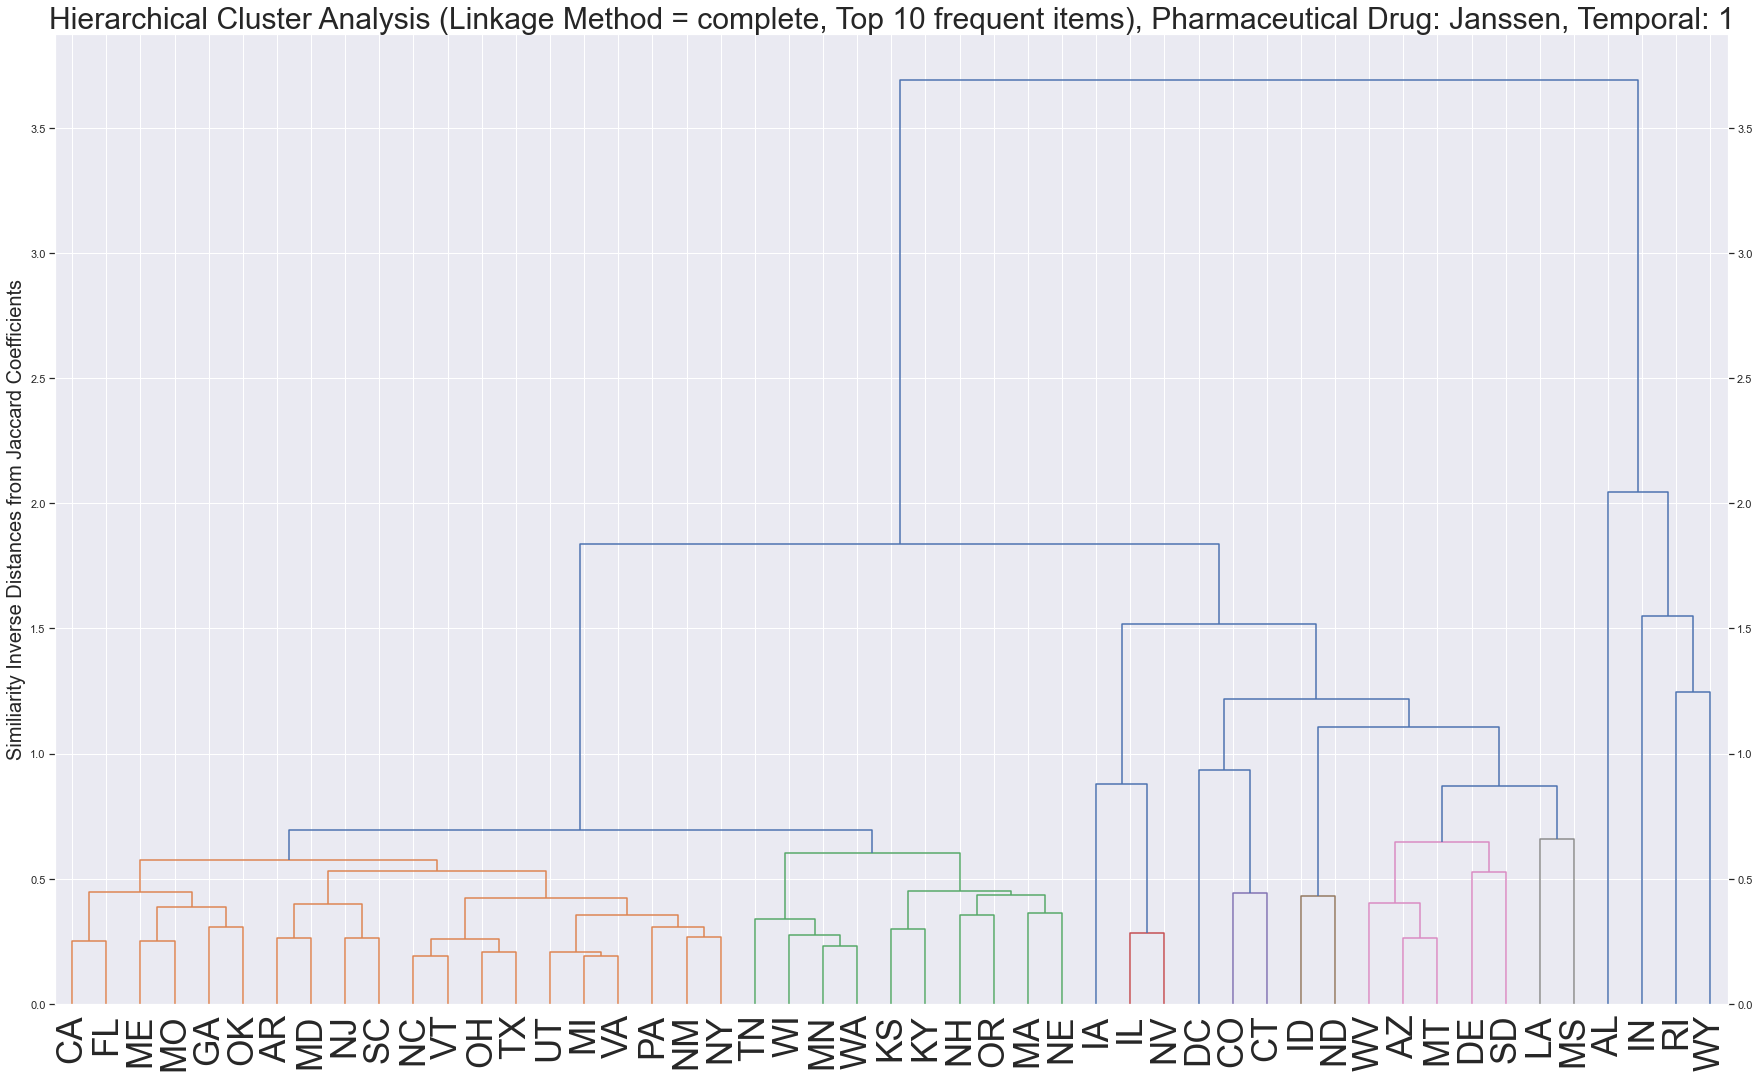

In [189]:
#os.chdir(r"G:\Research\FAERS_Public\Results\Dendo\tp10"+str('\\')+str(drugnamepath))
#os.chdir(r"H:\Research\FAERS_Public\dendo_ijgi\20200908")
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\dendo\lda10"+str('\\')+str(drugnamepath)+"_20210608")

#"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\dendo\tp10\modern"
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

linkagemethod =['single','complete']
#complete

plt.figure(figsize=(25, 15))
plt.tick_params(axis='both', left='on', top='off', right='on', bottom='on', labelleft='on', labeltop='off', labelright='on', labelbottom='on')
sns.set(font_scale=3)#, rc={'figure.figsize':(400,400)})

temporallist = [temporal]
llist = [temporal_year_distance1]
#for lm in linkagemethod:
 #   if lm == dat.temporal2.iloc[0][11:]:
   #     lm == dat.temporal2.iloc[0][11:]
print(lm)
        
for x in [te_num]:
    if (x) == 1:
        number = temporal
        _mat = np.array([[temporal_year_distance1]])
        _mat = _mat.reshape(countofcountries, countofcountries)
        Z = linkage(_mat, lm)
        plt.xticks(fontsize=5, rotation=90) #font size for x ticks
        plt.tight_layout()
        #plt.axhline(y=0.3, c='grey', lw=1, linestyle='dashed')
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=35.,
            labels=temporal_year_df.index, count_sort=False, distance_sort=True,color_threshold=cutoffval )#, color_threshold=0.212)#, color_threshold=0.3)#, color_threshold=0.02)

        plt.title("Hierarchical Cluster Analysis (Linkage Method = "+str(lm)+", Top "+str(kk)+" frequent items), Pharmaceutical Drug: "+str(drugname)+", Temporal: "+str(te_num), fontsize=30)#Change here

        #plt.ylabel('Similiarity between ' +str(countofcountries)+' European Countries using FAERS Post Market Adverse Events', fontsize=20)#Change here
        plt.ylabel('Similiarity Inverse Distances from Jaccard Coefficients', fontsize=20)
        plt.box('off')

        plt.savefig("Dendrogram_Tree_cluster_linkage_"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+".png", dpi=300)

        #plt.show()
        #plt.clf()

            #plt.show()
            #plt.clf()
        #tempdf['pvalue']=np.float
    #tempdf = temporal_2_[temporal_2_['spatial'].str.contains(pattern)]


plt.show()



complete


<ipython-input-190-f62b78246d81>:49: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(_mat, lm)


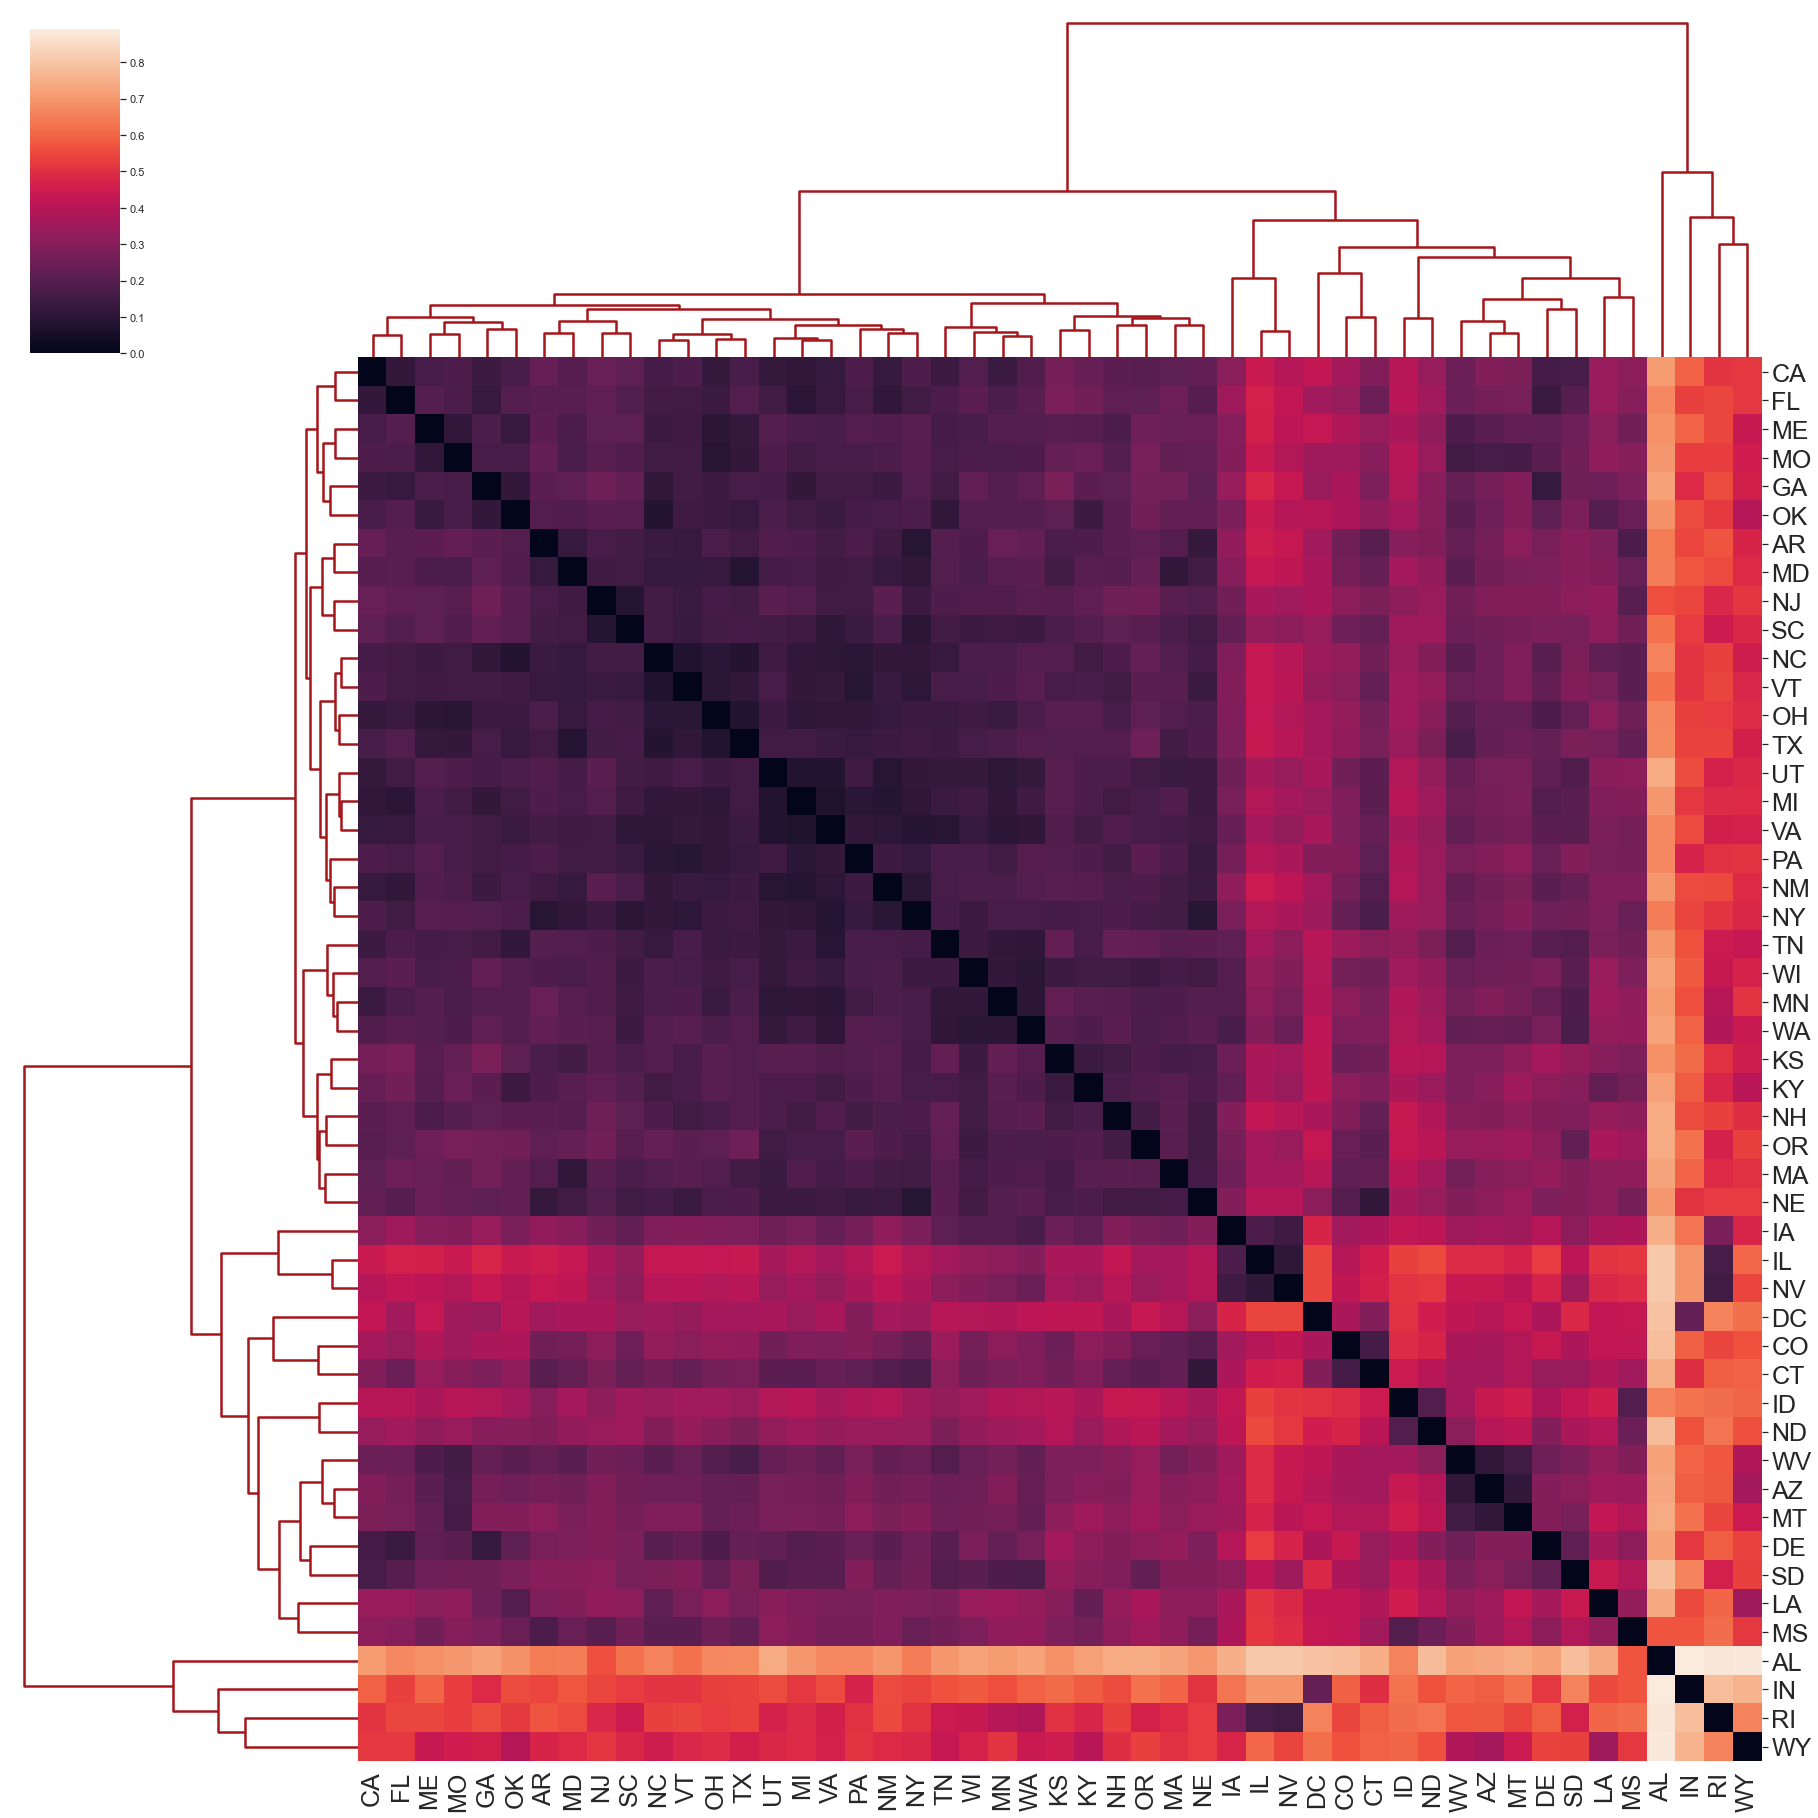

In [190]:
#single
#complete
import seaborn as sns
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
#os.chdir(r"G:\Research\FAERS_Public\Results\Dendo_plus_Jaccard\tp10"+str('\\')+str(drugnamepath))
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\dendo_plus_Jaccard\lda10"+str('\\')+str(drugnamepath)+"_20210608")

sns.set(font_scale=2, rc={'figure.figsize':(50,50)})


import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

linkagemethod =['single','complete']
#complete

#sns.set(font_scale=0.1, rc={'figure.figsize':(50,50)})

temporallistz = [temporal_year_distance]
#temporallist = [temporal]
#llist = [temporal_distance1]

temporallist = [temporal]
llist = [temporal_year_distance1]
#linkagemethod =['single','complete']

#for lm in linkagemethod:
  #  if lm == dat.temporal2.iloc[0][11:]:
    #    lm == dat.temporal2.iloc[0][11:]
print(lm)


for x in [te_num]:
    if (x) == 1:
        number = temporal
        #plt.figure(figsize=(40, 40))
        #plt.tick_params(axis='both', left='on', top='off', right='on', bottom='on', labelleft='on', labeltop='off', labelright='on', labelbottom='on')
        sns.set(font_scale=1)#, rc={'figure.figsize':(400,400)})

        #year ='y'+str(number)+'_comparison'
        #print(year)    
        #quarter ='q'+str(number)+'_comparison'
       # print(quarter)
        #_mat = np.array([[temporal_distance1]])
        #_mat = _mat.reshape(countofcountries, countofcountries)
        #Z = linkage(_mat, lm)
        _mat = np.array([[temporal_year_distance1]])
        _mat = _mat.reshape(countofcountries, countofcountries)
        Z = linkage(_mat, lm)
        
        ax =sns.clustermap(temporal_year_distance,  row_linkage=Z, col_linkage=Z,yticklabels=1, xticklabels=1,  figsize=(25, 25),tree_kws=dict(linewidths=2.5, colors=('#a4161a')))# change here
        #sns.clustermap(z,  row_linkage=Z, col_linkage=Z, figsize=(25, 25),tree_kws=dict(linewidths=2.5, colors=('#a4161a')))# change here

        #plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90, ha="right",
         #rotation_mode="anchor") # For x axis
       # plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0)

        #ax =sns.clustermap(temporal_distance,  row_linkage=Z, col_linkage=Z,yticklabels=1, xticklabels=1)# change here
       # plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45) # For x axis
        #plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0)

        #plt.title("Hierarchical Cluster Analysis (Linkage Method = "+str(lm)+", Top "+str(kk)+" frequent items), Pharmaceutical Drug: "+str(drugname)+", Temporal: "+str(y), fontsize=10,  pad=20, x=10.3,)#Change here

       # plt.title("Hierarchical Clustering (Method = "+str(linkagemethod)+", Top 4 frequent items), count of countries: "+str(countofcountries)+" Drug: ",+str(drugname)+
               #   " temporal: "+str(y))
        #plt.tight_layout()

        #plt.xticks(fontsize=0.1, rotation=45) #font size for x ticks
        #plt.tight_layout()
        #plt.tick_params(labelsize=2)
        plt.setp(ax.ax_heatmap.get_yticklabels(), rotation=0, fontsize=25)  # For y axis
        plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=90, fontsize=25) # For x axis
        sns.set(font_scale=1.5)
        #g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 15)
        #plt.xticks(fontsize=25, rotation=45) #font size for x ticks
       # plt.yticks(fontsize=15) #font size for x ticks
  
    #        plt.title("Hierarchical Cluster Analysis (Linkage Method = "+str(lm)+", Top "+str(kk)+" frequent items), Pharmaceutical Drug: "+str(drugname)+", Temporal: "+str(te_num), fontsize=30)#Change here

    #        #plt.ylabel('Similiarity between ' +str(countofcountries)+' European Countries using FAERS Post Market Adverse Events', fontsize=20)#Change here
    #        plt.ylabel('Similiarity Inverse Distances from Jaccard Coefficients', fontsize=20)
    #       plt.box('off')
        plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+".png", dpi=900, bbox_inches="tight")
        plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+".svg", dpi=900, bbox_inches="tight")
        plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+".pdf", dpi=900, bbox_inches="tight")

    #        plt.savefig("Dendrogram_Tree_cluster_linkage_"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+"_version_naive.png", dpi=300)

        #plt.show()
        #plt.clf()

            #plt.clf()
    #tempdf['pvalue']=np.float
#tempdf = temporal_2_[temporal_2_['spatial'].str.contains(pattern)]


plt.show()



In [191]:
te_num
#cutoffval


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1

In [192]:
te_num
#tempdf
#c

1

In [193]:
prev_result =dat_[['Countries']]
prev_result


Countries
0  AR,MD,MI,NC,NJ,NM,NY,OH,PA,SC,TX,UT,VA,VT
1                                      LA,MS

In [194]:
prev_result = dat_['Countries'].iloc[int(version[1])]
prev_result = list(prev_result.split(","))
#prev_result =list(prev_result)
prev_result
#prev_result2 = pd.DataFrame(prev_result)
prev_result2 = pd.DataFrame({'occr_country': prev_result})
prev_result2['cluster']=0

prev_result2

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


occr_country  cluster
0           LA        0
1           MS        0

In [195]:
#importing modules
import os 
print('importing "os" operating system')
from io import BytesIO
#from urllib.request import urlopen
from zipfile import ZipFile
import pandas as pd
print('pandas')
import geopandas as gpd
print('geopandas')
from shapely.geometry import Point
print('shapely')
import numpy as np
print('numpy')
from statsmodels.tsa.stattools import grangercausalitytests
print('statsmodels')
import pysal as ps
print('pysal')
import seaborn as sns
print('seaborn')
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
print('matplotlib')


%matplotlib inline
import os
import pandas as pd

importing "os" operating system
pandas
geopandas
shapely
numpy
statsmodels
pysal
seaborn
matplotlib


C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [196]:
os.chdir(r"D:\Research\FAERS_Public_Similarity\Data\helper_dataset\USState")

#"D:\Research\FAERS_Public_Similarity\Data\helper_dataset\USState\US_State_Boundaries.shp"
US_shp = gpd.read_file(filename='US_State_Boundaries.shp')
#world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
#world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
#world_shp.head()
#world_shp.ISO_2DIGIT
#europe = ['AL', 'AD', 'AM', 'AT', 'BY', 'BE', 'BA', 'BG', 'CH', 'CY', 'CZ', 'DE',
     #   'DK', 'EE', 'ES', 'FO', 'FI', 'FR', 'GB', 'GE', 'GI', 'GR', 'HU', 'HR',
      #  'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'MC', 'MK', 'MT', 'NO', 'NL', 'PL',
      #  'PT', 'RO', 'SE', 'SI', 'SK', 'SM', 'TR', 'UA', 'VA']
#spatial_list = ["de","fr","gb","it","be","ch","es","nl","cz","se","gr","at","ie","pt","dk","no","sk","fi","hu"] # took out us, ca, pr, ru
US_shp2 = US_shp[US_shp['STATE_ABBR'].str.contains('|'.join(spatial_list),case=False, na=False, regex=True)]
#world_shp1 = world_shp[world_shp['ISO_2DIGIT'].str.contains('|'.join(europe),case=False, na=False, regex=True)]
US_shp2['centroid'] = US_shp2['geometry'].centroid
US_shp2['coords'] = US_shp2['geometry'].apply(lambda x: x.representative_point().coords[:])
US_shp2['coords'] = [coords[0] for coords in US_shp2['coords']]
US_shp2['coords']
US_shp['centroid'] = US_shp['geometry'].centroid
US_shp['coords'] = US_shp['geometry'].apply(lambda x: x.representative_point().coords[:])
US_shp['coords'] = [coords[0] for coords in US_shp['coords']]
US_shp['coords']

US_shp['Lon'] = US_shp.centroid.x
US_shp['Lat'] = US_shp.centroid.y

alleurope1=US_shp
someeurope=US_shp2



<ipython-input-196-edcfa690ada9>:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  US_shp2['centroid'] = US_shp2['geometry'].centroid
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [197]:
alleurope1.ISO_2DIGIT = alleurope1.STATE_ABBR.str.strip()
prev_result2.occr_country = prev_result2.occr_country.str.strip()
world_join = alleurope1.merge(prev_result2 , left_on='STATE_ABBR', right_on='occr_country', how='outer')
world_join = world_join[~world_join["occr_country"].isnull()]
world_join.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2 entries, 27 to 28
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   FID           2 non-null      int64   
 1   OBJECTID      2 non-null      int64   
 2   NAME          2 non-null      object  
 3   STATE_ABBR    2 non-null      object  
 4   STATE_FIPS    2 non-null      object  
 5   ORDER_ADM     2 non-null      int64   
 6   MONTH_ADM     2 non-null      object  
 7   DAY_ADM       2 non-null      int64   
 8   YEAR_ADM      2 non-null      int64   
 9   TYPE          2 non-null      object  
 10  POP           2 non-null      int64   
 11  SQ_MILES      2 non-null      float64 
 12  PRIM_MILES    2 non-null      float64 
 13  Shape_Leng    2 non-null      float64 
 14  Shape__Are    2 non-null      float64 
 15  Shape__Len    2 non-null      float64 
 16  geometry      2 non-null      geometry
 17  centroid      2 non-null      geometry
 18  coor

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\geopandas\geodataframe.py:182: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


In [198]:
#pvalue = "<0.001"
#pvalue

<>:16: DeprecationWarning: invalid escape sequence \.
C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-199-c3fc14e30281>:46: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['STATE_ABBR'], xy=row['coords'],horizontalalignment='center', fontsize= 40)


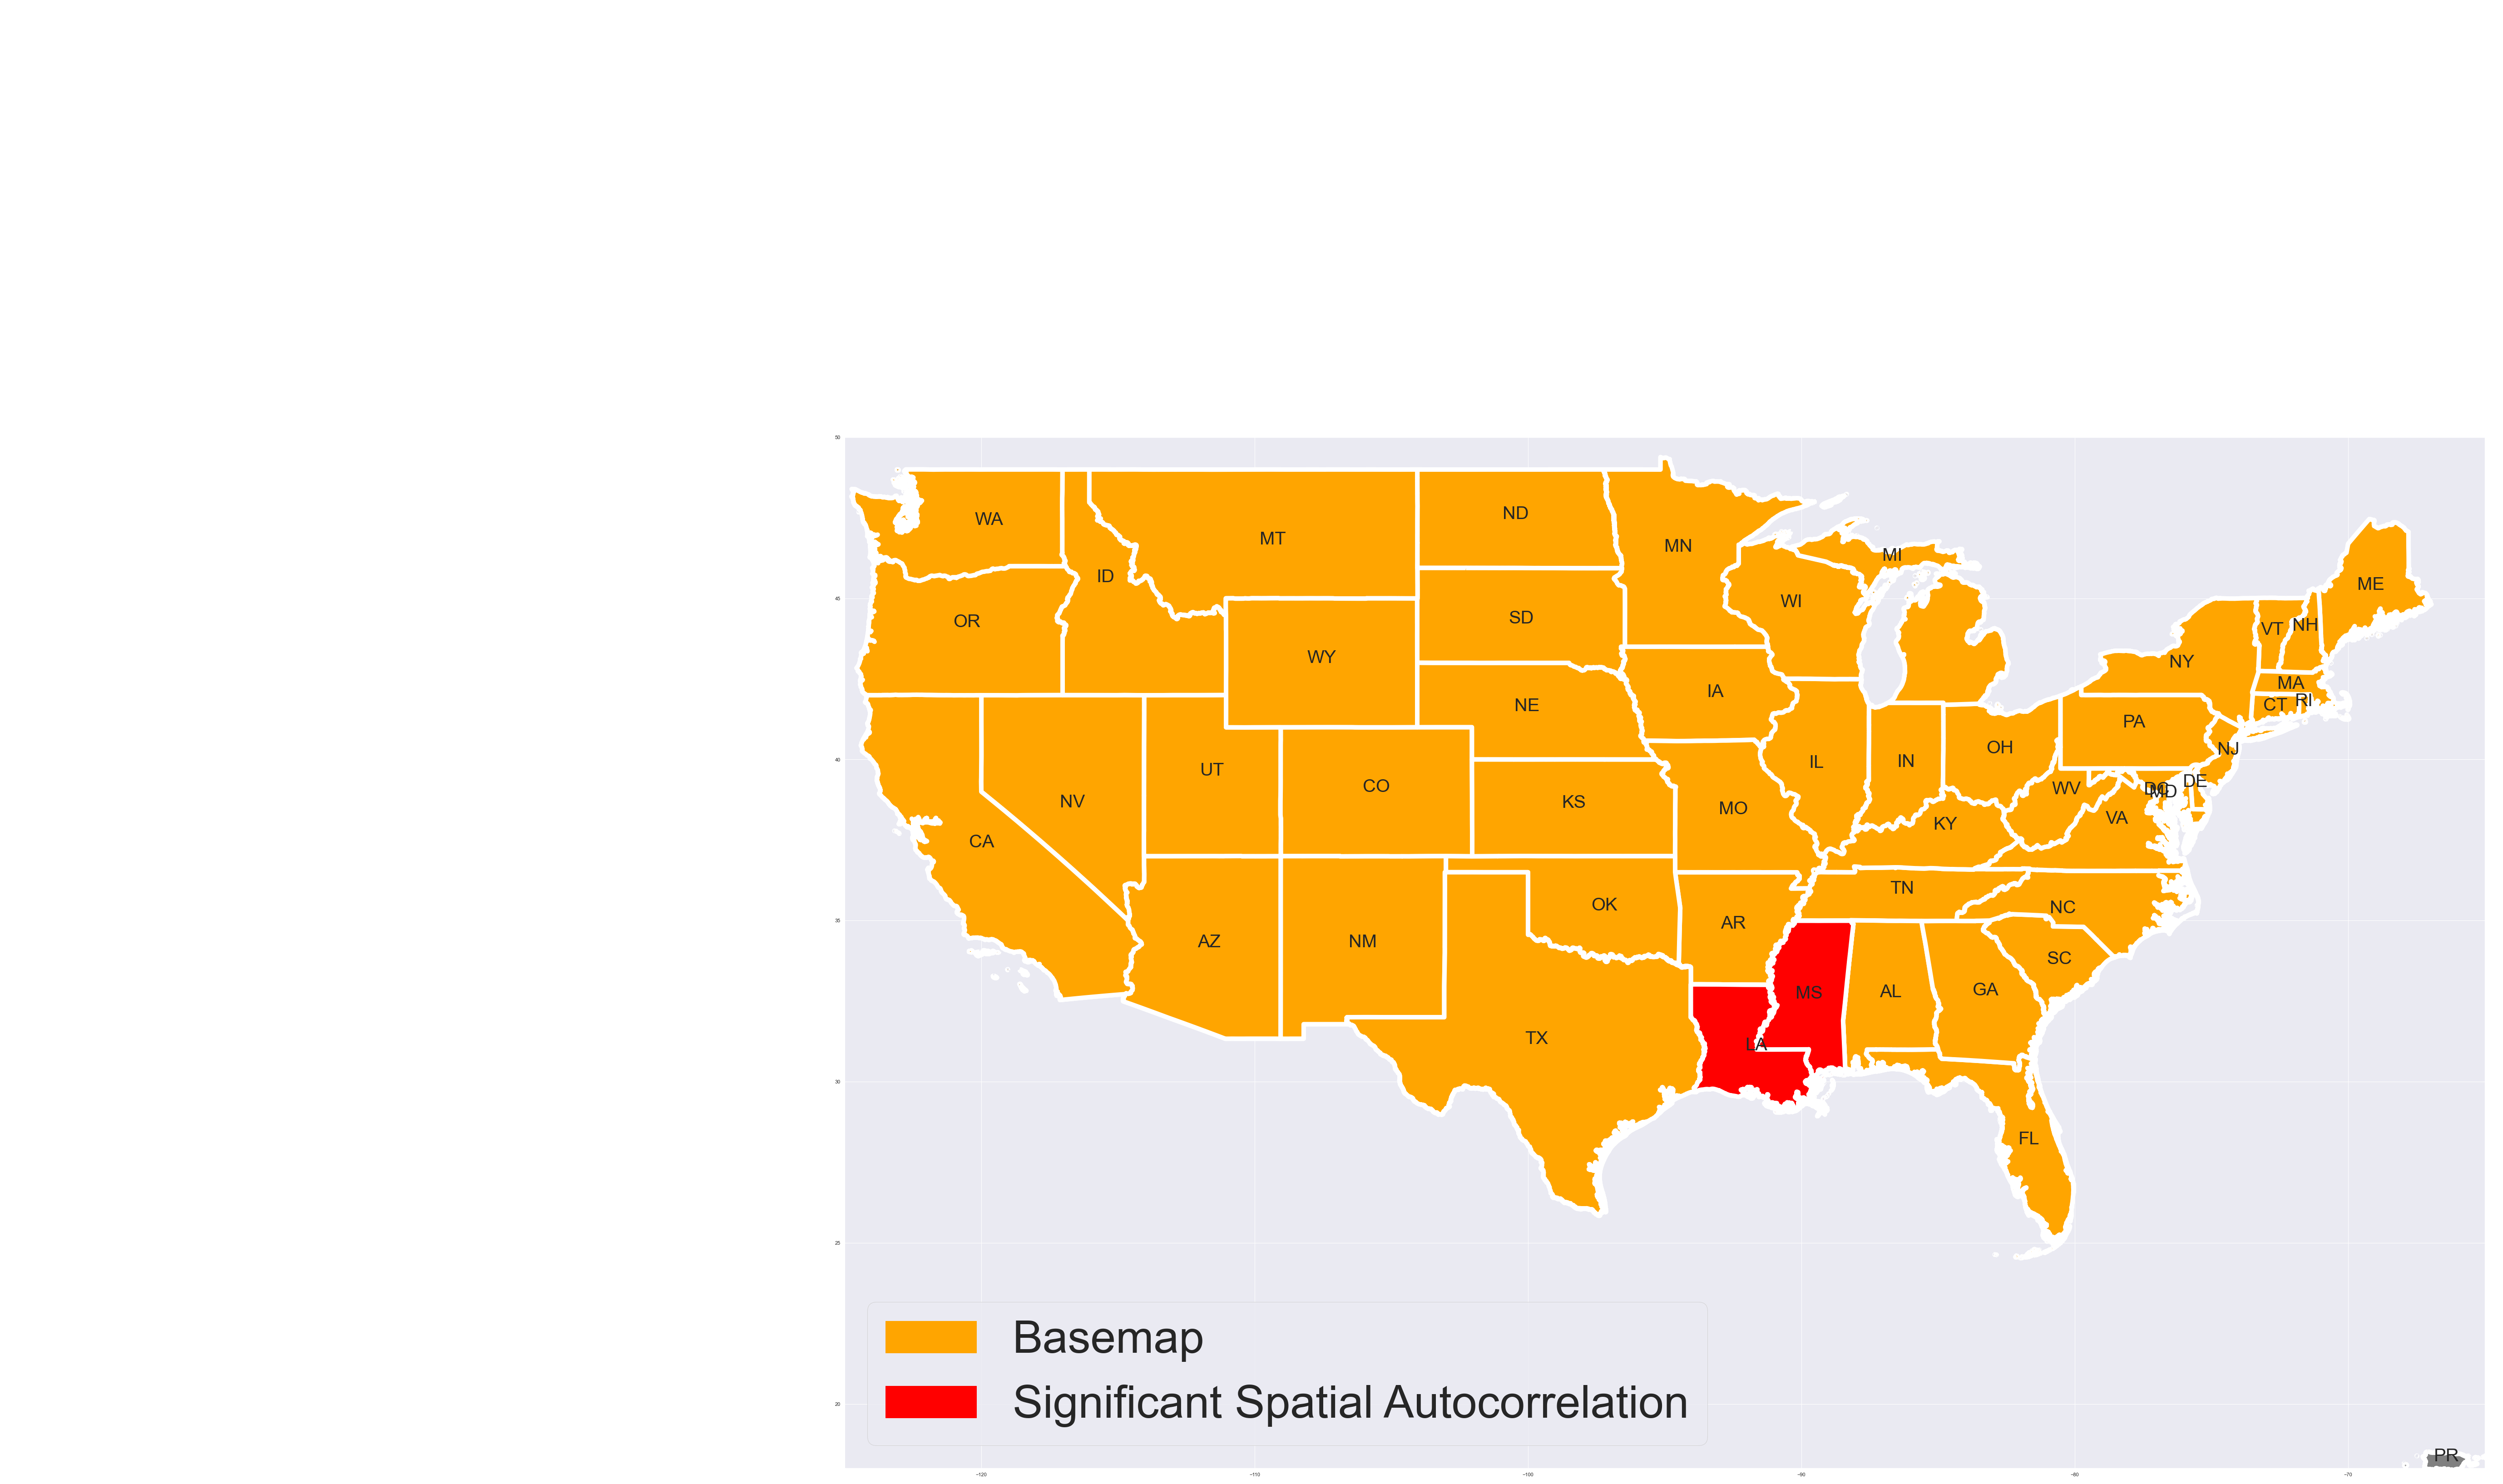

In [199]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
#os.chdir(r"G:\Research\FAERS\Drug_Spatial\L_B_N_E\Data\Helper_Datasets\shapefiles\USstates")
#plt.title("Etanercept Hierarchical Clustering, method:single, (min sup=0.2, top (2) frequent items), cluster 4")

someeurope.ISO_2DIGIT = someeurope.STATE_ABBR.str.strip()
prev_result2.occr_country = prev_result2.occr_country.str.strip()
world_join = alleurope1.merge(prev_result2 , left_on='STATE_ABBR', right_on='occr_country', how='outer')
#world_join = world_join[world_join["occr_country"].isnull()]
world_join

##world_join.drop(columns, axis=1, inplace=True)
world_join['cluster'].fillna(1, inplace=True)

world_join['cluster'] = world_join['cluster'].astype(str).replace('\.0', '', regex=True)
world_join['cluster'] = world_join['cluster'].astype(str)
world_join['cluster'] = world_join['cluster'].str.replace('Nan','1')

cb = world_join[world_join['cluster']=='0']

#cb = usstates_join[(usstates_join['cluster3']==1) | (usstates_join['cluster7']==1)]

non_cb = world_join[world_join['cluster']=='1']
testcb = alleurope1[alleurope1['STATE_ABBR'].isin(spatial_list)]


#non_cb = usstates_join[(usstates_join['cluster3']==0) | (usstates_join['cluster7']==0)]
#usstates_join.to_csv('ttest.csv')
sns.set(font_scale=1, rc={'figure.figsize':(100,100)})

#cb.plot(color='gray', edgecolor='white', legend = True, linewidth= 5)

cb['coords'] = cb['geometry'].apply(lambda x: x.representative_point().coords[:])
cb['coords'] = [coords[0] for coords in cb['coords']]
cb['coords']

base = non_cb.plot(color='gray', edgecolor='white', legend = True, linewidth= 10)

testcb.plot(ax=base, color='orange', edgecolor='white', legend = True, linewidth= 10)
cb.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)

cb.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
for idx, row in alleurope1.iterrows():
    #print(row)
    plt.annotate(s=row['STATE_ABBR'], xy=row['coords'],horizontalalignment='center', fontsize= 40)
    

#for tt,r in zip(text1_statecount, (range(15,0,-2))):
  #  plt.text(-10, r, tt,fontsize=100, ha='left', rotation=0, wrap=True) 

#plt.title('Spatial Autocorrelation Test Map pvalue '+str(pval)+' Frequent Itemset Mining of Adverse Events for Pharmaceutical Drug: '+str(drugname), fontsize=225,y=1.05)
#plt.xlabel('Hierarchical Clustering, cutoff= '+str(cutoff)+ ' Temporal = '+str(temporal)+' for output of '+ str(count_countries)+' European Countries using FAERS Post Market Adverse Events', fontsize=150)
import matplotlib.patches as mpatches
#gray_patch = mpatches.Patch(color='gray', label='Basemap')
red_patch = mpatches.Patch(color='orange', label='Basemap')

#red_patch = mpatches.Patch(color='orange', label='Spatial Pattern Not Significant')
orange_patch = mpatches.Patch(color='red', label='Significant Spatial Autocorrelation')# - Pvalue='+str(pvalue)[1:-1])
#plt.legend(handles=[gray_patch,red_patch,orange_patch], loc='lower left',markerscale=7, fontsize=100)

plt.legend(handles=[red_patch,orange_patch], loc='lower left',markerscale=7, fontsize=100)
plt.axis([-125,-65,18,50]) #eastern CONUS
#plt.gca().set_axis_off()
plt.subplots_adjust(top = 0.1, bottom = 0, right = 0, left = -1, hspace = -1, wspace = -1)
#plt.add_axes([0,0,1,1]) #position: left, bottom, width, height
#plt.set_axis_off()
#os.chdir(r"G:\Research\FAERS_Public\Results\Maps\tp10")
os.chdir(r"D:\Research\FAERS_Public_Similarity\Results\Paper_Ready_Figures\map\lda10"+str('\\')+str(drugnamepath)+"_20210608")
plt.tight_layout()
#plt.subplots_adjust(left=-5.80)
plt.tight_layout(pad=-5)
#plt.set_xlim(-8, 8)
#plt.set_ylim(-8, 8)
#bbox = fig.bbox_inches.from_bounds(1, 1, 8, 6)
plt.savefig("spatial_autocorrelation_map"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+".png", transparent = False, bbox_inches = 'tight', pad_inches = 0)
plt.savefig("spatial_autocorrelation_map"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+".svg",  bbox_inches="tight")
plt.savefig("spatial_autocorrelation_map"+str(lm)+'_'+str(countofcountries)+"Top_"+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(temporal[0::3])+str(te_num)+str(lm)+"_"+str(version)+".pdf", bbox_inches="tight")


    # plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+", Top "+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_"+str(lm)+"_version_naive.png", dpi=900, bbox_inches="tight")
     #   plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+", Top "+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_"+str(lm)+"_version_naive.svg", dpi=900, bbox_inches="tight")
      #  plt.savefig("Dendrogram_Tree_cluster_Jaccard_Similiarity_testing_"+str(countofcountries)+", Top "+str(kk)+"_countries_drugname_"+str(drugname)+"_temporal_"+str(y)+"_"+str(lm)+"_version_naive.pdf", dpi=900, bbox_inches="tight")

       
        
plt.show()
#plt.clf()

Products_list = [maptext.columns.values.tolist()]+ maptext[['PT','CountryPT_in_Cluster_count','CountryPT_in_Cluster','percent_in_cluster']].values.tolist()
#Products_list = maptext[['PT','CountryPT_in_Cluster_count','CountryPT_in_Cluster','percent_in_cluster']].values.tolist()

f = '{:}|{:}|{:}|{:}\n' # formatting
text1_statecount=[]
for i in Products_list:
    text1_statecount.append(f.format(*i,'\n'))
    print(f.format(*i))

In [200]:
#testcb.info()
#spatial_list
stop

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'stop' is not defined

In [ ]:
te_num

In [201]:
from sklearn.manifold import TSNE

In [225]:
tempdf_matrix_columns = columns = ['topic0',
       'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7',
       'topic8', 'topic9','state']

tempdf_matrix_values = tempdf[tempdf_matrix_columns]
tsne = TSNE(n_components=2,random_state=0)
tempdf

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Topic                          topics  \
0            5.0  [5, 6, 0, 3, 2, 9, 1, 7, 4, 8]   
1            9.0  [9, 3, 5, 7, 6, 1, 2, 0, 8, 4]   

                                                                                              Keywords  \
0  pyrexia,, fatigue,, headache,, pain,, dizziness,, nausea,, chills,, pain-in-extremity,, hyperhid...   
1  pyrexia,, headache,, pain,, chills,, fatigue,, nausea,, dizziness,, pain-in-extremity,, injectio...   

  state  \
0    LA   
1    MS   

                                                                                                matrix  \
0  [(5, 0.32683292), (6, 0.14945248), (0, 0.14221883), (3, 0.07462347), (2, 0.06269442), (9, 0.0609...   
1  [(9, 0.23942904), (3, 0.2183651), (5, 0.13401638), (7, 0.11762483), (6, 0.089788936), (1, 0.0561...   

     topic0    topic1    topic2    topic3    topic4    topic5    topic6  \
0  0.142219  0.060486  0.062694  0.074623  0.044136  0.326833  0.149452   
1  0.050962  0.056192  0.054656  0.218365  0.014667  0.134016  0.089789   

     topic7    topic8    topic9   Pvalue  cutoff  
0  0.047811  0.030783  0.060962  0.00067   0.682  
1  0.117625  0.024298  0.239429  0.00067   0.682

In [227]:
X_tempdf2d = tsne.fit_transform(tempdf_matrix_values.drop(['state'], axis=1))
X_tempdf2d



C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ -60.312317,  141.36963 ],
       [  60.31256 , -141.36914 ]], dtype=float32)

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


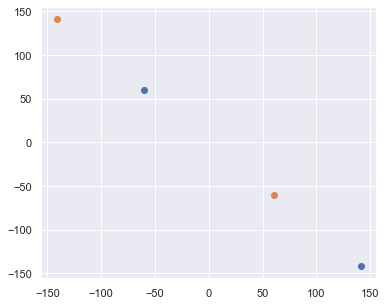

In [226]:
X_tempdf2d = tsne.fit_transform(tempdf_matrix_values.drop(['state'], axis=1))
X_tempdf2d
label = tempdf_matrix_values['state'].values
plt.figure(figsize=(6,5))
plt.scatter(X_tempdf2d[label=='LA'],X_tempdf2d[label!='LA'])
plt.scatter(X_tempdf2d[label=='MS'],X_tempdf2d[label!='MS'])

plt.show()

In [218]:
X_tempdf2d[label=='LA']

C:\Users\Ahmed.Askar\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-60.312317, 141.36963 ]], dtype=float32)

In [ ]:
pval = pvalue['pvalue'].values
pval = str(pval)
tempdf['pvalue']=pval
cutoffval = pvalue['dendo_cutoff'].values
cutoffval = float(cutoffval)
tempdf['cutoff']=cutoffval
tempdf['cutoff'] =round(tempdf['cutoff'],3)
#lm = dat_.temporal2.iloc[0][11:]


In [ ]:
#cutoff = tempdf.cutoff[0]
#pval =tempdf.pvalue[0]
#tempor = tempdf.temporal[0]
#count_countries = len(tempdf.index)
print('cutoff=', cutoffval)
print('pval=',pval)
print('tempor=',temporal)
print('count_countries=',len(var))
print('drugname=',drugname)
lm
#lm= dat_.temporal2.iloc[0][11:]

In [ ]:
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
#os.chdir(r"G:\Research\FAERS\Drug_Spatial\L_B_N_E\Data\Helper_Datasets\shapefiles\USstates")
#plt.title("Etanercept Hierarchical Clustering, method:single, (min sup=0.2, top (2) frequent items), cluster 4")
alleurope1
someeurope.ISO_2DIGIT = someeurope.ISO_2DIGIT.str.strip()
prev_result2.occr_country = prev_result2.occr_country.str.strip()
world_join_outer = someeurope.merge(prev_result2 , left_on='ISO_2DIGIT', right_on='occr_country', how='outer')
world_join_inner = someeurope.merge(prev_result2 , left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
#world_join_outer = alleurope1.merge(prev_result2 , left_on='ISO_2DIGIT', right_on='occr_country', how='outer')

#world_join = world_join[world_join["occr_country"].isnull()]


##world_join.drop(columns, axis=1, inplace=True)
world_join_outer['cluster'].fillna(1, inplace=True)

world_join_outer['cluster'] = world_join_outer['cluster'].astype(str).replace('\.0', '', regex=True)
world_join_outer['cluster'] = world_join_outer['cluster'].astype(str)
world_join_outer['cluster'] = world_join_outer['cluster'].str.replace('Nan','1')

world_join_outer.loc[world_join_outer['cluster'] == '0', ['clusters']] = '1'
world_join_outer.loc[world_join_outer['cluster'] == '1', ['clusters']] = '0'
world_join_outer['clusters'] = world_join_outer['clusters'].astype(int)


display(world_join_outer[['ISO_2DIGIT','clusters']])

cb = world_join_outer[world_join_outer['clusters']=='1']

#cb = usstates_join[(usstates_join['cluster3']==1) | (usstates_join['cluster7']==1)]

non_cb = world_join_outer[world_join_outer['clusters']=='0']
testcb = pd.concat([cb,non_cb])
testcb
testcb[['ISO_2DIGIT','clusters']]
LMo_HR90  = Moran(testcb, w4_v2)
print(LMo_HR90.I)

print(LMo_HR90.q)
#print(LMo_HR90.Is)

#print(LMo_HR90.p_sim)
#Lag_HR90 =lps.weights.lag_spatial(w1, testcb['clusters'])
#Lag_HR90 = lag_spatial(W, cb)
#HR90 = testcb['clusters']
#print(LMo_HR90.Is[0:10], LMo_HR90.p_sim[0:10])
#HR90Lag = ps.lag_spatial(W, cb)

#sigs = HR90[LMo_HR90.p_sim <= .05]
#W_sigs = Lag_HR90[LMo_HR90.p_sim <= .05]
#insigs = HR90[LMo_HR90.p_sim > .05]
#W_insigs = Lag_HR90[LMo_HR90.p_sim > .05]
# b,a = np.polyfit(HR90, Lag_HR90, 1)
#sig = LMo_HR90.p_sim < 0.05
#sig.sum()
#len(someeurope)

In [ ]:
#prev_result2[]
#omeeurope['ISO_2DIGIT']
#world_join_outer[['ISO_2DIGIT','cluster']]
we4+1

In [ ]:
print(len(var)
if lm =='complete'and te_num==3:
    print('complete'), 
    #for y,z, w in zip(list1,list1str,ww):
    print(w)
    #for cut_off in list2:#new

    # print(str(z))
    assignments = fcluster(_3row_clusters_single,cutoffval,'distance')  #0.45 e
    # labels=interfe_df.index#######################################################################change this one
    labels=temporal_1_df.index#######################################################################change this one

    cluster_output = pd.DataFrame({'occr_country':labels , 'cluster':assignments})
    #print(cluster_output)
        #clusters_assignments.append(assignments)
    #print('cluster cut off point= ', str(y))############
    #print(set(assignments))###########################################################################################
    clusters_assignments = []
    clusters_assignments.append(assignments)
    #print(clusters_assignments)
    mx = np.max(clusters_assignments)
    mx = 2#mx+1
    # print(mx)
    # print(mx-1, 'clusters')############################################################################################
        #clusters_assignments.append(assignments)

In [ ]:
sorted(someeurope.ISO_2DIGIT)
cutoffval

# LISA

In [ ]:
#this be the oneee
from pysal.explore.esda.moran import Moran
from scipy.cluster.hierarchy import fcluster
import pysal as ps
from pysal.lib.weights import lat2W
#libpysal.weights.fuzzy_contiguity
from pysal.explore.esda.moran import Moran, Moran_Local
import libpysal as lps
from pysal.explore.esda.join_counts import Join_Counts
cols1 =['geometry','occr_country','cutoff' ]
cols = ['pvalue','zscore', 'moran_i', 'countries','dendo_cluster','dendo_cutoff','temporal','temporal2']
dat01 = pd.DataFrame(columns = cols)
dat05 = pd.DataFrame(columns = cols)
dat1 = pd.DataFrame(columns = cols)
datn = pd.DataFrame(columns = cols)
#W = w1
#W.transform = 'r
dfcluster_hotspot = pd.DataFrame(columns = cols1)
#ww = [w1, w2, w3, w4]
ww = [w0, w0, w0, w0]

list1 = [_1row_clusters_single, _2row_clusters_single, _3row_clusters_single, _4row_clusters_single,
        _1row_clusters_complete, _2row_clusters_complete, _4row_clusters_complete, _4row_clusters_complete]

#list1 = [_1row_clusters_single, _2row_clusters_single, _3row_clusters_single, _4row_clusters_single,
   #     _1row_clusters_complete, _2row_clusters_complete, _3row_clusters_complete, _4row_clusters_complete]
list1str = ['temporal_1_single', 'temporal_2_single', 'temporal_3_single', 'temporal_4_single',
        'temporal_1_complete', 'temporal_2_complete', 'temporal_3_complete', 'temporal_4_complete']
#list1 = [lrow_clusters_single, brow_clusters_single, nrow_clusters_single, erow_clusters_single]
#list1 = [lrow_clusters_complete, brow_clusters_complete, nrow_clusters_complete, erow_clusters_complete]

spatial_auto_dict ={}
statespatial_auto001 =[]
statespatial_auto05 =[]
statespatial_auto01 =[]
statespatial_auto =[]

statespatial_auto001_dict ={}
statespatial_auto05_dict ={}
statespatial_auto01_dict ={}
statespatial_auto_dict ={}

statespatial_auto001_count = ''
statespatial_auto05_count = ''
statespatial_auto01_count = ''
statespatial_auto_count = ''
cluster_hotspot = []
cluster_coldspot = []
cluster_hl = []
cluster_lh = []
test =[]
morani = []
p_values = []
p_values_ = []
p_values_001 = []
p_values_05 = []
p_values_01 = []
z_score = []
z_score_ = []
z_score_001 = []
z_score_05 = []
z_score_01 = []
spatial_auto_dict ={}
p_values = []
clusters_assignments = []
clusters_dicts = {}
state = []
cutoff = []
list2 = np.linspace(0.0, 0, num=1)
#list2 = np.linspace(0.0, 1.2, num=60)
#list2 = np.linspace(0.0, 2.0, num=10)

os.chdir(r"D:\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

world_shp = gpd.read_file(filename='world.shp')
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
#list2 = np.linspace(0.0, 0.5, num=7)
#str1 = ''.join(str(e) for e in list1)
#for xx in list1:
try:
    if lm =='complete'and te_num==4:
        print('complete'), 
    #for y,z, w in zip(list1,list1str,ww):
       # print(w)
        #for cut_off in list2:#new

           # print(str(z))
        assignments = fcluster(_3row_clusters_single,cutoffval,'distance')  #0.45 e
           # labels=interfe_df.index#######################################################################change this one
        labels=temporal_1_df.index#######################################################################change this one

        cluster_output = pd.DataFrame({'occr_country':labels , 'cluster':assignments})
            #print(cluster_output)
                #clusters_assignments.append(assignments)
            #print('cluster cut off point= ', str(y))############
            #print(set(assignments))###########################################################################################
        clusters_assignments = []
        clusters_assignments.append(assignments)
            #print(clusters_assignments)
        mx = np.max(clusters_assignments)
        #mx = 2#mx+1
           # print(mx)
           # print(mx-1, 'clusters')############################################################################################
                #clusters_assignments.append(assignments)
        cutoff.append(y)
        #print('name of cluster =', str(str1))
        #x = 3
        for x in range(1,mx):#mx
            column = ('cluster' + str(x))
            cluster_output[column] = (cluster_output['cluster'] ==x).astype(int)
                #display(cluster_output)
            cluster_output[column]
            print('culumns=', str(x))
            cb = cluster_output[column]#column
               # w=ps.lat2W(countofcountries,1, rook=False)
            display(cluster_output[['occr_country',column]])
            LMo_HR90  = Moran_Local(cb, w4_v2)
            print(LMo_HR90.q)
            #print(LMo_HR90.Is)

            #print(LMo_HR90.p_sim)
            Lag_HR90 =lps.weights.lag_spatial(w4_v2, cb)
            #Lag_HR90 = lag_spatial(W, cb)
            HR90 = cb
            #print(LMo_HR90.Is[0:10], LMo_HR90.p_sim[0:10])
            #HR90Lag = ps.lag_spatial(W, cb)

            sigs = HR90[LMo_HR90.p_sim <= .05]
            W_sigs = Lag_HR90[LMo_HR90.p_sim <= .05]
            insigs = HR90[LMo_HR90.p_sim > .05]
            W_insigs = Lag_HR90[LMo_HR90.p_sim > .05]
           # b,a = np.polyfit(HR90, Lag_HR90, 1)
            sig = LMo_HR90.p_sim < 0.05
            sig.sum()
            #hotspots = LMo_HR90.q==1 * sigs
            #print(sig)
            #print(sig.sum())
            hotspots = LMo_HR90.q==1 * sig
            LH = LMo_HR90.q==2 * sig
            coldspots = LMo_HR90.q==3 * sig
            HL = LMo_HR90.q==4 * sig
           # print(coldspots.sum())
            #display(cluster_output[coldspots])
            world_join_hotspot = world_shp.merge(cluster_output[hotspots], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
            world_join_coldspot = world_shp.merge(cluster_output[coldspots], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
            world_join_lh = world_shp.merge(cluster_output[LH], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
            world_join_hl = world_shp.merge(cluster_output[HL], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
    #cluster_output
    #usstates_join = pd.concat([usstates_shp, cluster_output], ignore_index=True)
            columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                   'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                   'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                   'LAND_SQKM', 'COLORMAP']
            world_join_hotspot = world_join_hotspot.sort_values(by=['occr_country'], ascending=True)
            world_join_hotspot.drop(columns, axis=1, inplace=True)
            world_join_coldspot = world_join_coldspot.sort_values(by=['occr_country'], ascending=True)
            world_join_coldspot.drop(columns, axis=1, inplace=True)

            world_join_lh = world_join_lh.sort_values(by=['occr_country'], ascending=True)
            world_join_lh.drop(columns, axis=1, inplace=True)
            world_join_hl = world_join_hl.sort_values(by=['occr_country'], ascending=True)
            world_join_hl.drop(columns, axis=1, inplace=True)

            world_join_hotspot.head()
            #world_join.info()
            if not world_join_hotspot.empty:
                cluster_hotspot.append([world_join_hotspot])
                #print(world_join.info())
                dfcluster_hotspot =world_join_hotspot
                dfcluster_hotspot['cutoff']= cut_off
            if not world_join_coldspot.empty:
                cluster_coldspot.append([world_join_coldspot])
                #print(world_join.info())
                dfcluster_coldspot =world_join_coldspot
                dfcluster_coldspot['cutoff']= cut_off
            if not world_join_hl.empty:
                cluster_hl.append([world_join_hl])
                #print(world_join.info())
                dfcluster_hl =world_join_hl
                dfcluster_hl['cutoff']= cut_off                    
            if not world_join_lh.empty:
                cluster_lh.append([world_join_lh])
                #print(world_join.info())
                dfcluster_lh =world_join_lh
                dfcluster_lh['cutoff']= cut_off                    
                #dfcluster_hotspot = dfcluster_hotspot.append({'geometry': world_join.geometry,'cutoff': cutoff,'occr_country': world_join['occr_country']})
            #display(cluster_hotspot)
                #dfcluster_hotspot = pd.Dataframe(cluster_hotspot)
            #dfcluster_hotspot = pd.concat([pd.Series(x) for x in cluster_hotspot], axis=0)
            #cluster_hotspot['cutoff']= cut_off
                #dfcluster_hotspot = pd.Dataframe(cluster_hotspot)

        #print(cluster_hotspot)
           # dfcluster_hotspot =pd.concat(cluster_hotspot, axis=1)
            #plt.plot(sigs, W_sigs, '.', color='firebrick')
            #plt.plot(insigs, W_insigs, '.k', alpha=.2)
                             # dashed vert at mean of the last year's PCI
            #plt.vlines(HR90.mean(), Lag_HR90.min(), Lag_HR90.max(), linestyle='--')
                             # dashed horizontal at mean of lagged PCI
            #plt.hlines(Lag_HR90.mean(), HR90.min(), HR90.max(), linestyle='--')

                            # red line of best fit using global I as slope
          #  plt.plot(HR90, a + b*HR90, 'r')
           # plt.text(s='$I = %.3f$' % jc.I, x=50, y=15, fontsize=18)
           # plt.title('Moran Scatterplot')
           # plt.ylabel('Spatial Lag of HR90')
           # plt.xlabel('HR90')
            #plt.show()
            ###########################################################################################################################################
            dfcluster_hotspot['cl'] = 1
            dfcluster_coldspot['cl'] = 3
            dfcluster_lh['cl'] = 2
            dfcluster_hl['cl'] = 4

            #dfcluster_hotspot+dfcluster_coldspot
            hotcold = pd.concat([dfcluster_hotspot, dfcluster_coldspot, dfcluster_lh, dfcluster_hl], ignore_index=True)
            hotcold.drop(hotcold.columns.difference(['geometry','occr_country', 'cutoff', 'cl']), 1, inplace=True)
            hotcold['cluster'] = hotcold['cl']
            #display(hotcold)
            os.chdir(r"D:\shapefiles\World")
            #os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
            #os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

            world_shp = gpd.read_file(filename='world.shp')
            world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
            world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
            world_join_ = world_shp.merge(hotcold, left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
            #world_join = world_join[world_join["occr_country"].isnull()]
            world_join_['cluster'].fillna(0, inplace=True)
            #world_join_.info()
            world_join_['cluster'] = world_join_['cluster'].astype(str).replace('\.0', '', regex=True)
            world_join_['cluster'] = world_join_['cluster'].astype(str)
            #world_join['cluster'] = world_join['cluster'].str.replace('Nan','1')
            #world_join_.sample(10)
            world_join_['geometry'] =world_join_['geometry_x']

            columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                                   'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                                   'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                                   'LAND_SQKM', 'COLORMAP', 'geometry_x', 'geometry_y']
            world_join_ = world_join_.sort_values(by=['occr_country'], ascending=True)
            world_join_.drop(columns, axis=1, inplace=True)
            #alleurope1.info()
            hotcold.info()

            #world_join = alleurope1.merge(world_join_['cluster'] , left_on='ISO_2DIGIT', right_on='occr_country', how='outer')
            world_join = pd.merge(alleurope1,world_join_[['occr_country','cluster']], left_on='ISO_2DIGIT', right_on='occr_country', how='left')
            #world_join = world_join[world_join["occr_country"].isnull()]
            #world_join['geometry'] =world_join['geometry_x']

            columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                                   'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                                   'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                                   'LAND_SQKM', 'COLORMAP', 'geometry_x', 'geometry_y']
            #world_join = world_join.sort_values(by=['occr_country'], ascending=True)
            #world_join.drop(columns, axis=1, inplace=True)

            #world_join['coords'] = world_join['geometry'].apply(lambda x: x.representative_point().coords[:])
            #world_join['coords'] = [coords[0] for coords in world_join['coords']]
            #world_join['coords']
            #world_join = world_join[world_join["occr_country"].isnull()]
            world_join

            ##world_join.drop(columns, axis=1, inplace=True)
            world_join['cluster'].fillna(5, inplace=True)
            #world_join[['cluster','geometry']]
            #world_join['cluster']
            hh = world_join[world_join['cluster']=='1']
            ll = world_join[world_join['cluster']=='3']
            lh = world_join[world_join['cluster']=='2']
            hl = world_join[world_join['cluster']=='4']

            #non_cb = world_join[world_join['cluster']=='2']
            world_join.info()
            #alleurope1.info()

            base = world_join.plot(color='gray', edgecolor='white', legend = True, linewidth= 10)

            hh.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
            lh.plot(ax=base, color='#83cef4', edgecolor='white', legend = True, linewidth= 10)
            ll.plot(ax=base, color='blue', edgecolor='white', legend = True, linewidth= 10)
            hl.plot(ax=base, color='#e59696', edgecolor='white', legend = True, linewidth= 10)



            #non_cb = usstates_join[(usstates_join['cluster3']==0) | (usstates_join['cluster7']==0)]
            #usstates_join.to_csv('ttest.csv')
            sns.set(font_scale=1, rc={'figure.figsize':(200,200)})

            #cb.plot(color='gray', edgecolor='white', legend = True, linewidth= 5)

            #cb['coords'] = cb['geometry'].apply(lambda x: x.representative_point().coords[:])
            #cb['coords'] = [coords[0] for coords in cb['coords']]
            #cb['coords']

            #base = non_cb.plot(color='gray', edgecolor='white', legend = True, linewidth= 10)

            #testcb.plot(ax=base, color='orange', edgecolor='white', legend = True, linewidth= 10)
            #cb.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)

            #cb.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
            for idx, row in alleurope1.iterrows():
                #print(row)
                plt.annotate(s=row['CNTRY_NAME'], xy=row['coords'],horizontalalignment='center', fontsize= 80)


            #for tt,r in zip(text1_statecount, (range(15,0,-2))):
              #  plt.text(-10, r, tt,fontsize=100, ha='left', rotation=0, wrap=True) 

            #plt.title('Spatial Autocorrelation Test Map pvalue '+str(pval)+' Frequent Itemset Mining of Adverse Events for Pharmaceutical Drug: '+str(drugname), fontsize=225,y=1.05)
            #plt.xlabel('Hierarchical Clustering, cutoff= '+str(cutoff)+ ' Temporal = '+str(temporal)+' for output of '+ str(count_countries)+' European Countries using FAERS Post Market Adverse Events', fontsize=150)
            import matplotlib.patches as mpatches
            gray_patch = mpatches.Patch(color='gray', label='Basemap')
            hh_patch = mpatches.Patch(color='red', label='High-High')
            ll_patch = mpatches.Patch(color='blue', label='Low-Low')
            hl_patch = mpatches.Patch(color='#e59696', label='High-Low')
            lh_patch = mpatches.Patch(color='#83cef4', label='Low-High')


            plt.legend(handles=[gray_patch,hh_patch,hl_patch, lh_patch, ll_patch], loc='lower left',markerscale=10, fontsize=200)
            plt.show()

except AttributeError                            :
    pass
print('done')


In [ ]:
b

In [ ]:
#this be the oneee
from pysal.explore.esda.moran import Moran
from scipy.cluster.hierarchy import fcluster
import pysal as ps
from pysal.lib.weights import lat2W
#libpysal.weights.fuzzy_contiguity
from pysal.explore.esda.moran import Moran, Moran_Local
import libpysal as lps
from pysal.explore.esda.join_counts import Join_Counts
cols1 =['geometry','occr_country','cutoff' ]
cols = ['pvalue','zscore', 'moran_i', 'countries','dendo_cluster','dendo_cutoff','temporal','temporal2']
dat01 = pd.DataFrame(columns = cols)
dat05 = pd.DataFrame(columns = cols)
dat1 = pd.DataFrame(columns = cols)
datn = pd.DataFrame(columns = cols)

dfcluster_hotspot = pd.DataFrame(columns = cols1)
#ww = [w1, w2, w3, w4]
ww = [w0, w0, w0, w0]

list1 = [_1row_clusters_single, _2row_clusters_single, _3row_clusters_single, _4row_clusters_single,
        _1row_clusters_complete, _2row_clusters_complete, _4row_clusters_complete, _4row_clusters_complete]

#list1 = [_1row_clusters_single, _2row_clusters_single, _3row_clusters_single, _4row_clusters_single,
   #     _1row_clusters_complete, _2row_clusters_complete, _3row_clusters_complete, _4row_clusters_complete]
list1str = ['temporal_1_single', 'temporal_2_single', 'temporal_3_single', 'temporal_4_single',
        'temporal_1_complete', 'temporal_2_complete', 'temporal_3_complete', 'temporal_4_complete']
#list1 = [lrow_clusters_single, brow_clusters_single, nrow_clusters_single, erow_clusters_single]
#list1 = [lrow_clusters_complete, brow_clusters_complete, nrow_clusters_complete, erow_clusters_complete]

spatial_auto_dict ={}
statespatial_auto001 =[]
statespatial_auto05 =[]
statespatial_auto01 =[]
statespatial_auto =[]

statespatial_auto001_dict ={}
statespatial_auto05_dict ={}
statespatial_auto01_dict ={}
statespatial_auto_dict ={}

statespatial_auto001_count = ''
statespatial_auto05_count = ''
statespatial_auto01_count = ''
statespatial_auto_count = ''
cluster_hotspot = []
cluster_coldspot = []
cluster_hl = []
cluster_lh = []

morani = []
p_values = []
p_values_ = []
p_values_001 = []
p_values_05 = []
p_values_01 = []
z_score = []
z_score_ = []
z_score_001 = []
z_score_05 = []
z_score_01 = []
spatial_auto_dict ={}
p_values = []
clusters_assignments = []
clusters_dicts = {}
state = []
cutoff = []
list2 = np.linspace(0.0, 0, num=1)
#list2 = np.linspace(0.0, 1.2, num=60)
#list2 = np.linspace(0.0, 2.0, num=10)

os.chdir(r"D:\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
#os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

world_shp = gpd.read_file(filename='world.shp')
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
#list2 = np.linspace(0.0, 0.5, num=7)
#str1 = ''.join(str(e) for e in list1)
#for xx in list1:
try:
    
    if lm =='single'and te_num==3:
        print('single'), 
    #for y,z, w in zip(list1,list1str,ww):
        print(w)
        #for cut_off in list2:#new

           # print(str(z))
        assignments = fcluster(_3row_clusters_single,cutoffval,'distance')  #0.45 e
           # labels=interfe_df.index#######################################################################change this one
        labels=temporal_1_df.index#######################################################################change this one

        cluster_output = pd.DataFrame({'occr_country':labels , 'cluster':assignments})
        #print(cluster_output)
            #clusters_assignments.append(assignments)
        #print('cluster cut off point= ', str(y))############
        #print(set(assignments))###########################################################################################
        clusters_assignments = []
        clusters_assignments.append(assignments)
        #print(clusters_assignments)
        mx = np.max(clusters_assignments)
        mx = mx+1
       # print(mx)
       # print(mx-1, 'clusters')############################################################################################
            #clusters_assignments.append(assignments)
        cutoff.append(y)
    #print('name of cluster =', str(str1))

        for x in range(1,mx):#mx
            column = ('cluster' + str(x))
            cluster_output[column] = (cluster_output['cluster'] ==x).astype(int)
            display(cluster_output)
            cluster_output[column]
            #print('culumns=', str(x))
            cb = cluster_output[column]#column
           # w=ps.lat2W(countofcountries,1, rook=False)
            #display(cb)
            #w=lat2W(countofcountries,1, rook=False)

            #jc=ps.Join_Counts(cb,w,permutations=999)

            #jc=Join_Counts(cb,w,permutations=999)
            #jc=Moran(w)
            #jc=Moran(cb,  w,transformation='r', two_tailed=True)
            #jc=Moran(cb,  W,transformation = "r")
            #print(jc.I)
            LMo_HR90  = Moran_Local(cb, w3)
            #print(LMo_HR90.q)
            #print(LMo_HR90.Is)

            #print(LMo_HR90.p_sim)
            Lag_HR90 =lps.weights.lag_spatial(w3, cb)
            #Lag_HR90 = lag_spatial(W, cb)
            HR90 = cb
            #print(LMo_HR90.Is[0:10], LMo_HR90.p_sim[0:10])
            #HR90Lag = ps.lag_spatial(W, cb)

            sigs = HR90[LMo_HR90.p_sim <= .05]
            W_sigs = Lag_HR90[LMo_HR90.p_sim <= .05]
            insigs = HR90[LMo_HR90.p_sim > .05]
            W_insigs = Lag_HR90[LMo_HR90.p_sim > .05]
           # b,a = np.polyfit(HR90, Lag_HR90, 1)
            sig = LMo_HR90.p_sim < 0.05
            sig.sum()
            #hotspots = LMo_HR90.q==1 * sigs
            #print(sig)
            #print(sig.sum())
            hotspots = LMo_HR90.q==1 * sig
            LH = LMo_HR90.q==2 * sig
            coldspots = LMo_HR90.q==3 * sig
            HL = LMo_HR90.q==4 * sig
           # print(coldspots.sum())
            #display(cluster_output[coldspots])
            world_join_hotspot = world_shp.merge(cluster_output[hotspots], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
            world_join_coldspot = world_shp.merge(cluster_output[coldspots], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
            world_join_lh = world_shp.merge(cluster_output[LH], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
            world_join_hl = world_shp.merge(cluster_output[HL], left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
#cluster_output
#usstates_join = pd.concat([usstates_shp, cluster_output], ignore_index=True)
            columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                   'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                   'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                   'LAND_SQKM', 'COLORMAP']
            world_join_hotspot = world_join_hotspot.sort_values(by=['occr_country'], ascending=True)
            world_join_hotspot.drop(columns, axis=1, inplace=True)
            world_join_coldspot = world_join_coldspot.sort_values(by=['occr_country'], ascending=True)
            world_join_coldspot.drop(columns, axis=1, inplace=True)

            world_join_lh = world_join_lh.sort_values(by=['occr_country'], ascending=True)
            world_join_lh.drop(columns, axis=1, inplace=True)
            world_join_hl = world_join_hl.sort_values(by=['occr_country'], ascending=True)
            world_join_hl.drop(columns, axis=1, inplace=True)

            world_join_hotspot.head()
            #world_join.info()
            if not world_join_hotspot.empty:
                cluster_hotspot.append([world_join_hotspot])
                #print(world_join.info())
                dfcluster_hotspot =world_join_hotspot
                dfcluster_hotspot['cutoff']= cut_off
            if not world_join_coldspot.empty:
                cluster_coldspot.append([world_join_coldspot])
                #print(world_join.info())
                dfcluster_coldspot =world_join_coldspot
                dfcluster_coldspot['cutoff']= cut_off
            if not world_join_hl.empty:
                cluster_hl.append([world_join_hl])
                #print(world_join.info())
                dfcluster_hl =world_join_hl
                dfcluster_hl['cutoff']= cut_off                    
            if not world_join_lh.empty:
                cluster_lh.append([world_join_lh])
                #print(world_join.info())
                dfcluster_lh =world_join_lh
                dfcluster_lh['cutoff']= cut_off                    
                #dfcluster_hotspot = dfcluster_hotspot.append({'geometry': world_join.geometry,'cutoff': cutoff,'occr_country': world_join['occr_country']})
            #display(cluster_hotspot)
                #dfcluster_hotspot = pd.Dataframe(cluster_hotspot)
            #dfcluster_hotspot = pd.concat([pd.Series(x) for x in cluster_hotspot], axis=0)
            #cluster_hotspot['cutoff']= cut_off
                #dfcluster_hotspot = pd.Dataframe(cluster_hotspot)

        #print(cluster_hotspot)
           # dfcluster_hotspot =pd.concat(cluster_hotspot, axis=1)
            #plt.plot(sigs, W_sigs, '.', color='firebrick')
            #plt.plot(insigs, W_insigs, '.k', alpha=.2)
                             # dashed vert at mean of the last year's PCI
            #plt.vlines(HR90.mean(), Lag_HR90.min(), Lag_HR90.max(), linestyle='--')
                             # dashed horizontal at mean of lagged PCI
            #plt.hlines(Lag_HR90.mean(), HR90.min(), HR90.max(), linestyle='--')

                            # red line of best fit using global I as slope
          #  plt.plot(HR90, a + b*HR90, 'r')
           # plt.text(s='$I = %.3f$' % jc.I, x=50, y=15, fontsize=18)
           # plt.title('Moran Scatterplot')
           # plt.ylabel('Spatial Lag of HR90')
           # plt.xlabel('HR90')
            #plt.show()
            ###########################################################################################################################################
            dfcluster_hotspot['cl'] = 1
            dfcluster_coldspot['cl'] = 3
            dfcluster_lh['cl'] = 2
            dfcluster_hl['cl'] = 4

            #dfcluster_hotspot+dfcluster_coldspot
            hotcold = pd.concat([dfcluster_hotspot, dfcluster_coldspot, dfcluster_lh, dfcluster_hl], ignore_index=True)
            hotcold.drop(hotcold.columns.difference(['geometry','occr_country', 'cutoff', 'cl']), 1, inplace=True)
            hotcold['cluster'] = hotcold['cl']
            #display(hotcold)
            os.chdir(r"D:\shapefiles\World")
            #os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")
            #os.chdir(r"\\Fdswp03752\ocmgis_data\Scripts\Situation_Awareness_Natural_hazards\shapefiles\World")

            world_shp = gpd.read_file(filename='world.shp')
            world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.strip()#ISOSHRTNAM
            world_shp['ISO_2DIGIT'] = world_shp['ISO_2DIGIT'].str.lower()
            world_join_ = world_shp.merge(hotcold, left_on='ISO_2DIGIT', right_on='occr_country', how='inner')
            #world_join = world_join[world_join["occr_country"].isnull()]
            world_join_['cluster'].fillna(0, inplace=True)
            #world_join_.info()
            world_join_['cluster'] = world_join_['cluster'].astype(str).replace('\.0', '', regex=True)
            world_join_['cluster'] = world_join_['cluster'].astype(str)
            #world_join['cluster'] = world_join['cluster'].str.replace('Nan','1')
            #world_join_.sample(10)
            world_join_['geometry'] =world_join_['geometry_x']

            columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                                   'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                                   'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                                   'LAND_SQKM', 'COLORMAP', 'geometry_x', 'geometry_y']
            world_join_ = world_join_.sort_values(by=['occr_country'], ascending=True)
            world_join_.drop(columns, axis=1, inplace=True)
            #alleurope1.info()
            hotcold.info()

            #world_join = alleurope1.merge(world_join_['cluster'] , left_on='ISO_2DIGIT', right_on='occr_country', how='outer')
            world_join = pd.merge(alleurope1,world_join_[['occr_country','cluster']], left_on='ISO_2DIGIT', right_on='occr_country', how='left')
            #world_join = world_join[world_join["occr_country"].isnull()]
            #world_join['geometry'] =world_join['geometry_x']

            columns = ['ObjectID', 'FIPS_CNTRY', 'GMI_CNTRY', 'ISO_2DIGIT', 'ISO_3DIGIT',
                                   'ISO_NUM', 'CNTRY_NAME', 'LONG_NAME', 'ISOSHRTNAM', 'UNSHRTNAM',
                                   'LOCSHRTNAM', 'LOCLNGNAM', 'STATUS', 'POP2007', 'SQKM', 'SQMI',
                                   'LAND_SQKM', 'COLORMAP', 'geometry_x', 'geometry_y']
            #world_join = world_join.sort_values(by=['occr_country'], ascending=True)
            #world_join.drop(columns, axis=1, inplace=True)

            #world_join['coords'] = world_join['geometry'].apply(lambda x: x.representative_point().coords[:])
            #world_join['coords'] = [coords[0] for coords in world_join['coords']]
            #world_join['coords']
            #world_join = world_join[world_join["occr_country"].isnull()]
            world_join

            ##world_join.drop(columns, axis=1, inplace=True)
            world_join['cluster'].fillna(5, inplace=True)
            #world_join[['cluster','geometry']]
            #world_join['cluster']
            hh = world_join[world_join['cluster']=='1']
            ll = world_join[world_join['cluster']=='3']
            lh = world_join[world_join['cluster']=='2']
            hl = world_join[world_join['cluster']=='4']

            #non_cb = world_join[world_join['cluster']=='2']
            world_join.info()
            #alleurope1.info()

            base = world_join.plot(color='gray', edgecolor='white', legend = True, linewidth= 10)

            hh.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
            lh.plot(ax=base, color='#83cef4', edgecolor='white', legend = True, linewidth= 10)
            ll.plot(ax=base, color='blue', edgecolor='white', legend = True, linewidth= 10)
            hl.plot(ax=base, color='#e59696', edgecolor='white', legend = True, linewidth= 10)


            #non_cb.plot(ax=base, color='blue', edgecolor='white', legend = True, linewidth= 10)
            #cb.plot(ax=base, color='red', edgecolor='white', legend = True, linewidth= 10)
            #testcb.plot()
            plt.show()

except AttributeError                            :
    pass
print('done')
#dfcluster_lh

In [ ]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis# Visualize the topics

In [ ]:
#df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=text_list)

vis = pyLDAvis.gensim.prepare(topic_model=lda_model, 
                              corpus=doc_term_matrix, 
                              dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)


In [ ]:
#vis.topic_info
"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\202103\Summary_topics\xarelt"

In [ ]:
pyLDAvis.save_html(vis, r"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\202103\Summary_topics\\"+str(drugname[:6])+"\\ldamodelvis"+str(drugname[:6])+'.html')

In [ ]:

pyLDAvis.save_json(vis, r"D:\Research\FAERS_Public_LDA\Paper_Ready_Figures\202103\Summary_topics\\"+str(drugname[:6])+"\\ldamodelvis"+str(drugname[:6])+'.json')

##### dat.loc[(dat['dendo_cluster'] == 10), ["pvalue"]] = 0.099087
#dat.loc[(dat['countries'] == 'nl,    no'), ["pvalue"]] = 0.01795
dat[dat['pvalue']<=.05]

In [ ]:
temporal_1fears[0]
#list(temporal_1fears[0])